# Look at the real NN

In [ ]:
import os
from pathlib import Path
import numpy as np 
from scipy.io import loadmat 
import matplotlib.pyplot as plt
import pandas as pd
import deepdish as dd
import connectivity.constants as const
import connectivity.data as data
import connectivity.model as model
import connectivity.run as run
import SUITPy as suit
import surfAnalysisPy as surf

In [ ]:
# Load an example design matrix with instruction and condition regressors
d = const.base_dir
d

In [ ]:
file = os.path.join(const.base_dir,'sc1','conn_models','train','NN_tessels0162_A0','NN_tessels0162_A0_s03.h5')
M=dd.io.load(file)
plt.imshow(M.coef_[:500,:].T)
plt.show()

In [ ]:
file = os.path.join(const.base_dir,'sc1','conn_models','train','ridge_tessels0162_A0','ridge_tessels0162_A0_s03.h5')
M=dd.io.load(file)
plt.imshow(M.coef_[:500,:].T)
plt.show()

In [ ]:
file = os.path.join(const.base_dir,'sc1','conn_models','train','NN_tessels0162_A0','NN_tessels0162_A0_s03.h5')
M=dd.io.load(file)
avrgW = M.coef_.mean(axis=0)
# Map the data to surface
gii_func,_ = data.convert_cortex_to_gifti(avrgW,'tessels0162')
flat=[]
roi_dir = os.path.join(const.base_dir,'sc1','RegionOfInterest','data','group')
flat.append(os.path.join(roi_dir,'fs_LR.32k.L.flat.surf.gii'))
flat.append(os.path.join(roi_dir,'fs_LR.32k.R.flat.surf.gii'))

fig = plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
surf.plot.plotmap(gii_func[0],flat[0],cscale = [0,0.02])
plt.subplot(1,2,2)
surf.plot.plotmap(gii_func[1],flat[1],cscale = [0,0.02])
plt.show()

## Fit and display group- and region averaged NNLS model

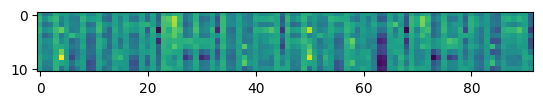

In [33]:
# Load and region average data 
Ydata = data.Dataset(experiment="sc1", roi="cerebellum_suit", subj_id="all")
Ydata.load()
Xdata = data.Dataset(experiment="sc1", roi="tessels0162",subj_id="all")
Xdata.load()

# Read MDTB atlas
index = data.read_suit_nii('/Users/jdiedrichsen/Data/cerebellar_atlases/atl-MDTB/atl-MDTB10_sp-SUIT.nii')
Y, yinfo = Ydata.get_data('sess',True)
X, xinfo = Xdata.get_data('sess',True)
Ym, reg = data.average_by_roi(Y,index)

plt.imshow(Ym.T)
plt.show()

In [34]:
# Fit the NNLS model to region-averaged data
nnROI = model.NNLS(alpha=np.exp(2))
nnROI.fit(X,Ym)
nnROI.coef_.shape

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  3.4195e-03 -5.6290e-01  1e+01  7e-01  5e-02
 2: -1.8352e-01 -3.2896e-01  1e+00  5e-02  4e-03
 3: -1.9138e-01 -2.7505e-01  1e-01  3e-03  2e-04
 4: -1.9959e-01 -2.2674e-01  3e-02  6e-04  4e-05
 5: -2.0444e-01 -2.1523e-01  1e-02  5e-05  4e-06
 6: -2.0693e-01 -2.1089e-01  4e-03  1e-05  7e-07
 7: -2.0804e-01 -2.1024e-01  2e-03  5e-18  5e-16
 8: -2.0888e-01 -2.0943e-01  6e-04  4e-18  5e-16
 9: -2.0919e-01 -2.0927e-01  7e-05  4e-18  6e-16
10: -2.0924e-01 -2.0925e-01  8e-06  5e-18  6e-16
11: -2.0925e-01 -2.0925e-01  1e-07  3e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.7618e-01 -8.3981e-01  1e+01  8e-01  5e-02
 2: -4.5834e-01 -5.8242e-01  1e+00  7e-02  5e-03
 3: -4.4915e-01 -5.0149e-01  2e-01  1e-02  8e-04
 4: -4.4372e-01 -4.6493e-01  7e-02  3e-03  2e-04
 5: -4.4413e-01 -4.5601e-01  2e-02  5e-04  4e-0

(11, 304)

In [35]:
# Fit Ridge Model to region-averaged data 
ridgeROI= model.L2regression(alpha=np.exp(2))
ridgeROI.fit(X,Ym)
ridgeROI.coef_.shape

(11, 304)

In [36]:
# Fit the NNLS model to voxel data
nnVOX = model.NNLS(alpha=np.exp(2))
nnVOX.fit(X,Y)
nnVOX.coef_.shape

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  2e+00
 1:  9.4410e-02 -4.1768e-01  1e+01  8e-01  7e-02
 2: -8.1968e-02 -1.6128e-01  2e+00  8e-02  7e-03
 3: -7.1314e-02 -1.1458e-01  2e-01  1e-02  9e-04
 4: -6.3024e-02 -8.5700e-02  5e-02  2e-03  1e-04
 5: -6.6040e-02 -7.7819e-02  2e-02  3e-04  3e-05
 6: -7.1501e-02 -7.4904e-02  4e-03  2e-05  2e-06
 7: -7.3807e-02 -7.4366e-02  6e-04  2e-06  2e-07
 8: -7.4247e-02 -7.4315e-02  7e-05  3e-18  7e-16
 9: -7.4308e-02 -7.4310e-02  3e-06  6e-18  7e-16
10: -7.4310e-02 -7.4310e-02  5e-08  3e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  2e+00
 1:  1.6315e-01 -3.1509e-01  1e+01  7e-01  8e-02
 2: -1.8693e-02 -8.7609e-02  1e+00  6e-02  6e-03
 3: -2.0857e-02 -6.1855e-02  1e-01  4e-03  5e-04
 4: -2.4181e-02 -3.9598e-02  2e-02  4e-04  5e-05
 5: -2.8178e-02 -3.3943e-02  7e-03  1e-04  1e-05
 6: -3.0861e-02 -3.2758e-02  2e-03  5e-06  6e-0

 4: -1.6393e-02 -2.0857e-02  3e-02  1e-03  9e-05
 5: -1.4326e-02 -1.6693e-02  4e-03  9e-05  6e-06
 6: -1.5620e-02 -1.6202e-02  6e-04  9e-07  6e-08
 7: -1.6082e-02 -1.6175e-02  9e-05  4e-18  8e-16
 8: -1.6169e-02 -1.6170e-02  2e-06  2e-18  8e-16
 9: -1.6170e-02 -1.6170e-02  2e-08  4e-18  9e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  7.8690e-02 -4.0999e-01  1e+01  8e-01  6e-02
 2: -8.7627e-02 -1.6278e-01  1e+00  6e-02  5e-03
 3: -7.9805e-02 -1.2763e-01  2e-01  7e-03  6e-04
 4: -7.8576e-02 -1.0197e-01  4e-02  2e-03  1e-04
 5: -8.1137e-02 -9.1648e-02  1e-02  3e-04  2e-05
 6: -8.4925e-02 -8.8713e-02  4e-03  6e-05  5e-06
 7: -8.6610e-02 -8.8215e-02  2e-03  2e-18  5e-16
 8: -8.7827e-02 -8.7915e-02  9e-05  4e-18  5e-16
 9: -8.7901e-02 -8.7904e-02  3e-06  4e-18  5e-16
10: -8.7903e-02 -8.7904e-02  7e-08  3e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 4: -3.7351e-01 -4.0109e-01  5e-02  2e-03  1e-04
 5: -3.7933e-01 -3.8991e-01  1e-02  3e-04  2e-05
 6: -3.8551e-01 -3.8774e-01  2e-03  7e-18  4e-16
 7: -3.8728e-01 -3.8740e-01  1e-04  6e-18  4e-16
 8: -3.8738e-01 -3.8738e-01  3e-06  1e-17  4e-16
 9: -3.8738e-01 -3.8738e-01  9e-08  6e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.5621e-01 -8.8862e-01  1e+01  8e-01  6e-02
 2: -4.9333e-01 -5.9340e-01  2e+00  8e-02  5e-03
 3: -4.2135e-01 -4.6964e-01  3e-01  1e-02  8e-04
 4: -4.0176e-01 -4.3113e-01  8e-02  3e-03  2e-04
 5: -4.0296e-01 -4.1752e-01  2e-02  4e-04  3e-05
 6: -4.0945e-01 -4.1382e-01  5e-03  3e-05  2e-06
 7: -4.1178e-01 -4.1350e-01  2e-03  6e-18  5e-16
 8: -4.1305e-01 -4.1328e-01  2e-04  6e-18  5e-16
 9: -4.1325e-01 -4.1325e-01  4e-06  5e-18  5e-16
10: -4.1325e-01 -4.1325e-01  4e-08  7e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 9: -5.2930e-02 -5.2938e-02  8e-06  3e-18  6e-16
10: -5.2937e-02 -5.2937e-02  2e-07  3e-18  6e-16
11: -5.2937e-02 -5.2937e-02  4e-09  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  7.4720e-04 -5.0211e-01  1e+01  8e-01  6e-02
 2: -1.6901e-01 -2.6463e-01  1e+00  7e-02  6e-03
 3: -1.4928e-01 -2.0365e-01  2e-01  7e-03  5e-04
 4: -1.4636e-01 -1.7271e-01  4e-02  1e-03  1e-04
 5: -1.5128e-01 -1.6220e-01  1e-02  3e-04  2e-05
 6: -1.5650e-01 -1.5919e-01  3e-03  2e-18  4e-16
 7: -1.5833e-01 -1.5875e-01  4e-04  5e-18  4e-16
 8: -1.5867e-01 -1.5868e-01  2e-05  4e-18  4e-16
 9: -1.5868e-01 -1.5868e-01  3e-07  5e-18  4e-16
10: -1.5868e-01 -1.5868e-01  8e-09  8e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.8994e-01 -6.7825e-01  1e+01  8e-01  6e-02
 2: -3.3663e-01 -4.0883e-01  2e+00  9e-02  6e-03
 3: -2.9529e-01 -3.2494

 1:  7.4568e-02 -3.6433e-01  1e+01  8e-01  5e-02
 2: -9.4743e-02 -1.0422e-01  1e+00  7e-02  4e-03
 3: -7.0463e-02 -6.0520e-02  2e-01  1e-02  7e-04
 4: -4.0034e-02 -3.5717e-02  3e-02  2e-03  1e-04
 5: -2.6888e-02 -3.3284e-02  9e-03  1e-04  7e-06
 6: -3.0394e-02 -3.2557e-02  3e-03  3e-05  2e-06
 7: -3.2011e-02 -3.2383e-02  4e-04  3e-18  9e-16
 8: -3.2366e-02 -3.2371e-02  5e-06  3e-18  9e-16
 9: -3.2371e-02 -3.2371e-02  5e-08  3e-18  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.5458e-02 -5.0151e-01  2e+01  1e+00  8e-02
 2: -1.7953e-01 -1.9720e-01  2e+00  1e-01  8e-03
 3: -1.3335e-01 -1.2091e-01  3e-01  1e-02  1e-03
 4: -9.1484e-02 -8.6604e-02  7e-02  3e-03  3e-04
 5: -7.5809e-02 -8.1445e-02  2e-02  4e-04  3e-05
 6: -7.9101e-02 -8.0177e-02  1e-03  1e-05  8e-07
 7: -8.0076e-02 -8.0109e-02  3e-05  7e-08  5e-09
 8: -8.0107e-02 -8.0108e-02  8e-07  9e-10  7e-11
 9: -8.0108e-02 -8.0108e-02  1e-08  9e-12  7e-

11: -6.2044e-02 -6.2044e-02  2e-09  2e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.2966e-03 -5.3009e-01  1e+01  8e-01  6e-02
 2: -1.8197e-01 -2.7321e-01  1e+00  6e-02  5e-03
 3: -1.6687e-01 -1.9883e-01  2e-01  8e-03  6e-04
 4: -1.5728e-01 -1.7364e-01  5e-02  2e-03  2e-04
 5: -1.5933e-01 -1.6684e-01  1e-02  2e-04  1e-05
 6: -1.6403e-01 -1.6521e-01  1e-03  4e-06  3e-07
 7: -1.6500e-01 -1.6510e-01  1e-04  2e-07  2e-08
 8: -1.6510e-01 -1.6510e-01  2e-06  3e-09  3e-10
 9: -1.6510e-01 -1.6510e-01  2e-08  4e-11  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  4.7952e-02 -4.7902e-01  1e+01  7e-01  6e-02
 2: -1.3070e-01 -2.3734e-01  1e+00  6e-02  5e-03
 3: -1.2779e-01 -1.8482e-01  2e-01  7e-03  6e-04
 4: -1.2742e-01 -1.5444e-01  5e-02  2e-03  1e-04
 5: -1.3260e-01 -1.4381e-01  1e-02  2e-04  2e-05
 6: -1.3572e-01 -1.4139

 8: -6.6337e-02 -6.6338e-02  1e-06  2e-09  1e-10
 9: -6.6338e-02 -6.6338e-02  1e-08  2e-11  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  2e+00
 1:  1.0472e-01 -3.7623e-01  1e+01  8e-01  7e-02
 2: -7.2471e-02 -1.2873e-01  1e+00  5e-02  5e-03
 3: -6.6222e-02 -8.0795e-02  1e-01  7e-03  6e-04
 4: -5.7506e-02 -6.3612e-02  2e-02  1e-03  9e-05
 5: -5.9552e-02 -6.1666e-02  4e-03  1e-04  1e-05
 6: -6.1237e-02 -6.1458e-02  3e-04  7e-06  7e-07
 7: -6.1447e-02 -6.1450e-02  4e-06  8e-08  7e-09
 8: -6.1450e-02 -6.1450e-02  4e-08  8e-10  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  2e+00
 1:  1.7208e-01 -3.1902e-01  1e+01  8e-01  9e-02
 2: -9.1233e-03 -8.6199e-02  1e+00  5e-02  6e-03
 3: -1.4007e-02 -5.4824e-02  1e-01  4e-03  5e-04
 4: -1.9258e-02 -3.7532e-02  3e-02  9e-04  1e-04
 5: -2.3582e-02 -3.0772e-02  8e-03  1e-04  1e-05
 6: -2.6035e-02 -2.8924

 9: -5.5958e-03 -5.5958e-03  1e-08  4e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  9e-01
 1:  1.3161e-01 -2.9565e-01  1e+01  7e-01  4e-02
 2: -4.5009e-02 -4.9061e-02  9e-01  5e-02  3e-03
 3: -1.9521e-02 -1.6632e-02  1e-01  6e-03  3e-04
 4: -5.5542e-03 -9.0882e-03  2e-02  8e-04  4e-05
 5: -6.1430e-03 -7.7927e-03  3e-03  8e-05  4e-06
 6: -7.6235e-03 -7.7035e-03  8e-05  1e-07  7e-09
 7: -7.7016e-03 -7.7025e-03  9e-07  1e-09  7e-11
 8: -7.7025e-03 -7.7025e-03  9e-09  1e-11  7e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  2e+00
 1:  1.3680e-01 -3.3557e-01  2e+01  9e-01  1e-01
 2: -3.4128e-02 -8.6238e-02  1e+00  7e-02  8e-03
 3: -2.0592e-02 -5.2869e-02  2e-01  7e-03  8e-04
 4: -1.8551e-02 -3.5372e-02  3e-02  9e-04  1e-04
 5: -2.2151e-02 -3.0026e-02  1e-02  3e-04  3e-05
 6: -2.5217e-02 -2.8556e-02  4e-03  6e-05  7e-06
 7: -2.6800e-02 -2.8207

 2: -5.9450e-01 -7.0276e-01  2e+00  8e-02  6e-03
 3: -5.5386e-01 -6.1723e-01  3e-01  2e-02  1e-03
 4: -5.3049e-01 -5.6579e-01  9e-02  4e-03  2e-04
 5: -5.3353e-01 -5.4880e-01  2e-02  2e-04  1e-05
 6: -5.3980e-01 -5.4481e-01  5e-03  2e-05  1e-06
 7: -5.4218e-01 -5.4415e-01  2e-03  6e-18  6e-16
 8: -5.4350e-01 -5.4385e-01  4e-04  5e-18  5e-16
 9: -5.4379e-01 -5.4380e-01  1e-05  7e-18  5e-16
10: -5.4380e-01 -5.4380e-01  1e-07  6e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.9845e-01 -1.0877e+00  2e+01  9e-01  6e-02
 2: -6.4612e-01 -8.0337e-01  1e+00  6e-02  4e-03
 3: -6.2826e-01 -7.0426e-01  2e-01  9e-03  6e-04
 4: -6.1999e-01 -6.5114e-01  6e-02  2e-03  1e-04
 5: -6.2470e-01 -6.3696e-01  1e-02  2e-06  1e-07
 6: -6.3077e-01 -6.3422e-01  3e-03  3e-07  2e-08
 7: -6.3279e-01 -6.3356e-01  8e-04  5e-08  3e-09
 8: -6.3335e-01 -6.3344e-01  9e-05  4e-09  3e-10
 9: -6.3342e-01 -6.3342e-01  2e-06  7e-11  4e-

 4: -6.5013e-01 -6.8828e-01  1e-01  4e-03  2e-04
 5: -6.5383e-01 -6.7320e-01  3e-02  1e-03  7e-05
 6: -6.6102e-01 -6.6797e-01  7e-03  9e-18  5e-16
 7: -6.6562e-01 -6.6720e-01  2e-03  1e-17  6e-16
 8: -6.6691e-01 -6.6696e-01  5e-05  1e-17  5e-16
 9: -6.6695e-01 -6.6695e-01  7e-07  9e-18  5e-16
10: -6.6695e-01 -6.6695e-01  7e-09  9e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.0955e-01 -1.1619e+00  2e+01  9e-01  6e-02
 2: -7.1339e-01 -8.0338e-01  2e+00  1e-01  8e-03
 3: -6.3612e-01 -7.0041e-01  4e-01  2e-02  1e-03
 4: -6.1172e-01 -6.4678e-01  9e-02  4e-03  2e-04
 5: -6.1522e-01 -6.3251e-01  3e-02  7e-04  4e-05
 6: -6.2300e-01 -6.2790e-01  6e-03  1e-04  7e-06
 7: -6.2569e-01 -6.2724e-01  2e-03  6e-18  5e-16
 8: -6.2695e-01 -6.2709e-01  1e-04  7e-18  5e-16
 9: -6.2707e-01 -6.2707e-01  2e-06  9e-18  6e-16
10: -6.2707e-01 -6.2707e-01  2e-08  7e-18  6e-16
Optimal solution found.
     pcost       dcost

 6: -2.8245e-01 -2.8633e-01  6e-03  2e-04  1e-05
 7: -2.8503e-01 -2.8572e-01  8e-04  7e-06  5e-07
 8: -2.8563e-01 -2.8565e-01  3e-05  2e-07  2e-08
 9: -2.8565e-01 -2.8565e-01  5e-07  3e-09  2e-10
10: -2.8565e-01 -2.8565e-01  5e-09  3e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.8737e-01 -1.1355e+00  2e+01  1e+00  7e-02
 2: -6.9163e-01 -7.9586e-01  2e+00  1e-01  8e-03
 3: -6.2241e-01 -6.8407e-01  3e-01  1e-02  8e-04
 4: -6.0615e-01 -6.4188e-01  7e-02  2e-03  2e-04
 5: -6.1229e-01 -6.2920e-01  2e-02  3e-04  2e-05
 6: -6.2221e-01 -6.2559e-01  3e-03  8e-06  6e-07
 7: -6.2491e-01 -6.2506e-01  2e-04  2e-07  1e-08
 8: -6.2503e-01 -6.2504e-01  5e-06  5e-09  3e-10
 9: -6.2504e-01 -6.2504e-01  2e-07  8e-11  6e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.5095e-01 -1.5549e+00  2e+01  8e-01  5e-02
 2: -1.0677e+00 -1.2231

 8: -8.3986e-01 -8.4038e-01  5e-04  7e-18  4e-16
 9: -8.4028e-01 -8.4031e-01  3e-05  8e-18  4e-16
10: -8.4031e-01 -8.4031e-01  7e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.9862e-01 -1.5910e+00  2e+01  9e-01  5e-02
 2: -1.1144e+00 -1.2491e+00  2e+00  1e-01  7e-03
 3: -1.0296e+00 -1.1044e+00  3e-01  1e-02  9e-04
 4: -1.0029e+00 -1.0443e+00  1e-01  4e-03  3e-04
 5: -1.0041e+00 -1.0232e+00  2e-02  3e-04  2e-05
 6: -1.0128e+00 -1.0194e+00  7e-03  5e-05  3e-06
 7: -1.0166e+00 -1.0182e+00  2e-03  8e-18  5e-16
 8: -1.0179e+00 -1.0180e+00  9e-05  1e-17  5e-16
 9: -1.0180e+00 -1.0180e+00  2e-06  1e-17  4e-16
10: -1.0180e+00 -1.0180e+00  5e-08  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.5819e+00 -2.1648e+00  2e+01  1e+00  6e-02
 2: -1.6771e+00 -1.8142e+00  2e+00  1e-01  7e-03
 3: -1.5697e+00 -1.6349

 6: -4.6448e-01 -4.7556e-01  1e-02  1e-05  8e-07
 7: -4.6983e-01 -4.7172e-01  2e-03  7e-07  5e-08
 8: -4.7117e-01 -4.7131e-01  1e-04  3e-08  2e-09
 9: -4.7128e-01 -4.7128e-01  4e-06  8e-10  5e-11
10: -4.7128e-01 -4.7128e-01  4e-08  9e-12  6e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.6708e-01 -1.1455e+00  1e+01  8e-01  5e-02
 2: -7.1790e-01 -8.7172e-01  1e+00  7e-02  5e-03
 3: -6.8678e-01 -7.6985e-01  2e-01  9e-03  6e-04
 4: -6.8705e-01 -7.2160e-01  5e-02  2e-03  1e-04
 5: -6.9573e-01 -7.0742e-01  1e-02  5e-05  4e-06
 6: -7.0243e-01 -7.0491e-01  2e-03  1e-06  7e-08
 7: -7.0414e-01 -7.0444e-01  3e-04  4e-08  3e-09
 8: -7.0440e-01 -7.0440e-01  7e-06  7e-10  4e-11
 9: -7.0440e-01 -7.0440e-01  2e-07  1e-11  7e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.7332e-01 -1.3583e+00  1e+01  8e-01  5e-02
 2: -9.1801e-01 -1.0291

 4: -5.2392e-01 -5.6450e-01  7e-02  2e-03  2e-04
 5: -5.3386e-01 -5.5055e-01  2e-02  9e-18  6e-16
 6: -5.4178e-01 -5.4663e-01  5e-03  5e-18  5e-16
 7: -5.4496e-01 -5.4573e-01  8e-04  1e-17  6e-16
 8: -5.4561e-01 -5.4563e-01  2e-05  9e-18  6e-16
 9: -5.4563e-01 -5.4563e-01  4e-07  7e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.0523e-01 -7.7720e-01  1e+01  8e-01  5e-02
 2: -3.7482e-01 -5.1984e-01  1e+00  7e-02  5e-03
 3: -3.6794e-01 -4.5195e-01  2e-01  7e-03  5e-04
 4: -3.6754e-01 -4.0225e-01  5e-02  2e-03  1e-04
 5: -3.7394e-01 -3.8764e-01  2e-02  2e-04  1e-05
 6: -3.7928e-01 -3.8511e-01  6e-03  5e-18  5e-16
 7: -3.8249e-01 -3.8365e-01  1e-03  7e-18  5e-16
 8: -3.8328e-01 -3.8342e-01  1e-04  8e-18  5e-16
 9: -3.8340e-01 -3.8341e-01  8e-06  4e-18  5e-16
10: -3.8341e-01 -3.8341e-01  1e-07  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 2: -1.1565e+00 -1.3140e+00  1e+00  7e-02  4e-03
 3: -1.1087e+00 -1.1761e+00  3e-01  1e-02  7e-04
 4: -1.0924e+00 -1.1320e+00  5e-02  5e-04  3e-05
 5: -1.1062e+00 -1.1216e+00  2e-02  7e-05  4e-06
 6: -1.1129e+00 -1.1180e+00  5e-03  1e-05  8e-07
 7: -1.1163e+00 -1.1170e+00  7e-04  1e-17  4e-16
 8: -1.1169e+00 -1.1169e+00  3e-05  1e-17  4e-16
 9: -1.1169e+00 -1.1169e+00  4e-07  2e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.8120e-01 -1.1476e+00  1e+01  8e-01  5e-02
 2: -7.1060e-01 -8.4774e-01  1e+00  7e-02  5e-03
 3: -6.6449e-01 -7.2662e-01  2e-01  9e-03  6e-04
 4: -6.5945e-01 -6.8735e-01  5e-02  1e-03  9e-05
 5: -6.6743e-01 -6.7707e-01  1e-02  3e-04  2e-05
 6: -6.7170e-01 -6.7525e-01  4e-03  2e-05  2e-06
 7: -6.7440e-01 -6.7476e-01  4e-04  1e-17  4e-16
 8: -6.7471e-01 -6.7472e-01  6e-06  1e-17  4e-16
 9: -6.7472e-01 -6.7472e-01  2e-07  5e-18  4e-16
Optimal solution found.
     pcost       dcost

 6: -3.3046e-01 -3.3446e-01  5e-03  5e-05  4e-06
 7: -3.3358e-01 -3.3397e-01  4e-04  8e-18  6e-16
 8: -3.3393e-01 -3.3394e-01  8e-06  1e-17  6e-16
 9: -3.3394e-01 -3.3394e-01  8e-08  5e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.7745e-01 -1.1732e+00  1e+01  7e-01  5e-02
 2: -7.3132e-01 -8.9932e-01  1e+00  7e-02  5e-03
 3: -7.1078e-01 -7.9119e-01  3e-01  1e-02  8e-04
 4: -6.9840e-01 -7.4566e-01  7e-02  2e-03  1e-04
 5: -7.0915e-01 -7.2808e-01  2e-02  5e-04  3e-05
 6: -7.1673e-01 -7.2283e-01  6e-03  1e-17  5e-16
 7: -7.2064e-01 -7.2150e-01  9e-04  9e-18  4e-16
 8: -7.2128e-01 -7.2137e-01  9e-05  1e-17  4e-16
 9: -7.2135e-01 -7.2136e-01  3e-06  1e-17  4e-16
10: -7.2136e-01 -7.2136e-01  5e-08  7e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.1469e-01 -1.3269e+00  1e+01  8e-01  5e-02
 2: -8.4970e-01 -1.0118

 6: -4.0585e-02 -4.3011e-02  3e-03  8e-06  8e-07
 7: -4.2120e-02 -4.2848e-02  7e-04  4e-18  6e-16
 8: -4.2786e-02 -4.2798e-02  1e-05  1e-18  7e-16
 9: -4.2798e-02 -4.2798e-02  1e-07  2e-18  6e-16
10: -4.2798e-02 -4.2798e-02  1e-09  1e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  2e+00
 1:  1.9183e-02 -4.3529e-01  1e+01  8e-01  7e-02
 2: -1.3912e-01 -1.5346e-01  1e+00  7e-02  6e-03
 3: -9.7889e-02 -8.2332e-02  3e-01  1e-02  1e-03
 4: -5.6455e-02 -5.2028e-02  7e-02  4e-03  3e-04
 5: -4.0494e-02 -4.6959e-02  2e-02  4e-04  3e-05
 6: -4.4653e-02 -4.5551e-02  1e-03  2e-05  2e-06
 7: -4.5239e-02 -4.5475e-02  4e-04  6e-06  5e-07
 8: -4.5448e-02 -4.5461e-02  1e-05  4e-18  8e-16
 9: -4.5461e-02 -4.5461e-02  1e-07  7e-18  1e-15
10: -4.5461e-02 -4.5461e-02  1e-09  3e-18  8e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  5.1409e-02 -3.9690

 5: -1.0984e-01 -1.2039e-01  1e-02  8e-18  6e-16
 6: -1.1451e-01 -1.1768e-01  3e-03  8e-18  6e-16
 7: -1.1673e-01 -1.1717e-01  4e-04  4e-18  7e-16
 8: -1.1712e-01 -1.1713e-01  1e-05  4e-18  6e-16
 9: -1.1713e-01 -1.1713e-01  4e-07  4e-18  6e-16
10: -1.1713e-01 -1.1713e-01  2e-08  7e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  6.1361e-02 -4.6413e-01  1e+01  8e-01  6e-02
 2: -1.0695e-01 -2.0448e-01  1e+00  5e-02  4e-03
 3: -1.0182e-01 -1.6692e-01  1e-01  4e-03  3e-04
 4: -1.0771e-01 -1.3065e-01  3e-02  7e-04  6e-05
 5: -1.1216e-01 -1.2199e-01  1e-02  3e-05  2e-06
 6: -1.1653e-01 -1.2072e-01  4e-03  3e-18  5e-16
 7: -1.1898e-01 -1.1937e-01  4e-04  3e-18  5e-16
 8: -1.1929e-01 -1.1930e-01  8e-06  3e-18  5e-16
 9: -1.1930e-01 -1.1930e-01  1e-07  4e-18  5e-16
10: -1.1930e-01 -1.1930e-01  2e-09  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 1:  1.2434e-01 -3.6985e-01  1e+01  8e-01  7e-02
 2: -5.1314e-02 -1.2769e-01  1e+00  5e-02  5e-03
 3: -4.9066e-02 -9.1480e-02  2e-01  7e-03  6e-04
 4: -4.9752e-02 -7.1343e-02  4e-02  1e-03  1e-04
 5: -5.3241e-02 -6.2791e-02  1e-02  2e-04  2e-05
 6: -5.6238e-02 -6.1746e-02  6e-03  2e-06  2e-07
 7: -5.8906e-02 -6.0337e-02  1e-03  4e-07  4e-08
 8: -5.9805e-02 -6.0080e-02  3e-04  6e-08  5e-09
 9: -6.0026e-02 -6.0038e-02  1e-05  3e-10  3e-11
10: -6.0037e-02 -6.0037e-02  3e-07  9e-12  8e-13
11: -6.0037e-02 -6.0037e-02  3e-09  9e-14  8e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  5.0517e-02 -4.2556e-01  1e+01  7e-01  6e-02
 2: -1.1638e-01 -1.8891e-01  1e+00  5e-02  4e-03
 3: -9.4955e-02 -1.4221e-01  1e-01  5e-03  4e-04
 4: -9.6017e-02 -1.1500e-01  3e-02  9e-04  7e-05
 5: -1.0038e-01 -1.1008e-01  1e-02  5e-18  5e-16
 6: -1.0491e-01 -1.0786e-01  3e-03  3e-18  4e-16
 7: -1.0681e-01 -1.0749e-01  7e-04  4e-18  5e-

 6: -4.3110e-01 -4.3223e-01  2e-03  5e-05  3e-06
 7: -4.3187e-01 -4.3213e-01  3e-04  5e-18  5e-16
 8: -4.3212e-01 -4.3212e-01  3e-06  1e-17  6e-16
 9: -4.3212e-01 -4.3212e-01  3e-08  7e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.1601e-01 -1.3581e+00  1e+01  8e-01  5e-02
 2: -9.6267e-01 -1.0583e+00  1e+00  8e-02  5e-03
 3: -9.0303e-01 -9.3572e-01  4e-01  2e-02  1e-03
 4: -8.6215e-01 -8.9455e-01  7e-02  2e-03  1e-04
 5: -8.6590e-01 -8.8020e-01  2e-02  3e-04  2e-05
 6: -8.7164e-01 -8.7787e-01  6e-03  9e-18  6e-16
 7: -8.7590e-01 -8.7643e-01  5e-04  2e-17  6e-16
 8: -8.7632e-01 -8.7635e-01  3e-05  1e-17  6e-16
 9: -8.7635e-01 -8.7635e-01  9e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.9124e-01 -1.3466e+00  2e+01  9e-01  6e-02
 2: -9.1503e-01 -1.0082e+00  2e+00  1e-01  8e-03
 3: -8.2745e-01 -8.7434

 3: -9.6637e-01 -9.9865e-01  3e-01  1e-02  8e-04
 4: -9.3941e-01 -9.5596e-01  7e-02  3e-03  2e-04
 5: -9.3692e-01 -9.4719e-01  2e-02  8e-04  6e-05
 6: -9.4036e-01 -9.4400e-01  5e-03  7e-05  5e-06
 7: -9.4323e-01 -9.4344e-01  2e-04  1e-17  6e-16
 8: -9.4341e-01 -9.4342e-01  5e-06  1e-17  7e-16
 9: -9.4341e-01 -9.4342e-01  1e-07  9e-18  8e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0340e+00 -1.6123e+00  2e+01  9e-01  6e-02
 2: -1.1797e+00 -1.3223e+00  2e+00  1e-01  7e-03
 3: -1.1263e+00 -1.1987e+00  3e-01  1e-02  7e-04
 4: -1.1057e+00 -1.1501e+00  6e-02  1e-03  7e-05
 5: -1.1150e+00 -1.1316e+00  2e-02  2e-04  1e-05
 6: -1.1237e+00 -1.1286e+00  5e-03  9e-18  6e-16
 7: -1.1271e+00 -1.1274e+00  3e-04  9e-18  7e-16
 8: -1.1273e+00 -1.1273e+00  8e-06  7e-18  7e-16
 9: -1.1273e+00 -1.1273e+00  3e-07  6e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 7: -5.4403e-01 -5.4439e-01  4e-04  6e-08  4e-09
 8: -5.4430e-01 -5.4434e-01  4e-05  6e-09  4e-10
 9: -5.4434e-01 -5.4434e-01  7e-07  6e-11  4e-12
10: -5.4434e-01 -5.4434e-01  2e-08  7e-13  5e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0310e-01 -5.8255e-01  2e+01  8e-01  6e-02
 2: -2.5953e-01 -3.1371e-01  1e+00  8e-02  6e-03
 3: -2.2947e-01 -2.5262e-01  3e-01  1e-02  9e-04
 4: -2.0380e-01 -2.1995e-01  7e-02  3e-03  2e-04
 5: -2.0103e-01 -2.1244e-01  2e-02  8e-04  6e-05
 6: -2.0322e-01 -2.1000e-01  7e-03  5e-19  7e-16
 7: -2.0813e-01 -2.0884e-01  7e-04  5e-18  6e-16
 8: -2.0861e-01 -2.0879e-01  2e-04  4e-18  6e-16
 9: -2.0876e-01 -2.0878e-01  1e-05  5e-18  6e-16
10: -2.0877e-01 -2.0877e-01  3e-07  4e-18  7e-16
11: -2.0877e-01 -2.0877e-01  8e-09  3e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.5253e-01 -1.0731

 1: -1.7540e+00 -2.3402e+00  2e+01  1e+00  7e-02
 2: -1.8583e+00 -1.9880e+00  2e+00  1e-01  8e-03
 3: -1.7560e+00 -1.7546e+00  5e-01  3e-02  2e-03
 4: -1.6506e+00 -1.6727e+00  1e-01  5e-03  3e-04
 5: -1.6376e+00 -1.6557e+00  2e-02  6e-05  4e-06
 6: -1.6502e+00 -1.6525e+00  2e-03  4e-06  2e-07
 7: -1.6522e+00 -1.6523e+00  8e-05  8e-08  5e-09
 8: -1.6523e+00 -1.6523e+00  1e-06  1e-09  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.6301e+00 -3.3317e+00  2e+01  1e+00  6e-02
 2: -2.7402e+00 -2.9817e+00  2e+00  1e-01  7e-03
 3: -2.6702e+00 -2.7609e+00  5e-01  2e-02  1e-03
 4: -2.6340e+00 -2.6847e+00  2e-01  7e-03  5e-04
 5: -2.6279e+00 -2.6534e+00  4e-02  8e-04  5e-05
 6: -2.6405e+00 -2.6473e+00  9e-03  1e-04  9e-06
 7: -2.6450e+00 -2.6461e+00  1e-03  2e-05  9e-07
 8: -2.6460e+00 -2.6460e+00  3e-05  1e-07  8e-09
 9: -2.6460e+00 -2.6460e+00  8e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost

10: -9.0102e-01 -9.0102e-01  4e-08  2e-13  1e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.7557e-01 -1.3190e+00  2e+01  9e-01  6e-02
 2: -9.1164e-01 -1.0303e+00  2e+00  1e-01  7e-03
 3: -8.6404e-01 -9.3511e-01  4e-01  2e-02  1e-03
 4: -8.3989e-01 -8.7478e-01  1e-01  6e-03  4e-04
 5: -8.3037e-01 -8.5589e-01  4e-02  9e-04  6e-05
 6: -8.4039e-01 -8.4924e-01  1e-02  2e-04  1e-05
 7: -8.4648e-01 -8.4757e-01  1e-03  3e-06  2e-07
 8: -8.4736e-01 -8.4747e-01  1e-04  1e-07  1e-08
 9: -8.4746e-01 -8.4747e-01  2e-06  2e-09  1e-10
10: -8.4747e-01 -8.4747e-01  7e-08  3e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.7456e-01 -9.0781e-01  1e+01  8e-01  5e-02
 2: -5.2027e-01 -5.9493e-01  2e+00  9e-02  6e-03
 3: -4.4431e-01 -5.0491e-01  3e-01  1e-02  9e-04
 4: -4.2434e-01 -4.6163e-01  1e-01  4e-03  3e-04
 5: -4.2470e-01 -4.4280

 7: -6.7654e-01 -6.7756e-01  1e-03  6e-06  4e-07
 8: -6.7724e-01 -6.7748e-01  2e-04  5e-18  5e-16
 9: -6.7745e-01 -6.7746e-01  4e-06  7e-18  6e-16
10: -6.7746e-01 -6.7746e-01  6e-08  6e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0440e+00 -1.5905e+00  1e+01  8e-01  5e-02
 2: -1.1798e+00 -1.2819e+00  2e+00  8e-02  5e-03
 3: -1.1134e+00 -1.1605e+00  4e-01  2e-02  1e-03
 4: -1.0785e+00 -1.1047e+00  1e-01  5e-03  3e-04
 5: -1.0728e+00 -1.0890e+00  2e-02  9e-18  5e-16
 6: -1.0801e+00 -1.0861e+00  6e-03  1e-17  5e-16
 7: -1.0839e+00 -1.0853e+00  1e-03  1e-17  6e-16
 8: -1.0851e+00 -1.0852e+00  3e-05  9e-18  5e-16
 9: -1.0852e+00 -1.0852e+00  5e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.8905e-01 -1.5286e+00  2e+01  9e-01  6e-02
 2: -1.0935e+00 -1.1999e+00  2e+00  1e-01  7e-03
 3: -1.0051e+00 -1.0720

 1: -8.0974e-01 -1.3753e+00  1e+01  8e-01  5e-02
 2: -9.5225e-01 -1.0775e+00  1e+00  8e-02  5e-03
 3: -8.9149e-01 -9.6232e-01  3e-01  1e-02  7e-04
 4: -8.7732e-01 -9.1768e-01  7e-02  2e-03  1e-04
 5: -8.8477e-01 -9.0194e-01  2e-02  4e-04  3e-05
 6: -8.8947e-01 -8.9772e-01  8e-03  9e-18  6e-16
 7: -8.9391e-01 -8.9610e-01  2e-03  8e-18  5e-16
 8: -8.9553e-01 -8.9571e-01  2e-04  7e-18  5e-16
 9: -8.9568e-01 -8.9569e-01  4e-06  1e-17  5e-16
10: -8.9569e-01 -8.9569e-01  8e-08  5e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.8809e-01 -1.5997e+00  1e+01  8e-01  5e-02
 2: -1.1326e+00 -1.3019e+00  1e+00  7e-02  5e-03
 3: -1.0952e+00 -1.1895e+00  3e-01  1e-02  9e-04
 4: -1.0856e+00 -1.1349e+00  9e-02  3e-03  2e-04
 5: -1.0947e+00 -1.1154e+00  3e-02  7e-04  4e-05
 6: -1.1022e+00 -1.1101e+00  9e-03  7e-05  5e-06
 7: -1.1067e+00 -1.1088e+00  2e-03  8e-18  5e-16
 8: -1.1083e+00 -1.1084e+00  1e-04  2e-17  5e-

 4: -2.7538e-01 -3.0612e-01  6e-02  2e-03  1e-04
 5: -2.7997e-01 -2.9416e-01  2e-02  4e-04  3e-05
 6: -2.8624e-01 -2.9011e-01  4e-03  3e-05  2e-06
 7: -2.8860e-01 -2.8945e-01  9e-04  6e-18  5e-16
 8: -2.8926e-01 -2.8935e-01  9e-05  7e-18  4e-16
 9: -2.8934e-01 -2.8934e-01  2e-06  5e-18  4e-16
10: -2.8934e-01 -2.8934e-01  5e-08  6e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.3003e-01 -1.0788e+00  1e+01  8e-01  5e-02
 2: -6.7695e-01 -7.7655e-01  1e+00  7e-02  5e-03
 3: -6.3780e-01 -6.8452e-01  3e-01  2e-02  1e-03
 4: -6.1274e-01 -6.3530e-01  1e-01  5e-03  3e-04
 5: -6.1213e-01 -6.2437e-01  2e-02  7e-04  4e-05
 6: -6.1911e-01 -6.2172e-01  3e-03  2e-05  1e-06
 7: -6.2143e-01 -6.2151e-01  9e-05  3e-07  2e-08
 8: -6.2151e-01 -6.2151e-01  1e-06  3e-09  2e-10
 9: -6.2151e-01 -6.2151e-01  1e-08  3e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 7: -3.1646e-01 -3.1708e-01  7e-04  5e-06  4e-07
 8: -3.1701e-01 -3.1703e-01  2e-05  8e-08  5e-09
 9: -3.1702e-01 -3.1702e-01  4e-07  9e-10  6e-11
10: -3.1702e-01 -3.1702e-01  2e-08  1e-11  9e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.7901e-02 -5.6783e-01  1e+01  8e-01  6e-02
 2: -2.4499e-01 -3.2385e-01  1e+00  6e-02  4e-03
 3: -2.3905e-01 -2.7020e-01  2e-01  7e-03  5e-04
 4: -2.3221e-01 -2.5165e-01  3e-02  1e-03  7e-05
 5: -2.3774e-01 -2.4533e-01  1e-02  2e-04  2e-05
 6: -2.4219e-01 -2.4385e-01  2e-03  4e-18  6e-16
 7: -2.4347e-01 -2.4365e-01  2e-04  5e-18  6e-16
 8: -2.4363e-01 -2.4364e-01  4e-06  1e-17  6e-16
 9: -2.4364e-01 -2.4364e-01  1e-07  8e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  1.1634e-03 -4.5933e-01  1e+01  8e-01  6e-02
 2: -1.5219e-01 -1.8288e-01  1e+00  8e-02  6e-03
 3: -1.0865e-01 -1.3096

 8: -1.1624e+00 -1.1625e+00  2e-04  9e-18  5e-16
 9: -1.1625e+00 -1.1625e+00  3e-06  1e-17  5e-16
10: -1.1625e+00 -1.1625e+00  5e-08  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.7443e-01 -1.2709e+00  2e+01  1e+00  8e-02
 2: -7.8473e-01 -9.7777e-01  3e+00  2e-01  1e-02
 3: -7.3236e-01 -8.6605e-01  5e-01  2e-02  1e-03
 4: -7.1963e-01 -7.8723e-01  1e-01  4e-03  2e-04
 5: -7.2802e-01 -7.5884e-01  3e-02  4e-04  2e-05
 6: -7.4080e-01 -7.5013e-01  9e-03  1e-05  1e-06
 7: -7.4483e-01 -7.4863e-01  4e-03  7e-18  6e-16
 8: -7.4708e-01 -7.4783e-01  8e-04  9e-18  6e-16
 9: -7.4763e-01 -7.4770e-01  7e-05  1e-17  6e-16
10: -7.4768e-01 -7.4768e-01  1e-06  1e-17  6e-16
11: -7.4768e-01 -7.4768e-01  5e-08  7e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.4561e-01 -1.3219e+00  2e+01  8e-01  6e-02
 2: -8.9652e-01 -1.0366

 8: -1.2798e+00 -1.2803e+00  5e-04  1e-17  5e-16
 9: -1.2802e+00 -1.2802e+00  1e-05  1e-17  5e-16
10: -1.2802e+00 -1.2802e+00  1e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.1094e+00 -1.7276e+00  2e+01  1e+00  6e-02
 2: -1.2339e+00 -1.3965e+00  2e+00  1e-01  7e-03
 3: -1.1821e+00 -1.2391e+00  5e-01  2e-02  1e-03
 4: -1.1203e+00 -1.1739e+00  1e-01  4e-03  2e-04
 5: -1.1254e+00 -1.1495e+00  4e-02  1e-03  8e-05
 6: -1.1331e+00 -1.1420e+00  9e-03  5e-07  3e-08
 7: -1.1393e+00 -1.1406e+00  1e-03  1e-17  5e-16
 8: -1.1404e+00 -1.1405e+00  5e-05  1e-17  5e-16
 9: -1.1405e+00 -1.1405e+00  7e-07  2e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.4028e-01 -1.5029e+00  1e+01  8e-01  5e-02
 2: -1.0603e+00 -1.1846e+00  2e+00  1e-01  6e-03
 3: -9.7770e-01 -1.0269e+00  4e-01  2e-02  1e-03
 4: -9.2014e-01 -9.7309

10: -5.6946e-01 -5.6947e-01  4e-07  7e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.1808e-01 -7.6818e-01  1e+01  7e-01  5e-02
 2: -3.8172e-01 -5.2107e-01  1e+00  6e-02  4e-03
 3: -3.6959e-01 -4.4300e-01  2e-01  1e-02  7e-04
 4: -3.6433e-01 -3.9850e-01  7e-02  3e-03  2e-04
 5: -3.6880e-01 -3.8520e-01  2e-02  4e-04  3e-05
 6: -3.7424e-01 -3.8208e-01  8e-03  7e-18  6e-16
 7: -3.7873e-01 -3.8011e-01  1e-03  6e-18  6e-16
 8: -3.7972e-01 -3.7989e-01  2e-04  5e-18  6e-16
 9: -3.7986e-01 -3.7987e-01  9e-06  6e-18  6e-16
10: -3.7987e-01 -3.7987e-01  9e-08  9e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.9323e-02 -5.1634e-01  1e+01  8e-01  6e-02
 2: -1.7624e-01 -2.5716e-01  1e+00  5e-02  4e-03
 3: -1.5440e-01 -2.0434e-01  1e-01  4e-03  3e-04
 4: -1.5857e-01 -1.8218e-01  4e-02  9e-04  7e-05
 5: -1.6565e-01 -1.7153

 3: -7.6705e-01 -8.1517e-01  4e-01  2e-02  1e-03
 4: -7.2481e-01 -7.5308e-01  1e-01  6e-03  4e-04
 5: -7.1887e-01 -7.3633e-01  4e-02  1e-03  8e-05
 6: -7.2482e-01 -7.3182e-01  1e-02  3e-04  2e-05
 7: -7.2913e-01 -7.3046e-01  1e-03  6e-18  5e-16
 8: -7.3017e-01 -7.3035e-01  2e-04  1e-17  6e-16
 9: -7.3034e-01 -7.3034e-01  3e-06  1e-17  6e-16
10: -7.3034e-01 -7.3034e-01  8e-08  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.4472e-01 -1.4465e+00  2e+01  9e-01  6e-02
 2: -9.5794e-01 -1.0972e+00  2e+00  1e-01  7e-03
 3: -8.7679e-01 -9.6158e-01  4e-01  2e-02  1e-03
 4: -8.4840e-01 -8.9698e-01  9e-02  2e-03  2e-04
 5: -8.6103e-01 -8.7956e-01  2e-02  2e-04  2e-05
 6: -8.7032e-01 -8.7513e-01  5e-03  4e-05  3e-06
 7: -8.7356e-01 -8.7431e-01  8e-04  1e-17  5e-16
 8: -8.7421e-01 -8.7423e-01  1e-05  6e-18  5e-16
 9: -8.7422e-01 -8.7422e-01  2e-07  7e-18  5e-16
Optimal solution found.
     pcost       dcost

 9: -5.4056e-01 -5.4056e-01  5e-07  9e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.9289e-01 -8.8612e-01  2e+01  1e+00  7e-02
 2: -4.3843e-01 -5.9471e-01  2e+00  9e-02  6e-03
 3: -4.0163e-01 -5.0597e-01  3e-01  9e-03  6e-04
 4: -4.0166e-01 -4.4642e-01  7e-02  2e-03  1e-04
 5: -4.1014e-01 -4.2694e-01  2e-02  4e-04  3e-05
 6: -4.1570e-01 -4.2234e-01  7e-03  8e-05  5e-06
 7: -4.1902e-01 -4.2083e-01  2e-03  6e-18  5e-16
 8: -4.2016e-01 -4.2056e-01  4e-04  5e-18  5e-16
 9: -4.2049e-01 -4.2050e-01  1e-05  6e-18  5e-16
10: -4.2050e-01 -4.2050e-01  2e-07  9e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.6951e-01 -9.6026e-01  1e+01  8e-01  5e-02
 2: -5.3296e-01 -6.9054e-01  2e+00  8e-02  5e-03
 3: -5.0995e-01 -6.0117e-01  2e-01  6e-03  4e-04
 4: -5.1101e-01 -5.5183e-01  5e-02  1e-03  7e-05
 5: -5.2074e-01 -5.3678

 4: -3.5211e-01 -3.8845e-01  5e-02  1e-03  7e-05
 5: -3.6174e-01 -3.7676e-01  2e-02  2e-04  1e-05
 6: -3.6812e-01 -3.7274e-01  5e-03  5e-06  4e-07
 7: -3.7083e-01 -3.7184e-01  1e-03  7e-18  6e-16
 8: -3.7166e-01 -3.7169e-01  3e-05  7e-18  6e-16
 9: -3.7168e-01 -3.7168e-01  9e-07  8e-18  6e-16
10: -3.7168e-01 -3.7168e-01  3e-08  6e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.3048e-01 -7.6091e-01  1e+01  7e-01  5e-02
 2: -3.7171e-01 -4.6391e-01  1e+00  7e-02  5e-03
 3: -3.2507e-01 -3.7584e-01  3e-01  1e-02  1e-03
 4: -3.0234e-01 -3.3212e-01  8e-02  3e-03  2e-04
 5: -3.0356e-01 -3.1975e-01  2e-02  3e-04  2e-05
 6: -3.1160e-01 -3.1660e-01  5e-03  5e-18  5e-16
 7: -3.1466e-01 -3.1567e-01  1e-03  9e-18  5e-16
 8: -3.1545e-01 -3.1551e-01  7e-05  7e-18  5e-16
 9: -3.1551e-01 -3.1551e-01  2e-06  1e-17  6e-16
10: -3.1551e-01 -3.1551e-01  4e-08  9e-18  5e-16
Optimal solution found.
     pcost       dcost

 9: -4.4637e-02 -4.4637e-02  6e-08  4e-18  8e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  2.0178e-02 -4.9988e-01  1e+01  8e-01  6e-02
 2: -1.5317e-01 -2.5294e-01  1e+00  7e-02  5e-03
 3: -1.4023e-01 -1.9794e-01  2e-01  7e-03  6e-04
 4: -1.3824e-01 -1.6432e-01  5e-02  2e-03  1e-04
 5: -1.4339e-01 -1.5425e-01  1e-02  4e-04  3e-05
 6: -1.4786e-01 -1.5136e-01  4e-03  1e-05  1e-06
 7: -1.5035e-01 -1.5074e-01  4e-04  8e-08  6e-09
 8: -1.5068e-01 -1.5070e-01  2e-05  3e-09  2e-10
 9: -1.5070e-01 -1.5070e-01  3e-07  3e-11  2e-12
10: -1.5070e-01 -1.5070e-01  3e-09  3e-13  3e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  7.7465e-02 -4.0769e-01  1e+01  8e-01  6e-02
 2: -9.2364e-02 -1.8143e-01  1e+00  5e-02  4e-03
 3: -8.7023e-02 -1.4354e-01  1e-01  5e-03  4e-04
 4: -9.0051e-02 -1.1485e-01  4e-02  1e-03  9e-05
 5: -9.5456e-02 -1.0561

 3: -4.8834e-02 -7.1787e-02  2e-01  9e-03  9e-04
 4: -3.1149e-02 -4.8554e-02  3e-02  6e-04  6e-05
 5: -3.5615e-02 -4.3421e-02  1e-02  2e-04  2e-05
 6: -3.9108e-02 -4.2103e-02  3e-03  4e-18  6e-16
 7: -4.1373e-02 -4.1727e-02  4e-04  4e-18  6e-16
 8: -4.1681e-02 -4.1693e-02  1e-05  3e-18  6e-16
 9: -4.1693e-02 -4.1693e-02  2e-07  3e-18  6e-16
10: -4.1693e-02 -4.1693e-02  2e-09  4e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  2e+00
 1:  1.1419e-01 -3.3610e-01  1e+01  8e-01  7e-02
 2: -5.2218e-02 -8.1227e-02  1e+00  7e-02  6e-03
 3: -2.8084e-02 -3.0290e-02  2e-01  8e-03  7e-04
 4: -6.6535e-03 -1.4598e-02  2e-02  5e-04  4e-05
 5: -8.6806e-03 -1.2569e-02  4e-03  3e-05  3e-06
 6: -1.1778e-02 -1.2111e-02  4e-04  1e-06  1e-07
 7: -1.2085e-02 -1.2092e-02  7e-06  2e-08  2e-09
 8: -1.2092e-02 -1.2092e-02  2e-07  3e-10  2e-11
 9: -1.2092e-02 -1.2092e-02  4e-09  3e-12  2e-13
Optimal solution found.
     pcost       dcost

 6: -7.4867e-01 -7.5709e-01  1e-02  3e-04  2e-05
 7: -7.5362e-01 -7.5553e-01  2e-03  3e-05  2e-06
 8: -7.5513e-01 -7.5528e-01  2e-04  2e-06  1e-07
 9: -7.5526e-01 -7.5526e-01  3e-06  2e-08  1e-09
10: -7.5526e-01 -7.5526e-01  4e-08  2e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.4267e+00 -2.0189e+00  1e+01  8e-01  5e-02
 2: -1.5355e+00 -1.6450e+00  2e+00  1e-01  6e-03
 3: -1.4269e+00 -1.4800e+00  4e-01  2e-02  1e-03
 4: -1.3769e+00 -1.4258e+00  1e-01  3e-03  2e-04
 5: -1.3829e+00 -1.4067e+00  3e-02  9e-05  6e-06
 6: -1.3967e+00 -1.4014e+00  5e-03  2e-06  1e-07
 7: -1.4000e+00 -1.4008e+00  8e-04  2e-17  4e-16
 8: -1.4007e+00 -1.4007e+00  2e-05  1e-17  4e-16
 9: -1.4007e+00 -1.4007e+00  4e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.4379e+00 -2.0665e+00  2e+01  9e-01  6e-02
 2: -1.5706e+00 -1.7363

 6: -5.7124e-01 -5.7523e-01  5e-03  7e-05  5e-06
 7: -5.7351e-01 -5.7475e-01  1e-03  1e-17  5e-16
 8: -5.7452e-01 -5.7461e-01  9e-05  8e-18  5e-16
 9: -5.7460e-01 -5.7460e-01  1e-06  7e-18  5e-16
10: -5.7460e-01 -5.7460e-01  1e-08  6e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.4692e-01 -8.9656e-01  1e+01  8e-01  5e-02
 2: -5.0485e-01 -6.1057e-01  1e+00  7e-02  5e-03
 3: -4.7406e-01 -5.3058e-01  3e-01  1e-02  8e-04
 4: -4.5503e-01 -4.8416e-01  7e-02  3e-03  2e-04
 5: -4.5478e-01 -4.6920e-01  2e-02  2e-04  1e-05
 6: -4.5962e-01 -4.6746e-01  8e-03  1e-17  5e-16
 7: -4.6431e-01 -4.6574e-01  1e-03  7e-18  5e-16
 8: -4.6541e-01 -4.6550e-01  1e-04  5e-18  5e-16
 9: -4.6549e-01 -4.6549e-01  2e-06  7e-18  5e-16
10: -4.6549e-01 -4.6549e-01  2e-08  9e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.9320e-01 -1.6085

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.8839e+00 -2.4959e+00  1e+01  7e-01  4e-02
 2: -2.0174e+00 -2.1339e+00  1e+00  7e-02  5e-03
 3: -1.9496e+00 -1.9637e+00  3e-01  2e-02  1e-03
 4: -1.9054e+00 -1.9250e+00  7e-02  2e-03  2e-04
 5: -1.9067e+00 -1.9147e+00  2e-02  5e-04  3e-05
 6: -1.9116e+00 -1.9128e+00  2e-03  3e-05  2e-06
 7: -1.9127e+00 -1.9127e+00  3e-05  5e-07  3e-08
 8: -1.9127e+00 -1.9127e+00  9e-07  6e-09  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.7603e+00 -2.4310e+00  1e+01  8e-01  5e-02
 2: -1.8926e+00 -2.0824e+00  2e+00  8e-02  5e-03
 3: -1.8594e+00 -1.9433e+00  4e-01  2e-02  1e-03
 4: -1.8386e+00 -1.8952e+00  9e-02  2e-03  1e-04
 5: -1.8490e+00 -1.8720e+00  3e-02  7e-04  4e-05
 6: -1.8562e+00 -1.8654e+00  9e-03  7e-18  7e-16
 7: -1.8611e+00 -1.8633e+00  2e-03  9e-18  6e-16
 8: -1.8627e+00 -1.8629e+00  2e-04  9e-18  6e-1

 6: -9.5057e-01 -9.5845e-01  8e-03  7e-18  5e-16
 7: -9.5506e-01 -9.5673e-01  2e-03  8e-18  4e-16
 8: -9.5621e-01 -9.5642e-01  2e-04  9e-18  4e-16
 9: -9.5638e-01 -9.5638e-01  3e-06  6e-18  4e-16
10: -9.5638e-01 -9.5638e-01  3e-08  8e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.9735e-01 -1.4079e+00  2e+01  1e+00  6e-02
 2: -9.2530e-01 -1.1130e+00  2e+00  7e-02  5e-03
 3: -8.9644e-01 -9.8844e-01  2e-01  7e-03  5e-04
 4: -9.0221e-01 -9.4547e-01  5e-02  8e-04  5e-05
 5: -9.1237e-01 -9.2806e-01  2e-02  2e-04  1e-05
 6: -9.1741e-01 -9.2418e-01  7e-03  9e-18  4e-16
 7: -9.2113e-01 -9.2231e-01  1e-03  9e-18  4e-16
 8: -9.2196e-01 -9.2207e-01  1e-04  2e-17  4e-16
 9: -9.2205e-01 -9.2206e-01  3e-06  1e-17  4e-16
10: -9.2206e-01 -9.2206e-01  5e-08  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.1616e-01 -1.2148

 7: -7.8070e-01 -7.8125e-01  5e-04  8e-18  3e-16
 8: -7.8113e-01 -7.8121e-01  8e-05  7e-18  3e-16
 9: -7.8121e-01 -7.8121e-01  2e-06  8e-18  4e-16
10: -7.8121e-01 -7.8121e-01  2e-08  2e-17  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.9788e-01 -9.5580e-01  2e+01  9e-01  7e-02
 2: -5.3934e-01 -6.3352e-01  2e+00  1e-01  7e-03
 3: -4.8687e-01 -5.0320e-01  4e-01  2e-02  1e-03
 4: -4.5343e-01 -4.5789e-01  1e-01  5e-03  3e-04
 5: -4.3926e-01 -4.5054e-01  2e-02  3e-04  2e-05
 6: -4.4656e-01 -4.4872e-01  3e-03  2e-05  1e-06
 7: -4.4844e-01 -4.4851e-01  7e-05  2e-07  1e-08
 8: -4.4850e-01 -4.4850e-01  8e-07  2e-09  2e-10
 9: -4.4850e-01 -4.4850e-01  8e-09  2e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.3838e-01 -1.3087e+00  2e+01  1e+00  8e-02
 2: -8.6289e-01 -9.8288e-01  2e+00  1e-01  8e-03
 3: -8.1372e-01 -8.1710

 8: -3.7570e-01 -3.7570e-01  4e-07  1e-08  8e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.6542e-01 -8.0044e-01  1e+01  8e-01  6e-02
 2: -4.3591e-01 -5.3552e-01  1e+00  7e-02  5e-03
 3: -4.1729e-01 -4.3495e-01  3e-01  1e-02  1e-03
 4: -3.9254e-01 -3.9200e-01  1e-01  5e-03  3e-04
 5: -3.7043e-01 -3.8329e-01  3e-02  7e-04  5e-05
 6: -3.7755e-01 -3.7974e-01  4e-03  8e-05  6e-06
 7: -3.7923e-01 -3.7934e-01  2e-04  2e-06  1e-07
 8: -3.7931e-01 -3.7932e-01  8e-06  8e-08  6e-09
 9: -3.7932e-01 -3.7932e-01  2e-07  1e-09  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.0171e-01 -9.7562e-01  1e+01  8e-01  5e-02
 2: -5.6240e-01 -6.9515e-01  1e+00  6e-02  4e-03
 3: -5.3266e-01 -5.9934e-01  2e-01  1e-02  6e-04
 4: -5.2329e-01 -5.6264e-01  8e-02  2e-03  2e-04
 5: -5.3044e-01 -5.4687e-01  2e-02  4e-04  3e-05
 6: -5.3704e-01 -5.4210

 1: -9.0807e-01 -1.4721e+00  2e+01  9e-01  6e-02
 2: -1.0579e+00 -1.1592e+00  2e+00  1e-01  6e-03
 3: -1.0108e+00 -9.6773e-01  5e-01  3e-02  2e-03
 4: -9.4775e-01 -8.7964e-01  2e-01  1e-02  8e-04
 5: -8.6264e-01 -8.4708e-01  7e-02  3e-03  2e-04
 6: -8.4110e-01 -8.4132e-01  4e-03  1e-04  8e-06
 7: -8.4087e-01 -8.4093e-01  2e-04  4e-06  3e-07
 8: -8.4090e-01 -8.4090e-01  6e-06  7e-08  5e-09
 9: -8.4090e-01 -8.4090e-01  3e-07  8e-10  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.7910e-01 -1.3242e+00  1e+01  8e-01  5e-02
 2: -9.3937e-01 -1.0433e+00  2e+00  9e-02  6e-03
 3: -9.1234e-01 -9.0024e-01  5e-01  2e-02  2e-03
 4: -8.7371e-01 -8.2969e-01  2e-01  1e-02  7e-04
 5: -8.2321e-01 -8.0275e-01  6e-02  3e-03  2e-04
 6: -7.9790e-01 -7.9729e-01  5e-03  2e-04  1e-05
 7: -7.9691e-01 -7.9694e-01  1e-04  3e-06  2e-07
 8: -7.9692e-01 -7.9692e-01  5e-06  8e-08  6e-09
 9: -7.9692e-01 -7.9692e-01  2e-07  1e-09  8e-

 1: -9.9314e-01 -1.5771e+00  2e+01  8e-01  6e-02
 2: -1.1401e+00 -1.2345e+00  2e+00  1e-01  7e-03
 3: -1.0724e+00 -1.0729e+00  4e-01  2e-02  1e-03
 4: -1.0195e+00 -1.0136e+00  9e-02  4e-03  3e-04
 5: -9.9783e-01 -1.0056e+00  2e-02  4e-04  3e-05
 6: -1.0027e+00 -1.0037e+00  1e-03  2e-05  1e-06
 7: -1.0035e+00 -1.0036e+00  2e-05  2e-07  1e-08
 8: -1.0036e+00 -1.0036e+00  3e-07  2e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0555e+00 -1.6279e+00  2e+01  8e-01  6e-02
 2: -1.2150e+00 -1.2930e+00  2e+00  9e-02  6e-03
 3: -1.1659e+00 -1.1473e+00  4e-01  2e-02  1e-03
 4: -1.1021e+00 -1.0949e+00  8e-02  4e-03  2e-04
 5: -1.0816e+00 -1.0896e+00  2e-02  4e-04  2e-05
 6: -1.0874e+00 -1.0881e+00  1e-03  2e-05  1e-06
 7: -1.0880e+00 -1.0880e+00  2e-05  3e-07  2e-08
 8: -1.0880e+00 -1.0880e+00  2e-07  3e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 9: -7.2921e-01 -7.2921e-01  8e-07  2e-09  1e-10
10: -7.2921e-01 -7.2921e-01  2e-08  2e-11  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.0465e-01 -1.4471e+00  2e+01  9e-01  6e-02
 2: -1.0468e+00 -1.1177e+00  2e+00  9e-02  6e-03
 3: -9.9024e-01 -9.3932e-01  6e-01  3e-02  2e-03
 4: -8.9989e-01 -8.3034e-01  2e-01  8e-03  6e-04
 5: -8.3319e-01 -8.0620e-01  5e-02  2e-03  2e-04
 6: -8.0061e-01 -8.0211e-01  2e-03  2e-05  1e-06
 7: -8.0184e-01 -8.0189e-01  6e-05  4e-07  3e-08
 8: -8.0188e-01 -8.0188e-01  2e-06  5e-09  3e-10
 9: -8.0188e-01 -8.0188e-01  6e-08  5e-11  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.2829e-01 -1.0549e+00  1e+01  8e-01  5e-02
 2: -6.7673e-01 -7.7693e-01  1e+00  8e-02  5e-03
 3: -6.5088e-01 -6.4493e-01  3e-01  2e-02  1e-03
 4: -6.1064e-01 -5.8845e-01  2e-01  8e-03  5e-04
 5: -5.6318e-01 -5.6752

 7: -1.3477e+00 -1.3478e+00  6e-05  4e-08  3e-09
 8: -1.3478e+00 -1.3478e+00  2e-06  1e-09  6e-11
 9: -1.3478e+00 -1.3478e+00  1e-07  1e-11  7e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.6566e-01 -1.2294e+00  1e+01  8e-01  5e-02
 2: -8.1946e-01 -9.0003e-01  2e+00  9e-02  6e-03
 3: -7.5925e-01 -7.6789e-01  3e-01  2e-02  1e-03
 4: -7.1444e-01 -7.2423e-01  7e-02  3e-03  2e-04
 5: -7.0826e-01 -7.1670e-01  1e-02  3e-04  2e-05
 6: -7.1318e-01 -7.1506e-01  3e-03  5e-05  3e-06
 7: -7.1472e-01 -7.1483e-01  1e-04  5e-07  3e-08
 8: -7.1482e-01 -7.1482e-01  2e-06  6e-09  4e-10
 9: -7.1482e-01 -7.1482e-01  2e-08  6e-11  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.5090e-01 -1.1373e+00  1e+01  8e-01  5e-02
 2: -7.1649e-01 -8.4840e-01  1e+00  7e-02  5e-03
 3: -6.9070e-01 -7.4418e-01  2e-01  1e-02  7e-04
 4: -6.8104e-01 -7.1553

 8: -9.2018e-01 -9.2019e-01  1e-05  1e-08  8e-10
 9: -9.2019e-01 -9.2019e-01  2e-07  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.4842e-01 -1.4077e+00  1e+01  8e-01  5e-02
 2: -9.8919e-01 -1.0425e+00  2e+00  1e-01  8e-03
 3: -9.1347e-01 -8.6343e-01  5e-01  3e-02  2e-03
 4: -8.2925e-01 -8.0673e-01  1e-01  6e-03  4e-04
 5: -7.9796e-01 -7.9362e-01  3e-02  1e-03  1e-04
 6: -7.8846e-01 -7.9132e-01  5e-03  8e-05  5e-06
 7: -7.9083e-01 -7.9103e-01  3e-04  2e-06  2e-07
 8: -7.9101e-01 -7.9101e-01  5e-06  4e-08  3e-09
 9: -7.9101e-01 -7.9101e-01  2e-07  5e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.9634e-01 -8.5911e-01  1e+01  8e-01  6e-02
 2: -4.6449e-01 -5.6842e-01  2e+00  9e-02  6e-03
 3: -4.3143e-01 -4.4073e-01  3e-01  1e-02  1e-03
 4: -3.9648e-01 -4.0399e-01  1e-01  4e-03  3e-04
 5: -3.8931e-01 -3.9545

 3: -8.1546e-01 -8.8225e-01  4e-01  2e-02  1e-03
 4: -8.0190e-01 -8.4012e-01  9e-02  4e-03  2e-04
 5: -8.0849e-01 -8.2560e-01  3e-02  8e-04  6e-05
 6: -8.1557e-01 -8.2073e-01  6e-03  8e-05  5e-06
 7: -8.1851e-01 -8.1987e-01  2e-03  2e-05  1e-06
 8: -8.1936e-01 -8.1972e-01  4e-04  3e-06  2e-07
 9: -8.1964e-01 -8.1968e-01  5e-05  3e-07  2e-08
10: -8.1968e-01 -8.1968e-01  3e-06  7e-18  6e-16
11: -8.1968e-01 -8.1968e-01  8e-08  5e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.2883e-01 -1.4634e+00  2e+01  8e-01  6e-02
 2: -9.8614e-01 -1.1624e+00  2e+00  8e-02  5e-03
 3: -9.5243e-01 -1.0336e+00  3e-01  1e-02  7e-04
 4: -9.4839e-01 -9.8715e-01  7e-02  2e-03  1e-04
 5: -9.5859e-01 -9.7195e-01  2e-02  3e-04  2e-05
 6: -9.6463e-01 -9.6902e-01  4e-03  1e-05  9e-07
 7: -9.6760e-01 -9.6821e-01  6e-04  1e-06  6e-08
 8: -9.6811e-01 -9.6813e-01  1e-05  1e-08  8e-10
 9: -9.6812e-01 -9.6812e-01  2e-07  1e-10  9e-

 8: -5.3298e-01 -5.3320e-01  2e-04  7e-18  4e-16
 9: -5.3315e-01 -5.3317e-01  1e-05  7e-18  4e-16
10: -5.3316e-01 -5.3316e-01  3e-07  7e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.8374e-01 -8.3946e-01  1e+01  8e-01  6e-02
 2: -4.4437e-01 -5.6707e-01  2e+00  8e-02  6e-03
 3: -4.2265e-01 -4.7935e-01  2e-01  7e-03  5e-04
 4: -4.2254e-01 -4.4813e-01  3e-02  5e-04  4e-05
 5: -4.3078e-01 -4.4010e-01  1e-02  4e-05  3e-06
 6: -4.3496e-01 -4.3746e-01  3e-03  7e-06  5e-07
 7: -4.3612e-01 -4.3703e-01  9e-04  2e-06  2e-07
 8: -4.3665e-01 -4.3690e-01  2e-04  6e-18  4e-16
 9: -4.3686e-01 -4.3687e-01  8e-06  7e-18  4e-16
10: -4.3687e-01 -4.3687e-01  2e-07  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.6289e-01 -1.0245e+00  2e+01  8e-01  6e-02
 2: -6.2525e-01 -7.5011e-01  2e+00  8e-02  5e-03
 3: -5.9761e-01 -6.5121

 6: -6.5941e-01 -6.6214e-01  4e-03  7e-05  5e-06
 7: -6.6161e-01 -6.6178e-01  2e-04  3e-06  2e-07
 8: -6.6175e-01 -6.6176e-01  5e-06  5e-08  3e-09
 9: -6.6175e-01 -6.6175e-01  2e-07  5e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.1451e-01 -1.2156e+00  2e+01  8e-01  6e-02
 2: -7.6818e-01 -9.4136e-01  2e+00  9e-02  6e-03
 3: -7.2877e-01 -8.3310e-01  2e-01  9e-03  6e-04
 4: -7.2699e-01 -7.7582e-01  9e-02  3e-03  2e-04
 5: -7.3469e-01 -7.5423e-01  2e-02  4e-04  2e-05
 6: -7.4384e-01 -7.4875e-01  5e-03  5e-06  3e-07
 7: -7.4722e-01 -7.4788e-01  7e-04  1e-17  5e-16
 8: -7.4777e-01 -7.4779e-01  2e-05  6e-18  5e-16
 9: -7.4779e-01 -7.4779e-01  6e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.2470e-01 -1.2054e+00  2e+01  1e+00  6e-02
 2: -7.7254e-01 -9.3527e-01  2e+00  1e-01  7e-03
 3: -7.3468e-01 -8.2592

11: -2.9333e-01 -2.9333e-01  4e-09  7e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.4389e-02 -6.1442e-01  2e+01  8e-01  6e-02
 2: -2.4619e-01 -3.6926e-01  1e+00  6e-02  4e-03
 3: -2.4157e-01 -3.0664e-01  2e-01  1e-02  8e-04
 4: -2.3469e-01 -2.6412e-01  5e-02  2e-03  1e-04
 5: -2.4144e-01 -2.5381e-01  2e-02  3e-04  2e-05
 6: -2.4657e-01 -2.5076e-01  4e-03  5e-18  5e-16
 7: -2.4941e-01 -2.4998e-01  6e-04  4e-18  5e-16
 8: -2.4986e-01 -2.4990e-01  4e-05  5e-18  5e-16
 9: -2.4990e-01 -2.4990e-01  6e-07  4e-18  6e-16
10: -2.4990e-01 -2.4990e-01  6e-09  3e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.2127e-01 -9.0586e-01  1e+01  7e-01  5e-02
 2: -4.9760e-01 -6.5632e-01  1e+00  5e-02  4e-03
 3: -4.9056e-01 -5.7597e-01  2e-01  1e-02  7e-04
 4: -4.8923e-01 -5.3431e-01  7e-02  2e-03  1e-04
 5: -4.9572e-01 -5.1661

 7: -1.2207e-02 -1.2503e-02  3e-04  2e-18  8e-16
 8: -1.2423e-02 -1.2476e-02  5e-05  1e-18  8e-16
 9: -1.2469e-02 -1.2472e-02  3e-06  2e-18  8e-16
10: -1.2472e-02 -1.2472e-02  5e-08  2e-18  8e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  2e+00
 1:  8.0323e-02 -4.0729e-01  1e+01  8e-01  8e-02
 2: -8.9236e-02 -1.5720e-01  1e+00  6e-02  6e-03
 3: -7.9046e-02 -9.9750e-02  2e-01  1e-02  1e-03
 4: -6.4060e-02 -7.1879e-02  3e-02  1e-03  1e-04
 5: -6.3883e-02 -6.7463e-02  6e-03  1e-04  1e-05
 6: -6.6411e-02 -6.6961e-02  6e-04  3e-18  7e-16
 7: -6.6851e-02 -6.6920e-02  7e-05  3e-18  7e-16
 8: -6.6914e-02 -6.6915e-02  1e-06  5e-18  7e-16
 9: -6.6915e-02 -6.6915e-02  2e-08  4e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.2705e-01 -6.8563e-01  2e+01  8e-01  7e-02
 2: -3.4375e-01 -3.3965e-01  2e+00  1e-01  9e-03
 3: -2.4657e-01 -2.1796

 7: -4.6189e-03 -4.6361e-03  2e-05  3e-07  1e-08
 8: -4.6356e-03 -4.6358e-03  3e-07  3e-09  1e-10
 9: -4.6358e-03 -4.6358e-03  3e-09  3e-11  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.8297e-02 -6.1877e-01  1e+01  8e-01  6e-02
 2: -2.5656e-01 -3.4408e-01  2e+00  9e-02  6e-03
 3: -2.2500e-01 -2.8083e-01  2e-01  1e-02  7e-04
 4: -2.1096e-01 -2.3992e-01  5e-02  2e-03  1e-04
 5: -2.1297e-01 -2.3496e-01  2e-02  7e-18  5e-16
 6: -2.2371e-01 -2.2904e-01  5e-03  3e-18  5e-16
 7: -2.2703e-01 -2.2803e-01  1e-03  5e-18  5e-16
 8: -2.2784e-01 -2.2786e-01  2e-05  4e-18  5e-16
 9: -2.2786e-01 -2.2786e-01  3e-07  5e-18  5e-16
10: -2.2786e-01 -2.2786e-01  3e-09  6e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.3608e-02 -5.5685e-01  1e+01  8e-01  6e-02
 2: -2.0426e-01 -3.2196e-01  1e+00  5e-02  3e-03
 3: -2.0314e-01 -2.6851

 3: -6.5059e-02 -8.6854e-02  2e-01  9e-03  9e-04
 4: -5.0719e-02 -6.3392e-02  4e-02  2e-03  2e-04
 5: -5.1645e-02 -5.7918e-02  9e-03  2e-04  2e-05
 6: -5.4624e-02 -5.6574e-02  3e-03  5e-05  5e-06
 7: -5.5990e-02 -5.6301e-02  3e-04  3e-18  7e-16
 8: -5.6212e-02 -5.6282e-02  7e-05  4e-18  6e-16
 9: -5.6277e-02 -5.6279e-02  2e-06  4e-18  7e-16
10: -5.6279e-02 -5.6279e-02  2e-08  8e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.5340e-01 -7.3684e-01  1e+01  8e-01  6e-02
 2: -3.8510e-01 -3.9911e-01  2e+00  9e-02  7e-03
 3: -3.1173e-01 -2.6733e-01  4e-01  2e-02  2e-03
 4: -2.3177e-01 -2.0653e-01  1e-01  5e-03  4e-04
 5: -1.9995e-01 -1.9873e-01  2e-02  8e-04  6e-05
 6: -1.9719e-01 -1.9756e-01  1e-03  4e-05  3e-06
 7: -1.9748e-01 -1.9748e-01  2e-05  5e-07  4e-08
 8: -1.9748e-01 -1.9748e-01  2e-07  5e-09  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 1: -2.2994e-01 -7.7482e-01  1e+01  8e-01  5e-02
 2: -4.0169e-01 -5.1957e-01  1e+00  6e-02  4e-03
 3: -3.8288e-01 -4.4254e-01  2e-01  9e-03  6e-04
 4: -3.7918e-01 -4.1198e-01  6e-02  2e-03  1e-04
 5: -3.8813e-01 -4.0031e-01  1e-02  2e-04  2e-05
 6: -3.9475e-01 -3.9783e-01  3e-03  8e-18  6e-16
 7: -3.9688e-01 -3.9744e-01  6e-04  8e-18  5e-16
 8: -3.9734e-01 -3.9737e-01  3e-05  5e-18  5e-16
 9: -3.9737e-01 -3.9737e-01  5e-07  1e-17  5e-16
10: -3.9737e-01 -3.9737e-01  2e-08  6e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.7534e-01 -9.5004e-01  1e+01  8e-01  5e-02
 2: -5.4323e-01 -7.0222e-01  1e+00  5e-02  3e-03
 3: -5.3425e-01 -6.1402e-01  2e-01  6e-03  4e-04
 4: -5.3945e-01 -5.7585e-01  5e-02  1e-03  9e-05
 5: -5.4733e-01 -5.6171e-01  2e-02  3e-04  2e-05
 6: -5.5298e-01 -5.5794e-01  5e-03  6e-18  5e-16
 7: -5.5535e-01 -5.5689e-01  2e-03  8e-18  5e-16
 8: -5.5638e-01 -5.5658e-01  2e-04  4e-18  6e-

 5: -8.1037e-01 -8.2350e-01  2e-02  7e-04  5e-05
 6: -8.1630e-01 -8.2070e-01  7e-03  1e-04  9e-06
 7: -8.1945e-01 -8.2007e-01  7e-04  4e-06  2e-07
 8: -8.2000e-01 -8.2002e-01  2e-05  7e-08  4e-09
 9: -8.2002e-01 -8.2002e-01  2e-07  8e-10  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.4334e-01 -1.4365e+00  2e+01  1e+00  6e-02
 2: -9.6113e-01 -1.1001e+00  2e+00  1e-01  7e-03
 3: -8.8628e-01 -9.5056e-01  4e-01  2e-02  1e-03
 4: -8.4825e-01 -8.8153e-01  1e-01  4e-03  2e-04
 5: -8.5346e-01 -8.6851e-01  2e-02  3e-04  2e-05
 6: -8.6432e-01 -8.6610e-01  2e-03  5e-06  4e-07
 7: -8.6590e-01 -8.6594e-01  5e-05  8e-08  5e-09
 8: -8.6594e-01 -8.6594e-01  8e-07  9e-10  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.9071e-01 -1.0873e+00  1e+01  8e-01  5e-02
 2: -6.4203e-01 -8.0698e-01  2e+00  9e-02  6e-03
 3: -6.0297e-01 -7.1958

10: -7.0784e-01 -7.0784e-01  6e-08  2e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.9090e-01 -9.8741e-01  1e+01  7e-01  5e-02
 2: -5.5833e-01 -7.4452e-01  1e+00  6e-02  4e-03
 3: -5.5074e-01 -6.6589e-01  2e-01  4e-03  3e-04
 4: -5.5821e-01 -5.9209e-01  4e-02  9e-04  6e-05
 5: -5.6782e-01 -5.7990e-01  1e-02  5e-18  5e-16
 6: -5.7179e-01 -5.7531e-01  4e-03  4e-18  5e-16
 7: -5.7347e-01 -5.7413e-01  7e-04  5e-18  5e-16
 8: -5.7390e-01 -5.7398e-01  8e-05  6e-18  5e-16
 9: -5.7396e-01 -5.7397e-01  4e-06  7e-18  5e-16
10: -5.7396e-01 -5.7397e-01  6e-08  6e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.5497e-01 -7.2116e-01  1e+01  7e-01  5e-02
 2: -3.2754e-01 -4.8995e-01  1e+00  5e-02  3e-03
 3: -3.3015e-01 -4.2804e-01  1e-01  7e-04  5e-05
 4: -3.4120e-01 -3.7167e-01  3e-02  2e-04  1e-05
 5: -3.4908e-01 -3.5813

 5: -4.0928e-01 -4.1818e-01  2e-02  3e-04  2e-05
 6: -4.1493e-01 -4.1667e-01  2e-03  3e-05  2e-06
 7: -4.1639e-01 -4.1653e-01  2e-04  2e-06  2e-07
 8: -4.1652e-01 -4.1653e-01  2e-06  2e-08  2e-09
 9: -4.1653e-01 -4.1653e-01  2e-08  2e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.7001e-01 -8.1018e-01  2e+01  9e-01  6e-02
 2: -4.3282e-01 -5.3823e-01  2e+00  9e-02  6e-03
 3: -4.1316e-01 -4.5595e-01  3e-01  1e-02  9e-04
 4: -3.8485e-01 -4.0774e-01  1e-01  4e-03  3e-04
 5: -3.8330e-01 -3.9510e-01  3e-02  9e-04  6e-05
 6: -3.8848e-01 -3.9223e-01  4e-03  6e-18  5e-16
 7: -3.9144e-01 -3.9176e-01  3e-04  8e-18  6e-16
 8: -3.9172e-01 -3.9173e-01  8e-06  6e-18  5e-16
 9: -3.9172e-01 -3.9172e-01  3e-07  7e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.3111e-01 -1.0760e+00  2e+01  9e-01  6e-02
 2: -6.5983e-01 -7.4070

 1: -4.0406e-01 -9.5849e-01  1e+01  8e-01  5e-02
 2: -5.5660e-01 -6.9360e-01  1e+00  7e-02  5e-03
 3: -5.2602e-01 -6.1081e-01  3e-01  1e-02  7e-04
 4: -5.1535e-01 -5.5314e-01  7e-02  2e-03  2e-04
 5: -5.2129e-01 -5.3870e-01  2e-02  5e-04  4e-05
 6: -5.2853e-01 -5.3374e-01  5e-03  7e-18  5e-16
 7: -5.3173e-01 -5.3266e-01  9e-04  6e-18  5e-16
 8: -5.3245e-01 -5.3250e-01  5e-05  5e-18  5e-16
 9: -5.3250e-01 -5.3250e-01  8e-07  6e-18  5e-16
10: -5.3250e-01 -5.3250e-01  2e-08  8e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.2242e-01 -1.5620e+00  1e+01  7e-01  5e-02
 2: -1.0898e+00 -1.2859e+00  1e+00  7e-02  4e-03
 3: -1.0662e+00 -1.1740e+00  3e-01  1e-02  6e-04
 4: -1.0617e+00 -1.1109e+00  7e-02  2e-03  1e-04
 5: -1.0718e+00 -1.0891e+00  2e-02  1e-04  6e-06
 6: -1.0780e+00 -1.0843e+00  6e-03  2e-05  1e-06
 7: -1.0813e+00 -1.0831e+00  2e-03  8e-18  5e-16
 8: -1.0826e+00 -1.0827e+00  8e-05  1e-17  5e-

 6: -9.5434e-01 -9.6338e-01  9e-03  7e-18  4e-16
 7: -9.6044e-01 -9.6181e-01  1e-03  1e-17  5e-16
 8: -9.6155e-01 -9.6160e-01  5e-05  9e-18  4e-16
 9: -9.6159e-01 -9.6159e-01  1e-06  4e-18  4e-16
10: -9.6159e-01 -9.6159e-01  3e-08  8e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.6238e+00 -2.2457e+00  2e+01  1e+00  6e-02
 2: -1.7268e+00 -1.8718e+00  2e+00  1e-01  6e-03
 3: -1.6310e+00 -1.6890e+00  4e-01  2e-02  1e-03
 4: -1.5958e+00 -1.6207e+00  1e-01  5e-03  3e-04
 5: -1.5910e+00 -1.6046e+00  2e-02  9e-05  6e-06
 6: -1.5983e+00 -1.6025e+00  5e-03  2e-05  1e-06
 7: -1.6016e+00 -1.6020e+00  4e-04  5e-07  3e-08
 8: -1.6020e+00 -1.6020e+00  9e-06  8e-09  5e-10
 9: -1.6020e+00 -1.6020e+00  2e-07  9e-11  6e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.1672e-01 -1.5084e+00  2e+01  9e-01  6e-02
 2: -1.0417e+00 -1.1651

 8: -6.5609e-01 -6.5649e-01  4e-04  8e-18  6e-16
 9: -6.5644e-01 -6.5645e-01  9e-06  1e-17  6e-16
10: -6.5645e-01 -6.5645e-01  1e-07  6e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0494e+00 -1.6699e+00  2e+01  1e+00  6e-02
 2: -1.1864e+00 -1.3842e+00  2e+00  1e-01  7e-03
 3: -1.1529e+00 -1.2349e+00  3e-01  1e-02  8e-04
 4: -1.1374e+00 -1.1849e+00  7e-02  1e-03  8e-05
 5: -1.1499e+00 -1.1689e+00  2e-02  3e-04  2e-05
 6: -1.1591e+00 -1.1638e+00  5e-03  3e-05  2e-06
 7: -1.1619e+00 -1.1630e+00  1e-03  7e-06  5e-07
 8: -1.1627e+00 -1.1628e+00  6e-05  1e-17  6e-16
 9: -1.1628e+00 -1.1628e+00  6e-07  2e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2242e+00 -1.8373e+00  2e+01  1e+00  6e-02
 2: -1.3476e+00 -1.5130e+00  2e+00  1e-01  7e-03
 3: -1.2863e+00 -1.3582e+00  3e-01  1e-02  8e-04
 4: -1.2695e+00 -1.3173

 4: -6.6639e-01 -6.6252e-01  2e-01  7e-03  5e-04
 5: -6.3463e-01 -6.4504e-01  4e-02  1e-03  7e-05
 6: -6.3785e-01 -6.4121e-01  4e-03  4e-05  3e-06
 7: -6.4055e-01 -6.4083e-01  3e-04  3e-06  2e-07
 8: -6.4079e-01 -6.4080e-01  7e-06  4e-08  3e-09
 9: -6.4080e-01 -6.4080e-01  1e-07  5e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.4653e-01 -1.4814e+00  2e+01  9e-01  6e-02
 2: -1.0755e+00 -1.1092e+00  2e+00  1e-01  7e-03
 3: -1.0039e+00 -9.6229e-01  4e-01  2e-02  1e-03
 4: -9.3170e-01 -9.0612e-01  1e-01  5e-03  3e-04
 5: -8.9588e-01 -8.9455e-01  1e-02  4e-04  3e-05
 6: -8.9317e-01 -8.9352e-01  5e-04  8e-06  5e-07
 7: -8.9342e-01 -8.9345e-01  4e-05  5e-07  3e-08
 8: -8.9344e-01 -8.9344e-01  1e-06  6e-09  4e-10
 9: -8.9344e-01 -8.9344e-01  5e-08  1e-10  7e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.1814e+00 -2.7674

 9: -7.0588e-01 -7.0590e-01  3e-05  1e-17  4e-16
10: -7.0590e-01 -7.0590e-01  4e-07  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.7227e-01 -1.0210e+00  2e+01  9e-01  6e-02
 2: -6.2315e-01 -7.3023e-01  2e+00  8e-02  5e-03
 3: -5.9123e-01 -6.2049e-01  3e-01  2e-02  1e-03
 4: -5.6534e-01 -5.8038e-01  1e-01  4e-03  3e-04
 5: -5.6005e-01 -5.7083e-01  2e-02  5e-04  3e-05
 6: -5.6505e-01 -5.6861e-01  4e-03  3e-05  2e-06
 7: -5.6786e-01 -5.6822e-01  4e-04  1e-17  4e-16
 8: -5.6819e-01 -5.6820e-01  7e-06  8e-18  5e-16
 9: -5.6820e-01 -5.6820e-01  2e-07  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.1028e-01 -1.2705e+00  1e+01  8e-01  5e-02
 2: -8.7322e-01 -1.0024e+00  1e+00  7e-02  4e-03
 3: -8.4747e-01 -8.7257e-01  2e-01  1e-02  8e-04
 4: -8.2240e-01 -8.4004e-01  7e-02  2e-03  2e-04
 5: -8.2329e-01 -8.3063

 4: -1.9505e+00 -1.8962e+00  2e-01  1e-02  6e-04
 5: -1.9049e+00 -1.8679e+00  8e-02  4e-03  2e-04
 6: -1.8700e+00 -1.8595e+00  2e-02  7e-04  4e-05
 7: -1.8587e+00 -1.8585e+00  4e-04  2e-05  1e-06
 8: -1.8584e+00 -1.8584e+00  4e-06  2e-07  1e-08
 9: -1.8584e+00 -1.8584e+00  4e-08  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.3397e+00 -1.8865e+00  1e+01  7e-01  4e-02
 2: -1.4690e+00 -1.5292e+00  2e+00  1e-01  6e-03
 3: -1.3883e+00 -1.3433e+00  4e-01  2e-02  1e-03
 4: -1.3490e+00 -1.2996e+00  2e-01  9e-03  5e-04
 5: -1.3010e+00 -1.2659e+00  5e-02  2e-03  2e-04
 6: -1.2637e+00 -1.2583e+00  9e-03  3e-04  2e-05
 7: -1.2577e+00 -1.2577e+00  3e-04  8e-06  5e-07
 8: -1.2576e+00 -1.2576e+00  7e-06  1e-07  9e-09
 9: -1.2576e+00 -1.2576e+00  2e-07  1e-09  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.3008e-01 -1.2745

 4: -1.5890e+00 -1.5224e+00  2e-01  9e-03  6e-04
 5: -1.5285e+00 -1.4855e+00  5e-02  2e-03  2e-04
 6: -1.4799e+00 -1.4769e+00  9e-03  3e-04  2e-05
 7: -1.4763e+00 -1.4763e+00  4e-04  1e-05  6e-07
 8: -1.4762e+00 -1.4762e+00  1e-05  2e-07  1e-08
 9: -1.4762e+00 -1.4762e+00  5e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.3074e+00 -1.9040e+00  1e+01  8e-01  5e-02
 2: -1.4657e+00 -1.6088e+00  2e+00  8e-02  5e-03
 3: -1.4402e+00 -1.4459e+00  3e-01  2e-02  1e-03
 4: -1.4155e+00 -1.4058e+00  1e-01  5e-03  3e-04
 5: -1.3933e+00 -1.3884e+00  2e-02  1e-03  6e-05
 6: -1.3863e+00 -1.3860e+00  5e-03  2e-04  1e-05
 7: -1.3854e+00 -1.3855e+00  4e-04  1e-05  6e-07
 8: -1.3854e+00 -1.3855e+00  8e-06  2e-07  1e-08
 9: -1.3854e+00 -1.3854e+00  2e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.6601e+00 -2.2666

 8: -4.2331e-01 -4.2332e-01  1e-05  1e-17  5e-16
 9: -4.2332e-01 -4.2332e-01  2e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.1035e-01 -7.5669e-01  1e+01  8e-01  5e-02
 2: -3.8372e-01 -4.9464e-01  1e+00  6e-02  4e-03
 3: -3.7060e-01 -4.1504e-01  2e-01  1e-02  7e-04
 4: -3.5964e-01 -3.7970e-01  6e-02  3e-03  2e-04
 5: -3.5501e-01 -3.7344e-01  2e-02  3e-05  2e-06
 6: -3.6225e-01 -3.6833e-01  6e-03  8e-06  6e-07
 7: -3.6497e-01 -3.6761e-01  3e-03  9e-18  6e-16
 8: -3.6680e-01 -3.6715e-01  4e-04  9e-18  6e-16
 9: -3.6708e-01 -3.6711e-01  3e-05  7e-18  6e-16
10: -3.6711e-01 -3.6711e-01  4e-07  7e-18  6e-16
11: -3.6711e-01 -3.6711e-01  4e-09  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.6496e-01 -9.5381e-01  1e+01  8e-01  5e-02
 2: -5.2073e-01 -6.6696e-01  1e+00  7e-02  5e-03
 3: -4.9180e-01 -5.7601

 8: -1.2505e+00 -1.2505e+00  1e-06  3e-08  2e-09
 9: -1.2505e+00 -1.2505e+00  1e-08  3e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.1856e+00 -1.7421e+00  2e+01  9e-01  6e-02
 2: -1.3355e+00 -1.4503e+00  2e+00  9e-02  6e-03
 3: -1.3035e+00 -1.2764e+00  4e-01  2e-02  1e-03
 4: -1.2462e+00 -1.2129e+00  2e-01  8e-03  5e-04
 5: -1.2000e+00 -1.1845e+00  4e-02  2e-03  1e-04
 6: -1.1808e+00 -1.1810e+00  7e-03  2e-04  1e-05
 7: -1.1804e+00 -1.1805e+00  2e-04  4e-06  3e-07
 8: -1.1804e+00 -1.1804e+00  9e-06  2e-07  1e-08
 9: -1.1804e+00 -1.1804e+00  2e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.3124e+00 -1.8737e+00  2e+01  1e+00  6e-02
 2: -1.4608e+00 -1.5932e+00  2e+00  8e-02  5e-03
 3: -1.4377e+00 -1.4109e+00  4e-01  2e-02  1e-03
 4: -1.3901e+00 -1.3527e+00  2e-01  7e-03  4e-04
 5: -1.3467e+00 -1.3298

 9: -3.2277e-01 -3.2277e-01  4e-09  5e-11  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.9786e-01 -1.0388e+00  1e+01  8e-01  5e-02
 2: -6.4682e-01 -7.3209e-01  1e+00  8e-02  5e-03
 3: -5.9532e-01 -5.9977e-01  4e-01  2e-02  1e-03
 4: -5.4564e-01 -5.3766e-01  1e-01  7e-03  4e-04
 5: -5.2092e-01 -5.2491e-01  4e-02  1e-03  1e-04
 6: -5.1992e-01 -5.2181e-01  5e-03  1e-04  9e-06
 7: -5.2136e-01 -5.2146e-01  2e-04  4e-06  3e-07
 8: -5.2144e-01 -5.2144e-01  3e-06  5e-08  3e-09
 9: -5.2144e-01 -5.2144e-01  3e-08  5e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.4292e-01 -1.2199e+00  1e+01  8e-01  6e-02
 2: -7.9603e-01 -9.0293e-01  2e+00  9e-02  6e-03
 3: -7.4233e-01 -7.6559e-01  4e-01  2e-02  1e-03
 4: -6.9564e-01 -7.0833e-01  1e-01  5e-03  3e-04
 5: -6.8144e-01 -6.9364e-01  3e-02  1e-03  7e-05
 6: -6.8292e-01 -6.9032

 6: -6.1505e-01 -6.2000e-01  9e-03  2e-04  1e-05
 7: -6.1876e-01 -6.1912e-01  4e-04  4e-06  3e-07
 8: -6.1906e-01 -6.1908e-01  1e-05  7e-08  5e-09
 9: -6.1907e-01 -6.1907e-01  9e-07  4e-09  3e-10
10: -6.1907e-01 -6.1907e-01  6e-08  8e-11  6e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.8726e-01 -1.3707e+00  2e+01  9e-01  6e-02
 2: -9.4447e-01 -1.1074e+00  2e+00  8e-02  5e-03
 3: -9.3498e-01 -9.7191e-01  3e-01  1e-02  1e-03
 4: -9.1406e-01 -9.3138e-01  1e-01  4e-03  3e-04
 5: -9.0898e-01 -9.2018e-01  1e-02  7e-05  5e-06
 6: -9.1473e-01 -9.1823e-01  4e-03  2e-05  1e-06
 7: -9.1735e-01 -9.1775e-01  4e-04  5e-18  4e-16
 8: -9.1771e-01 -9.1772e-01  8e-06  2e-17  4e-16
 9: -9.1771e-01 -9.1772e-01  2e-07  2e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.8348e-01 -1.3335e+00  2e+01  9e-01  6e-02
 2: -9.3771e-01 -1.0630

 5: -3.3336e-01 -3.4776e-01  3e-02  7e-04  5e-05
 6: -3.4150e-01 -3.4445e-01  5e-03  1e-04  8e-06
 7: -3.4375e-01 -3.4401e-01  3e-04  1e-17  5e-16
 8: -3.4400e-01 -3.4400e-01  3e-06  5e-18  5e-16
 9: -3.4400e-01 -3.4400e-01  3e-08  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.5938e-01 -1.0160e+00  1e+01  8e-01  6e-02
 2: -6.2497e-01 -7.3539e-01  2e+00  8e-02  6e-03
 3: -5.8773e-01 -6.2112e-01  4e-01  2e-02  1e-03
 4: -5.6229e-01 -5.8100e-01  1e-01  6e-03  4e-04
 5: -5.5474e-01 -5.7016e-01  4e-02  1e-03  9e-05
 6: -5.6079e-01 -5.6549e-01  5e-03  8e-18  5e-16
 7: -5.6408e-01 -5.6483e-01  8e-04  6e-18  5e-16
 8: -5.6464e-01 -5.6477e-01  1e-04  9e-18  6e-16
 9: -5.6476e-01 -5.6476e-01  3e-06  1e-17  6e-16
10: -5.6476e-01 -5.6476e-01  7e-08  6e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2277e+00 -1.8276

 4: -3.8913e-01 -4.0591e-01  8e-02  3e-03  2e-04
 5: -3.8501e-01 -3.9633e-01  3e-02  8e-04  6e-05
 6: -3.8829e-01 -3.9293e-01  5e-03  6e-18  4e-16
 7: -3.9199e-01 -3.9243e-01  4e-04  1e-17  4e-16
 8: -3.9238e-01 -3.9239e-01  7e-06  7e-18  4e-16
 9: -3.9239e-01 -3.9239e-01  1e-07  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.9114e-01 -1.0773e+00  2e+01  8e-01  6e-02
 2: -6.5535e-01 -8.0442e-01  2e+00  9e-02  6e-03
 3: -6.3968e-01 -6.7580e-01  3e-01  2e-02  1e-03
 4: -6.1627e-01 -6.3031e-01  1e-01  6e-03  4e-04
 5: -6.0539e-01 -6.1716e-01  3e-02  1e-03  7e-05
 6: -6.1124e-01 -6.1373e-01  3e-03  3e-05  2e-06
 7: -6.1304e-01 -6.1347e-01  5e-04  5e-06  4e-07
 8: -6.1342e-01 -6.1343e-01  1e-05  2e-08  1e-09
 9: -6.1343e-01 -6.1343e-01  1e-07  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.1090e-01 -1.0446

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.5521e-01 -8.8978e-01  1e+01  8e-01  5e-02
 2: -5.0542e-01 -5.8041e-01  2e+00  9e-02  6e-03
 3: -4.5109e-01 -4.6495e-01  4e-01  2e-02  1e-03
 4: -4.0700e-01 -4.1981e-01  8e-02  3e-03  2e-04
 5: -4.0110e-01 -4.0936e-01  2e-02  6e-04  4e-05
 6: -4.0330e-01 -4.0751e-01  4e-03  1e-05  8e-07
 7: -4.0652e-01 -4.0704e-01  5e-04  9e-07  7e-08
 8: -4.0698e-01 -4.0700e-01  2e-05  3e-08  2e-09
 9: -4.0700e-01 -4.0700e-01  2e-07  3e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.8323e-01 -8.4293e-01  1e+01  7e-01  5e-02
 2: -4.4953e-01 -5.5876e-01  1e+00  8e-02  5e-03
 3: -4.2164e-01 -4.5331e-01  4e-01  2e-02  1e-03
 4: -3.9299e-01 -4.0835e-01  1e-01  6e-03  4e-04
 5: -3.7543e-01 -3.9706e-01  2e-02  8e-05  6e-06
 6: -3.8885e-01 -3.9306e-01  4e-03  9e-18  4e-16
 7: -3.9209e-01 -3.9235e-01  3e-04  7e-18  4e-1

 9: -7.2600e-01 -7.2600e-01  2e-08  8e-11  6e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.5701e-01 -1.1254e+00  1e+01  8e-01  5e-02
 2: -7.2964e-01 -8.3657e-01  2e+00  8e-02  6e-03
 3: -7.1505e-01 -7.2119e-01  3e-01  2e-02  1e-03
 4: -6.8828e-01 -6.9692e-01  5e-02  2e-03  1e-04
 5: -6.8673e-01 -6.9111e-01  1e-02  5e-04  3e-05
 6: -6.8729e-01 -6.8975e-01  2e-03  1e-17  4e-16
 7: -6.8928e-01 -6.8951e-01  2e-04  1e-17  4e-16
 8: -6.8949e-01 -6.8950e-01  1e-05  2e-17  4e-16
 9: -6.8950e-01 -6.8950e-01  2e-07  2e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.5345e-01 -1.3405e+00  2e+01  8e-01  6e-02
 2: -9.1195e-01 -1.0205e+00  2e+00  1e-01  7e-03
 3: -8.8488e-01 -8.7788e-01  4e-01  2e-02  1e-03
 4: -8.4070e-01 -8.4069e-01  5e-02  2e-03  1e-04
 5: -8.3243e-01 -8.3549e-01  9e-03  3e-04  2e-05
 6: -8.3436e-01 -8.3480

 5: -3.6024e-01 -3.7432e-01  2e-02  6e-04  4e-05
 6: -3.6595e-01 -3.7086e-01  5e-03  4e-05  3e-06
 7: -3.6929e-01 -3.7002e-01  7e-04  1e-06  1e-07
 8: -3.6990e-01 -3.6996e-01  6e-05  6e-18  5e-16
 9: -3.6995e-01 -3.6995e-01  1e-06  1e-17  5e-16
10: -3.6995e-01 -3.6995e-01  1e-08  5e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.1813e-01 -7.1378e-01  1e+01  8e-01  6e-02
 2: -3.7098e-01 -4.3650e-01  1e+00  7e-02  5e-03
 3: -3.3461e-01 -3.5121e-01  3e-01  1e-02  9e-04
 4: -3.0865e-01 -3.1780e-01  7e-02  3e-03  2e-04
 5: -3.0463e-01 -3.1051e-01  2e-02  5e-04  4e-05
 6: -3.0725e-01 -3.0895e-01  2e-03  4e-05  3e-06
 7: -3.0860e-01 -3.0873e-01  2e-04  2e-06  1e-07
 8: -3.0872e-01 -3.0872e-01  4e-06  3e-08  2e-09
 9: -3.0872e-01 -3.0872e-01  1e-07  5e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.5500e-01 -7.7408

 7: -6.2107e-01 -6.2108e-01  1e-04  3e-06  2e-07
 8: -6.2108e-01 -6.2108e-01  2e-06  4e-08  3e-09
 9: -6.2108e-01 -6.2108e-01  2e-08  4e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.7151e-01 -7.3758e-01  2e+01  8e-01  6e-02
 2: -3.4120e-01 -4.4170e-01  2e+00  8e-02  6e-03
 3: -3.0792e-01 -3.2713e-01  2e-01  1e-02  9e-04
 4: -2.8599e-01 -3.0214e-01  8e-02  3e-03  2e-04
 5: -2.8548e-01 -2.9470e-01  2e-02  7e-04  5e-05
 6: -2.8825e-01 -2.9210e-01  4e-03  8e-18  4e-16
 7: -2.9113e-01 -2.9175e-01  6e-04  1e-18  4e-16
 8: -2.9165e-01 -2.9167e-01  2e-05  9e-18  4e-16
 9: -2.9167e-01 -2.9167e-01  3e-07  2e-18  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.0757e-01 -8.7165e-01  1e+01  8e-01  6e-02
 2: -4.6823e-01 -5.7930e-01  2e+00  9e-02  7e-03
 3: -4.3775e-01 -4.6241e-01  3e-01  2e-02  1e-03
 4: -4.0738e-01 -4.2051

 3: -8.3625e-01 -8.7658e-01  4e-01  2e-02  1e-03
 4: -8.0272e-01 -8.3662e-01  8e-02  2e-03  2e-04
 5: -8.1244e-01 -8.2429e-01  2e-02  2e-04  1e-05
 6: -8.1925e-01 -8.2216e-01  3e-03  3e-05  2e-06
 7: -8.2143e-01 -8.2184e-01  4e-04  2e-06  1e-07
 8: -8.2180e-01 -8.2181e-01  1e-05  4e-09  3e-10
 9: -8.2181e-01 -8.2181e-01  2e-07  6e-11  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.9715e-01 -1.1873e+00  1e+01  8e-01  6e-02
 2: -7.6268e-01 -8.8965e-01  2e+00  8e-02  6e-03
 3: -7.2638e-01 -7.6833e-01  3e-01  2e-02  1e-03
 4: -7.0251e-01 -7.3177e-01  9e-02  3e-03  2e-04
 5: -7.0656e-01 -7.1999e-01  2e-02  6e-04  4e-05
 6: -7.1290e-01 -7.1658e-01  5e-03  7e-05  4e-06
 7: -7.1571e-01 -7.1601e-01  3e-04  2e-06  2e-07
 8: -7.1598e-01 -7.1599e-01  5e-06  2e-08  2e-09
 9: -7.1599e-01 -7.1599e-01  5e-08  2e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 6: -6.4596e-01 -6.4638e-01  1e-03  3e-05  2e-06
 7: -6.4626e-01 -6.4628e-01  2e-05  3e-07  2e-08
 8: -6.4627e-01 -6.4627e-01  2e-07  3e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.3544e-01 -1.4874e+00  2e+01  1e+00  7e-02
 2: -1.0711e+00 -1.1151e+00  3e+00  1e-01  1e-02
 3: -9.8870e-01 -9.1458e-01  6e-01  3e-02  2e-03
 4: -8.8452e-01 -8.5127e-01  9e-02  5e-03  3e-04
 5: -8.5113e-01 -8.4242e-01  2e-02  1e-03  7e-05
 6: -8.4083e-01 -8.4080e-01  8e-04  3e-05  2e-06
 7: -8.4070e-01 -8.4070e-01  1e-05  3e-07  2e-08
 8: -8.4070e-01 -8.4070e-01  2e-07  4e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.3794e-01 -9.0240e-01  1e+01  7e-01  5e-02
 2: -5.0459e-01 -5.8289e-01  2e+00  9e-02  6e-03
 3: -4.5467e-01 -4.5504e-01  2e-01  1e-02  9e-04
 4: -4.2089e-01 -4.2886e-01  1e-01  4e-03  3e-04
 5: -4.0977e-01 -4.1977

 7: -7.2984e-01 -7.3040e-01  6e-04  1e-17  7e-16
 8: -7.3032e-01 -7.3035e-01  3e-05  5e-18  7e-16
 9: -7.3035e-01 -7.3035e-01  4e-07  2e-17  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.1117e-01 -8.9695e-01  1e+01  8e-01  5e-02
 2: -4.8476e-01 -6.3543e-01  1e+00  8e-02  5e-03
 3: -4.7310e-01 -5.4782e-01  2e-01  8e-03  5e-04
 4: -4.7712e-01 -5.1494e-01  5e-02  1e-03  8e-05
 5: -4.8606e-01 -4.9922e-01  2e-02  3e-04  2e-05
 6: -4.8992e-01 -4.9586e-01  6e-03  5e-18  6e-16
 7: -4.9283e-01 -4.9407e-01  1e-03  9e-18  6e-16
 8: -4.9361e-01 -4.9390e-01  3e-04  1e-17  6e-16
 9: -4.9383e-01 -4.9385e-01  2e-05  1e-17  6e-16
10: -4.9384e-01 -4.9384e-01  7e-07  9e-18  6e-16
11: -4.9384e-01 -4.9384e-01  9e-09  9e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.2045e-01 -1.0118e+00  1e+01  8e-01  5e-02
 2: -5.8657e-01 -7.5192

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.0154e-01 -1.1754e+00  1e+01  8e-01  5e-02
 2: -7.5110e-01 -8.5817e-01  2e+00  1e-01  7e-03
 3: -6.8422e-01 -7.3515e-01  3e-01  1e-02  1e-03
 4: -6.5824e-01 -6.9503e-01  1e-01  4e-03  3e-04
 5: -6.5972e-01 -6.7587e-01  2e-02  4e-04  3e-05
 6: -6.6669e-01 -6.7347e-01  7e-03  5e-05  3e-06
 7: -6.7129e-01 -6.7224e-01  1e-03  2e-07  1e-08
 8: -6.7212e-01 -6.7215e-01  2e-05  4e-09  3e-10
 9: -6.7214e-01 -6.7214e-01  6e-07  5e-11  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.7171e-01 -1.5022e+00  2e+01  9e-01  6e-02
 2: -1.0175e+00 -1.1901e+00  2e+00  1e-01  7e-03
 3: -9.6530e-01 -1.0721e+00  4e-01  2e-02  1e-03
 4: -9.5592e-01 -1.0106e+00  9e-02  3e-03  2e-04
 5: -9.6792e-01 -9.8827e-01  2e-02  5e-04  3e-05
 6: -9.7748e-01 -9.8323e-01  6e-03  2e-05  1e-06
 7: -9.8127e-01 -9.8223e-01  1e-03  1e-17  7e-1

 1: -2.1565e-01 -7.6837e-01  1e+01  8e-01  6e-02
 2: -3.7880e-01 -4.8415e-01  2e+00  9e-02  6e-03
 3: -3.4574e-01 -3.9147e-01  2e-01  1e-02  7e-04
 4: -3.3247e-01 -3.6146e-01  4e-02  1e-03  7e-05
 5: -3.4128e-01 -3.5172e-01  1e-02  2e-04  1e-05
 6: -3.4607e-01 -3.4955e-01  4e-03  5e-05  4e-06
 7: -3.4844e-01 -3.4903e-01  6e-04  1e-17  4e-16
 8: -3.4896e-01 -3.4897e-01  1e-05  8e-18  4e-16
 9: -3.4897e-01 -3.4897e-01  2e-07  6e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.4412e-01 -1.4594e+00  1e+01  8e-01  5e-02
 2: -9.9969e-01 -1.1215e+00  2e+00  1e-01  7e-03
 3: -9.2852e-01 -9.6003e-01  4e-01  2e-02  1e-03
 4: -8.8286e-01 -9.1308e-01  1e-01  4e-03  2e-04
 5: -8.8501e-01 -9.0075e-01  3e-02  1e-03  6e-05
 6: -8.9182e-01 -8.9671e-01  6e-03  4e-05  3e-06
 7: -8.9582e-01 -8.9611e-01  3e-04  1e-06  7e-08
 8: -8.9608e-01 -8.9609e-01  6e-06  2e-08  1e-09
 9: -8.9608e-01 -8.9608e-01  2e-07  2e-10  1e-

 7: -1.0990e+00 -1.0993e+00  2e-04  1e-17  6e-16
 8: -1.0992e+00 -1.0992e+00  6e-06  1e-17  6e-16
 9: -1.0992e+00 -1.0992e+00  2e-07  7e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.4929e-01 -1.2055e+00  2e+01  8e-01  6e-02
 2: -7.9501e-01 -9.2664e-01  2e+00  1e-01  6e-03
 3: -7.2260e-01 -8.0383e-01  4e-01  2e-02  1e-03
 4: -6.9457e-01 -7.4481e-01  1e-01  4e-03  2e-04
 5: -7.0419e-01 -7.2481e-01  3e-02  6e-04  4e-05
 6: -7.1658e-01 -7.2002e-01  4e-03  3e-05  2e-06
 7: -7.1934e-01 -7.1954e-01  2e-04  8e-07  5e-08
 8: -7.1951e-01 -7.1952e-01  6e-06  2e-08  1e-09
 9: -7.1952e-01 -7.1952e-01  2e-07  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.3395e-01 -9.0245e-01  1e+01  8e-01  5e-02
 2: -5.0106e-01 -6.5933e-01  1e+00  6e-02  4e-03
 3: -4.7449e-01 -5.7810e-01  2e-01  5e-03  3e-04
 4: -4.7997e-01 -5.1912

 9: -5.5548e-01 -5.5548e-01  4e-07  8e-11  6e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.3174e+00 -1.8793e+00  2e+01  9e-01  6e-02
 2: -1.4406e+00 -1.5106e+00  3e+00  1e-01  9e-03
 3: -1.3201e+00 -1.2833e+00  7e-01  3e-02  2e-03
 4: -1.1830e+00 -1.1861e+00  2e-01  7e-03  5e-04
 5: -1.1368e+00 -1.1623e+00  3e-02  3e-04  2e-05
 6: -1.1523e+00 -1.1578e+00  6e-03  1e-05  8e-07
 7: -1.1567e+00 -1.1571e+00  5e-04  7e-07  5e-08
 8: -1.1571e+00 -1.1571e+00  1e-05  1e-08  9e-10
 9: -1.1571e+00 -1.1571e+00  1e-07  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.4302e-01 -1.5112e+00  2e+01  9e-01  6e-02
 2: -1.0681e+00 -1.1551e+00  2e+00  1e-01  7e-03
 3: -9.7051e-01 -9.7337e-01  5e-01  3e-02  2e-03
 4: -8.8434e-01 -8.9380e-01  1e-01  5e-03  4e-04
 5: -8.5898e-01 -8.7834e-01  4e-02  1e-03  6e-05
 6: -8.6623e-01 -8.7294

 6: -4.4455e-01 -4.5155e-01  8e-03  1e-04  7e-06
 7: -4.4847e-01 -4.5017e-01  2e-03  7e-18  5e-16
 8: -4.4985e-01 -4.4993e-01  8e-05  5e-18  5e-16
 9: -4.4992e-01 -4.4993e-01  2e-06  7e-18  5e-16
10: -4.4992e-01 -4.4992e-01  5e-08  6e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.4785e-01 -1.1606e+00  2e+01  9e-01  6e-02
 2: -6.9249e-01 -8.5045e-01  2e+00  1e-01  8e-03
 3: -6.3358e-01 -7.3468e-01  3e-01  1e-02  8e-04
 4: -6.2579e-01 -6.7395e-01  9e-02  3e-03  2e-04
 5: -6.3140e-01 -6.5506e-01  3e-02  4e-04  3e-05
 6: -6.4269e-01 -6.4888e-01  6e-03  7e-18  5e-16
 7: -6.4654e-01 -6.4768e-01  1e-03  6e-18  4e-16
 8: -6.4735e-01 -6.4751e-01  2e-04  8e-18  5e-16
 9: -6.4749e-01 -6.4749e-01  3e-06  9e-18  5e-16
10: -6.4749e-01 -6.4749e-01  4e-08  8e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.5477e-01 -9.2862

11: -2.4171e-01 -2.4171e-01  3e-09  8e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  3.8852e-02 -4.7145e-01  1e+01  8e-01  7e-02
 2: -1.3443e-01 -2.2151e-01  2e+00  8e-02  7e-03
 3: -1.2323e-01 -1.6863e-01  2e-01  1e-02  9e-04
 4: -1.1281e-01 -1.3909e-01  7e-02  3e-03  2e-04
 5: -1.1488e-01 -1.2846e-01  2e-02  5e-04  4e-05
 6: -1.1931e-01 -1.2576e-01  6e-03  7e-18  5e-16
 7: -1.2373e-01 -1.2458e-01  9e-04  3e-18  5e-16
 8: -1.2442e-01 -1.2447e-01  4e-05  5e-18  5e-16
 9: -1.2446e-01 -1.2446e-01  5e-07  8e-18  5e-16
10: -1.2446e-01 -1.2446e-01  5e-09  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.6281e-02 -5.7223e-01  2e+01  1e+00  8e-02
 2: -1.8189e-01 -2.6997e-01  2e+00  9e-02  8e-03
 3: -1.3356e-01 -1.8673e-01  2e-01  8e-03  7e-04
 4: -1.2473e-01 -1.5112e-01  5e-02  2e-03  1e-04
 5: -1.3041e-01 -1.4051

 5: -1.4765e+00 -1.4851e+00  3e-02  1e-03  8e-05
 6: -1.4782e+00 -1.4816e+00  6e-03  1e-04  8e-06
 7: -1.4808e+00 -1.4811e+00  3e-04  5e-06  3e-07
 8: -1.4810e+00 -1.4810e+00  7e-06  8e-08  5e-09
 9: -1.4810e+00 -1.4810e+00  2e-07  1e-09  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.0763e+00 -2.7285e+00  2e+01  1e+00  6e-02
 2: -2.1372e+00 -2.2385e+00  2e+00  1e-01  8e-03
 3: -1.9835e+00 -2.0152e+00  5e-01  2e-02  2e-03
 4: -1.9118e+00 -1.9318e+00  2e-01  6e-03  4e-04
 5: -1.9000e+00 -1.9116e+00  3e-02  9e-04  6e-05
 6: -1.9053e+00 -1.9083e+00  4e-03  7e-05  5e-06
 7: -1.9077e+00 -1.9079e+00  3e-04  5e-06  3e-07
 8: -1.9079e+00 -1.9079e+00  1e-05  1e-07  9e-09
 9: -1.9079e+00 -1.9079e+00  4e-07  3e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.5383e+00 -2.1558e+00  1e+01  8e-01  5e-02
 2: -1.6345e+00 -1.7385

 9: -2.3513e+00 -2.3513e+00  1e-07  3e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.8118e+00 -2.4318e+00  2e+01  8e-01  5e-02
 2: -1.9437e+00 -2.1055e+00  2e+00  1e-01  7e-03
 3: -1.8717e+00 -1.9046e+00  5e-01  3e-02  2e-03
 4: -1.7999e+00 -1.7978e+00  2e-01  8e-03  5e-04
 5: -1.7614e+00 -1.7731e+00  3e-02  8e-04  5e-05
 6: -1.7661e+00 -1.7687e+00  5e-03  1e-04  7e-06
 7: -1.7678e+00 -1.7680e+00  3e-04  3e-06  2e-07
 8: -1.7680e+00 -1.7680e+00  5e-06  4e-08  2e-09
 9: -1.7680e+00 -1.7680e+00  5e-08  4e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.5798e+00 -2.1770e+00  2e+01  1e+00  6e-02
 2: -1.7110e+00 -1.8373e+00  2e+00  1e-01  6e-03
 3: -1.6398e+00 -1.6452e+00  6e-01  3e-02  2e-03
 4: -1.5452e+00 -1.5095e+00  3e-01  1e-02  7e-04
 5: -1.4722e+00 -1.4740e+00  6e-02  2e-03  1e-04
 6: -1.4641e+00 -1.4668

 3: -7.5774e-01 -8.7020e-01  3e-01  9e-03  6e-04
 4: -7.5778e-01 -8.0648e-01  8e-02  2e-03  2e-04
 5: -7.7042e-01 -7.8788e-01  2e-02  1e-04  7e-06
 6: -7.8058e-01 -7.8462e-01  4e-03  6e-18  6e-16
 7: -7.8342e-01 -7.8387e-01  4e-04  8e-18  5e-16
 8: -7.8378e-01 -7.8380e-01  1e-05  1e-17  6e-16
 9: -7.8380e-01 -7.8380e-01  7e-07  6e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.3597e+00 -1.9562e+00  2e+01  9e-01  6e-02
 2: -1.4755e+00 -1.6250e+00  2e+00  1e-01  7e-03
 3: -1.3867e+00 -1.4441e+00  6e-01  3e-02  2e-03
 4: -1.3317e+00 -1.3618e+00  2e-01  9e-03  6e-04
 5: -1.3132e+00 -1.3354e+00  5e-02  1e-03  9e-05
 6: -1.3227e+00 -1.3295e+00  1e-02  2e-04  1e-05
 7: -1.3276e+00 -1.3285e+00  9e-04  2e-17  5e-16
 8: -1.3284e+00 -1.3284e+00  1e-05  1e-17  5e-16
 9: -1.3284e+00 -1.3284e+00  1e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 2: -4.9710e-01 -5.8186e-01  2e+00  8e-02  6e-03
 3: -4.3678e-01 -4.6962e-01  4e-01  2e-02  1e-03
 4: -3.9661e-01 -4.2823e-01  8e-02  3e-03  2e-04
 5: -3.9781e-01 -4.1711e-01  2e-02  1e-17  6e-16
 6: -4.0700e-01 -4.1310e-01  6e-03  7e-18  5e-16
 7: -4.1111e-01 -4.1200e-01  9e-04  9e-18  7e-16
 8: -4.1186e-01 -4.1190e-01  5e-05  1e-17  6e-16
 9: -4.1190e-01 -4.1190e-01  1e-06  1e-17  6e-16
10: -4.1190e-01 -4.1190e-01  5e-08  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.8341e-01 -8.1736e-01  1e+01  7e-01  5e-02
 2: -4.1903e-01 -5.2007e-01  1e+00  7e-02  5e-03
 3: -3.5798e-01 -4.2204e-01  3e-01  1e-02  8e-04
 4: -3.4004e-01 -3.7244e-01  7e-02  3e-03  2e-04
 5: -3.4477e-01 -3.6192e-01  2e-02  1e-17  6e-16
 6: -3.5173e-01 -3.5777e-01  6e-03  4e-18  5e-16
 7: -3.5560e-01 -3.5656e-01  1e-03  4e-18  6e-16
 8: -3.5636e-01 -3.5645e-01  8e-05  7e-18  5e-16
 9: -3.5644e-01 -3.5644e-01  1e-06  7e-18  6e-

 9: -6.0104e-01 -6.0104e-01  2e-06  2e-17  4e-16
10: -6.0104e-01 -6.0104e-01  2e-08  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.6253e-01 -1.2345e+00  1e+01  8e-01  5e-02
 2: -7.9611e-01 -9.1936e-01  2e+00  9e-02  6e-03
 3: -7.3183e-01 -7.7685e-01  2e-01  1e-02  7e-04
 4: -7.1700e-01 -7.4353e-01  7e-02  2e-03  2e-04
 5: -7.2242e-01 -7.3404e-01  2e-02  2e-04  2e-05
 6: -7.3019e-01 -7.3148e-01  1e-03  1e-17  5e-16
 7: -7.3123e-01 -7.3135e-01  1e-04  1e-17  5e-16
 8: -7.3133e-01 -7.3133e-01  2e-06  1e-17  5e-16
 9: -7.3133e-01 -7.3133e-01  6e-08  2e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.3386e-01 -1.3760e+00  1e+01  8e-01  6e-02
 2: -9.6264e-01 -1.0685e+00  2e+00  8e-02  6e-03
 3: -8.9063e-01 -9.2707e-01  3e-01  1e-02  1e-03
 4: -8.6561e-01 -8.9496e-01  8e-02  3e-03  2e-04
 5: -8.6724e-01 -8.8104

 1: -5.3762e-01 -1.0913e+00  1e+01  8e-01  6e-02
 2: -6.8721e-01 -7.7782e-01  2e+00  9e-02  7e-03
 3: -6.4182e-01 -6.3762e-01  3e-01  2e-02  1e-03
 4: -6.0090e-01 -5.8828e-01  8e-02  4e-03  3e-04
 5: -5.7799e-01 -5.8103e-01  1e-02  4e-04  3e-05
 6: -5.7967e-01 -5.8004e-01  6e-04  1e-05  8e-07
 7: -5.7995e-01 -5.7998e-01  5e-05  7e-07  5e-08
 8: -5.7998e-01 -5.7998e-01  1e-06  8e-09  6e-10
 9: -5.7998e-01 -5.7998e-01  2e-08  9e-11  6e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.7017e-01 -1.4725e+00  1e+01  8e-01  5e-02
 2: -1.0198e+00 -1.1339e+00  2e+00  1e-01  7e-03
 3: -9.6481e-01 -9.6740e-01  4e-01  2e-02  1e-03
 4: -9.2666e-01 -9.2373e-01  1e-01  5e-03  3e-04
 5: -9.1053e-01 -9.1345e-01  2e-02  8e-04  5e-05
 6: -9.1086e-01 -9.1162e-01  2e-03  4e-05  3e-06
 7: -9.1145e-01 -9.1147e-01  5e-05  1e-06  7e-08
 8: -9.1147e-01 -9.1147e-01  8e-07  1e-08  1e-09
Optimal solution found.
     pcost       dcost

 1: -1.5632e+00 -2.2009e+00  2e+01  9e-01  5e-02
 2: -1.6791e+00 -1.8684e+00  2e+00  8e-02  5e-03
 3: -1.6121e+00 -1.6906e+00  4e-01  1e-02  9e-04
 4: -1.5966e+00 -1.6406e+00  1e-01  4e-03  3e-04
 5: -1.5974e+00 -1.6211e+00  2e-02  4e-06  3e-07
 6: -1.6099e+00 -1.6156e+00  6e-03  4e-07  2e-08
 7: -1.6137e+00 -1.6147e+00  1e-03  2e-17  3e-16
 8: -1.6145e+00 -1.6145e+00  3e-05  1e-17  3e-16
 9: -1.6145e+00 -1.6145e+00  6e-07  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.9606e+00 -2.5962e+00  1e+01  8e-01  5e-02
 2: -2.0812e+00 -2.2835e+00  1e+00  6e-02  4e-03
 3: -2.0265e+00 -2.1242e+00  4e-01  2e-02  1e-03
 4: -1.9959e+00 -2.0614e+00  1e-01  4e-03  2e-04
 5: -2.0029e+00 -2.0320e+00  5e-02  1e-03  7e-05
 6: -2.0099e+00 -2.0233e+00  1e-02  1e-17  3e-16
 7: -2.0179e+00 -2.0203e+00  2e-03  1e-17  3e-16
 8: -2.0197e+00 -2.0198e+00  1e-04  1e-17  3e-16
 9: -2.0198e+00 -2.0198e+00  2e-06  2e-17  3e-

 6: -1.3977e+00 -1.4033e+00  6e-03  1e-05  9e-07
 7: -1.4009e+00 -1.4023e+00  1e-03  2e-17  7e-16
 8: -1.4018e+00 -1.4019e+00  2e-04  9e-18  6e-16
 9: -1.4019e+00 -1.4019e+00  5e-06  9e-18  7e-16
10: -1.4019e+00 -1.4019e+00  1e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.9021e+00 -2.5809e+00  2e+01  9e-01  5e-02
 2: -2.0284e+00 -2.2388e+00  2e+00  1e-01  8e-03
 3: -1.9469e+00 -2.0757e+00  6e-01  3e-02  2e-03
 4: -1.9074e+00 -1.9815e+00  2e-01  6e-03  4e-04
 5: -1.9176e+00 -1.9465e+00  4e-02  9e-04  6e-05
 6: -1.9315e+00 -1.9392e+00  8e-03  6e-05  4e-06
 7: -1.9371e+00 -1.9376e+00  5e-04  2e-07  1e-08
 8: -1.9376e+00 -1.9376e+00  3e-05  9e-09  6e-10
 9: -1.9376e+00 -1.9376e+00  5e-07  1e-10  8e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.9919e-01 -8.0735e-01  2e+01  9e-01  6e-02
 2: -4.4184e-01 -4.8830

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.4377e+00 -2.0661e+00  1e+01  8e-01  5e-02
 2: -1.5818e+00 -1.7727e+00  2e+00  8e-02  5e-03
 3: -1.5271e+00 -1.6323e+00  4e-01  1e-02  9e-04
 4: -1.5090e+00 -1.5602e+00  1e-01  4e-03  2e-04
 5: -1.5158e+00 -1.5351e+00  3e-02  7e-04  4e-05
 6: -1.5253e+00 -1.5299e+00  5e-03  4e-05  2e-06
 7: -1.5286e+00 -1.5290e+00  4e-04  9e-07  5e-08
 8: -1.5289e+00 -1.5289e+00  2e-05  2e-08  1e-09
 9: -1.5289e+00 -1.5289e+00  6e-07  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.0946e-01 -1.3668e+00  2e+01  9e-01  6e-02
 2: -9.2988e-01 -1.0336e+00  2e+00  1e-01  7e-03
 3: -8.5784e-01 -9.0454e-01  4e-01  2e-02  1e-03
 4: -8.3321e-01 -8.5681e-01  1e-01  5e-03  3e-04
 5: -8.2450e-01 -8.4157e-01  3e-02  5e-04  4e-05
 6: -8.3197e-01 -8.3776e-01  6e-03  2e-05  1e-06
 7: -8.3611e-01 -8.3697e-01  9e-04  8e-07  5e-0

 4: -1.2738e+00 -1.3333e+00  1e-01  4e-03  2e-04
 5: -1.2865e+00 -1.3115e+00  3e-02  7e-04  4e-05
 6: -1.2973e+00 -1.3052e+00  8e-03  1e-17  6e-16
 7: -1.3024e+00 -1.3035e+00  1e-03  1e-17  5e-16
 8: -1.3033e+00 -1.3034e+00  3e-05  1e-17  6e-16
 9: -1.3034e+00 -1.3034e+00  4e-07  2e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.7666e-01 -9.4172e-01  2e+01  8e-01  7e-02
 2: -5.4847e-01 -4.7473e-01  3e+00  2e-01  1e-02
 3: -3.5886e-01 -2.9428e-01  5e-01  3e-02  2e-03
 4: -2.7308e-01 -2.4704e-01  2e-01  9e-03  7e-04
 5: -2.2777e-01 -2.3225e-01  3e-02  1e-03  8e-05
 6: -2.2358e-01 -2.3002e-01  6e-03  1e-18  7e-16
 7: -2.2892e-01 -2.2942e-01  5e-04  8e-18  8e-16
 8: -2.2936e-01 -2.2937e-01  1e-05  7e-18  7e-16
 9: -2.2937e-01 -2.2937e-01  3e-07  4e-18  6e-16
10: -2.2937e-01 -2.2937e-01  4e-09  8e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 9: -1.3003e+00 -1.3003e+00  2e-06  7e-18  4e-16
10: -1.3003e+00 -1.3003e+00  2e-08  8e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2416e+00 -1.8558e+00  2e+01  1e+00  7e-02
 2: -1.3565e+00 -1.4892e+00  3e+00  1e-01  9e-03
 3: -1.2688e+00 -1.3050e+00  6e-01  3e-02  2e-03
 4: -1.1985e+00 -1.2054e+00  2e-01  8e-03  5e-04
 5: -1.1719e+00 -1.1816e+00  5e-02  2e-03  1e-04
 6: -1.1725e+00 -1.1764e+00  1e-02  3e-04  2e-05
 7: -1.1751e+00 -1.1755e+00  7e-04  1e-05  8e-07
 8: -1.1755e+00 -1.1755e+00  1e-05  2e-07  1e-08
 9: -1.1755e+00 -1.1755e+00  2e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.6243e-02 -5.6293e-01  2e+01  9e-01  7e-02
 2: -1.8070e-01 -2.7463e-01  2e+00  9e-02  7e-03
 3: -1.4972e-01 -1.9424e-01  2e-01  1e-02  8e-04
 4: -1.2883e-01 -1.5447e-01  4e-02  8e-04  6e-05
 5: -1.3453e-01 -1.4592

 9: -3.1986e-01 -3.1986e-01  6e-08  1e-09  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.1417e-01 -9.5714e-01  1e+01  8e-01  6e-02
 2: -5.7000e-01 -6.8531e-01  1e+00  7e-02  5e-03
 3: -5.4468e-01 -5.9125e-01  3e-01  1e-02  8e-04
 4: -5.3525e-01 -5.5516e-01  6e-02  2e-03  2e-04
 5: -5.3909e-01 -5.4852e-01  1e-02  3e-04  2e-05
 6: -5.4470e-01 -5.4674e-01  2e-03  1e-05  8e-07
 7: -5.4638e-01 -5.4656e-01  2e-04  9e-07  6e-08
 8: -5.4654e-01 -5.4654e-01  4e-06  1e-08  1e-09
 9: -5.4654e-01 -5.4654e-01  1e-07  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.8493e-01 -9.6640e-01  1e+01  8e-01  5e-02
 2: -5.4581e-01 -7.1689e-01  1e+00  6e-02  4e-03
 3: -5.2567e-01 -6.2947e-01  2e-01  4e-03  3e-04
 4: -5.3315e-01 -5.7343e-01  5e-02  1e-03  7e-05
 5: -5.4190e-01 -5.5881e-01  2e-02  2e-04  2e-05
 6: -5.4897e-01 -5.5405

 7: -8.2926e-01 -8.2931e-01  5e-05  2e-07  1e-08
 8: -8.2930e-01 -8.2930e-01  1e-06  2e-09  1e-10
 9: -8.2930e-01 -8.2930e-01  4e-08  2e-11  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.2494e-01 -1.1187e+00  1e+01  8e-01  5e-02
 2: -6.9168e-01 -8.5336e-01  2e+00  8e-02  5e-03
 3: -6.7306e-01 -7.4658e-01  3e-01  1e-02  9e-04
 4: -6.6317e-01 -6.9852e-01  7e-02  2e-03  1e-04
 5: -6.7021e-01 -6.8475e-01  2e-02  2e-04  1e-05
 6: -6.7580e-01 -6.8122e-01  6e-03  3e-05  2e-06
 7: -6.7867e-01 -6.8011e-01  1e-03  7e-18  4e-16
 8: -6.7978e-01 -6.7990e-01  1e-04  9e-18  5e-16
 9: -6.7989e-01 -6.7989e-01  4e-06  8e-18  4e-16
10: -6.7989e-01 -6.7989e-01  7e-08  9e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.7348e-01 -1.6171e+00  1e+01  8e-01  5e-02
 2: -1.1160e+00 -1.3368e+00  2e+00  9e-02  5e-03
 3: -1.0900e+00 -1.2087

 3: -5.6065e-01 -5.2216e-01  4e-01  2e-02  2e-03
 4: -4.8700e-01 -4.3548e-01  1e-01  6e-03  4e-04
 5: -4.2554e-01 -4.2111e-01  5e-02  2e-03  1e-04
 6: -4.1724e-01 -4.1701e-01  3e-03  9e-05  6e-06
 7: -4.1680e-01 -4.1682e-01  6e-05  1e-06  9e-08
 8: -4.1681e-01 -4.1681e-01  1e-06  1e-08  1e-09
 9: -4.1681e-01 -4.1681e-01  1e-08  1e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.7830e-01 -1.3089e+00  2e+01  9e-01  6e-02
 2: -9.3457e-01 -9.7661e-01  2e+00  9e-02  6e-03
 3: -8.7372e-01 -8.0787e-01  5e-01  3e-02  2e-03
 4: -7.8914e-01 -7.1837e-01  1e-01  7e-03  5e-04
 5: -7.2142e-01 -6.9344e-01  3e-02  2e-03  1e-04
 6: -6.9056e-01 -6.8933e-01  2e-03  8e-05  6e-06
 7: -6.8915e-01 -6.8915e-01  7e-05  2e-06  1e-07
 8: -6.8914e-01 -6.8914e-01  1e-06  2e-08  1e-09
 9: -6.8914e-01 -6.8914e-01  2e-08  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 2: -6.3670e-01 -7.5360e-01  2e+00  1e-01  7e-03
 3: -6.2459e-01 -6.3578e-01  4e-01  2e-02  1e-03
 4: -5.9346e-01 -5.8018e-01  2e-01  8e-03  6e-04
 5: -5.6109e-01 -5.6321e-01  3e-02  1e-03  8e-05
 6: -5.5885e-01 -5.6032e-01  4e-03  1e-04  7e-06
 7: -5.5985e-01 -5.5993e-01  1e-04  2e-06  2e-07
 8: -5.5990e-01 -5.5991e-01  5e-06  5e-08  3e-09
 9: -5.5991e-01 -5.5991e-01  1e-07  5e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.8916e-01 -9.9970e-01  2e+01  9e-01  6e-02
 2: -6.2608e-01 -7.2198e-01  2e+00  9e-02  6e-03
 3: -5.9522e-01 -6.0306e-01  4e-01  2e-02  1e-03
 4: -5.5702e-01 -5.4879e-01  1e-01  7e-03  5e-04
 5: -5.3152e-01 -5.3686e-01  3e-02  1e-03  8e-05
 6: -5.3082e-01 -5.3373e-01  8e-03  2e-04  1e-05
 7: -5.3185e-01 -5.3303e-01  1e-03  2e-17  4e-16
 8: -5.3288e-01 -5.3296e-01  8e-05  6e-18  5e-16
 9: -5.3295e-01 -5.3296e-01  1e-06  2e-18  5e-16
10: -5.3296e-01 -5.3296e-01  4e-08  8e-18  4e-

 6: -1.9174e-01 -2.0025e-01  1e-02  1e-04  1e-05
 7: -1.9676e-01 -1.9889e-01  2e-03  3e-18  6e-16
 8: -1.9830e-01 -1.9863e-01  3e-04  6e-18  5e-16
 9: -1.9858e-01 -1.9859e-01  1e-05  2e-18  6e-16
10: -1.9859e-01 -1.9859e-01  3e-07  4e-18  6e-16
11: -1.9859e-01 -1.9859e-01  1e-08  3e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.5765e-02 -6.4465e-01  1e+01  8e-01  6e-02
 2: -2.7058e-01 -3.7842e-01  2e+00  8e-02  6e-03
 3: -2.4728e-01 -2.8165e-01  3e-01  1e-02  1e-03
 4: -2.1354e-01 -2.5058e-01  8e-02  2e-03  2e-04
 5: -2.2178e-01 -2.3555e-01  2e-02  4e-04  3e-05
 6: -2.2716e-01 -2.3292e-01  7e-03  1e-04  8e-06
 7: -2.3061e-01 -2.3208e-01  1e-03  2e-18  7e-16
 8: -2.3181e-01 -2.3191e-01  1e-04  1e-17  6e-16
 9: -2.3190e-01 -2.3190e-01  2e-06  8e-18  5e-16
10: -2.3190e-01 -2.3190e-01  5e-08  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 1: -5.1564e-01 -1.0455e+00  2e+01  9e-01  6e-02
 2: -6.7688e-01 -7.3806e-01  2e+00  1e-01  7e-03
 3: -6.3085e-01 -5.8832e-01  4e-01  2e-02  2e-03
 4: -5.7177e-01 -5.4031e-01  9e-02  5e-03  3e-04
 5: -5.2960e-01 -5.3199e-01  3e-02  8e-04  6e-05
 6: -5.2883e-01 -5.2960e-01  6e-03  2e-04  1e-05
 7: -5.2895e-01 -5.2922e-01  3e-04  2e-06  1e-07
 8: -5.2919e-01 -5.2919e-01  8e-06  3e-08  2e-09
 9: -5.2919e-01 -5.2919e-01  3e-07  3e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.1589e-01 -9.4817e-01  1e+01  8e-01  6e-02
 2: -5.8038e-01 -6.3810e-01  2e+00  1e-01  7e-03
 3: -5.4306e-01 -4.9643e-01  3e-01  2e-02  1e-03
 4: -4.8099e-01 -4.4973e-01  8e-02  5e-03  3e-04
 5: -4.3544e-01 -4.4157e-01  2e-02  5e-04  3e-05
 6: -4.3871e-01 -4.3999e-01  1e-03  7e-18  5e-16
 7: -4.3986e-01 -4.3988e-01  2e-05  2e-17  5e-16
 8: -4.3988e-01 -4.3988e-01  2e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost

 6: -2.3242e-01 -2.3619e-01  4e-03  3e-05  3e-06
 7: -2.3473e-01 -2.3553e-01  8e-04  5e-06  3e-07
 8: -2.3535e-01 -2.3541e-01  6e-05  2e-07  2e-08
 9: -2.3540e-01 -2.3540e-01  1e-06  3e-09  2e-10
10: -2.3540e-01 -2.3540e-01  2e-08  4e-11  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.6982e-01 -7.3768e-01  1e+01  8e-01  6e-02
 2: -3.3520e-01 -4.7337e-01  1e+00  6e-02  4e-03
 3: -3.1751e-01 -3.9862e-01  2e-01  7e-03  5e-04
 4: -3.1687e-01 -3.5351e-01  6e-02  2e-03  1e-04
 5: -3.2181e-01 -3.3784e-01  2e-02  3e-04  2e-05
 6: -3.2704e-01 -3.3249e-01  6e-03  7e-05  5e-06
 7: -3.2952e-01 -3.3153e-01  2e-03  7e-18  6e-16
 8: -3.3083e-01 -3.3107e-01  2e-04  6e-18  5e-16
 9: -3.3102e-01 -3.3102e-01  6e-06  3e-18  6e-16
10: -3.3102e-01 -3.3102e-01  1e-07  7e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.6087e-01 -9.3227

 1: -4.9647e-01 -1.0627e+00  1e+01  7e-01  5e-02
 2: -6.6399e-01 -7.9189e-01  1e+00  8e-02  5e-03
 3: -6.3910e-01 -6.6696e-01  3e-01  1e-02  9e-04
 4: -6.1700e-01 -6.3072e-01  1e-01  5e-03  3e-04
 5: -6.0727e-01 -6.2136e-01  3e-02  7e-04  5e-05
 6: -6.1313e-01 -6.1796e-01  7e-03  1e-04  7e-06
 7: -6.1644e-01 -6.1721e-01  8e-04  5e-06  3e-07
 8: -6.1711e-01 -6.1715e-01  5e-05  2e-17  4e-16
 9: -6.1715e-01 -6.1715e-01  8e-07  7e-18  3e-16
10: -6.1715e-01 -6.1715e-01  1e-08  1e-17  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.9395e-01 -1.2095e+00  2e+01  9e-01  6e-02
 2: -7.4261e-01 -8.7155e-01  2e+00  1e-01  8e-03
 3: -6.7791e-01 -6.8556e-01  5e-01  2e-02  2e-03
 4: -6.1963e-01 -6.1467e-01  1e-01  6e-03  4e-04
 5: -5.9341e-01 -6.0633e-01  3e-02  9e-04  6e-05
 6: -6.0035e-01 -6.0237e-01  4e-03  8e-05  6e-06
 7: -6.0197e-01 -6.0207e-01  1e-04  1e-06  9e-08
 8: -6.0206e-01 -6.0206e-01  2e-06  2e-08  1e-

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.4605e-01 -1.0969e+00  1e+01  8e-01  5e-02
 2: -7.1791e-01 -8.1586e-01  1e+00  8e-02  5e-03
 3: -6.8237e-01 -6.9364e-01  3e-01  1e-02  9e-04
 4: -6.5500e-01 -6.7049e-01  6e-02  2e-03  2e-04
 5: -6.6053e-01 -6.6519e-01  9e-03  2e-04  2e-05
 6: -6.6391e-01 -6.6454e-01  1e-03  2e-05  2e-06
 7: -6.6448e-01 -6.6450e-01  2e-05  3e-07  2e-08
 8: -6.6450e-01 -6.6450e-01  2e-07  3e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.6409e-01 -1.1745e+00  1e+01  7e-01  5e-02
 2: -7.3337e-01 -8.9140e-01  1e+00  7e-02  5e-03
 3: -7.0728e-01 -7.7926e-01  2e-01  7e-03  5e-04
 4: -7.0635e-01 -7.4504e-01  6e-02  1e-03  8e-05
 5: -7.1665e-01 -7.2981e-01  1e-02  1e-04  1e-05
 6: -7.2263e-01 -7.2719e-01  5e-03  7e-18  6e-16
 7: -7.2503e-01 -7.2616e-01  1e-03  9e-18  6e-16
 8: -7.2584e-01 -7.2595e-01  1e-04  1e-17  7e-1

 6: -2.4048e-01 -2.4432e-01  4e-03  2e-05  2e-06
 7: -2.4362e-01 -2.4390e-01  3e-04  1e-06  8e-08
 8: -2.4387e-01 -2.4388e-01  6e-06  1e-08  1e-09
 9: -2.4388e-01 -2.4388e-01  2e-07  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.0922e-01 -7.6991e-01  1e+01  8e-01  6e-02
 2: -3.5502e-01 -4.5395e-01  2e+00  9e-02  7e-03
 3: -3.0401e-01 -3.3440e-01  3e-01  1e-02  1e-03
 4: -2.8193e-01 -3.0145e-01  1e-01  5e-03  4e-04
 5: -2.6899e-01 -2.8986e-01  2e-02  1e-04  8e-06
 6: -2.7976e-01 -2.8640e-01  7e-03  2e-06  1e-07
 7: -2.8436e-01 -2.8510e-01  7e-04  6e-18  4e-16
 8: -2.8500e-01 -2.8501e-01  1e-05  9e-18  5e-16
 9: -2.8501e-01 -2.8501e-01  1e-07  6e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0033e-01 -6.4568e-01  2e+01  8e-01  6e-02
 2: -2.5218e-01 -3.4901e-01  2e+00  8e-02  6e-03
 3: -2.1266e-01 -2.6444

 7: -4.3680e-01 -4.3684e-01  5e-05  3e-07  2e-08
 8: -4.3684e-01 -4.3684e-01  5e-07  3e-09  2e-10
 9: -4.3684e-01 -4.3684e-01  5e-09  3e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.6115e-01 -9.1329e-01  1e+01  8e-01  6e-02
 2: -5.1814e-01 -6.1351e-01  2e+00  9e-02  6e-03
 3: -4.7097e-01 -5.1124e-01  3e-01  1e-02  9e-04
 4: -4.5009e-01 -4.7004e-01  6e-02  2e-03  2e-04
 5: -4.5223e-01 -4.6116e-01  1e-02  9e-05  6e-06
 6: -4.5804e-01 -4.5947e-01  2e-03  8e-06  6e-07
 7: -4.5905e-01 -4.5933e-01  3e-04  1e-06  1e-07
 8: -4.5930e-01 -4.5930e-01  9e-06  6e-10  4e-11
 9: -4.5930e-01 -4.5930e-01  3e-07  1e-11  7e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.4766e-01 -9.0667e-01  1e+01  8e-01  6e-02
 2: -5.1672e-01 -6.2841e-01  2e+00  8e-02  6e-03
 3: -4.8438e-01 -5.2273e-01  3e-01  1e-02  1e-03
 4: -4.6249e-01 -4.8760

 6: -3.2383e-01 -3.2590e-01  3e-03  3e-05  2e-06
 7: -3.2558e-01 -3.2567e-01  1e-04  7e-07  5e-08
 8: -3.2565e-01 -3.2566e-01  3e-06  1e-08  9e-10
 9: -3.2565e-01 -3.2565e-01  1e-07  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.8704e-01 -8.5101e-01  1e+01  8e-01  6e-02
 2: -4.4139e-01 -5.3091e-01  2e+00  1e-01  7e-03
 3: -3.9347e-01 -4.0890e-01  3e-01  2e-02  1e-03
 4: -3.6653e-01 -3.7267e-01  1e-01  5e-03  3e-04
 5: -3.5278e-01 -3.6656e-01  2e-02  5e-04  4e-05
 6: -3.6135e-01 -3.6376e-01  3e-03  4e-05  3e-06
 7: -3.6342e-01 -3.6351e-01  9e-05  6e-07  4e-08
 8: -3.6350e-01 -3.6350e-01  3e-06  1e-08  7e-10
 9: -3.6350e-01 -3.6350e-01  2e-07  1e-10  9e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.0670e-01 -7.4336e-01  1e+01  8e-01  6e-02
 2: -3.6199e-01 -4.3506e-01  1e+00  7e-02  5e-03
 3: -3.2535e-01 -3.3705

 7: -3.7650e-01 -3.7808e-01  2e-03  6e-18  5e-16
 8: -3.7783e-01 -3.7789e-01  7e-05  5e-18  5e-16
 9: -3.7789e-01 -3.7789e-01  1e-06  1e-17  5e-16
10: -3.7789e-01 -3.7789e-01  1e-08  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.9759e-01 -1.0739e+00  2e+01  9e-01  6e-02
 2: -6.5305e-01 -7.7254e-01  2e+00  9e-02  6e-03
 3: -6.1513e-01 -6.5975e-01  4e-01  2e-02  1e-03
 4: -5.8915e-01 -6.2146e-01  1e-01  4e-03  3e-04
 5: -5.9085e-01 -6.0618e-01  3e-02  7e-04  4e-05
 6: -5.9799e-01 -6.0259e-01  6e-03  1e-04  8e-06
 7: -6.0143e-01 -6.0205e-01  7e-04  5e-06  3e-07
 8: -6.0199e-01 -6.0200e-01  2e-05  1e-07  7e-09
 9: -6.0200e-01 -6.0200e-01  3e-07  1e-09  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.6461e-01 -1.0472e+00  2e+01  8e-01  6e-02
 2: -6.2090e-01 -7.5227e-01  1e+00  8e-02  5e-03
 3: -5.9094e-01 -6.4734

 4: -3.4500e-01 -3.7424e-01  3e-02  2e-04  1e-05
 5: -3.5495e-01 -3.6466e-01  1e-02  5e-05  3e-06
 6: -3.6030e-01 -3.6279e-01  3e-03  2e-06  1e-07
 7: -3.6218e-01 -3.6242e-01  2e-04  3e-08  2e-09
 8: -3.6239e-01 -3.6239e-01  5e-06  5e-10  4e-11
 9: -3.6239e-01 -3.6239e-01  2e-07  6e-12  5e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.0595e-01 -8.6124e-01  1e+01  7e-01  5e-02
 2: -4.7449e-01 -5.7752e-01  1e+00  7e-02  5e-03
 3: -4.4400e-01 -4.6623e-01  2e-01  1e-02  7e-04
 4: -4.2483e-01 -4.4241e-01  3e-02  5e-04  3e-05
 5: -4.3158e-01 -4.3744e-01  8e-03  1e-04  9e-06
 6: -4.3509e-01 -4.3637e-01  1e-03  7e-18  4e-16
 7: -4.3621e-01 -4.3625e-01  4e-05  7e-18  4e-16
 8: -4.3624e-01 -4.3624e-01  9e-07  1e-17  4e-16
 9: -4.3624e-01 -4.3624e-01  2e-08  9e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.1953e-01 -9.7301

 5: -6.2949e-01 -6.4863e-01  3e-02  9e-04  6e-05
 6: -6.3440e-01 -6.4414e-01  1e-02  3e-04  2e-05
 7: -6.3878e-01 -6.4226e-01  3e-03  7e-18  6e-16
 8: -6.4137e-01 -6.4181e-01  4e-04  9e-18  6e-16
 9: -6.4176e-01 -6.4177e-01  2e-05  1e-17  6e-16
10: -6.4177e-01 -6.4177e-01  3e-07  6e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.3144e-01 -1.1216e+00  2e+01  8e-01  6e-02
 2: -6.8929e-01 -8.2835e-01  2e+00  1e-01  7e-03
 3: -6.5247e-01 -7.1644e-01  3e-01  1e-02  9e-04
 4: -6.3668e-01 -6.8350e-01  8e-02  2e-03  1e-04
 5: -6.4841e-01 -6.6371e-01  2e-02  1e-04  1e-05
 6: -6.5593e-01 -6.6059e-01  5e-03  9e-06  6e-07
 7: -6.5845e-01 -6.5962e-01  1e-03  2e-06  1e-07
 8: -6.5920e-01 -6.5945e-01  2e-04  9e-18  6e-16
 9: -6.5942e-01 -6.5943e-01  4e-06  1e-17  6e-16
10: -6.5943e-01 -6.5943e-01  4e-08  1e-17  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.4288e-02 -6.4926e-01  1e+01  8e-01  6e-02
 2: -2.6689e-01 -3.9099e-01  1e+00  7e-02  5e-03
 3: -2.4375e-01 -3.2133e-01  2e-01  6e-03  5e-04
 4: -2.4478e-01 -2.7784e-01  5e-02  2e-03  1e-04
 5: -2.5012e-01 -2.6498e-01  2e-02  2e-04  2e-05
 6: -2.5706e-01 -2.6171e-01  5e-03  3e-06  2e-07
 7: -2.5976e-01 -2.6079e-01  1e-03  5e-07  3e-08
 8: -2.6054e-01 -2.6061e-01  7e-05  7e-18  7e-16
 9: -2.6061e-01 -2.6061e-01  2e-06  7e-18  7e-16
10: -2.6061e-01 -2.6061e-01  3e-08  7e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  5.1801e-02 -4.6259e-01  1e+01  8e-01  7e-02
 2: -1.1877e-01 -2.1393e-01  1e+00  7e-02  6e-03
 3: -1.0673e-01 -1.6583e-01  2e-01  7e-03  6e-04
 4: -1.0583e-01 -1.2946e-01  4e-02  9e-04  8e-05
 5: -1.1124e-01 -1.2247e-01  1e-02  4e-18  6e-16
 6: -1.1605e-01 -1.1964e-01  4e-03  2e-18  6e-16
 7: -1.1780e-01 -1.1893e-01  1e-03  4e-18  6e-

 4: -2.0479e-01 -2.2821e-01  1e-01  5e-03  4e-04
 5: -1.9422e-01 -2.1557e-01  3e-02  4e-04  3e-05
 6: -2.0479e-01 -2.1105e-01  7e-03  7e-05  5e-06
 7: -2.0925e-01 -2.1024e-01  1e-03  8e-18  6e-16
 8: -2.1013e-01 -2.1016e-01  3e-05  7e-18  6e-16
 9: -2.1016e-01 -2.1016e-01  7e-07  8e-18  6e-16
10: -2.1016e-01 -2.1016e-01  3e-08  8e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.4535e-01 -9.7837e-01  2e+01  8e-01  6e-02
 2: -5.8304e-01 -6.4376e-01  2e+00  8e-02  6e-03
 3: -5.1739e-01 -5.3093e-01  4e-01  2e-02  1e-03
 4: -4.7274e-01 -4.8684e-01  9e-02  4e-03  2e-04
 5: -4.6405e-01 -4.8078e-01  2e-02  8e-18  6e-16
 6: -4.7658e-01 -4.7810e-01  2e-03  2e-17  6e-16
 7: -4.7781e-01 -4.7799e-01  2e-04  9e-18  6e-16
 8: -4.7798e-01 -4.7798e-01  2e-06  9e-18  6e-16
 9: -4.7798e-01 -4.7798e-01  7e-08  2e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 1: -1.6560e+00 -2.2432e+00  2e+01  9e-01  6e-02
 2: -1.7400e+00 -1.7878e+00  2e+00  1e-01  8e-03
 3: -1.5881e+00 -1.5579e+00  5e-01  3e-02  2e-03
 4: -1.4877e+00 -1.4827e+00  1e-01  6e-03  4e-04
 5: -1.4683e+00 -1.4693e+00  4e-02  2e-03  1e-04
 6: -1.4609e+00 -1.4660e+00  5e-03  1e-05  7e-07
 7: -1.4654e+00 -1.4656e+00  2e-04  3e-07  2e-08
 8: -1.4655e+00 -1.4656e+00  3e-06  4e-09  3e-10
 9: -1.4655e+00 -1.4655e+00  4e-08  4e-11  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.4358e+00 -2.0252e+00  1e+01  8e-01  5e-02
 2: -1.5584e+00 -1.6917e+00  2e+00  1e-01  6e-03
 3: -1.4774e+00 -1.5203e+00  4e-01  2e-02  1e-03
 4: -1.4246e+00 -1.4649e+00  1e-01  3e-03  2e-04
 5: -1.4304e+00 -1.4480e+00  3e-02  8e-04  5e-05
 6: -1.4379e+00 -1.4430e+00  6e-03  6e-05  4e-06
 7: -1.4415e+00 -1.4423e+00  8e-04  1e-06  8e-08
 8: -1.4421e+00 -1.4422e+00  2e-05  2e-08  1e-09
 9: -1.4422e+00 -1.4422e+00  7e-07  5e-10  3e-

 4: -1.4401e+00 -1.4553e+00  1e-01  6e-03  4e-04
 5: -1.4197e+00 -1.4366e+00  3e-02  8e-04  5e-05
 6: -1.4260e+00 -1.4321e+00  6e-03  8e-06  5e-07
 7: -1.4304e+00 -1.4313e+00  1e-03  1e-06  6e-08
 8: -1.4312e+00 -1.4312e+00  3e-05  1e-08  9e-10
 9: -1.4312e+00 -1.4312e+00  4e-07  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.6392e+00 -2.2624e+00  1e+01  7e-01  5e-02
 2: -1.7900e+00 -1.9480e+00  2e+00  8e-02  5e-03
 3: -1.7594e+00 -1.7856e+00  3e-01  2e-02  1e-03
 4: -1.7263e+00 -1.7420e+00  5e-02  2e-03  1e-04
 5: -1.7289e+00 -1.7337e+00  8e-03  2e-04  1e-05
 6: -1.7313e+00 -1.7328e+00  2e-03  4e-05  3e-06
 7: -1.7324e+00 -1.7325e+00  2e-04  2e-06  1e-07
 8: -1.7325e+00 -1.7325e+00  3e-06  2e-08  2e-09
 9: -1.7325e+00 -1.7325e+00  7e-08  2e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.4932e+00 -3.1469

 8: -2.3918e-01 -2.3919e-01  9e-06  2e-08  2e-09
 9: -2.3918e-01 -2.3918e-01  4e-07  4e-10  3e-11
10: -2.3918e-01 -2.3918e-01  2e-08  4e-12  3e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.1749e-01 -6.4816e-01  1e+01  7e-01  6e-02
 2: -2.6849e-01 -3.4436e-01  2e+00  1e-01  8e-03
 3: -2.3195e-01 -2.3972e-01  3e-01  2e-02  1e-03
 4: -1.8714e-01 -1.8952e-01  7e-02  3e-03  2e-04
 5: -1.7118e-01 -1.8374e-01  2e-02  5e-04  4e-05
 6: -1.7834e-01 -1.8102e-01  4e-03  6e-05  5e-06
 7: -1.8029e-01 -1.8062e-01  4e-04  6e-06  5e-07
 8: -1.8056e-01 -1.8057e-01  1e-05  1e-07  8e-09
 9: -1.8057e-01 -1.8057e-01  3e-07  1e-09  1e-10
10: -1.8057e-01 -1.8057e-01  1e-08  1e-11  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.1560e-01 -7.8985e-01  1e+01  8e-01  6e-02
 2: -3.7618e-01 -4.7968e-01  2e+00  1e-01  8e-03
 3: -3.3756e-01 -3.5449

 4: -1.0838e+00 -1.1178e+00  6e-02  2e-03  1e-04
 5: -1.0913e+00 -1.1059e+00  2e-02  5e-04  3e-05
 6: -1.0976e+00 -1.1018e+00  5e-03  5e-05  3e-06
 7: -1.1005e+00 -1.1011e+00  6e-04  4e-06  3e-07
 8: -1.1010e+00 -1.1011e+00  2e-05  6e-08  4e-09
 9: -1.1010e+00 -1.1010e+00  4e-07  1e-09  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.5036e+00 -2.1599e+00  2e+01  9e-01  5e-02
 2: -1.6198e+00 -1.8029e+00  1e+00  7e-02  4e-03
 3: -1.5614e+00 -1.6351e+00  2e-01  1e-02  6e-04
 4: -1.5516e+00 -1.5828e+00  6e-02  2e-03  1e-04
 5: -1.5595e+00 -1.5711e+00  1e-02  5e-05  3e-06
 6: -1.5668e+00 -1.5690e+00  2e-03  1e-17  3e-16
 7: -1.5686e+00 -1.5687e+00  9e-05  1e-17  3e-16
 8: -1.5687e+00 -1.5687e+00  2e-06  1e-17  3e-16
 9: -1.5687e+00 -1.5687e+00  2e-08  1e-17  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.8879e+00 -2.5329

 4: -2.3354e+00 -2.3034e+00  2e-01  1e-02  6e-04
 5: -2.2699e+00 -2.2803e+00  3e-02  6e-04  4e-05
 6: -2.2758e+00 -2.2773e+00  2e-03  3e-05  2e-06
 7: -2.2770e+00 -2.2771e+00  1e-04  1e-06  6e-08
 8: -2.2771e+00 -2.2771e+00  4e-06  2e-08  1e-09
 9: -2.2771e+00 -2.2771e+00  3e-07  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.9066e+00 -2.5751e+00  2e+01  8e-01  5e-02
 2: -2.0411e+00 -2.2642e+00  2e+00  9e-02  6e-03
 3: -1.9703e+00 -2.0894e+00  4e-01  2e-02  9e-04
 4: -1.9473e+00 -2.0127e+00  8e-02  1e-03  8e-05
 5: -1.9691e+00 -1.9894e+00  2e-02  3e-04  2e-05
 6: -1.9800e+00 -1.9847e+00  5e-03  9e-06  6e-07
 7: -1.9835e+00 -1.9839e+00  4e-04  1e-17  7e-16
 8: -1.9838e+00 -1.9838e+00  9e-06  1e-17  6e-16
 9: -1.9838e+00 -1.9838e+00  3e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2996e+00 -1.9259

 6: -1.0077e+00 -1.0093e+00  2e-03  2e-05  1e-06
 7: -1.0090e+00 -1.0091e+00  5e-05  2e-07  1e-08
 8: -1.0091e+00 -1.0091e+00  9e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.7918e-01 -1.3844e+00  2e+01  9e-01  6e-02
 2: -1.0157e+00 -1.0666e+00  2e+00  1e-01  7e-03
 3: -9.5282e-01 -9.3084e-01  4e-01  2e-02  2e-03
 4: -8.7664e-01 -8.5599e-01  1e-01  5e-03  4e-04
 5: -8.4177e-01 -8.4226e-01  3e-02  1e-03  6e-05
 6: -8.3913e-01 -8.4021e-01  3e-03  8e-05  5e-06
 7: -8.3990e-01 -8.3996e-01  1e-04  1e-06  9e-08
 8: -8.3995e-01 -8.3995e-01  4e-06  3e-08  2e-09
 9: -8.3995e-01 -8.3995e-01  2e-07  5e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.9354e+00 -2.4778e+00  2e+01  1e+00  7e-02
 2: -2.0324e+00 -2.1283e+00  3e+00  1e-01  9e-03
 3: -1.9317e+00 -1.9428e+00  5e-01  3e-02  2e-03
 4: -1.8636e+00 -1.8782

 5: -8.1713e-01 -8.3327e-01  4e-02  2e-03  1e-04
 6: -8.2107e-01 -8.2825e-01  7e-03  9e-18  6e-16
 7: -8.2631e-01 -8.2711e-01  8e-04  1e-17  6e-16
 8: -8.2698e-01 -8.2702e-01  4e-05  6e-18  6e-16
 9: -8.2701e-01 -8.2701e-01  8e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.1859e+00 -1.7870e+00  2e+01  9e-01  6e-02
 2: -1.2922e+00 -1.3928e+00  3e+00  1e-01  9e-03
 3: -1.1648e+00 -1.2095e+00  6e-01  3e-02  2e-03
 4: -1.1051e+00 -1.1434e+00  2e-01  8e-03  5e-04
 5: -1.0960e+00 -1.1195e+00  5e-02  2e-03  1e-04
 6: -1.1022e+00 -1.1132e+00  1e-02  3e-05  2e-06
 7: -1.1102e+00 -1.1118e+00  2e-03  3e-06  2e-07
 8: -1.1116e+00 -1.1117e+00  5e-05  5e-08  3e-09
 9: -1.1117e+00 -1.1117e+00  1e-06  7e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0121e+00 -1.5989e+00  2e+01  9e-01  6e-02
 2: -1.1460e+00 -1.2791

 6: -4.7771e-01 -4.8442e-01  1e-02  4e-04  2e-05
 7: -4.8142e-01 -4.8333e-01  3e-03  4e-05  2e-06
 8: -4.8299e-01 -4.8317e-01  2e-04  8e-18  5e-16
 9: -4.8316e-01 -4.8316e-01  3e-06  2e-17  5e-16
10: -4.8316e-01 -4.8316e-01  4e-08  9e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.7027e+00 -2.2617e+00  1e+01  8e-01  5e-02
 2: -1.8502e+00 -1.9550e+00  2e+00  9e-02  5e-03
 3: -1.7897e+00 -1.7915e+00  4e-01  2e-02  1e-03
 4: -1.7285e+00 -1.7319e+00  1e-01  4e-03  3e-04
 5: -1.7154e+00 -1.7201e+00  3e-02  1e-03  6e-05
 6: -1.7159e+00 -1.7177e+00  4e-03  9e-05  6e-06
 7: -1.7173e+00 -1.7174e+00  3e-04  5e-06  3e-07
 8: -1.7174e+00 -1.7174e+00  5e-06  7e-08  5e-09
 9: -1.7174e+00 -1.7174e+00  8e-08  8e-10  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.9190e+00 -2.4844e+00  2e+01  1e+00  7e-02
 2: -2.0093e+00 -2.1086

 3: -2.4087e-01 -3.1256e-01  2e-01  8e-03  6e-04
 4: -2.3390e-01 -2.6326e-01  4e-02  1e-03  7e-05
 5: -2.4160e-01 -2.5362e-01  1e-02  2e-04  1e-05
 6: -2.4719e-01 -2.5107e-01  4e-03  6e-18  4e-16
 7: -2.4973e-01 -2.5026e-01  5e-04  4e-18  4e-16
 8: -2.5014e-01 -2.5017e-01  2e-05  3e-18  5e-16
 9: -2.5016e-01 -2.5016e-01  4e-07  4e-18  5e-16
10: -2.5016e-01 -2.5016e-01  4e-09  6e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0154e-01 -5.9371e-01  2e+01  9e-01  5e-02
 2: -2.5360e-01 -3.1154e-01  2e+00  1e-01  7e-03
 3: -2.2460e-01 -2.2929e-01  4e-01  2e-02  1e-03
 4: -1.9983e-01 -1.7793e-01  2e-01  8e-03  5e-04
 5: -1.7027e-01 -1.6320e-01  8e-02  3e-03  2e-04
 6: -1.5828e-01 -1.5721e-01  2e-02  6e-04  3e-05
 7: -1.5593e-01 -1.5630e-01  7e-04  1e-05  7e-07
 8: -1.5624e-01 -1.5626e-01  2e-05  1e-07  9e-09
 9: -1.5625e-01 -1.5625e-01  6e-07  2e-09  9e-11
10: -1.5625e-01 -1.5625e-01  1e-08  1e-11  9e-

 4: -1.3548e+00 -1.3856e+00  1e-01  4e-03  2e-04
 5: -1.3509e+00 -1.3700e+00  3e-02  7e-04  5e-05
 6: -1.3594e+00 -1.3646e+00  7e-03  1e-04  6e-06
 7: -1.3630e+00 -1.3637e+00  7e-04  2e-06  1e-07
 8: -1.3636e+00 -1.3636e+00  2e-05  2e-08  1e-09
 9: -1.3636e+00 -1.3636e+00  3e-07  2e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.7062e+00 -2.2835e+00  2e+01  9e-01  5e-02
 2: -1.8197e+00 -1.9352e+00  2e+00  1e-01  6e-03
 3: -1.7356e+00 -1.7900e+00  4e-01  2e-02  1e-03
 4: -1.6881e+00 -1.7244e+00  7e-02  2e-03  1e-04
 5: -1.6949e+00 -1.7119e+00  2e-02  1e-04  8e-06
 6: -1.7041e+00 -1.7082e+00  4e-03  7e-06  4e-07
 7: -1.7074e+00 -1.7077e+00  3e-04  1e-17  6e-16
 8: -1.7076e+00 -1.7076e+00  5e-06  1e-17  6e-16
 9: -1.7076e+00 -1.7076e+00  1e-07  2e-17  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.3516e+00 -1.8955

 4: -5.5554e-01 -5.6740e-01  1e-01  6e-03  4e-04
 5: -5.3563e-01 -5.5470e-01  3e-02  7e-04  5e-05
 6: -5.4643e-01 -5.5002e-01  4e-03  5e-05  3e-06
 7: -5.4925e-01 -5.4955e-01  4e-04  3e-06  2e-07
 8: -5.4951e-01 -5.4952e-01  8e-06  5e-08  4e-09
 9: -5.4952e-01 -5.4952e-01  1e-07  6e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.1449e-01 -8.4214e-01  2e+01  8e-01  6e-02
 2: -4.7258e-01 -5.6393e-01  2e+00  8e-02  6e-03
 3: -4.1559e-01 -4.3918e-01  4e-01  2e-02  1e-03
 4: -3.6906e-01 -3.8553e-01  1e-01  4e-03  3e-04
 5: -3.5682e-01 -3.7528e-01  2e-02  8e-18  5e-16
 6: -3.6816e-01 -3.7207e-01  4e-03  9e-18  5e-16
 7: -3.7131e-01 -3.7162e-01  3e-04  9e-18  5e-16
 8: -3.7159e-01 -3.7159e-01  6e-06  1e-17  5e-16
 9: -3.7159e-01 -3.7159e-01  1e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.2998e-01 -9.9026

 3: -1.2610e+00 -1.3108e+00  4e-01  2e-02  1e-03
 4: -1.2192e+00 -1.2502e+00  1e-01  5e-03  3e-04
 5: -1.2159e+00 -1.2333e+00  3e-02  1e-03  6e-05
 6: -1.2249e+00 -1.2294e+00  5e-03  9e-18  7e-16
 7: -1.2284e+00 -1.2289e+00  4e-04  7e-18  5e-16
 8: -1.2288e+00 -1.2288e+00  1e-05  2e-17  6e-16
 9: -1.2288e+00 -1.2288e+00  3e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.6558e+00 -2.2272e+00  2e+01  1e+00  6e-02
 2: -1.7434e+00 -1.8366e+00  3e+00  1e-01  9e-03
 3: -1.6271e+00 -1.6538e+00  6e-01  3e-02  2e-03
 4: -1.5486e+00 -1.5680e+00  1e-01  6e-03  4e-04
 5: -1.5394e+00 -1.5499e+00  4e-02  1e-03  9e-05
 6: -1.5426e+00 -1.5461e+00  7e-03  2e-04  1e-05
 7: -1.5452e+00 -1.5455e+00  4e-04  5e-06  3e-07
 8: -1.5454e+00 -1.5454e+00  8e-06  7e-08  5e-09
 9: -1.5454e+00 -1.5454e+00  9e-08  8e-10  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 1: -2.0534e-01 -7.1140e-01  1e+01  8e-01  6e-02
 2: -3.7498e-01 -4.3955e-01  2e+00  9e-02  7e-03
 3: -3.4918e-01 -3.3689e-01  3e-01  2e-02  1e-03
 4: -3.0929e-01 -2.8117e-01  1e-01  7e-03  5e-04
 5: -2.6715e-01 -2.6803e-01  4e-02  1e-03  1e-04
 6: -2.6392e-01 -2.6490e-01  1e-02  3e-04  2e-05
 7: -2.6376e-01 -2.6421e-01  1e-03  4e-05  3e-06
 8: -2.6411e-01 -2.6412e-01  3e-05  3e-07  2e-08
 9: -2.6412e-01 -2.6412e-01  3e-07  3e-09  2e-10
10: -2.6412e-01 -2.6412e-01  3e-09  3e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  7.3739e-03 -4.9458e-01  1e+01  8e-01  5e-02
 2: -1.6221e-01 -2.2520e-01  1e+00  7e-02  4e-03
 3: -1.4992e-01 -1.4187e-01  2e-01  1e-02  9e-04
 4: -1.2118e-01 -1.0171e-01  9e-02  5e-03  3e-04
 5: -9.0945e-02 -9.0955e-02  3e-02  1e-03  7e-05
 6: -8.8377e-02 -8.9087e-02  4e-03  1e-04  7e-06
 7: -8.8875e-02 -8.8920e-02  9e-05  2e-06  1e-07
 8: -8.8913e-02 -8.8914e-02  2e-06  3e-08  2e-

 2: -8.8382e-01 -1.0156e+00  1e+00  7e-02  4e-03
 3: -8.4692e-01 -9.0958e-01  2e-01  9e-03  6e-04
 4: -8.3918e-01 -8.6797e-01  4e-02  7e-04  4e-05
 5: -8.4998e-01 -8.6053e-01  1e-02  2e-04  1e-05
 6: -8.5627e-01 -8.5888e-01  3e-03  7e-18  5e-16
 7: -8.5848e-01 -8.5854e-01  7e-05  9e-18  6e-16
 8: -8.5854e-01 -8.5854e-01  1e-06  1e-17  5e-16
 9: -8.5854e-01 -8.5854e-01  6e-08  4e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.1011e-01 -1.1212e+00  2e+01  9e-01  6e-02
 2: -7.1508e-01 -7.5042e-01  2e+00  1e-01  8e-03
 3: -6.2475e-01 -6.3437e-01  4e-01  2e-02  1e-03
 4: -5.9280e-01 -5.9335e-01  1e-01  5e-03  3e-04
 5: -5.7825e-01 -5.8377e-01  2e-02  5e-04  4e-05
 6: -5.7989e-01 -5.8222e-01  3e-03  6e-05  4e-06
 7: -5.8175e-01 -5.8193e-01  2e-04  1e-17  6e-16
 8: -5.8191e-01 -5.8192e-01  4e-06  1e-17  5e-16
 9: -5.8192e-01 -5.8192e-01  1e-07  6e-18  6e-16
Optimal solution found.
     pcost       dcost

11: -9.6008e-02 -9.6008e-02  1e-07  5e-19  4e-16
12: -9.6008e-02 -9.6008e-02  1e-09  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.9549e-01 -8.5518e-01  1e+01  8e-01  6e-02
 2: -4.4144e-01 -5.3767e-01  2e+00  1e-01  8e-03
 3: -3.9358e-01 -4.3701e-01  3e-01  2e-02  1e-03
 4: -3.7048e-01 -3.9467e-01  9e-02  4e-03  3e-04
 5: -3.7143e-01 -3.8556e-01  3e-02  9e-04  6e-05
 6: -3.7687e-01 -3.8213e-01  8e-03  2e-04  1e-05
 7: -3.8022e-01 -3.8141e-01  1e-03  9e-18  6e-16
 8: -3.8128e-01 -3.8131e-01  2e-05  9e-18  6e-16
 9: -3.8130e-01 -3.8130e-01  4e-07  1e-17  6e-16
10: -3.8130e-01 -3.8130e-01  5e-09  6e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.9411e-01 -1.1993e+00  1e+01  8e-01  5e-02
 2: -7.3298e-01 -8.7002e-01  2e+00  8e-02  6e-03
 3: -6.6985e-01 -7.6027e-01  3e-01  1e-02  7e-04
 4: -6.6394e-01 -7.1135

 5: -5.6141e-01 -5.7471e-01  1e-02  8e-06  5e-07
 6: -5.6892e-01 -5.7171e-01  3e-03  5e-07  3e-08
 7: -5.7062e-01 -5.7119e-01  6e-04  6e-18  5e-16
 8: -5.7111e-01 -5.7112e-01  1e-05  9e-18  5e-16
 9: -5.7112e-01 -5.7112e-01  1e-07  9e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.6175e-01 -1.1098e+00  2e+01  9e-01  6e-02
 2: -6.8169e-01 -7.9141e-01  2e+00  1e-01  7e-03
 3: -6.0699e-01 -6.7434e-01  3e-01  1e-02  8e-04
 4: -5.9083e-01 -6.3315e-01  7e-02  1e-03  1e-04
 5: -6.0396e-01 -6.1847e-01  2e-02  3e-04  2e-05
 6: -6.1143e-01 -6.1540e-01  4e-03  6e-18  6e-16
 7: -6.1457e-01 -6.1490e-01  3e-04  9e-18  5e-16
 8: -6.1486e-01 -6.1486e-01  5e-06  2e-17  5e-16
 9: -6.1486e-01 -6.1486e-01  8e-08  6e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.0776e-01 -1.0960e+00  2e+01  9e-01  6e-02
 2: -6.3421e-01 -7.6440

 6: -1.6683e-01 -1.6760e-01  8e-04  2e-06  2e-07
 7: -1.6753e-01 -1.6755e-01  2e-05  3e-08  2e-09
 8: -1.6754e-01 -1.6755e-01  5e-07  3e-10  3e-11
 9: -1.6755e-01 -1.6755e-01  5e-09  3e-12  3e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.1110e-02 -5.6044e-01  1e+01  8e-01  6e-02
 2: -2.2588e-01 -2.9289e-01  2e+00  8e-02  7e-03
 3: -2.0519e-01 -2.0741e-01  2e-01  1e-02  1e-03
 4: -1.8161e-01 -1.8445e-01  6e-02  3e-03  2e-04
 5: -1.7498e-01 -1.7791e-01  1e-02  5e-04  4e-05
 6: -1.7599e-01 -1.7696e-01  2e-03  3e-05  3e-06
 7: -1.7684e-01 -1.7687e-01  5e-05  8e-07  7e-08
 8: -1.7687e-01 -1.7687e-01  5e-07  8e-09  7e-10
 9: -1.7687e-01 -1.7687e-01  5e-09  8e-11  7e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  2e+00
 1:  4.2574e-02 -4.4995e-01  1e+01  8e-01  7e-02
 2: -1.2580e-01 -1.8108e-01  1e+00  6e-02  5e-03
 3: -1.0564e-01 -1.0400

 7: -4.9385e-01 -4.9424e-01  4e-04  1e-06  7e-08
 8: -4.9420e-01 -4.9421e-01  1e-05  2e-08  1e-09
 9: -4.9421e-01 -4.9421e-01  2e-07  3e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.6064e-01 -1.1486e+00  1e+01  8e-01  5e-02
 2: -7.3103e-01 -8.8539e-01  1e+00  7e-02  5e-03
 3: -7.1904e-01 -7.7923e-01  2e-01  1e-02  7e-04
 4: -7.0670e-01 -7.4900e-01  5e-02  3e-04  2e-05
 5: -7.2331e-01 -7.3494e-01  1e-02  8e-06  5e-07
 6: -7.2947e-01 -7.3272e-01  3e-03  6e-08  4e-09
 7: -7.3180e-01 -7.3205e-01  2e-04  2e-09  2e-10
 8: -7.3202e-01 -7.3203e-01  5e-06  2e-11  2e-12
 9: -7.3203e-01 -7.3203e-01  5e-08  2e-13  2e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.0600e-01 -7.9498e-01  2e+01  8e-01  6e-02
 2: -3.6769e-01 -5.1312e-01  1e+00  7e-02  5e-03
 3: -3.4854e-01 -4.2009e-01  2e-01  1e-02  7e-04
 4: -3.4386e-01 -3.7854

 5: -4.4041e-01 -4.4915e-01  9e-03  6e-06  4e-07
 6: -4.4715e-01 -4.4811e-01  1e-03  5e-07  4e-08
 7: -4.4801e-01 -4.4804e-01  3e-05  3e-09  2e-10
 8: -4.4804e-01 -4.4804e-01  7e-07  6e-11  4e-12
 9: -4.4804e-01 -4.4804e-01  4e-08  6e-13  4e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.3275e-01 -8.2638e-01  2e+01  1e+00  7e-02
 2: -4.3375e-01 -5.0758e-01  2e+00  9e-02  6e-03
 3: -3.6770e-01 -4.1890e-01  3e-01  1e-02  8e-04
 4: -3.4593e-01 -3.7084e-01  6e-02  2e-03  1e-04
 5: -3.5168e-01 -3.6107e-01  2e-02  4e-04  3e-05
 6: -3.5701e-01 -3.5902e-01  2e-03  3e-05  2e-06
 7: -3.5870e-01 -3.5877e-01  9e-05  7e-07  5e-08
 8: -3.5876e-01 -3.5876e-01  2e-06  2e-08  1e-09
 9: -3.5876e-01 -3.5876e-01  9e-08  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.8673e-01 -7.4461e-01  2e+01  8e-01  6e-02
 2: -3.4770e-01 -4.5703

 6: -1.2672e-01 -1.2966e-01  4e-03  6e-05  5e-06
 7: -1.2882e-01 -1.2928e-01  5e-04  1e-06  9e-08
 8: -1.2924e-01 -1.2925e-01  1e-05  1e-08  1e-09
 9: -1.2924e-01 -1.2925e-01  3e-07  2e-10  2e-11
10: -1.2924e-01 -1.2924e-01  4e-09  2e-12  2e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  2e+00
 1:  5.4620e-02 -4.4607e-01  1e+01  8e-01  7e-02
 2: -1.1285e-01 -1.8456e-01  1e+00  8e-02  7e-03
 3: -9.6018e-02 -1.1914e-01  2e-01  9e-03  8e-04
 4: -8.4664e-02 -1.0193e-01  5e-02  2e-03  2e-04
 5: -8.8546e-02 -9.4788e-02  1e-02  3e-04  3e-05
 6: -9.1476e-02 -9.3540e-02  3e-03  5e-05  5e-06
 7: -9.2917e-02 -9.3311e-02  4e-04  7e-18  5e-16
 8: -9.3282e-02 -9.3290e-02  8e-06  1e-18  5e-16
 9: -9.3289e-02 -9.3289e-02  2e-07  7e-18  6e-16
10: -9.3289e-02 -9.3289e-02  5e-09  8e-19  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  2e+00
 1:  4.8293e-02 -4.8098

 9: -2.2473e-01 -2.2474e-01  9e-06  3e-18  5e-16
10: -2.2473e-01 -2.2474e-01  2e-07  4e-18  5e-16
11: -2.2474e-01 -2.2474e-01  1e-08  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  1.2602e-01 -3.0471e-01  1e+01  8e-01  7e-02
 2: -4.7509e-02 -7.1425e-02  1e+00  6e-02  5e-03
 3: -3.0546e-02 -3.6765e-02  2e-01  8e-03  7e-04
 4: -1.8407e-02 -2.4232e-02  4e-02  2e-03  2e-04
 5: -1.7010e-02 -2.1971e-02  9e-03  2e-04  2e-05
 6: -2.0694e-02 -2.1349e-02  7e-04  3e-19  8e-16
 7: -2.1292e-02 -2.1313e-02  2e-05  4e-18  9e-16
 8: -2.1312e-02 -2.1312e-02  2e-07  3e-18  9e-16
 9: -2.1312e-02 -2.1312e-02  2e-09  4e-18  9e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  2e+00
 1:  1.4207e-01 -3.4359e-01  1e+01  8e-01  7e-02
 2: -2.6967e-02 -1.0994e-01  1e+00  6e-02  6e-03
 3: -3.1325e-02 -8.2779e-02  1e-01  4e-03  4e-04
 4: -3.7386e-02 -5.4871

 5: -2.4818e-01 -2.6642e-01  2e-02  3e-04  2e-05
 6: -2.5539e-01 -2.6168e-01  6e-03  2e-05  1e-06
 7: -2.5826e-01 -2.6016e-01  2e-03  2e-06  1e-07
 8: -2.5947e-01 -2.5972e-01  2e-04  1e-07  8e-09
 9: -2.5966e-01 -2.5968e-01  2e-05  6e-09  4e-10
10: -2.5968e-01 -2.5968e-01  5e-07  8e-11  6e-12
11: -2.5968e-01 -2.5968e-01  2e-08  9e-13  6e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.3693e-02 -6.1412e-01  1e+01  8e-01  6e-02
 2: -2.2908e-01 -3.2708e-01  2e+00  9e-02  7e-03
 3: -1.8711e-01 -2.5569e-01  2e-01  8e-03  6e-04
 4: -1.8278e-01 -2.1119e-01  5e-02  1e-03  1e-04
 5: -1.8693e-01 -2.0188e-01  2e-02  6e-05  4e-06
 6: -1.9309e-01 -1.9764e-01  5e-03  1e-05  1e-06
 7: -1.9483e-01 -1.9739e-01  3e-03  5e-18  6e-16
 8: -1.9630e-01 -1.9684e-01  5e-04  7e-18  6e-16
 9: -1.9669e-01 -1.9673e-01  4e-05  4e-18  7e-16
10: -1.9673e-01 -1.9673e-01  7e-07  8e-18  6e-16
11: -1.9673e-01 -1.9673e-01  8e-09  3e-18  6e-

 2: -3.7982e-01 -5.3352e-01  2e+00  8e-02  5e-03
 3: -3.5201e-01 -4.4980e-01  3e-01  1e-02  8e-04
 4: -3.4820e-01 -3.9246e-01  7e-02  2e-03  2e-04
 5: -3.5676e-01 -3.7728e-01  2e-02  2e-04  2e-05
 6: -3.6484e-01 -3.7118e-01  7e-03  4e-05  3e-06
 7: -3.6870e-01 -3.6988e-01  1e-03  6e-18  5e-16
 8: -3.6959e-01 -3.6970e-01  1e-04  7e-18  5e-16
 9: -3.6969e-01 -3.6969e-01  1e-06  7e-18  5e-16
10: -3.6969e-01 -3.6969e-01  1e-08  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0074e+00 -1.6272e+00  2e+01  8e-01  5e-02
 2: -1.1570e+00 -1.3316e+00  2e+00  1e-01  6e-03
 3: -1.1082e+00 -1.1841e+00  4e-01  2e-02  1e-03
 4: -1.0828e+00 -1.1207e+00  9e-02  3e-03  2e-04
 5: -1.0861e+00 -1.1049e+00  2e-02  3e-04  2e-05
 6: -1.0969e+00 -1.1000e+00  3e-03  2e-06  1e-07
 7: -1.0991e+00 -1.0995e+00  4e-04  2e-07  1e-08
 8: -1.0994e+00 -1.0994e+00  2e-05  1e-08  7e-10
 9: -1.0994e+00 -1.0994e+00  5e-07  2e-10  1e-

 5: -1.0550e+00 -1.0535e+00  4e-02  2e-03  1e-04
 6: -1.0486e+00 -1.0498e+00  7e-03  2e-04  1e-05
 7: -1.0492e+00 -1.0493e+00  2e-04  6e-06  4e-07
 8: -1.0493e+00 -1.0493e+00  5e-06  8e-08  5e-09
 9: -1.0493e+00 -1.0493e+00  2e-07  8e-10  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.5581e+00 -2.1344e+00  2e+01  9e-01  6e-02
 2: -1.6814e+00 -1.7413e+00  2e+00  1e-01  8e-03
 3: -1.5817e+00 -1.5389e+00  5e-01  3e-02  2e-03
 4: -1.4841e+00 -1.4527e+00  2e-01  1e-02  6e-04
 5: -1.4266e+00 -1.4248e+00  5e-02  2e-03  1e-04
 6: -1.4190e+00 -1.4197e+00  8e-03  3e-04  2e-05
 7: -1.4189e+00 -1.4190e+00  2e-04  4e-06  3e-07
 8: -1.4190e+00 -1.4190e+00  3e-06  5e-08  3e-09
 9: -1.4190e+00 -1.4190e+00  4e-08  5e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.6237e-01 -1.4227e+00  1e+01  8e-01  5e-02
 2: -1.0117e+00 -1.1067

 5: -1.4168e+00 -1.4128e+00  4e-02  2e-03  1e-04
 6: -1.4073e+00 -1.4084e+00  7e-03  2e-04  2e-05
 7: -1.4076e+00 -1.4077e+00  3e-04  7e-06  5e-07
 8: -1.4077e+00 -1.4077e+00  4e-06  8e-08  5e-09
 9: -1.4077e+00 -1.4077e+00  4e-08  8e-10  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.5791e+00 -2.1713e+00  2e+01  9e-01  5e-02
 2: -1.6544e+00 -1.6910e+00  2e+00  1e-01  8e-03
 3: -1.5040e+00 -1.4868e+00  5e-01  2e-02  2e-03
 4: -1.4139e+00 -1.4090e+00  1e-01  6e-03  4e-04
 5: -1.3887e+00 -1.3958e+00  2e-02  5e-04  3e-05
 6: -1.3923e+00 -1.3940e+00  4e-03  8e-05  5e-06
 7: -1.3935e+00 -1.3936e+00  1e-04  7e-07  4e-08
 8: -1.3936e+00 -1.3936e+00  8e-06  4e-08  2e-09
 9: -1.3936e+00 -1.3936e+00  2e-07  5e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.9297e-01 -1.4812e+00  2e+01  1e+00  7e-02
 2: -1.0177e+00 -1.1191

 7: -1.3531e+00 -1.3533e+00  2e-04  1e-17  5e-16
 8: -1.3532e+00 -1.3532e+00  5e-06  1e-17  5e-16
 9: -1.3532e+00 -1.3532e+00  2e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.5794e+00 -2.2146e+00  2e+01  9e-01  5e-02
 2: -1.7196e+00 -1.8713e+00  2e+00  9e-02  6e-03
 3: -1.6523e+00 -1.6835e+00  3e-01  1e-02  9e-04
 4: -1.6130e+00 -1.6443e+00  8e-02  2e-03  1e-04
 5: -1.6208e+00 -1.6319e+00  2e-02  3e-04  2e-05
 6: -1.6275e+00 -1.6295e+00  2e-03  3e-05  2e-06
 7: -1.6291e+00 -1.6292e+00  9e-05  2e-08  1e-09
 8: -1.6292e+00 -1.6292e+00  1e-06  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.0739e+00 -2.7313e+00  2e+01  9e-01  6e-02
 2: -2.1977e+00 -2.3291e+00  2e+00  1e-01  7e-03
 3: -2.0947e+00 -2.1063e+00  4e-01  2e-02  1e-03
 4: -2.0318e+00 -2.0397e+00  1e-01  6e-03  4e-04
 5: -2.0094e+00 -2.0233

 1: -1.1950e+00 -1.8014e+00  1e+01  8e-01  5e-02
 2: -1.3179e+00 -1.4802e+00  2e+00  8e-02  5e-03
 3: -1.2703e+00 -1.3159e+00  4e-01  2e-02  1e-03
 4: -1.2183e+00 -1.2673e+00  2e-01  5e-03  3e-04
 5: -1.2206e+00 -1.2418e+00  4e-02  1e-03  8e-05
 6: -1.2290e+00 -1.2352e+00  8e-03  8e-05  5e-06
 7: -1.2333e+00 -1.2342e+00  1e-03  5e-06  3e-07
 8: -1.2341e+00 -1.2341e+00  2e-05  5e-08  4e-09
 9: -1.2341e+00 -1.2341e+00  5e-07  7e-10  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.9209e-01 -1.5953e+00  1e+01  8e-01  5e-02
 2: -1.1286e+00 -1.2934e+00  2e+00  8e-02  5e-03
 3: -1.0649e+00 -1.1560e+00  4e-01  2e-02  1e-03
 4: -1.0434e+00 -1.0980e+00  1e-01  5e-03  3e-04
 5: -1.0487e+00 -1.0755e+00  4e-02  1e-03  7e-05
 6: -1.0597e+00 -1.0683e+00  9e-03  3e-05  2e-06
 7: -1.0659e+00 -1.0666e+00  7e-04  5e-07  4e-08
 8: -1.0665e+00 -1.0665e+00  2e-05  1e-08  6e-10
 9: -1.0665e+00 -1.0665e+00  6e-07  2e-10  1e-

 1: -1.5304e+00 -2.1517e+00  2e+01  8e-01  5e-02
 2: -1.6708e+00 -1.8362e+00  2e+00  8e-02  5e-03
 3: -1.6223e+00 -1.6694e+00  4e-01  2e-02  1e-03
 4: -1.5836e+00 -1.6114e+00  1e-01  4e-03  3e-04
 5: -1.5839e+00 -1.5961e+00  2e-02  8e-04  5e-05
 6: -1.5890e+00 -1.5924e+00  5e-03  8e-05  5e-06
 7: -1.5914e+00 -1.5917e+00  4e-04  4e-06  2e-07
 8: -1.5917e+00 -1.5917e+00  1e-05  6e-08  4e-09
 9: -1.5917e+00 -1.5917e+00  5e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.4953e-01 -1.4491e+00  2e+01  8e-01  5e-02
 2: -9.9091e-01 -1.1273e+00  1e+00  7e-02  5e-03
 3: -9.4075e-01 -9.8938e-01  3e-01  1e-02  8e-04
 4: -9.0324e-01 -9.3991e-01  7e-02  2e-03  1e-04
 5: -9.1576e-01 -9.2754e-01  1e-02  1e-04  6e-06
 6: -9.2409e-01 -9.2548e-01  1e-03  3e-06  2e-07
 7: -9.2523e-01 -9.2529e-01  6e-05  9e-08  6e-09
 8: -9.2528e-01 -9.2528e-01  1e-06  1e-09  8e-11
 9: -9.2528e-01 -9.2528e-01  1e-08  1e-11  8e-

 5: -1.0302e+00 -1.0383e+00  1e-02  1e-04  8e-06
 6: -1.0354e+00 -1.0364e+00  1e-03  1e-06  8e-08
 7: -1.0362e+00 -1.0363e+00  3e-05  1e-08  9e-10
 8: -1.0363e+00 -1.0363e+00  6e-07  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2568e+00 -1.8283e+00  2e+01  9e-01  6e-02
 2: -1.3971e+00 -1.5525e+00  2e+00  7e-02  5e-03
 3: -1.3703e+00 -1.4181e+00  3e-01  1e-02  8e-04
 4: -1.3536e+00 -1.3825e+00  7e-02  2e-03  1e-04
 5: -1.3602e+00 -1.3712e+00  2e-02  4e-04  3e-05
 6: -1.3661e+00 -1.3686e+00  3e-03  5e-05  3e-06
 7: -1.3681e+00 -1.3682e+00  2e-04  6e-07  4e-08
 8: -1.3682e+00 -1.3682e+00  4e-06  1e-08  7e-10
 9: -1.3682e+00 -1.3682e+00  2e-07  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.3243e+00 -1.8661e+00  2e+01  9e-01  6e-02
 2: -1.4748e+00 -1.6090e+00  2e+00  9e-02  6e-03
 3: -1.4395e+00 -1.4705

10: -3.9383e-01 -3.9383e-01  1e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.6580e-02 -6.1422e-01  1e+01  8e-01  6e-02
 2: -2.1598e-01 -3.5458e-01  1e+00  6e-02  4e-03
 3: -2.0359e-01 -2.6673e-01  2e-01  5e-03  4e-04
 4: -2.0598e-01 -2.3596e-01  5e-02  1e-03  1e-04
 5: -2.1335e-01 -2.2395e-01  1e-02  9e-05  7e-06
 6: -2.1804e-01 -2.2141e-01  3e-03  5e-18  6e-16
 7: -2.2037e-01 -2.2085e-01  5e-04  5e-18  6e-16
 8: -2.2076e-01 -2.2077e-01  1e-05  4e-18  7e-16
 9: -2.2077e-01 -2.2077e-01  4e-07  3e-18  6e-16
10: -2.2077e-01 -2.2077e-01  2e-08  5e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  2.0422e-03 -5.1553e-01  2e+01  8e-01  7e-02
 2: -1.4701e-01 -2.4394e-01  2e+00  8e-02  7e-03
 3: -1.2261e-01 -1.7635e-01  2e-01  1e-02  8e-04
 4: -1.1685e-01 -1.4997e-01  8e-02  3e-03  3e-04
 5: -1.1681e-01 -1.3874

 8: -1.3547e+00 -1.3547e+00  5e-05  1e-17  5e-16
 9: -1.3547e+00 -1.3547e+00  7e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0286e+00 -1.6692e+00  2e+01  9e-01  6e-02
 2: -1.1429e+00 -1.3252e+00  2e+00  8e-02  5e-03
 3: -1.0793e+00 -1.1820e+00  3e-01  9e-03  6e-04
 4: -1.0816e+00 -1.1245e+00  7e-02  2e-03  1e-04
 5: -1.0908e+00 -1.1082e+00  2e-02  4e-04  3e-05
 6: -1.0979e+00 -1.1031e+00  5e-03  1e-17  4e-16
 7: -1.1012e+00 -1.1021e+00  9e-04  1e-17  4e-16
 8: -1.1018e+00 -1.1020e+00  2e-04  8e-18  4e-16
 9: -1.1020e+00 -1.1020e+00  4e-06  1e-17  4e-16
10: -1.1020e+00 -1.1020e+00  7e-08  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.0557e-01 -1.2123e+00  2e+01  9e-01  6e-02
 2: -7.5273e-01 -9.2795e-01  2e+00  8e-02  5e-03
 3: -7.2665e-01 -8.2770e-01  3e-01  1e-02  6e-04
 4: -7.2859e-01 -7.7484

10: -4.0457e-01 -4.0457e-01  1e-07  1e-11  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.0350e-01 -7.0381e-01  1e+01  7e-01  5e-02
 2: -3.5659e-01 -4.4493e-01  1e+00  7e-02  5e-03
 3: -3.3692e-01 -3.6132e-01  3e-01  1e-02  1e-03
 4: -3.1824e-01 -3.2478e-01  1e-01  6e-03  4e-04
 5: -2.9676e-01 -3.1428e-01  3e-02  5e-04  4e-05
 6: -3.0541e-01 -3.0978e-01  5e-03  6e-05  4e-06
 7: -3.0839e-01 -3.0924e-01  9e-04  2e-06  2e-07
 8: -3.0914e-01 -3.0917e-01  3e-05  3e-08  2e-09
 9: -3.0917e-01 -3.0917e-01  7e-07  4e-10  3e-11
10: -3.0917e-01 -3.0917e-01  3e-08  4e-12  3e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.2973e-02 -5.9014e-01  1e+01  8e-01  6e-02
 2: -2.2776e-01 -3.3167e-01  1e+00  8e-02  6e-03
 3: -2.1599e-01 -2.6283e-01  2e-01  9e-03  7e-04
 4: -2.0455e-01 -2.2582e-01  5e-02  2e-03  1e-04
 5: -2.0677e-01 -2.1772

 8: -1.9997e+00 -1.9997e+00  8e-06  7e-08  4e-09
 9: -1.9997e+00 -1.9997e+00  9e-08  7e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.2341e+00 -2.8278e+00  2e+01  1e+00  6e-02
 2: -2.3178e+00 -2.4372e+00  3e+00  2e-01  9e-03
 3: -2.2235e+00 -2.2769e+00  7e-01  3e-02  2e-03
 4: -2.1443e+00 -2.1676e+00  2e-01  7e-03  4e-04
 5: -2.1116e+00 -2.1445e+00  4e-02  2e-04  1e-05
 6: -2.1300e+00 -2.1377e+00  8e-03  2e-05  1e-06
 7: -2.1361e+00 -2.1365e+00  4e-04  7e-08  4e-09
 8: -2.1365e+00 -2.1365e+00  9e-06  1e-09  7e-11
 9: -2.1365e+00 -2.1365e+00  3e-07  2e-11  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.8867e+00 -2.4827e+00  1e+01  8e-01  5e-02
 2: -1.9897e+00 -2.1093e+00  2e+00  1e-01  7e-03
 3: -1.9009e+00 -1.9542e+00  4e-01  2e-02  1e-03
 4: -1.8595e+00 -1.8910e+00  1e-01  5e-03  3e-04
 5: -1.8558e+00 -1.8725

 4: -8.4545e-01 -8.8424e-01  6e-02  1e-03  9e-05
 5: -8.5426e-01 -8.7039e-01  2e-02  2e-04  1e-05
 6: -8.6124e-01 -8.6668e-01  6e-03  5e-05  3e-06
 7: -8.6477e-01 -8.6588e-01  1e-03  2e-17  4e-16
 8: -8.6571e-01 -8.6574e-01  4e-05  1e-17  4e-16
 9: -8.6574e-01 -8.6574e-01  5e-07  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0585e+00 -1.6824e+00  2e+01  9e-01  6e-02
 2: -1.2002e+00 -1.3867e+00  2e+00  1e-01  6e-03
 3: -1.1646e+00 -1.2423e+00  5e-01  2e-02  1e-03
 4: -1.1417e+00 -1.1947e+00  1e-01  4e-03  2e-04
 5: -1.1476e+00 -1.1696e+00  3e-02  5e-04  4e-05
 6: -1.1579e+00 -1.1641e+00  7e-03  3e-05  2e-06
 7: -1.1619e+00 -1.1630e+00  1e-03  4e-06  2e-07
 8: -1.1628e+00 -1.1628e+00  5e-05  7e-18  4e-16
 9: -1.1628e+00 -1.1628e+00  5e-07  1e-17  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0321e+00 -1.6802

 4: -3.1879e-01 -3.4789e-01  1e-01  4e-03  3e-04
 5: -3.1999e-01 -3.3536e-01  3e-02  1e-03  9e-05
 6: -3.2425e-01 -3.3077e-01  8e-03  1e-04  8e-06
 7: -3.2788e-01 -3.2996e-01  2e-03  7e-18  7e-16
 8: -3.2965e-01 -3.2972e-01  7e-05  9e-18  7e-16
 9: -3.2972e-01 -3.2972e-01  2e-06  5e-18  7e-16
10: -3.2972e-01 -3.2972e-01  5e-08  8e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.6082e-01 -7.0063e-01  1e+01  7e-01  5e-02
 2: -3.3041e-01 -4.4145e-01  1e+00  6e-02  4e-03
 3: -3.0959e-01 -3.4885e-01  3e-01  1e-02  9e-04
 4: -2.8455e-01 -3.0935e-01  7e-02  3e-03  2e-04
 5: -2.8446e-01 -2.9994e-01  2e-02  2e-04  1e-05
 6: -2.9317e-01 -2.9677e-01  4e-03  4e-18  7e-16
 7: -2.9607e-01 -2.9622e-01  2e-04  7e-18  7e-16
 8: -2.9619e-01 -2.9621e-01  2e-05  8e-18  6e-16
 9: -2.9621e-01 -2.9621e-01  4e-07  8e-18  7e-16
10: -2.9621e-01 -2.9621e-01  2e-08  9e-18  6e-16
Optimal solution found.
     pcost       dcost

 5: -1.3747e+00 -1.3930e+00  2e-02  1e-04  9e-06
 6: -1.3836e+00 -1.3878e+00  4e-03  5e-06  3e-07
 7: -1.3864e+00 -1.3870e+00  6e-04  6e-07  4e-08
 8: -1.3869e+00 -1.3869e+00  3e-05  3e-08  2e-09
 9: -1.3869e+00 -1.3869e+00  7e-07  4e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.4425e+00 -2.0664e+00  1e+01  8e-01  5e-02
 2: -1.5889e+00 -1.7599e+00  2e+00  1e-01  6e-03
 3: -1.4849e+00 -1.5925e+00  4e-01  1e-02  9e-04
 4: -1.4605e+00 -1.5271e+00  1e-01  2e-03  1e-04
 5: -1.4779e+00 -1.5055e+00  4e-02  7e-04  4e-05
 6: -1.4897e+00 -1.4984e+00  9e-03  2e-17  4e-16
 7: -1.4953e+00 -1.4969e+00  2e-03  1e-17  4e-16
 8: -1.4965e+00 -1.4966e+00  9e-05  1e-17  4e-16
 9: -1.4966e+00 -1.4966e+00  2e-06  2e-17  4e-16
10: -1.4966e+00 -1.4966e+00  2e-08  2e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.4638e+00 -2.0719

 3: -9.0109e-01 -8.8968e-01  4e-01  2e-02  1e-03
 4: -8.4557e-01 -8.2945e-01  1e-01  6e-03  4e-04
 5: -8.1491e-01 -8.1954e-01  9e-03  2e-04  1e-05
 6: -8.1843e-01 -8.1870e-01  3e-04  3e-06  2e-07
 7: -8.1868e-01 -8.1868e-01  7e-06  4e-08  3e-09
 8: -8.1868e-01 -8.1868e-01  8e-08  4e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.3494e-01 -1.3812e+00  2e+01  1e+00  7e-02
 2: -9.5843e-01 -1.0539e+00  2e+00  1e-01  7e-03
 3: -8.9499e-01 -9.0176e-01  5e-01  2e-02  1e-03
 4: -8.3138e-01 -8.3689e-01  8e-02  3e-03  2e-04
 5: -8.2060e-01 -8.2888e-01  9e-03  5e-05  3e-06
 6: -8.2730e-01 -8.2788e-01  6e-04  1e-06  8e-08
 7: -8.2784e-01 -8.2785e-01  7e-06  1e-08  9e-10
 8: -8.2785e-01 -8.2785e-01  7e-08  1e-10  9e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.6185e-01 -1.0034e+00  1e+01  8e-01  6e-02
 2: -6.1476e-01 -7.1168

 9: -1.1527e+00 -1.1527e+00  6e-06  1e-17  4e-16
10: -1.1527e+00 -1.1527e+00  9e-08  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.8782e-01 -1.0041e+00  1e+01  7e-01  5e-02
 2: -5.4477e-01 -7.0253e-01  1e+00  6e-02  4e-03
 3: -5.1099e-01 -6.1846e-01  2e-01  5e-03  3e-04
 4: -5.1441e-01 -5.6127e-01  6e-02  2e-03  1e-04
 5: -5.2180e-01 -5.4081e-01  2e-02  2e-04  2e-05
 6: -5.3024e-01 -5.3552e-01  5e-03  6e-18  4e-16
 7: -5.3322e-01 -5.3424e-01  1e-03  1e-17  4e-16
 8: -5.3399e-01 -5.3404e-01  5e-05  8e-18  4e-16
 9: -5.3403e-01 -5.3403e-01  1e-06  6e-18  4e-16
10: -5.3403e-01 -5.3403e-01  4e-08  7e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.1857e-01 -1.3988e+00  2e+01  1e+00  6e-02
 2: -9.0991e-01 -1.0393e+00  2e+00  1e-01  6e-03
 3: -8.4991e-01 -9.2081e-01  6e-01  3e-02  2e-03
 4: -8.0109e-01 -8.4406

 6: -1.2453e+00 -1.2477e+00  2e-03  9e-18  6e-16
 7: -1.2472e+00 -1.2473e+00  1e-04  2e-17  6e-16
 8: -1.2473e+00 -1.2473e+00  2e-06  1e-17  6e-16
 9: -1.2473e+00 -1.2473e+00  2e-08  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.7013e-01 -1.4554e+00  2e+01  9e-01  6e-02
 2: -9.8763e-01 -1.1522e+00  2e+00  1e-01  7e-03
 3: -9.4612e-01 -1.0480e+00  4e-01  2e-02  1e-03
 4: -9.3520e-01 -9.8385e-01  1e-01  4e-03  2e-04
 5: -9.4154e-01 -9.6174e-01  3e-02  5e-04  3e-05
 6: -9.4916e-01 -9.5564e-01  7e-03  8e-06  5e-07
 7: -9.5280e-01 -9.5451e-01  2e-03  1e-17  6e-16
 8: -9.5392e-01 -9.5422e-01  3e-04  9e-18  6e-16
 9: -9.5415e-01 -9.5417e-01  2e-05  8e-18  5e-16
10: -9.5417e-01 -9.5417e-01  3e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.2286e-01 -1.1985e+00  2e+01  9e-01  6e-02
 2: -7.6240e-01 -8.9162

 7: -4.5684e-01 -4.5869e-01  2e-03  8e-18  5e-16
 8: -4.5824e-01 -4.5835e-01  1e-04  5e-18  5e-16
 9: -4.5833e-01 -4.5833e-01  2e-06  9e-18  5e-16
10: -4.5833e-01 -4.5833e-01  3e-08  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.5627e-01 -1.0421e+00  1e+01  8e-01  5e-02
 2: -5.8585e-01 -7.4271e-01  1e+00  7e-02  5e-03
 3: -5.4822e-01 -6.5692e-01  2e-01  3e-03  2e-04
 4: -5.5902e-01 -5.9381e-01  4e-02  5e-04  4e-05
 5: -5.6918e-01 -5.8324e-01  1e-02  1e-04  6e-06
 6: -5.7600e-01 -5.7963e-01  4e-03  5e-18  5e-16
 7: -5.7832e-01 -5.7878e-01  5e-04  6e-18  5e-16
 8: -5.7869e-01 -5.7870e-01  1e-05  9e-18  5e-16
 9: -5.7870e-01 -5.7870e-01  2e-07  8e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.5635e-01 -1.0666e+00  1e+01  8e-01  5e-02
 2: -6.0857e-01 -7.5693e-01  2e+00  9e-02  6e-03
 3: -5.6451e-01 -6.5704

 9: -6.4476e-01 -6.4476e-01  1e-07  1e-10  8e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.1051e-01 -8.8518e-01  2e+01  9e-01  6e-02
 2: -4.7938e-01 -6.0903e-01  2e+00  9e-02  6e-03
 3: -4.5610e-01 -5.1371e-01  3e-01  1e-02  9e-04
 4: -4.4193e-01 -4.6797e-01  9e-02  3e-03  2e-04
 5: -4.4143e-01 -4.5779e-01  2e-02  4e-04  3e-05
 6: -4.4949e-01 -4.5402e-01  5e-03  7e-05  5e-06
 7: -4.5272e-01 -4.5339e-01  7e-04  6e-06  4e-07
 8: -4.5329e-01 -4.5334e-01  5e-05  4e-07  3e-08
 9: -4.5333e-01 -4.5333e-01  8e-07  4e-09  3e-10
10: -4.5333e-01 -4.5333e-01  9e-09  5e-11  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.1070e-01 -8.9004e-01  1e+01  8e-01  5e-02
 2: -4.7061e-01 -5.9976e-01  1e+00  7e-02  5e-03
 3: -4.5249e-01 -5.0753e-01  4e-01  2e-02  1e-03
 4: -4.3393e-01 -4.6750e-01  1e-01  4e-03  3e-04
 5: -4.3476e-01 -4.5395

 4: -2.9613e-01 -3.2831e-01  5e-02  1e-03  1e-04
 5: -3.0488e-01 -3.1624e-01  1e-02  2e-04  2e-05
 6: -3.1151e-01 -3.1370e-01  2e-03  2e-05  2e-06
 7: -3.1336e-01 -3.1345e-01  8e-05  7e-18  4e-16
 8: -3.1344e-01 -3.1344e-01  8e-07  8e-18  3e-16
 9: -3.1344e-01 -3.1344e-01  8e-09  6e-18  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.9111e-01 -8.9036e-01  2e+01  9e-01  7e-02
 2: -4.9594e-01 -5.2667e-01  3e+00  1e-01  1e-02
 3: -3.6067e-01 -3.6102e-01  4e-01  2e-02  1e-03
 4: -3.0179e-01 -3.2070e-01  9e-02  3e-03  2e-04
 5: -3.0067e-01 -3.1208e-01  2e-02  5e-04  3e-05
 6: -3.0853e-01 -3.1026e-01  2e-03  8e-18  4e-16
 7: -3.1010e-01 -3.1015e-01  6e-05  1e-17  5e-16
 8: -3.1015e-01 -3.1015e-01  9e-07  8e-18  5e-16
 9: -3.1015e-01 -3.1015e-01  1e-08  9e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.0415e-01 -8.2970

 8: -2.3538e-01 -2.3543e-01  5e-05  4e-18  4e-16
 9: -2.3543e-01 -2.3543e-01  1e-06  6e-18  4e-16
10: -2.3543e-01 -2.3543e-01  2e-08  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.0039e-01 -8.1118e-01  2e+01  1e+00  7e-02
 2: -4.2856e-01 -5.4281e-01  2e+00  8e-02  5e-03
 3: -4.0130e-01 -4.7080e-01  3e-01  1e-02  7e-04
 4: -3.8985e-01 -4.2660e-01  8e-02  3e-03  2e-04
 5: -3.9374e-01 -4.1557e-01  2e-02  1e-04  8e-06
 6: -4.0353e-01 -4.0949e-01  6e-03  2e-05  1e-06
 7: -4.0725e-01 -4.0850e-01  1e-03  2e-06  1e-07
 8: -4.0821e-01 -4.0833e-01  1e-04  1e-07  6e-09
 9: -4.0832e-01 -4.0832e-01  3e-06  2e-09  2e-10
10: -4.0832e-01 -4.0832e-01  3e-08  2e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.7678e-01 -8.3856e-01  1e+01  8e-01  5e-02
 2: -4.3642e-01 -5.8705e-01  1e+00  5e-02  4e-03
 3: -4.2654e-01 -5.3166

 2: -6.5294e-01 -7.1532e-01  2e+00  8e-02  5e-03
 3: -5.7789e-01 -5.9778e-01  3e-01  1e-02  9e-04
 4: -5.4625e-01 -5.6218e-01  9e-02  4e-03  3e-04
 5: -5.4130e-01 -5.5162e-01  2e-02  3e-04  2e-05
 6: -5.4769e-01 -5.4956e-01  2e-03  2e-05  1e-06
 7: -5.4926e-01 -5.4936e-01  1e-04  5e-07  4e-08
 8: -5.4935e-01 -5.4935e-01  1e-06  6e-09  4e-10
 9: -5.4935e-01 -5.4935e-01  1e-08  6e-11  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.1697e-01 -8.1765e-01  2e+01  9e-01  6e-02
 2: -4.5532e-01 -5.0780e-01  1e+00  8e-02  5e-03
 3: -3.8563e-01 -3.9955e-01  3e-01  1e-02  1e-03
 4: -3.5140e-01 -3.6042e-01  8e-02  4e-03  2e-04
 5: -3.4085e-01 -3.5091e-01  2e-02  3e-04  2e-05
 6: -3.4627e-01 -3.4871e-01  2e-03  8e-18  5e-16
 7: -3.4819e-01 -3.4841e-01  2e-04  6e-18  4e-16
 8: -3.4839e-01 -3.4840e-01  3e-06  5e-18  4e-16
 9: -3.4840e-01 -3.4840e-01  3e-08  8e-18  4e-16
Optimal solution found.
     pcost       dcost

 2: -1.9749e+00 -2.0559e+00  2e+00  9e-02  6e-03
 3: -1.9089e+00 -1.8891e+00  4e-01  2e-02  1e-03
 4: -1.8286e+00 -1.8006e+00  1e-01  6e-03  3e-04
 5: -1.7786e+00 -1.7802e+00  2e-02  6e-04  4e-05
 6: -1.7758e+00 -1.7785e+00  3e-03  1e-17  5e-16
 7: -1.7781e+00 -1.7782e+00  1e-04  1e-17  5e-16
 8: -1.7782e+00 -1.7782e+00  2e-06  1e-17  5e-16
 9: -1.7782e+00 -1.7782e+00  4e-08  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.4650e+00 -2.0130e+00  1e+01  8e-01  5e-02
 2: -1.6038e+00 -1.6589e+00  2e+00  1e-01  6e-03
 3: -1.5229e+00 -1.4799e+00  5e-01  3e-02  2e-03
 4: -1.4091e+00 -1.3660e+00  2e-01  8e-03  5e-04
 5: -1.3485e+00 -1.3420e+00  5e-02  2e-03  1e-04
 6: -1.3348e+00 -1.3370e+00  8e-03  2e-04  1e-05
 7: -1.3360e+00 -1.3363e+00  8e-04  1e-05  8e-07
 8: -1.3363e+00 -1.3363e+00  1e-05  1e-07  7e-09
 9: -1.3363e+00 -1.3363e+00  1e-07  1e-09  7e-11
Optimal solution found.
     pcost       dcost

 4: -1.7957e+00 -1.7993e+00  1e-01  5e-03  3e-04
 5: -1.7759e+00 -1.7850e+00  2e-02  3e-04  2e-05
 6: -1.7810e+00 -1.7834e+00  4e-03  6e-05  4e-06
 7: -1.7829e+00 -1.7830e+00  1e-04  3e-07  2e-08
 8: -1.7830e+00 -1.7830e+00  3e-06  3e-09  2e-10
 9: -1.7830e+00 -1.7830e+00  1e-07  4e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.7559e+00 -2.3687e+00  2e+01  9e-01  6e-02
 2: -1.8992e+00 -2.0561e+00  2e+00  1e-01  7e-03
 3: -1.8498e+00 -1.8636e+00  6e-01  3e-02  2e-03
 4: -1.7859e+00 -1.7730e+00  2e-01  9e-03  6e-04
 5: -1.7430e+00 -1.7508e+00  4e-02  1e-03  8e-05
 6: -1.7452e+00 -1.7472e+00  2e-03  1e-05  8e-07
 7: -1.7469e+00 -1.7470e+00  4e-05  2e-07  1e-08
 8: -1.7470e+00 -1.7470e+00  4e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2619e+00 -1.8645e+00  1e+01  8e-01  5e-02
 2: -1.4101e+00 -1.5602

 8: -1.8837e+00 -1.8837e+00  4e-07  3e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.5193e+00 -2.1255e+00  2e+01  9e-01  6e-02
 2: -1.6371e+00 -1.7877e+00  2e+00  9e-02  6e-03
 3: -1.5712e+00 -1.6318e+00  5e-01  2e-02  1e-03
 4: -1.5255e+00 -1.5569e+00  1e-01  5e-03  3e-04
 5: -1.5253e+00 -1.5405e+00  3e-02  7e-04  4e-05
 6: -1.5329e+00 -1.5367e+00  4e-03  5e-05  3e-06
 7: -1.5359e+00 -1.5361e+00  3e-04  9e-18  5e-16
 8: -1.5361e+00 -1.5361e+00  5e-06  6e-18  5e-16
 9: -1.5361e+00 -1.5361e+00  1e-07  9e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.7487e+00 -2.3263e+00  2e+01  9e-01  6e-02
 2: -1.8595e+00 -1.9766e+00  2e+00  1e-01  7e-03
 3: -1.7589e+00 -1.7735e+00  5e-01  2e-02  1e-03
 4: -1.6843e+00 -1.7146e+00  1e-01  5e-03  3e-04
 5: -1.6760e+00 -1.6977e+00  2e-02  1e-04  8e-06
 6: -1.6887e+00 -1.6942

 3: -1.5854e+00 -1.6261e+00  3e-01  2e-02  1e-03
 4: -1.5527e+00 -1.5873e+00  7e-02  2e-03  1e-04
 5: -1.5606e+00 -1.5741e+00  2e-02  5e-04  3e-05
 6: -1.5662e+00 -1.5706e+00  6e-03  1e-04  6e-06
 7: -1.5688e+00 -1.5699e+00  1e-03  1e-17  5e-16
 8: -1.5698e+00 -1.5698e+00  3e-05  2e-17  5e-16
 9: -1.5698e+00 -1.5698e+00  4e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.4013e+00 -3.0480e+00  2e+01  9e-01  6e-02
 2: -2.5415e+00 -2.7281e+00  2e+00  9e-02  6e-03
 3: -2.5058e+00 -2.5420e+00  3e-01  2e-02  1e-03
 4: -2.4743e+00 -2.5012e+00  8e-02  2e-03  2e-04
 5: -2.4802e+00 -2.4912e+00  2e-02  6e-04  4e-05
 6: -2.4853e+00 -2.4884e+00  3e-03  1e-17  5e-16
 7: -2.4878e+00 -2.4880e+00  2e-04  1e-17  5e-16
 8: -2.4880e+00 -2.4880e+00  4e-06  2e-17  5e-16
 9: -2.4880e+00 -2.4880e+00  1e-07  2e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 4: -1.2405e+00 -1.2595e+00  1e-01  5e-03  3e-04
 5: -1.2343e+00 -1.2438e+00  3e-02  1e-03  6e-05
 6: -1.2368e+00 -1.2400e+00  4e-03  5e-05  3e-06
 7: -1.2389e+00 -1.2395e+00  6e-04  1e-17  6e-16
 8: -1.2395e+00 -1.2395e+00  2e-05  1e-17  6e-16
 9: -1.2395e+00 -1.2395e+00  3e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.1088e+00 -1.7268e+00  1e+01  7e-01  5e-02
 2: -1.2543e+00 -1.4320e+00  2e+00  9e-02  6e-03
 3: -1.2035e+00 -1.2621e+00  4e-01  2e-02  1e-03
 4: -1.1675e+00 -1.1942e+00  9e-02  3e-03  2e-04
 5: -1.1668e+00 -1.1813e+00  1e-02  9e-18  7e-16
 6: -1.1776e+00 -1.1787e+00  1e-03  8e-18  6e-16
 7: -1.1785e+00 -1.1785e+00  3e-05  1e-17  6e-16
 8: -1.1785e+00 -1.1785e+00  8e-07  1e-17  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.8475e-01 -1.4105e+00  1e+01  7e-01  5e-02
 2: -9.3208e-01 -1.1074

10: -6.3322e-01 -6.3322e-01  9e-08  7e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.8703e-01 -1.3498e+00  1e+01  8e-01  5e-02
 2: -9.3442e-01 -1.0895e+00  2e+00  8e-02  6e-03
 3: -9.0585e-01 -9.8896e-01  3e-01  1e-02  9e-04
 4: -8.9592e-01 -9.4903e-01  8e-02  2e-03  1e-04
 5: -9.0578e-01 -9.2566e-01  2e-02  5e-04  3e-05
 6: -9.1174e-01 -9.2206e-01  1e-02  5e-05  3e-06
 7: -9.1596e-01 -9.1930e-01  3e-03  1e-05  8e-07
 8: -9.1794e-01 -9.1857e-01  6e-04  1e-17  5e-16
 9: -9.1845e-01 -9.1847e-01  2e-05  9e-18  5e-16
10: -9.1847e-01 -9.1847e-01  4e-07  2e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.5575e+00 -2.1649e+00  2e+01  9e-01  6e-02
 2: -1.6811e+00 -1.8440e+00  2e+00  1e-01  6e-03
 3: -1.6341e+00 -1.6937e+00  4e-01  2e-02  1e-03
 4: -1.5991e+00 -1.6426e+00  7e-02  1e-03  8e-05
 5: -1.6128e+00 -1.6268

 4: -1.3229e+00 -1.3289e+00  1e-01  4e-03  3e-04
 5: -1.3103e+00 -1.3179e+00  1e-02  3e-04  2e-05
 6: -1.3154e+00 -1.3164e+00  2e-03  3e-05  2e-06
 7: -1.3162e+00 -1.3163e+00  6e-05  8e-07  5e-08
 8: -1.3163e+00 -1.3163e+00  8e-07  9e-09  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.6662e-01 -1.5647e+00  2e+01  8e-01  5e-02
 2: -1.1041e+00 -1.2579e+00  2e+00  8e-02  5e-03
 3: -1.0526e+00 -1.1004e+00  4e-01  2e-02  1e-03
 4: -1.0106e+00 -1.0342e+00  1e-01  4e-03  2e-04
 5: -1.0070e+00 -1.0213e+00  2e-02  3e-04  2e-05
 6: -1.0165e+00 -1.0183e+00  2e-03  1e-05  9e-07
 7: -1.0179e+00 -1.0181e+00  2e-04  1e-06  7e-08
 8: -1.0181e+00 -1.0181e+00  4e-06  2e-08  1e-09
 9: -1.0181e+00 -1.0181e+00  2e-07  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.2538e-01 -1.4745e+00  2e+01  9e-01  6e-02
 2: -1.0712e+00 -1.1892

 7: -3.5864e-01 -3.5974e-01  1e-03  3e-06  2e-07
 8: -3.5944e-01 -3.5956e-01  1e-04  2e-07  1e-08
 9: -3.5954e-01 -3.5954e-01  3e-06  4e-09  3e-10
10: -3.5954e-01 -3.5954e-01  5e-08  5e-11  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.1749e-01 -7.4328e-01  1e+01  8e-01  6e-02
 2: -3.7666e-01 -5.1197e-01  1e+00  7e-02  5e-03
 3: -3.7197e-01 -4.4482e-01  3e-01  1e-02  8e-04
 4: -3.6827e-01 -4.0492e-01  8e-02  3e-03  2e-04
 5: -3.7370e-01 -3.9128e-01  3e-02  7e-04  5e-05
 6: -3.8069e-01 -3.8666e-01  6e-03  5e-18  5e-16
 7: -3.8383e-01 -3.8543e-01  2e-03  7e-18  5e-16
 8: -3.8485e-01 -3.8521e-01  4e-04  7e-18  5e-16
 9: -3.8517e-01 -3.8517e-01  8e-06  1e-17  5e-16
10: -3.8517e-01 -3.8517e-01  8e-08  6e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.9723e-01 -9.4729e-01  2e+01  9e-01  6e-02
 2: -5.4326e-01 -6.8702

 8: -1.1044e+00 -1.1044e+00  2e-07  9e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  2.9974e-02 -4.3913e-01  1e+01  8e-01  6e-02
 2: -1.4478e-01 -2.0303e-01  1e+00  7e-02  6e-03
 3: -1.3257e-01 -1.3311e-01  3e-01  1e-02  1e-03
 4: -1.0089e-01 -9.3364e-02  7e-02  4e-03  3e-04
 5: -7.8470e-02 -8.7718e-02  2e-02  5e-04  4e-05
 6: -8.3383e-02 -8.5822e-02  5e-03  1e-04  8e-06
 7: -8.5332e-02 -8.5509e-02  2e-04  2e-06  2e-07
 8: -8.5492e-02 -8.5496e-02  5e-06  4e-08  4e-09
 9: -8.5496e-02 -8.5496e-02  1e-07  5e-10  4e-11
10: -8.5496e-02 -8.5496e-02  1e-09  5e-12  4e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.5655e-02 -5.8853e-01  1e+01  8e-01  6e-02
 2: -2.2554e-01 -3.4470e-01  1e+00  7e-02  5e-03
 3: -2.1786e-01 -2.8626e-01  3e-01  1e-02  9e-04
 4: -2.0898e-01 -2.4146e-01  6e-02  2e-03  2e-04
 5: -2.1442e-01 -2.3087

 5: -1.5203e+00 -1.5274e+00  7e-02  3e-03  2e-04
 6: -1.5134e+00 -1.5211e+00  2e-02  4e-04  3e-05
 7: -1.5179e+00 -1.5196e+00  2e-03  1e-05  8e-07
 8: -1.5194e+00 -1.5194e+00  3e-05  1e-07  9e-09
 9: -1.5194e+00 -1.5194e+00  5e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2235e+00 -1.7902e+00  2e+01  1e+00  7e-02
 2: -1.3111e+00 -1.4015e+00  3e+00  2e-01  1e-02
 3: -1.2152e+00 -1.2412e+00  8e-01  4e-02  3e-03
 4: -1.1291e+00 -1.1265e+00  2e-01  1e-02  7e-04
 5: -1.0853e+00 -1.0974e+00  7e-02  2e-03  2e-04
 6: -1.0840e+00 -1.0907e+00  1e-02  3e-04  2e-05
 7: -1.0888e+00 -1.0894e+00  8e-04  6e-06  4e-07
 8: -1.0894e+00 -1.0894e+00  1e-05  7e-08  5e-09
 9: -1.0894e+00 -1.0894e+00  1e-07  7e-10  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.1756e+00 -2.8198e+00  2e+01  1e+00  6e-02
 2: -2.2724e+00 -2.4365

 8: -5.2505e-01 -5.2507e-01  2e-05  1e-09  7e-11
 9: -5.2507e-01 -5.2507e-01  3e-07  1e-11  9e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.1432e-01 -1.2222e+00  1e+01  8e-01  6e-02
 2: -7.4302e-01 -8.8803e-01  2e+00  9e-02  6e-03
 3: -6.8520e-01 -7.3875e-01  4e-01  2e-02  1e-03
 4: -6.4405e-01 -6.9956e-01  9e-02  2e-03  1e-04
 5: -6.5763e-01 -6.8012e-01  3e-02  6e-04  4e-05
 6: -6.6423e-01 -6.7610e-01  1e-02  6e-18  5e-16
 7: -6.7048e-01 -6.7383e-01  3e-03  1e-17  4e-16
 8: -6.7203e-01 -6.7348e-01  1e-03  9e-18  4e-16
 9: -6.7324e-01 -6.7331e-01  6e-05  2e-17  4e-16
10: -6.7330e-01 -6.7330e-01  7e-07  2e-17  4e-16
11: -6.7330e-01 -6.7330e-01  7e-09  2e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.1435e+00 -1.8188e+00  1e+01  7e-01  5e-02
 2: -1.2960e+00 -1.4994e+00  2e+00  8e-02  5e-03
 3: -1.2412e+00 -1.3503

 1: -3.7199e-01 -8.8163e-01  1e+01  8e-01  6e-02
 2: -5.2402e-01 -6.0163e-01  2e+00  1e-01  7e-03
 3: -4.8964e-01 -4.9645e-01  5e-01  2e-02  2e-03
 4: -4.4375e-01 -4.2763e-01  2e-01  7e-03  5e-04
 5: -4.0667e-01 -4.1301e-01  4e-02  1e-03  9e-05
 6: -4.0596e-01 -4.0954e-01  8e-03  2e-04  1e-05
 7: -4.0836e-01 -4.0882e-01  5e-04  1e-17  5e-16
 8: -4.0877e-01 -4.0878e-01  1e-05  4e-18  5e-16
 9: -4.0878e-01 -4.0878e-01  1e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.7242e-01 -7.7121e-01  1e+01  8e-01  6e-02
 2: -4.2794e-01 -4.7760e-01  1e+00  8e-02  6e-03
 3: -3.8543e-01 -3.7562e-01  4e-01  2e-02  1e-03
 4: -3.3989e-01 -3.2216e-01  1e-01  7e-03  5e-04
 5: -3.0067e-01 -3.1242e-01  3e-02  6e-04  5e-05
 6: -3.0766e-01 -3.0960e-01  3e-03  6e-05  4e-06
 7: -3.0923e-01 -3.0936e-01  2e-04  3e-06  2e-07
 8: -3.0935e-01 -3.0935e-01  3e-06  3e-08  2e-09
 9: -3.0935e-01 -3.0935e-01  6e-08  4e-10  3e-

 3: -1.1503e+00 -1.2394e+00  3e-01  1e-02  8e-04
 4: -1.1307e+00 -1.1810e+00  1e-01  3e-03  2e-04
 5: -1.1384e+00 -1.1622e+00  3e-02  5e-04  3e-05
 6: -1.1497e+00 -1.1559e+00  7e-03  4e-05  3e-06
 7: -1.1536e+00 -1.1550e+00  1e-03  7e-18  6e-16
 8: -1.1547e+00 -1.1548e+00  7e-05  1e-17  6e-16
 9: -1.1548e+00 -1.1548e+00  2e-06  9e-18  6e-16
10: -1.1548e+00 -1.1548e+00  6e-08  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.3858e+00 -1.9095e+00  2e+01  9e-01  6e-02
 2: -1.4454e+00 -1.5086e+00  2e+00  1e-01  7e-03
 3: -1.2954e+00 -1.3407e+00  4e-01  2e-02  1e-03
 4: -1.2497e+00 -1.2845e+00  8e-02  2e-03  2e-04
 5: -1.2603e+00 -1.2735e+00  2e-02  4e-04  3e-05
 6: -1.2679e+00 -1.2712e+00  4e-03  3e-05  2e-06
 7: -1.2707e+00 -1.2708e+00  1e-04  6e-08  4e-09
 8: -1.2708e+00 -1.2708e+00  1e-06  7e-10  4e-11
 9: -1.2708e+00 -1.2708e+00  1e-08  7e-12  4e-13
Optimal solution found.
     pcost       dcost

 9: -2.7124e-01 -2.7124e-01  3e-06  1e-11  1e-12
10: -2.7124e-01 -2.7124e-01  3e-08  1e-13  1e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.4904e-01 -9.4883e-01  1e+01  8e-01  5e-02
 2: -4.9950e-01 -6.3411e-01  2e+00  8e-02  6e-03
 3: -4.5433e-01 -5.1292e-01  3e-01  1e-02  1e-03
 4: -4.2517e-01 -4.7933e-01  6e-02  5e-04  4e-05
 5: -4.4091e-01 -4.6100e-01  2e-02  1e-04  9e-06
 6: -4.4949e-01 -4.5630e-01  7e-03  3e-05  2e-06
 7: -4.5302e-01 -4.5545e-01  2e-03  1e-17  4e-16
 8: -4.5490e-01 -4.5501e-01  1e-04  1e-17  4e-16
 9: -4.5499e-01 -4.5500e-01  2e-06  9e-18  4e-16
10: -4.5500e-01 -4.5500e-01  8e-08  9e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.7536e-01 -8.9197e-01  1e+01  8e-01  5e-02
 2: -4.3087e-01 -5.9708e-01  1e+00  7e-02  5e-03
 3: -4.0069e-01 -4.8603e-01  2e-01  8e-03  6e-04
 4: -3.9922e-01 -4.4480

 4: -1.2606e+00 -1.3226e+00  8e-02  2e-03  1e-04
 5: -1.2779e+00 -1.3031e+00  3e-02  3e-04  2e-05
 6: -1.2898e+00 -1.2957e+00  6e-03  7e-06  5e-07
 7: -1.2936e+00 -1.2944e+00  7e-04  1e-07  9e-09
 8: -1.2942e+00 -1.2942e+00  2e-05  3e-09  2e-10
 9: -1.2942e+00 -1.2942e+00  6e-07  4e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2860e-01 -6.8766e-01  2e+01  1e+00  7e-02
 2: -2.5087e-01 -3.6696e-01  2e+00  1e-01  7e-03
 3: -2.1413e-01 -2.8899e-01  3e-01  1e-02  8e-04
 4: -2.0330e-01 -2.3872e-01  5e-02  8e-04  6e-05
 5: -2.1154e-01 -2.2552e-01  2e-02  2e-04  1e-05
 6: -2.1785e-01 -2.2242e-01  5e-03  5e-18  5e-16
 7: -2.2054e-01 -2.2128e-01  7e-04  5e-18  4e-16
 8: -2.2109e-01 -2.2113e-01  4e-05  5e-18  5e-16
 9: -2.2112e-01 -2.2112e-01  6e-07  5e-18  5e-16
10: -2.2112e-01 -2.2112e-01  2e-08  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 9: -3.8572e-01 -3.8572e-01  2e-07  7e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.0392e-03 -5.3371e-01  1e+01  8e-01  7e-02
 2: -1.6908e-01 -2.5861e-01  1e+00  6e-02  5e-03
 3: -1.4458e-01 -1.7995e-01  2e-01  9e-03  8e-04
 4: -1.3067e-01 -1.6302e-01  4e-02  6e-04  5e-05
 5: -1.4016e-01 -1.5260e-01  1e-02  2e-04  1e-05
 6: -1.4621e-01 -1.4992e-01  4e-03  1e-17  4e-16
 7: -1.4864e-01 -1.4937e-01  7e-04  7e-18  4e-16
 8: -1.4926e-01 -1.4929e-01  3e-05  2e-17  4e-16
 9: -1.4929e-01 -1.4929e-01  5e-07  3e-18  5e-16
10: -1.4929e-01 -1.4929e-01  7e-09  4e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.2719e-01 -8.1986e-01  1e+01  8e-01  6e-02
 2: -3.8651e-01 -5.3343e-01  1e+00  7e-02  5e-03
 3: -3.6844e-01 -4.5484e-01  2e-01  7e-03  5e-04
 4: -3.6992e-01 -4.0724e-01  6e-02  2e-03  1e-04
 5: -3.7749e-01 -3.9175

 9: -1.0583e-01 -1.0583e-01  2e-06  4e-18  6e-16
10: -1.0583e-01 -1.0583e-01  6e-08  6e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.2437e-01 -9.8653e-01  1e+01  8e-01  6e-02
 2: -5.8538e-01 -7.1652e-01  2e+00  8e-02  6e-03
 3: -5.5774e-01 -6.0087e-01  5e-01  2e-02  1e-03
 4: -5.2064e-01 -5.3451e-01  1e-01  5e-03  4e-04
 5: -5.0451e-01 -5.2737e-01  2e-02  5e-05  4e-06
 6: -5.1897e-01 -5.2276e-01  4e-03  7e-06  5e-07
 7: -5.2208e-01 -5.2222e-01  1e-04  2e-07  1e-08
 8: -5.2220e-01 -5.2221e-01  3e-06  3e-09  2e-10
 9: -5.2220e-01 -5.2220e-01  9e-08  3e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.4951e+00 -2.0885e+00  2e+01  9e-01  6e-02
 2: -1.6386e+00 -1.7268e+00  3e+00  1e-01  9e-03
 3: -1.5517e+00 -1.4941e+00  6e-01  3e-02  2e-03
 4: -1.4621e+00 -1.3642e+00  3e-01  1e-02  8e-04
 5: -1.3687e+00 -1.3234

 5: -4.0617e-01 -4.2269e-01  2e-02  3e-04  2e-05
 6: -4.1548e-01 -4.1951e-01  4e-03  8e-06  5e-07
 7: -4.1817e-01 -4.1885e-01  7e-04  1e-06  8e-08
 8: -4.1872e-01 -4.1875e-01  3e-05  1e-08  7e-10
 9: -4.1875e-01 -4.1875e-01  8e-07  2e-10  2e-11
10: -4.1875e-01 -4.1875e-01  9e-09  3e-12  2e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.2377e-01 -9.4132e-01  1e+01  8e-01  5e-02
 2: -5.4891e-01 -6.4723e-01  2e+00  1e-01  6e-03
 3: -4.8565e-01 -5.5591e-01  3e-01  1e-02  8e-04
 4: -4.7529e-01 -5.1547e-01  9e-02  3e-03  2e-04
 5: -4.8100e-01 -4.9894e-01  2e-02  5e-04  4e-05
 6: -4.8997e-01 -4.9508e-01  5e-03  1e-05  9e-07
 7: -4.9288e-01 -4.9436e-01  1e-03  6e-18  5e-16
 8: -4.9413e-01 -4.9419e-01  6e-05  1e-17  6e-16
 9: -4.9419e-01 -4.9419e-01  2e-06  7e-18  5e-16
10: -4.9419e-01 -4.9419e-01  2e-08  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 8: -7.8997e-02 -7.9038e-02  4e-05  6e-18  5e-16
 9: -7.9035e-02 -7.9035e-02  5e-07  3e-18  5e-16
10: -7.9035e-02 -7.9035e-02  6e-09  3e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  1.9149e-02 -5.3188e-01  2e+01  9e-01  7e-02
 2: -1.3652e-01 -2.5892e-01  2e+00  8e-02  6e-03
 3: -1.2326e-01 -1.9277e-01  2e-01  7e-03  6e-04
 4: -1.2206e-01 -1.4683e-01  3e-02  4e-04  3e-05
 5: -1.3130e-01 -1.4001e-01  9e-03  7e-05  6e-06
 6: -1.3494e-01 -1.3833e-01  3e-03  4e-18  5e-16
 7: -1.3747e-01 -1.3768e-01  2e-04  6e-18  5e-16
 8: -1.3765e-01 -1.3766e-01  4e-06  6e-18  5e-16
 9: -1.3766e-01 -1.3766e-01  7e-08  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.2423e-02 -6.1967e-01  2e+01  8e-01  6e-02
 2: -2.3506e-01 -3.3557e-01  2e+00  9e-02  6e-03
 3: -1.9619e-01 -2.6323e-01  2e-01  9e-03  7e-04
 4: -1.9114e-01 -2.2186

 2: -1.0944e-01 -1.9085e-01  1e+00  7e-02  6e-03
 3: -8.9802e-02 -1.3768e-01  2e-01  7e-03  5e-04
 4: -9.0244e-02 -1.1189e-01  4e-02  1e-03  1e-04
 5: -9.6735e-02 -1.0447e-01  9e-03  8e-05  7e-06
 6: -1.0048e-01 -1.0285e-01  2e-03  1e-05  1e-06
 7: -1.0186e-01 -1.0249e-01  6e-04  2e-06  2e-07
 8: -1.0225e-01 -1.0244e-01  2e-04  3e-18  5e-16
 9: -1.0242e-01 -1.0243e-01  7e-06  6e-18  5e-16
10: -1.0242e-01 -1.0242e-01  1e-07  5e-18  5e-16
11: -1.0242e-01 -1.0242e-01  1e-09  8e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.6418e-02 -5.7979e-01  1e+01  8e-01  6e-02
 2: -2.0362e-01 -2.8336e-01  1e+00  7e-02  5e-03
 3: -1.6969e-01 -2.1935e-01  2e-01  8e-03  6e-04
 4: -1.6587e-01 -1.8964e-01  4e-02  1e-03  1e-04
 5: -1.7143e-01 -1.8234e-01  1e-02  4e-18  5e-16
 6: -1.7743e-01 -1.7982e-01  2e-03  1e-17  4e-16
 7: -1.7924e-01 -1.7943e-01  2e-04  6e-18  5e-16
 8: -1.7941e-01 -1.7942e-01  6e-06  7e-18  5e-

 3: -5.9683e-01 -6.8018e-01  2e-01  9e-03  6e-04
 4: -5.9716e-01 -6.3803e-01  7e-02  2e-03  2e-04
 5: -6.0732e-01 -6.2323e-01  2e-02  6e-18  6e-16
 6: -6.1362e-01 -6.1942e-01  6e-03  9e-18  6e-16
 7: -6.1702e-01 -6.1832e-01  1e-03  6e-18  7e-16
 8: -6.1809e-01 -6.1812e-01  3e-05  8e-18  7e-16
 9: -6.1811e-01 -6.1811e-01  7e-07  8e-18  6e-16
10: -6.1811e-01 -6.1811e-01  3e-08  1e-17  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.4575e+00 -2.1267e+00  1e+01  7e-01  5e-02
 2: -1.6130e+00 -1.8273e+00  2e+00  8e-02  5e-03
 3: -1.5705e+00 -1.6878e+00  3e-01  1e-02  7e-04
 4: -1.5725e+00 -1.6257e+00  8e-02  2e-03  1e-04
 5: -1.5833e+00 -1.6058e+00  3e-02  6e-04  4e-05
 6: -1.5920e+00 -1.5988e+00  7e-03  6e-05  4e-06
 7: -1.5963e+00 -1.5974e+00  1e-03  7e-07  4e-08
 8: -1.5972e+00 -1.5972e+00  5e-05  1e-08  7e-10
 9: -1.5972e+00 -1.5972e+00  1e-06  2e-10  1e-11
Optimal solution found.
     pcost       dcost

 6: -1.1087e+00 -1.1086e+00  6e-03  2e-04  1e-05
 7: -1.1080e+00 -1.1081e+00  8e-04  2e-05  1e-06
 8: -1.1080e+00 -1.1080e+00  2e-05  4e-07  2e-08
 9: -1.1080e+00 -1.1080e+00  2e-07  4e-09  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.7864e-01 -1.5769e+00  2e+01  8e-01  5e-02
 2: -1.0960e+00 -1.1912e+00  2e+00  1e-01  6e-03
 3: -1.0002e+00 -1.0588e+00  3e-01  1e-02  9e-04
 4: -9.7634e-01 -1.0061e+00  9e-02  3e-03  2e-04
 5: -9.7749e-01 -9.8961e-01  2e-02  6e-04  4e-05
 6: -9.8418e-01 -9.8673e-01  3e-03  4e-05  3e-06
 7: -9.8627e-01 -9.8637e-01  1e-04  9e-07  6e-08
 8: -9.8636e-01 -9.8636e-01  2e-06  1e-08  8e-10
 9: -9.8636e-01 -9.8636e-01  4e-08  1e-10  8e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.8661e+00 -2.4846e+00  2e+01  1e+00  6e-02
 2: -1.9709e+00 -2.1027e+00  2e+00  1e-01  7e-03
 3: -1.8657e+00 -1.9011

 9: -1.0602e+00 -1.0602e+00  2e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.1879e-01 -1.3103e+00  2e+01  1e+00  6e-02
 2: -8.5407e-01 -1.0273e+00  2e+00  8e-02  5e-03
 3: -7.9772e-01 -8.8214e-01  3e-01  1e-02  9e-04
 4: -7.7466e-01 -8.1391e-01  9e-02  3e-03  2e-04
 5: -7.7807e-01 -7.9788e-01  2e-02  1e-04  6e-06
 6: -7.8934e-01 -7.9377e-01  4e-03  8e-18  7e-16
 7: -7.9239e-01 -7.9289e-01  5e-04  9e-18  6e-16
 8: -7.9280e-01 -7.9281e-01  1e-05  7e-18  6e-16
 9: -7.9281e-01 -7.9281e-01  3e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.4112e-01 -1.2187e+00  2e+01  1e+00  7e-02
 2: -7.6060e-01 -9.0557e-01  2e+00  1e-01  7e-03
 3: -6.8070e-01 -7.3594e-01  4e-01  2e-02  1e-03
 4: -6.4628e-01 -6.8307e-01  1e-01  5e-03  3e-04
 5: -6.4277e-01 -6.6412e-01  4e-02  1e-03  9e-05
 6: -6.4933e-01 -6.5741

 1: -2.0107e+00 -2.5496e+00  2e+01  9e-01  6e-02
 2: -2.0398e+00 -2.0041e+00  2e+00  1e-01  8e-03
 3: -1.8525e+00 -1.7759e+00  6e-01  3e-02  2e-03
 4: -1.7490e+00 -1.6763e+00  3e-01  1e-02  9e-04
 5: -1.6487e+00 -1.6264e+00  7e-02  3e-03  2e-04
 6: -1.6208e+00 -1.6194e+00  2e-02  6e-04  3e-05
 7: -1.6177e+00 -1.6180e+00  5e-04  6e-06  3e-07
 8: -1.6179e+00 -1.6179e+00  1e-05  1e-07  6e-09
 9: -1.6179e+00 -1.6179e+00  4e-07  1e-09  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0130e+00 -1.5020e+00  2e+01  9e-01  6e-02
 2: -1.0660e+00 -1.0045e+00  2e+00  1e-01  8e-03
 3: -8.9202e-01 -8.2814e-01  5e-01  3e-02  2e-03
 4: -7.7445e-01 -7.3013e-01  2e-01  8e-03  5e-04
 5: -7.1296e-01 -7.1131e-01  6e-02  2e-03  1e-04
 6: -7.0397e-01 -7.0511e-01  8e-03  2e-04  1e-05
 7: -7.0387e-01 -7.0444e-01  1e-03  3e-05  2e-06
 8: -7.0430e-01 -7.0434e-01  9e-05  1e-06  9e-08
 9: -7.0434e-01 -7.0434e-01  2e-06  3e-08  2e-

 4: -2.5397e+00 -2.4892e+00  2e-01  8e-03  5e-04
 5: -2.4839e+00 -2.4677e+00  4e-02  2e-03  1e-04
 6: -2.4640e+00 -2.4639e+00  3e-03  8e-05  5e-06
 7: -2.4637e+00 -2.4637e+00  6e-05  1e-06  9e-08
 8: -2.4637e+00 -2.4637e+00  1e-06  2e-08  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.1396e+00 -1.7117e+00  2e+01  1e+00  7e-02
 2: -1.2611e+00 -1.3866e+00  2e+00  1e-01  7e-03
 3: -1.1946e+00 -1.2210e+00  3e-01  2e-02  1e-03
 4: -1.1716e+00 -1.1794e+00  1e-01  5e-03  3e-04
 5: -1.1604e+00 -1.1672e+00  3e-02  9e-04  6e-05
 6: -1.1630e+00 -1.1649e+00  4e-03  9e-05  6e-06
 7: -1.1646e+00 -1.1647e+00  1e-04  3e-07  2e-08
 8: -1.1647e+00 -1.1647e+00  2e-06  3e-09  2e-10
 9: -1.1647e+00 -1.1647e+00  2e-08  4e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.1326e-01 -1.2765e+00  2e+01  8e-01  6e-02
 2: -8.5746e-01 -9.9112

 6: -8.8736e-01 -8.9010e-01  5e-03  1e-04  8e-06
 7: -8.8930e-01 -8.8958e-01  3e-04  1e-17  6e-16
 8: -8.8955e-01 -8.8955e-01  8e-06  6e-18  6e-16
 9: -8.8955e-01 -8.8955e-01  4e-07  7e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.1377e+00 -1.6979e+00  2e+01  9e-01  6e-02
 2: -1.2706e+00 -1.3929e+00  2e+00  9e-02  6e-03
 3: -1.2191e+00 -1.2380e+00  4e-01  2e-02  1e-03
 4: -1.1740e+00 -1.1727e+00  2e-01  7e-03  5e-04
 5: -1.1450e+00 -1.1558e+00  3e-02  7e-04  5e-05
 6: -1.1494e+00 -1.1525e+00  6e-03  1e-04  8e-06
 7: -1.1515e+00 -1.1518e+00  4e-04  4e-06  3e-07
 8: -1.1517e+00 -1.1518e+00  3e-05  2e-07  1e-08
 9: -1.1517e+00 -1.1518e+00  9e-07  5e-09  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.6413e+00 -2.1906e+00  2e+01  9e-01  6e-02
 2: -1.7797e+00 -1.8712e+00  2e+00  1e-01  7e-03
 3: -1.7011e+00 -1.6401

 5: -1.0752e+00 -1.0858e+00  1e-02  3e-04  2e-05
 6: -1.0823e+00 -1.0838e+00  2e-03  1e-17  5e-16
 7: -1.0835e+00 -1.0836e+00  1e-04  9e-18  5e-16
 8: -1.0835e+00 -1.0835e+00  2e-06  8e-18  5e-16
 9: -1.0835e+00 -1.0835e+00  8e-08  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2825e+00 -1.9048e+00  2e+01  9e-01  6e-02
 2: -1.4287e+00 -1.6129e+00  2e+00  8e-02  5e-03
 3: -1.3929e+00 -1.4366e+00  3e-01  1e-02  8e-04
 4: -1.3689e+00 -1.3959e+00  6e-02  2e-03  1e-04
 5: -1.3774e+00 -1.3864e+00  1e-02  3e-04  2e-05
 6: -1.3828e+00 -1.3842e+00  2e-03  2e-05  1e-06
 7: -1.3840e+00 -1.3841e+00  9e-05  3e-07  2e-08
 8: -1.3841e+00 -1.3841e+00  2e-06  4e-09  3e-10
 9: -1.3841e+00 -1.3841e+00  5e-08  6e-11  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.7144e+00 -2.3524e+00  2e+01  9e-01  5e-02
 2: -1.8554e+00 -2.0261

 3: -7.8613e-01 -7.9266e-01  5e-01  3e-02  2e-03
 4: -7.1699e-01 -7.0919e-01  1e-01  5e-03  3e-04
 5: -6.8901e-01 -6.9401e-01  3e-02  1e-03  8e-05
 6: -6.8739e-01 -6.8988e-01  6e-03  2e-04  1e-05
 7: -6.8866e-01 -6.8920e-01  8e-04  1e-05  7e-07
 8: -6.8911e-01 -6.8913e-01  2e-05  1e-07  7e-09
 9: -6.8913e-01 -6.8913e-01  2e-07  1e-09  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.3867e-01 -1.1212e+00  1e+01  8e-01  5e-02
 2: -7.0285e-01 -8.5180e-01  2e+00  9e-02  6e-03
 3: -6.7927e-01 -6.9683e-01  4e-01  2e-02  1e-03
 4: -6.3084e-01 -6.4746e-01  1e-01  5e-03  3e-04
 5: -6.0914e-01 -6.3798e-01  3e-02  1e-17  6e-16
 6: -6.2500e-01 -6.3242e-01  7e-03  9e-18  6e-16
 7: -6.2980e-01 -6.3159e-01  2e-03  1e-17  6e-16
 8: -6.3132e-01 -6.3142e-01  1e-04  1e-17  6e-16
 9: -6.3141e-01 -6.3142e-01  2e-06  2e-17  6e-16
10: -6.3142e-01 -6.3142e-01  3e-08  8e-18  7e-16
Optimal solution found.
     pcost       dcost

 2: -1.1530e+00 -1.2803e+00  2e+00  8e-02  5e-03
 3: -1.1215e+00 -1.1382e+00  4e-01  2e-02  1e-03
 4: -1.0689e+00 -1.0773e+00  9e-02  4e-03  2e-04
 5: -1.0600e+00 -1.0661e+00  2e-02  8e-04  5e-05
 6: -1.0614e+00 -1.0636e+00  5e-03  1e-04  8e-06
 7: -1.0628e+00 -1.0633e+00  7e-04  1e-05  8e-07
 8: -1.0632e+00 -1.0632e+00  2e-05  3e-07  2e-08
 9: -1.0632e+00 -1.0632e+00  5e-07  5e-09  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.3524e-01 -1.4758e+00  2e+01  9e-01  6e-02
 2: -1.0636e+00 -1.1637e+00  1e+00  8e-02  5e-03
 3: -1.0133e+00 -1.0160e+00  4e-01  2e-02  1e-03
 4: -9.5915e-01 -9.6545e-01  8e-02  3e-03  2e-04
 5: -9.5054e-01 -9.5575e-01  2e-02  7e-04  5e-05
 6: -9.5174e-01 -9.5325e-01  3e-03  7e-05  4e-06
 7: -9.5280e-01 -9.5299e-01  2e-04  6e-18  5e-16
 8: -9.5297e-01 -9.5298e-01  5e-06  2e-17  5e-16
 9: -9.5297e-01 -9.5297e-01  1e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost

 3: -4.5593e-01 -4.7409e-01  5e-01  2e-02  2e-03
 4: -4.0282e-01 -4.0298e-01  1e-01  6e-03  4e-04
 5: -3.7346e-01 -3.8379e-01  2e-02  7e-04  5e-05
 6: -3.7556e-01 -3.8128e-01  6e-03  3e-18  6e-16
 7: -3.7997e-01 -3.8056e-01  6e-04  6e-18  6e-16
 8: -3.8048e-01 -3.8049e-01  1e-05  9e-18  6e-16
 9: -3.8049e-01 -3.8049e-01  2e-07  9e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.7852e-01 -8.2035e-01  1e+01  8e-01  5e-02
 2: -4.2575e-01 -5.3676e-01  2e+00  1e-01  8e-03
 3: -3.8879e-01 -4.1884e-01  4e-01  2e-02  1e-03
 4: -3.4715e-01 -3.6148e-01  1e-01  5e-03  3e-04
 5: -3.3658e-01 -3.4837e-01  3e-02  1e-03  8e-05
 6: -3.3892e-01 -3.4573e-01  7e-03  7e-18  6e-16
 7: -3.4427e-01 -3.4482e-01  6e-04  4e-18  6e-16
 8: -3.4476e-01 -3.4477e-01  9e-06  8e-18  6e-16
 9: -3.4477e-01 -3.4477e-01  9e-08  7e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 7: -5.9123e-01 -5.9161e-01  4e-04  2e-06  1e-07
 8: -5.9158e-01 -5.9158e-01  5e-06  2e-08  1e-09
 9: -5.9158e-01 -5.9158e-01  6e-08  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.3381e-01 -1.0789e+00  1e+01  8e-01  5e-02
 2: -6.7870e-01 -7.7504e-01  1e+00  8e-02  5e-03
 3: -6.3755e-01 -6.4092e-01  4e-01  2e-02  1e-03
 4: -5.8485e-01 -5.9179e-01  9e-02  4e-03  3e-04
 5: -5.7152e-01 -5.8412e-01  1e-02  2e-07  1e-08
 6: -5.8057e-01 -5.8224e-01  2e-03  2e-08  1e-09
 7: -5.8202e-01 -5.8207e-01  5e-05  3e-10  2e-11
 8: -5.8206e-01 -5.8206e-01  1e-06  3e-12  2e-13
 9: -5.8206e-01 -5.8206e-01  3e-08  3e-14  2e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.2116e-01 -1.1991e+00  1e+01  8e-01  5e-02
 2: -7.7274e-01 -8.7636e-01  1e+00  8e-02  5e-03
 3: -7.1736e-01 -7.3534e-01  3e-01  1e-02  9e-04
 4: -6.8113e-01 -7.0019

 4: -1.9345e-01 -2.0566e-01  7e-02  3e-03  2e-04
 5: -1.8889e-01 -1.9791e-01  2e-02  4e-04  3e-05
 6: -1.9358e-01 -1.9609e-01  3e-03  3e-05  2e-06
 7: -1.9543e-01 -1.9583e-01  5e-04  4e-06  3e-07
 8: -1.9578e-01 -1.9579e-01  1e-05  3e-08  2e-09
 9: -1.9579e-01 -1.9579e-01  1e-07  3e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.5021e-01 -6.7726e-01  2e+01  8e-01  6e-02
 2: -3.0616e-01 -4.0373e-01  2e+00  8e-02  6e-03
 3: -2.8093e-01 -3.2264e-01  3e-01  2e-02  1e-03
 4: -2.4887e-01 -2.7312e-01  7e-02  3e-03  2e-04
 5: -2.4678e-01 -2.6227e-01  2e-02  4e-04  3e-05
 6: -2.5445e-01 -2.5864e-01  5e-03  6e-05  5e-06
 7: -2.5742e-01 -2.5799e-01  6e-04  4e-06  3e-07
 8: -2.5788e-01 -2.5793e-01  6e-05  3e-07  2e-08
 9: -2.5793e-01 -2.5793e-01  9e-07  4e-09  3e-10
10: -2.5793e-01 -2.5793e-01  2e-08  4e-11  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 3: -2.8072e-01 -3.5579e-01  2e-01  9e-03  6e-04
 4: -2.7716e-01 -3.1107e-01  6e-02  2e-03  2e-04
 5: -2.8056e-01 -3.0007e-01  2e-02  4e-04  3e-05
 6: -2.8816e-01 -2.9377e-01  6e-03  4e-18  4e-16
 7: -2.9170e-01 -2.9239e-01  7e-04  4e-18  4e-16
 8: -2.9218e-01 -2.9231e-01  1e-04  4e-18  4e-16
 9: -2.9229e-01 -2.9230e-01  4e-06  6e-18  5e-16
10: -2.9230e-01 -2.9230e-01  5e-08  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.5210e-01 -8.1120e-01  2e+01  9e-01  6e-02
 2: -4.0681e-01 -5.6044e-01  2e+00  8e-02  5e-03
 3: -4.0138e-01 -4.7500e-01  2e-01  1e-02  7e-04
 4: -3.9486e-01 -4.2725e-01  7e-02  3e-03  2e-04
 5: -3.9858e-01 -4.1477e-01  2e-02  3e-04  2e-05
 6: -4.0581e-01 -4.1007e-01  5e-03  4e-05  3e-06
 7: -4.0838e-01 -4.0938e-01  1e-03  6e-18  5e-16
 8: -4.0918e-01 -4.0922e-01  3e-05  4e-18  5e-16
 9: -4.0921e-01 -4.0921e-01  3e-07  5e-18  5e-16
Optimal solution found.
     pcost       dcost

 4: -3.1987e-01 -3.4863e-01  6e-02  2e-03  2e-04
 5: -3.2348e-01 -3.3866e-01  2e-02  6e-04  4e-05
 6: -3.2834e-01 -3.3490e-01  9e-03  2e-04  1e-05
 7: -3.3192e-01 -3.3353e-01  2e-03  7e-18  6e-16
 8: -3.3315e-01 -3.3332e-01  2e-04  6e-18  6e-16
 9: -3.3330e-01 -3.3331e-01  5e-06  5e-18  6e-16
10: -3.3331e-01 -3.3331e-01  1e-07  9e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.8666e-01 -7.7551e-01  1e+01  8e-01  6e-02
 2: -4.4025e-01 -4.9793e-01  1e+00  7e-02  5e-03
 3: -3.9641e-01 -3.7403e-01  3e-01  2e-02  1e-03
 4: -3.3106e-01 -3.3169e-01  8e-02  3e-03  2e-04
 5: -3.1744e-01 -3.2517e-01  1e-02  3e-04  2e-05
 6: -3.2231e-01 -3.2394e-01  2e-03  8e-18  6e-16
 7: -3.2379e-01 -3.2383e-01  4e-05  1e-17  7e-16
 8: -3.2382e-01 -3.2383e-01  9e-07  1e-17  8e-16
 9: -3.2383e-01 -3.2383e-01  2e-08  2e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 9: -1.7489e+00 -1.7489e+00  2e-06  1e-17  4e-16
10: -1.7489e+00 -1.7489e+00  6e-08  2e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.1925e+00 -1.6788e+00  2e+01  9e-01  6e-02
 2: -1.2924e+00 -1.2937e+00  2e+00  1e-01  7e-03
 3: -1.1548e+00 -1.0801e+00  6e-01  3e-02  2e-03
 4: -1.0338e+00 -9.9876e-01  2e-01  1e-02  7e-04
 5: -9.7602e-01 -9.8425e-01  3e-02  8e-04  5e-05
 6: -9.8039e-01 -9.8154e-01  2e-03  2e-05  1e-06
 7: -9.8134e-01 -9.8139e-01  6e-05  3e-07  2e-08
 8: -9.8138e-01 -9.8138e-01  3e-06  8e-09  5e-10
 9: -9.8138e-01 -9.8138e-01  1e-07  1e-10  9e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.7254e-01 -6.9191e-01  1e+01  7e-01  5e-02
 2: -3.2567e-01 -4.2744e-01  2e+00  8e-02  6e-03
 3: -3.0235e-01 -3.7100e-01  2e-01  1e-02  7e-04
 4: -2.9463e-01 -3.2983e-01  7e-02  3e-03  2e-04
 5: -2.9816e-01 -3.1281

 5: -2.8205e-01 -2.9464e-01  2e-02  4e-04  3e-05
 6: -2.8719e-01 -2.9084e-01  4e-03  2e-05  2e-06
 7: -2.8953e-01 -2.9013e-01  6e-04  2e-07  2e-08
 8: -2.9003e-01 -2.9005e-01  2e-05  4e-18  6e-16
 9: -2.9004e-01 -2.9004e-01  2e-07  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.1635e-02 -6.0055e-01  1e+01  8e-01  6e-02
 2: -2.2610e-01 -3.6521e-01  1e+00  7e-02  5e-03
 3: -2.2391e-01 -2.9811e-01  2e-01  7e-03  5e-04
 4: -2.2452e-01 -2.6506e-01  7e-02  2e-03  2e-04
 5: -2.3102e-01 -2.4694e-01  2e-02  3e-04  2e-05
 6: -2.3690e-01 -2.4292e-01  6e-03  5e-18  5e-16
 7: -2.3984e-01 -2.4124e-01  1e-03  3e-18  6e-16
 8: -2.4068e-01 -2.4093e-01  2e-04  6e-18  6e-16
 9: -2.4089e-01 -2.4090e-01  1e-05  7e-18  5e-16
10: -2.4090e-01 -2.4090e-01  3e-07  4e-18  5e-16
11: -2.4090e-01 -2.4090e-01  8e-09  4e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 7: -2.3662e-01 -2.3775e-01  1e-03  7e-18  3e-16
 8: -2.3733e-01 -2.3756e-01  2e-04  5e-18  3e-16
 9: -2.3753e-01 -2.3754e-01  4e-06  8e-18  3e-16
10: -2.3754e-01 -2.3754e-01  4e-08  4e-18  3e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.0290e-01 -7.8219e-01  2e+01  8e-01  6e-02
 2: -3.4187e-01 -4.6901e-01  2e+00  8e-02  6e-03
 3: -3.0278e-01 -3.6198e-01  3e-01  1e-02  8e-04
 4: -2.8368e-01 -3.3503e-01  6e-02  5e-04  4e-05
 5: -2.9684e-01 -3.1520e-01  2e-02  2e-04  1e-05
 6: -3.0545e-01 -3.1051e-01  5e-03  6e-07  4e-08
 7: -3.0862e-01 -3.0951e-01  9e-04  1e-08  1e-09
 8: -3.0936e-01 -3.0939e-01  4e-05  1e-10  8e-12
 9: -3.0939e-01 -3.0939e-01  4e-07  1e-12  8e-14
10: -3.0939e-01 -3.0939e-01  4e-09  1e-14  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.1272e-01 -7.8287e-01  2e+01  9e-01  6e-02
 2: -3.6284e-01 -5.0296

 5: -1.0855e-01 -1.2179e-01  1e-02  6e-18  4e-16
 6: -1.1346e-01 -1.1767e-01  4e-03  6e-18  4e-16
 7: -1.1539e-01 -1.1678e-01  1e-03  3e-18  4e-16
 8: -1.1618e-01 -1.1643e-01  3e-04  4e-18  4e-16
 9: -1.1636e-01 -1.1638e-01  2e-05  3e-18  4e-16
10: -1.1637e-01 -1.1637e-01  3e-07  3e-18  4e-16
11: -1.1637e-01 -1.1637e-01  3e-09  4e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  2.2864e-02 -5.2090e-01  2e+01  9e-01  7e-02
 2: -1.4257e-01 -2.5328e-01  2e+00  8e-02  6e-03
 3: -1.2894e-01 -1.8482e-01  2e-01  8e-03  6e-04
 4: -1.2475e-01 -1.4968e-01  4e-02  1e-03  1e-04
 5: -1.2679e-01 -1.4119e-01  1e-02  1e-17  4e-16
 6: -1.3146e-01 -1.3743e-01  6e-03  4e-18  4e-16
 7: -1.3476e-01 -1.3611e-01  1e-03  3e-18  4e-16
 8: -1.3581e-01 -1.3591e-01  1e-04  5e-18  4e-16
 9: -1.3590e-01 -1.3590e-01  4e-06  3e-18  4e-16
10: -1.3590e-01 -1.3590e-01  8e-08  5e-18  4e-16
Optimal solution found.
     pcost       dcost

 8: -1.9915e-01 -1.9915e-01  5e-06  1e-08  8e-10
 9: -1.9915e-01 -1.9915e-01  1e-07  1e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.6223e-01 -1.2120e+00  2e+01  9e-01  6e-02
 2: -7.6980e-01 -8.7408e-01  2e+00  1e-01  7e-03
 3: -6.9196e-01 -7.4290e-01  4e-01  2e-02  1e-03
 4: -6.6044e-01 -6.8800e-01  1e-01  6e-03  4e-04
 5: -6.5425e-01 -6.7252e-01  3e-02  9e-04  6e-05
 6: -6.6239e-01 -6.6816e-01  8e-03  2e-04  1e-05
 7: -6.6643e-01 -6.6721e-01  9e-04  1e-05  8e-07
 8: -6.6710e-01 -6.6713e-01  2e-05  2e-07  1e-08
 9: -6.6712e-01 -6.6712e-01  5e-07  2e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0548e+00 -1.5789e+00  2e+01  1e+00  7e-02
 2: -1.1138e+00 -1.1240e+00  3e+00  1e-01  9e-03
 3: -9.7186e-01 -9.2053e-01  6e-01  3e-02  2e-03
 4: -8.5120e-01 -8.3027e-01  2e-01  8e-03  5e-04
 5: -8.1148e-01 -8.1356

 1: -1.1947e-02 -5.0338e-01  1e+01  8e-01  7e-02
 2: -1.7073e-01 -2.3344e-01  1e+00  7e-02  6e-03
 3: -1.3667e-01 -1.6601e-01  2e-01  9e-03  8e-04
 4: -1.2331e-01 -1.3959e-01  4e-02  2e-03  1e-04
 5: -1.2617e-01 -1.3405e-01  2e-02  5e-04  4e-05
 6: -1.2991e-01 -1.3223e-01  2e-03  3e-18  5e-16
 7: -1.3174e-01 -1.3198e-01  2e-04  4e-18  4e-16
 8: -1.3195e-01 -1.3196e-01  1e-05  5e-18  5e-16
 9: -1.3196e-01 -1.3196e-01  2e-07  6e-18  5e-16
10: -1.3196e-01 -1.3196e-01  7e-09  5e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  2.4190e-02 -4.6496e-01  1e+01  8e-01  7e-02
 2: -1.4304e-01 -2.1606e-01  1e+00  7e-02  6e-03
 3: -1.1540e-01 -1.5188e-01  2e-01  1e-02  9e-04
 4: -1.0522e-01 -1.2879e-01  6e-02  2e-03  2e-04
 5: -1.0876e-01 -1.1845e-01  1e-02  4e-04  3e-05
 6: -1.1276e-01 -1.1641e-01  4e-03  8e-06  7e-07
 7: -1.1466e-01 -1.1585e-01  1e-03  7e-18  4e-16
 8: -1.1555e-01 -1.1571e-01  2e-04  8e-18  4e-

 4: -3.5315e-01 -3.7206e-01  6e-02  2e-03  2e-04
 5: -3.5366e-01 -3.6210e-01  1e-02  3e-04  2e-05
 6: -3.5886e-01 -3.6016e-01  1e-03  5e-18  7e-16
 7: -3.5978e-01 -3.6004e-01  3e-04  7e-18  6e-16
 8: -3.6001e-01 -3.6002e-01  8e-06  9e-18  6e-16
 9: -3.6002e-01 -3.6002e-01  3e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.1048e-01 -8.5260e-01  1e+01  8e-01  6e-02
 2: -4.7803e-01 -6.0241e-01  1e+00  7e-02  5e-03
 3: -4.6759e-01 -5.1687e-01  3e-01  1e-02  8e-04
 4: -4.5588e-01 -4.8404e-01  8e-02  3e-03  2e-04
 5: -4.5727e-01 -4.7136e-01  3e-02  9e-04  6e-05
 6: -4.6251e-01 -4.6733e-01  6e-03  9e-05  7e-06
 7: -4.6535e-01 -4.6658e-01  1e-03  2e-05  1e-06
 8: -4.6637e-01 -4.6643e-01  6e-05  2e-07  1e-08
 9: -4.6642e-01 -4.6642e-01  1e-06  2e-09  2e-10
10: -4.6642e-01 -4.6642e-01  1e-08  2e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 4: -1.0766e-01 -1.3179e-01  4e-02  9e-04  8e-05
 5: -1.1326e-01 -1.2293e-01  1e-02  2e-04  2e-05
 6: -1.1667e-01 -1.2042e-01  4e-03  5e-18  4e-16
 7: -1.1884e-01 -1.1981e-01  1e-03  2e-18  4e-16
 8: -1.1952e-01 -1.1960e-01  8e-05  3e-18  4e-16
 9: -1.1959e-01 -1.1959e-01  2e-06  3e-18  4e-16
10: -1.1959e-01 -1.1959e-01  3e-08  4e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.5001e-02 -6.3885e-01  1e+01  8e-01  6e-02
 2: -2.4572e-01 -3.7766e-01  1e+00  7e-02  5e-03
 3: -2.3859e-01 -3.2051e-01  2e-01  5e-03  4e-04
 4: -2.4320e-01 -2.7451e-01  4e-02  1e-03  8e-05
 5: -2.4782e-01 -2.6312e-01  2e-02  4e-04  3e-05
 6: -2.5189e-01 -2.5802e-01  6e-03  6e-18  4e-16
 7: -2.5506e-01 -2.5664e-01  2e-03  5e-18  3e-16
 8: -2.5606e-01 -2.5631e-01  2e-04  4e-18  3e-16
 9: -2.5625e-01 -2.5627e-01  2e-05  5e-18  3e-16
10: -2.5627e-01 -2.5627e-01  2e-07  4e-18  3e-16
Optimal solution found.
     pcost       dcost

 5: -4.0469e-01 -4.1725e-01  2e-02  7e-04  5e-05
 6: -4.0845e-01 -4.1458e-01  6e-03  6e-18  5e-16
 7: -4.1211e-01 -4.1348e-01  1e-03  8e-18  5e-16
 8: -4.1321e-01 -4.1329e-01  8e-05  6e-18  5e-16
 9: -4.1328e-01 -4.1328e-01  1e-06  7e-18  6e-16
10: -4.1328e-01 -4.1328e-01  4e-08  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.0483e-01 -7.2165e-01  2e+01  8e-01  6e-02
 2: -3.7318e-01 -4.7491e-01  1e+00  7e-02  5e-03
 3: -3.6101e-01 -3.9997e-01  2e-01  1e-02  7e-04
 4: -3.4438e-01 -3.7137e-01  6e-02  2e-03  1e-04
 5: -3.4927e-01 -3.5922e-01  2e-02  4e-04  3e-05
 6: -3.5281e-01 -3.5687e-01  4e-03  2e-18  6e-16
 7: -3.5505e-01 -3.5628e-01  1e-03  6e-18  6e-16
 8: -3.5599e-01 -3.5612e-01  1e-04  9e-18  6e-16
 9: -3.5611e-01 -3.5611e-01  4e-06  4e-18  6e-16
10: -3.5611e-01 -3.5611e-01  6e-08  3e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 5: -1.6197e-01 -1.7248e-01  1e-02  2e-04  2e-05
 6: -1.6582e-01 -1.6994e-01  4e-03  4e-05  3e-06
 7: -1.6806e-01 -1.6904e-01  1e-03  4e-06  3e-07
 8: -1.6882e-01 -1.6888e-01  7e-05  4e-08  3e-09
 9: -1.6887e-01 -1.6887e-01  2e-06  4e-10  3e-11
10: -1.6887e-01 -1.6887e-01  2e-08  4e-12  3e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.7891e-02 -5.5075e-01  1e+01  8e-01  6e-02
 2: -1.8050e-01 -2.9182e-01  1e+00  6e-02  5e-03
 3: -1.7421e-01 -2.3985e-01  2e-01  8e-03  6e-04
 4: -1.6876e-01 -1.9785e-01  5e-02  1e-03  9e-05
 5: -1.7422e-01 -1.8705e-01  2e-02  3e-04  2e-05
 6: -1.7847e-01 -1.8370e-01  6e-03  1e-04  7e-06
 7: -1.8115e-01 -1.8254e-01  1e-03  7e-18  5e-16
 8: -1.8221e-01 -1.8233e-01  1e-04  5e-18  5e-16
 9: -1.8231e-01 -1.8231e-01  5e-06  4e-18  5e-16
10: -1.8231e-01 -1.8231e-01  2e-07  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 6: -1.8907e-01 -1.9255e-01  4e-03  4e-05  3e-06
 7: -1.9143e-01 -1.9211e-01  7e-04  8e-18  6e-16
 8: -1.9202e-01 -1.9205e-01  3e-05  4e-18  6e-16
 9: -1.9204e-01 -1.9204e-01  7e-07  8e-18  6e-16
10: -1.9204e-01 -1.9204e-01  2e-08  5e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  4.4450e-02 -4.3346e-01  1e+01  7e-01  6e-02
 2: -1.2959e-01 -1.9369e-01  1e+00  5e-02  4e-03
 3: -1.1728e-01 -1.4649e-01  2e-01  8e-03  6e-04
 4: -1.0951e-01 -1.2585e-01  6e-02  2e-03  2e-04
 5: -1.0887e-01 -1.1830e-01  1e-02  1e-04  1e-05
 6: -1.1363e-01 -1.1608e-01  2e-03  5e-18  6e-16
 7: -1.1499e-01 -1.1582e-01  8e-04  3e-18  5e-16
 8: -1.1562e-01 -1.1574e-01  1e-04  4e-18  6e-16
 9: -1.1573e-01 -1.1573e-01  3e-06  2e-18  6e-16
10: -1.1573e-01 -1.1573e-01  3e-08  6e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.9226e-01 -9.4000

 2: -2.0717e-01 -2.2268e-01  2e+00  9e-02  7e-03
 3: -1.3927e-01 -1.0226e-01  3e-01  2e-02  1e-03
 4: -7.4438e-02 -6.0428e-02  6e-02  3e-03  2e-04
 5: -5.5779e-02 -5.3511e-02  1e-02  6e-04  4e-05
 6: -5.1410e-02 -5.2622e-02  1e-03  5e-06  4e-07
 7: -5.2471e-02 -5.2511e-02  4e-05  1e-07  8e-09
 8: -5.2503e-02 -5.2503e-02  9e-07  1e-09  1e-10
 9: -5.2503e-02 -5.2503e-02  2e-08  2e-11  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.8264e-01 -7.9138e-01  2e+01  8e-01  6e-02
 2: -4.0798e-01 -4.7769e-01  2e+00  9e-02  6e-03
 3: -3.4562e-01 -3.8053e-01  4e-01  2e-02  1e-03
 4: -3.0978e-01 -3.4112e-01  8e-02  2e-03  2e-04
 5: -3.1442e-01 -3.2851e-01  2e-02  6e-04  4e-05
 6: -3.2016e-01 -3.2563e-01  7e-03  1e-04  8e-06
 7: -3.2282e-01 -3.2497e-01  2e-03  5e-18  6e-16
 8: -3.2467e-01 -3.2474e-01  8e-05  4e-18  7e-16
 9: -3.2474e-01 -3.2474e-01  2e-06  1e-17  6e-16
10: -3.2474e-01 -3.2474e-01  5e-08  5e-18  6e-

 2: -2.2832e-01 -3.3035e-01  2e+00  9e-02  7e-03
 3: -1.9252e-01 -2.6399e-01  2e-01  8e-03  6e-04
 4: -1.9319e-01 -2.2592e-01  5e-02  2e-03  1e-04
 5: -2.0172e-01 -2.1285e-01  1e-02  2e-04  2e-05
 6: -2.0619e-01 -2.1022e-01  5e-03  6e-05  5e-06
 7: -2.0842e-01 -2.0944e-01  1e-03  4e-06  3e-07
 8: -2.0922e-01 -2.0932e-01  9e-05  4e-18  6e-16
 9: -2.0930e-01 -2.0931e-01  3e-06  1e-17  6e-16
10: -2.0931e-01 -2.0931e-01  8e-08  7e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.0952e-02 -5.9032e-01  2e+01  9e-01  7e-02
 2: -1.9407e-01 -3.1061e-01  2e+00  8e-02  6e-03
 3: -1.7023e-01 -2.5183e-01  1e-01  3e-03  2e-04
 4: -1.7690e-01 -2.0238e-01  3e-02  6e-04  5e-05
 5: -1.8287e-01 -1.9379e-01  1e-02  2e-04  1e-05
 6: -1.8670e-01 -1.9166e-01  5e-03  6e-18  5e-16
 7: -1.8950e-01 -1.9037e-01  9e-04  3e-18  4e-16
 8: -1.9007e-01 -1.9022e-01  1e-04  5e-18  5e-16
 9: -1.9019e-01 -1.9019e-01  2e-06  6e-18  5e-

 3: -3.6764e-01 -3.7991e-01  2e-01  1e-02  8e-04
 4: -3.4355e-01 -3.5599e-01  6e-02  2e-03  2e-04
 5: -3.4271e-01 -3.4911e-01  1e-02  3e-04  2e-05
 6: -3.4674e-01 -3.4764e-01  1e-03  4e-06  3e-07
 7: -3.4752e-01 -3.4755e-01  3e-05  5e-08  4e-09
 8: -3.4754e-01 -3.4754e-01  7e-07  7e-10  5e-11
 9: -3.4754e-01 -3.4754e-01  1e-08  7e-12  5e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.9968e-01 -8.5055e-01  1e+01  8e-01  5e-02
 2: -4.5116e-01 -5.8415e-01  1e+00  7e-02  5e-03
 3: -4.3151e-01 -5.0611e-01  2e-01  8e-03  6e-04
 4: -4.3088e-01 -4.6526e-01  6e-02  2e-03  1e-04
 5: -4.3754e-01 -4.5153e-01  2e-02  3e-04  2e-05
 6: -4.4227e-01 -4.4743e-01  6e-03  8e-05  6e-06
 7: -4.4432e-01 -4.4705e-01  3e-03  8e-18  5e-16
 8: -4.4611e-01 -4.4638e-01  3e-04  8e-18  5e-16
 9: -4.4632e-01 -4.4633e-01  7e-06  1e-17  5e-16
10: -4.4633e-01 -4.4633e-01  2e-07  9e-18  5e-16
Optimal solution found.
     pcost       dcost

 1: -3.8326e-01 -8.9447e-01  1e+01  7e-01  5e-02
 2: -5.3633e-01 -5.9553e-01  1e+00  8e-02  5e-03
 3: -4.9070e-01 -4.7456e-01  3e-01  2e-02  1e-03
 4: -4.3596e-01 -4.2996e-01  7e-02  3e-03  2e-04
 5: -4.2128e-01 -4.2409e-01  8e-03  2e-04  2e-05
 6: -4.2306e-01 -4.2339e-01  8e-04  2e-05  1e-06
 7: -4.2330e-01 -4.2334e-01  7e-05  2e-06  1e-07
 8: -4.2333e-01 -4.2333e-01  1e-06  2e-08  2e-09
 9: -4.2333e-01 -4.2333e-01  3e-08  2e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.2345e-01 -1.0876e+00  2e+01  9e-01  6e-02
 2: -6.5557e-01 -7.7535e-01  2e+00  8e-02  6e-03
 3: -6.1362e-01 -6.7045e-01  3e-01  1e-02  8e-04
 4: -6.0417e-01 -6.3356e-01  8e-02  3e-03  2e-04
 5: -6.0731e-01 -6.2134e-01  2e-02  7e-04  5e-05
 6: -6.1192e-01 -6.1657e-01  5e-03  8e-05  5e-06
 7: -6.1445e-01 -6.1575e-01  1e-03  1e-05  8e-07
 8: -6.1546e-01 -6.1558e-01  1e-04  8e-18  4e-16
 9: -6.1557e-01 -6.1557e-01  3e-06  8e-18  4e-

 2: -4.3343e-01 -4.9088e-01  2e+00  1e-01  8e-03
 3: -3.5852e-01 -3.6414e-01  4e-01  2e-02  2e-03
 4: -3.0779e-01 -3.0664e-01  1e-01  7e-03  5e-04
 5: -2.8594e-01 -2.9214e-01  3e-02  9e-04  7e-05
 6: -2.8639e-01 -2.8984e-01  3e-03  5e-18  6e-16
 7: -2.8905e-01 -2.8956e-01  5e-04  9e-18  6e-16
 8: -2.8952e-01 -2.8953e-01  1e-05  1e-17  7e-16
 9: -2.8953e-01 -2.8953e-01  3e-07  8e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.4620e-01 -1.2427e+00  2e+01  8e-01  6e-02
 2: -7.7683e-01 -9.2916e-01  2e+00  8e-02  6e-03
 3: -7.3440e-01 -8.2026e-01  3e-01  1e-02  7e-04
 4: -7.2871e-01 -7.6806e-01  8e-02  3e-03  2e-04
 5: -7.3522e-01 -7.5136e-01  2e-02  6e-04  4e-05
 6: -7.4087e-01 -7.4674e-01  7e-03  1e-04  8e-06
 7: -7.4379e-01 -7.4565e-01  2e-03  1e-05  9e-07
 8: -7.4511e-01 -7.4538e-01  3e-04  7e-18  6e-16
 9: -7.4534e-01 -7.4535e-01  6e-06  1e-17  6e-16
10: -7.4534e-01 -7.4534e-01  1e-07  5e-18  6e-

 5: -4.5893e-01 -4.7456e-01  2e-02  7e-04  5e-05
 6: -4.6565e-01 -4.7010e-01  5e-03  2e-05  2e-06
 7: -4.6875e-01 -4.6945e-01  7e-04  3e-06  2e-07
 8: -4.6935e-01 -4.6937e-01  2e-05  2e-08  1e-09
 9: -4.6937e-01 -4.6937e-01  2e-07  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.7998e-01 -1.2364e+00  2e+01  1e+00  7e-02
 2: -8.0352e-01 -8.8204e-01  2e+00  1e-01  7e-03
 3: -7.0799e-01 -7.2022e-01  3e-01  2e-02  1e-03
 4: -6.5250e-01 -6.6944e-01  8e-02  3e-03  2e-04
 5: -6.4815e-01 -6.5917e-01  2e-02  4e-04  3e-05
 6: -6.5510e-01 -6.5713e-01  2e-03  2e-05  1e-06
 7: -6.5688e-01 -6.5692e-01  5e-05  3e-07  2e-08
 8: -6.5692e-01 -6.5692e-01  6e-07  3e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2152e+00 -1.7788e+00  2e+01  9e-01  6e-02
 2: -1.3347e+00 -1.4122e+00  2e+00  1e-01  7e-03
 3: -1.2239e+00 -1.2135

 6: -5.2798e-01 -5.3343e-01  5e-03  9e-18  6e-16
 7: -5.3268e-01 -5.3285e-01  2e-04  2e-17  6e-16
 8: -5.3283e-01 -5.3283e-01  5e-06  1e-17  6e-16
 9: -5.3283e-01 -5.3283e-01  3e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.9770e-01 -8.5996e-01  1e+01  8e-01  6e-02
 2: -4.2595e-01 -5.5056e-01  1e+00  7e-02  5e-03
 3: -3.8762e-01 -4.7007e-01  2e-01  7e-03  5e-04
 4: -3.8730e-01 -4.2211e-01  5e-02  1e-03  1e-04
 5: -3.9453e-01 -4.0667e-01  1e-02  3e-04  2e-05
 6: -3.9931e-01 -4.0474e-01  5e-03  9e-18  5e-16
 7: -4.0205e-01 -4.0302e-01  1e-03  8e-18  5e-16
 8: -4.0268e-01 -4.0283e-01  2e-04  8e-18  5e-16
 9: -4.0281e-01 -4.0281e-01  7e-06  8e-18  4e-16
10: -4.0281e-01 -4.0281e-01  8e-08  6e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.0752e-01 -1.2945e+00  1e+01  8e-01  5e-02
 2: -8.4889e-01 -9.9224

 8: -1.0254e+00 -1.0254e+00  3e-05  1e-17  6e-16
 9: -1.0254e+00 -1.0254e+00  5e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2188e+00 -1.8330e+00  2e+01  8e-01  5e-02
 2: -1.3389e+00 -1.4800e+00  2e+00  1e-01  6e-03
 3: -1.2644e+00 -1.2788e+00  5e-01  2e-02  1e-03
 4: -1.2022e+00 -1.2048e+00  2e-01  8e-03  5e-04
 5: -1.1672e+00 -1.1867e+00  4e-02  7e-04  5e-05
 6: -1.1784e+00 -1.1823e+00  5e-03  5e-05  3e-06
 7: -1.1817e+00 -1.1818e+00  2e-04  7e-07  4e-08
 8: -1.1818e+00 -1.1818e+00  8e-06  1e-08  1e-09
 9: -1.1818e+00 -1.1818e+00  5e-07  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.8932e-01 -1.5773e+00  2e+01  9e-01  6e-02
 2: -1.1097e+00 -1.2635e+00  2e+00  1e-01  7e-03
 3: -1.0505e+00 -1.0783e+00  5e-01  2e-02  2e-03
 4: -9.9397e-01 -1.0029e+00  1e-01  7e-03  4e-04
 5: -9.7177e-01 -9.8623

 9: -1.0031e+00 -1.0031e+00  8e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.9781e-01 -1.5890e+00  2e+01  9e-01  5e-02
 2: -1.1521e+00 -1.3024e+00  2e+00  8e-02  5e-03
 3: -1.1223e+00 -1.1671e+00  3e-01  1e-02  1e-03
 4: -1.0897e+00 -1.1059e+00  8e-02  3e-03  2e-04
 5: -1.0843e+00 -1.0944e+00  2e-02  5e-04  3e-05
 6: -1.0885e+00 -1.0918e+00  3e-03  7e-18  6e-16
 7: -1.0911e+00 -1.0914e+00  3e-04  1e-17  6e-16
 8: -1.0913e+00 -1.0913e+00  6e-06  1e-17  5e-16
 9: -1.0913e+00 -1.0913e+00  2e-07  8e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0944e+00 -1.6898e+00  1e+01  8e-01  5e-02
 2: -1.2500e+00 -1.4055e+00  2e+00  8e-02  5e-03
 3: -1.2112e+00 -1.2382e+00  4e-01  2e-02  1e-03
 4: -1.1500e+00 -1.1572e+00  9e-02  4e-03  2e-04
 5: -1.1315e+00 -1.1427e+00  2e-02  2e-04  1e-05
 6: -1.1387e+00 -1.1404

 6: -1.9992e+00 -2.0005e+00  1e-03  6e-06  4e-07
 7: -2.0003e+00 -2.0003e+00  3e-05  4e-08  3e-09
 8: -2.0003e+00 -2.0003e+00  4e-07  4e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.5471e+00 -2.1473e+00  2e+01  9e-01  6e-02
 2: -1.6901e+00 -1.8409e+00  2e+00  9e-02  6e-03
 3: -1.6337e+00 -1.6460e+00  4e-01  2e-02  1e-03
 4: -1.5727e+00 -1.5980e+00  1e-01  4e-03  2e-04
 5: -1.5702e+00 -1.5821e+00  3e-02  1e-03  6e-05
 6: -1.5727e+00 -1.5775e+00  7e-03  1e-04  8e-06
 7: -1.5757e+00 -1.5766e+00  9e-04  2e-17  5e-16
 8: -1.5765e+00 -1.5765e+00  3e-05  2e-17  5e-16
 9: -1.5765e+00 -1.5765e+00  6e-07  2e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.3482e+00 -1.9538e+00  2e+01  9e-01  6e-02
 2: -1.4968e+00 -1.6481e+00  2e+00  8e-02  5e-03
 3: -1.4505e+00 -1.4701e+00  4e-01  2e-02  1e-03
 4: -1.3916e+00 -1.4249

 7: -5.6509e-01 -5.6584e-01  8e-04  2e-06  2e-07
 8: -5.6575e-01 -5.6577e-01  3e-05  8e-08  5e-09
 9: -5.6577e-01 -5.6577e-01  3e-07  8e-10  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.0442e-01 -8.2606e-01  1e+01  8e-01  6e-02
 2: -4.5767e-01 -5.4491e-01  1e+00  7e-02  5e-03
 3: -4.1766e-01 -4.1122e-01  4e-01  2e-02  1e-03
 4: -3.5015e-01 -3.4357e-01  9e-02  4e-03  3e-04
 5: -3.2638e-01 -3.3078e-01  2e-02  6e-04  4e-05
 6: -3.2741e-01 -3.2877e-01  3e-03  5e-05  4e-06
 7: -3.2837e-01 -3.2852e-01  2e-04  8e-07  6e-08
 8: -3.2850e-01 -3.2851e-01  4e-06  2e-08  1e-09
 9: -3.2850e-01 -3.2850e-01  8e-08  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.7923e-01 -9.9654e-01  1e+01  8e-01  6e-02
 2: -6.3106e-01 -7.2711e-01  1e+00  8e-02  5e-03
 3: -5.8014e-01 -5.5627e-01  5e-01  2e-02  2e-03
 4: -4.9732e-01 -4.7417

 4: -1.1215e+00 -1.1474e+00  1e-01  3e-03  2e-04
 5: -1.1216e+00 -1.1339e+00  3e-02  1e-03  7e-05
 6: -1.1233e+00 -1.1297e+00  6e-03  1e-17  5e-16
 7: -1.1284e+00 -1.1288e+00  4e-04  1e-17  5e-16
 8: -1.1288e+00 -1.1288e+00  1e-05  1e-17  5e-16
 9: -1.1288e+00 -1.1288e+00  4e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.8175e-01 -1.5798e+00  1e+01  8e-01  5e-02
 2: -1.1398e+00 -1.3011e+00  2e+00  9e-02  6e-03
 3: -1.1049e+00 -1.1541e+00  3e-01  2e-02  1e-03
 4: -1.0674e+00 -1.1036e+00  1e-01  3e-03  2e-04
 5: -1.0705e+00 -1.0836e+00  2e-02  6e-04  4e-05
 6: -1.0755e+00 -1.0800e+00  5e-03  4e-05  3e-06
 7: -1.0786e+00 -1.0792e+00  7e-04  3e-06  2e-07
 8: -1.0791e+00 -1.0791e+00  2e-05  6e-08  4e-09
 9: -1.0791e+00 -1.0791e+00  6e-07  7e-10  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.1161e+00 -1.7233

 7: -1.0378e+00 -1.0379e+00  2e-04  1e-07  7e-09
 8: -1.0379e+00 -1.0379e+00  3e-06  1e-09  9e-11
 9: -1.0379e+00 -1.0379e+00  6e-08  1e-11  9e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.1563e-01 -1.4596e+00  1e+01  8e-01  5e-02
 2: -1.0711e+00 -1.1947e+00  1e+00  8e-02  5e-03
 3: -1.0198e+00 -1.0062e+00  4e-01  2e-02  1e-03
 4: -9.5749e-01 -9.3081e-01  2e-01  8e-03  5e-04
 5: -9.0588e-01 -9.1238e-01  3e-02  1e-03  6e-05
 6: -9.0813e-01 -9.0916e-01  3e-03  6e-05  4e-06
 7: -9.0892e-01 -9.0897e-01  8e-05  1e-06  8e-08
 8: -9.0896e-01 -9.0896e-01  3e-06  2e-08  1e-09
 9: -9.0896e-01 -9.0896e-01  8e-08  3e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0108e+00 -1.5466e+00  2e+01  9e-01  6e-02
 2: -1.1407e+00 -1.2393e+00  2e+00  1e-01  6e-03
 3: -1.0626e+00 -1.0393e+00  5e-01  2e-02  2e-03
 4: -9.8526e-01 -9.5387

 6: -7.6397e-01 -7.6460e-01  2e-03  3e-05  2e-06
 7: -7.6445e-01 -7.6448e-01  4e-05  5e-07  3e-08
 8: -7.6447e-01 -7.6447e-01  9e-07  6e-09  4e-10
 9: -7.6447e-01 -7.6447e-01  1e-08  6e-11  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.2331e-01 -1.3933e+00  2e+01  1e+00  7e-02
 2: -1.0006e+00 -9.7479e-01  3e+00  1e-01  1e-02
 3: -8.2748e-01 -7.6943e-01  6e-01  3e-02  2e-03
 4: -7.1059e-01 -6.9233e-01  1e-01  6e-03  4e-04
 5: -6.7399e-01 -6.7657e-01  2e-02  8e-04  5e-05
 6: -6.7247e-01 -6.7425e-01  4e-03  8e-05  5e-06
 7: -6.7382e-01 -6.7394e-01  2e-04  2e-06  1e-07
 8: -6.7393e-01 -6.7393e-01  3e-06  2e-08  2e-09
 9: -6.7393e-01 -6.7393e-01  3e-08  2e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.1181e+00 -1.6952e+00  2e+01  1e+00  6e-02
 2: -1.1910e+00 -1.3064e+00  2e+00  1e-01  7e-03
 3: -1.0836e+00 -1.1593

 8: -6.2136e-01 -6.2138e-01  2e-05  9e-09  6e-10
 9: -6.2138e-01 -6.2138e-01  4e-07  1e-10  8e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.1004e-01 -1.2422e+00  2e+01  9e-01  6e-02
 2: -8.5409e-01 -9.6828e-01  2e+00  1e-01  6e-03
 3: -8.1410e-01 -8.2059e-01  5e-01  2e-02  2e-03
 4: -7.7121e-01 -7.5342e-01  2e-01  1e-02  6e-04
 5: -7.1992e-01 -7.3564e-01  6e-02  1e-03  1e-04
 6: -7.2565e-01 -7.2985e-01  6e-03  6e-05  4e-06
 7: -7.2902e-01 -7.2937e-01  4e-04  2e-06  2e-07
 8: -7.2932e-01 -7.2933e-01  2e-05  9e-08  6e-09
 9: -7.2933e-01 -7.2933e-01  3e-07  1e-09  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.1146e-01 -1.2726e+00  2e+01  8e-01  6e-02
 2: -8.5804e-01 -9.6519e-01  2e+00  9e-02  6e-03
 3: -7.9426e-01 -8.1727e-01  4e-01  2e-02  1e-03
 4: -7.5421e-01 -7.6374e-01  1e-01  4e-03  3e-04
 5: -7.4760e-01 -7.5493

 3: -6.8753e-01 -7.5847e-01  3e-01  1e-02  7e-04
 4: -6.6902e-01 -7.1477e-01  7e-02  1e-03  9e-05
 5: -6.8121e-01 -6.9794e-01  2e-02  3e-04  2e-05
 6: -6.8945e-01 -6.9438e-01  5e-03  4e-05  3e-06
 7: -6.9298e-01 -6.9346e-01  5e-04  9e-18  4e-16
 8: -6.9339e-01 -6.9341e-01  2e-05  1e-17  4e-16
 9: -6.9341e-01 -6.9341e-01  4e-07  8e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.2944e-01 -1.5572e+00  1e+01  8e-01  5e-02
 2: -1.0631e+00 -1.2263e+00  2e+00  8e-02  5e-03
 3: -9.9179e-01 -1.0771e+00  3e-01  1e-02  6e-04
 4: -9.7972e-01 -1.0293e+00  7e-02  2e-03  1e-04
 5: -9.9224e-01 -1.0111e+00  2e-02  4e-04  3e-05
 6: -1.0005e+00 -1.0072e+00  7e-03  9e-18  5e-16
 7: -1.0050e+00 -1.0057e+00  7e-04  1e-17  4e-16
 8: -1.0055e+00 -1.0056e+00  8e-05  6e-18  4e-16
 9: -1.0056e+00 -1.0056e+00  2e-06  1e-17  5e-16
10: -1.0056e+00 -1.0056e+00  4e-08  9e-18  5e-16
Optimal solution found.
     pcost       dcost

 1: -3.2729e-01 -8.9169e-01  1e+01  8e-01  6e-02
 2: -4.8728e-01 -6.4526e-01  2e+00  8e-02  5e-03
 3: -4.7566e-01 -5.5838e-01  3e-01  1e-02  9e-04
 4: -4.6835e-01 -5.0854e-01  9e-02  3e-03  2e-04
 5: -4.7129e-01 -4.8946e-01  2e-02  4e-18  4e-16
 6: -4.7794e-01 -4.8409e-01  6e-03  5e-18  4e-16
 7: -4.8068e-01 -4.8300e-01  2e-03  4e-18  4e-16
 8: -4.8207e-01 -4.8255e-01  5e-04  1e-17  4e-16
 9: -4.8243e-01 -4.8246e-01  3e-05  5e-18  4e-16
10: -4.8246e-01 -4.8246e-01  7e-07  6e-18  4e-16
11: -4.8246e-01 -4.8246e-01  2e-08  7e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.7259e-01 -9.3955e-01  1e+01  8e-01  6e-02
 2: -5.2381e-01 -6.6315e-01  1e+00  7e-02  5e-03
 3: -4.8723e-01 -5.5323e-01  3e-01  1e-02  9e-04
 4: -4.7167e-01 -5.0526e-01  9e-02  4e-03  3e-04
 5: -4.7198e-01 -4.8874e-01  2e-02  5e-04  3e-05
 6: -4.7970e-01 -4.8495e-01  6e-03  6e-05  4e-06
 7: -4.8356e-01 -4.8404e-01  5e-04  8e-18  4e-

 4: -5.7312e-01 -5.6905e-01  9e-02  4e-03  3e-04
 5: -5.4387e-01 -5.6416e-01  3e-02  6e-04  4e-05
 6: -5.5682e-01 -5.5991e-01  4e-03  6e-05  4e-06
 7: -5.5945e-01 -5.5960e-01  2e-04  4e-07  3e-08
 8: -5.5959e-01 -5.5959e-01  2e-06  5e-09  3e-10
 9: -5.5959e-01 -5.5959e-01  2e-08  5e-11  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.3647e-01 -8.3484e-01  1e+01  8e-01  6e-02
 2: -4.8586e-01 -5.4754e-01  1e+00  8e-02  5e-03
 3: -4.4534e-01 -4.4712e-01  3e-01  1e-02  9e-04
 4: -3.9584e-01 -4.0215e-01  6e-02  2e-03  1e-04
 5: -3.9180e-01 -3.9656e-01  2e-02  6e-04  4e-05
 6: -3.9285e-01 -3.9480e-01  2e-03  1e-05  1e-06
 7: -3.9450e-01 -3.9459e-01  1e-04  4e-07  3e-08
 8: -3.9458e-01 -3.9459e-01  3e-06  7e-09  5e-10
 9: -3.9459e-01 -3.9459e-01  1e-07  1e-10  7e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.5522e-01 -8.8555

 5: -2.3080e-01 -2.4447e-01  1e-02  3e-18  5e-16
 6: -2.3653e-01 -2.4289e-01  6e-03  5e-18  5e-16
 7: -2.3897e-01 -2.4026e-01  1e-03  4e-18  5e-16
 8: -2.3973e-01 -2.3983e-01  1e-04  5e-18  5e-16
 9: -2.3981e-01 -2.3982e-01  9e-06  5e-18  4e-16
10: -2.3982e-01 -2.3982e-01  1e-07  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.4494e-01 -7.2392e-01  2e+01  8e-01  6e-02
 2: -3.0387e-01 -4.6484e-01  2e+00  8e-02  5e-03
 3: -2.9571e-01 -3.8632e-01  2e-01  8e-03  6e-04
 4: -2.9464e-01 -3.3002e-01  5e-02  2e-03  1e-04
 5: -3.0155e-01 -3.1675e-01  2e-02  1e-04  8e-06
 6: -3.0727e-01 -3.1233e-01  5e-03  3e-05  2e-06
 7: -3.1023e-01 -3.1106e-01  8e-04  8e-18  4e-16
 8: -3.1088e-01 -3.1092e-01  4e-05  6e-18  4e-16
 9: -3.1092e-01 -3.1092e-01  9e-07  7e-18  4e-16
10: -3.1092e-01 -3.1092e-01  1e-08  8e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 6: -2.5846e-01 -2.6537e-01  7e-03  4e-18  5e-16
 7: -2.6188e-01 -2.6335e-01  1e-03  4e-18  6e-16
 8: -2.6287e-01 -2.6298e-01  1e-04  5e-18  6e-16
 9: -2.6297e-01 -2.6297e-01  3e-06  5e-18  5e-16
10: -2.6297e-01 -2.6297e-01  6e-08  6e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.6878e-02 -5.8863e-01  2e+01  9e-01  7e-02
 2: -2.0667e-01 -3.4707e-01  1e+00  7e-02  5e-03
 3: -2.0839e-01 -2.8922e-01  3e-01  1e-02  8e-04
 4: -2.0674e-01 -2.4869e-01  8e-02  3e-03  2e-04
 5: -2.1115e-01 -2.3199e-01  3e-02  7e-04  6e-05
 6: -2.1672e-01 -2.2563e-01  9e-03  3e-18  5e-16
 7: -2.2016e-01 -2.2309e-01  3e-03  3e-18  5e-16
 8: -2.2179e-01 -2.2239e-01  6e-04  5e-18  6e-16
 9: -2.2221e-01 -2.2228e-01  7e-05  5e-18  6e-16
10: -2.2227e-01 -2.2227e-01  3e-06  6e-18  6e-16
11: -2.2227e-01 -2.2227e-01  5e-08  4e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 4: -3.8549e-01 -4.1988e-01  7e-02  2e-03  2e-04
 5: -3.9070e-01 -4.0527e-01  2e-02  6e-04  4e-05
 6: -3.9538e-01 -4.0326e-01  8e-03  5e-18  4e-16
 7: -3.9956e-01 -4.0121e-01  2e-03  4e-18  4e-16
 8: -4.0072e-01 -4.0087e-01  1e-04  8e-18  4e-16
 9: -4.0084e-01 -4.0085e-01  6e-06  4e-18  4e-16
10: -4.0084e-01 -4.0084e-01  8e-08  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.1973e-01 -8.6541e-01  2e+01  1e+00  7e-02
 2: -4.3025e-01 -5.2768e-01  2e+00  1e-01  8e-03
 3: -3.5999e-01 -4.3175e-01  3e-01  1e-02  7e-04
 4: -3.4863e-01 -3.8620e-01  8e-02  3e-03  2e-04
 5: -3.5193e-01 -3.7092e-01  3e-02  6e-04  4e-05
 6: -3.5881e-01 -3.6569e-01  8e-03  7e-05  5e-06
 7: -3.6290e-01 -3.6422e-01  1e-03  3e-06  2e-07
 8: -3.6373e-01 -3.6411e-01  4e-04  7e-18  5e-16
 9: -3.6405e-01 -3.6407e-01  2e-05  9e-18  4e-16
10: -3.6407e-01 -3.6407e-01  3e-07  7e-18  5e-16
Optimal solution found.
     pcost       dcost

 2: -2.3034e-01 -3.5564e-01  1e+00  5e-02  4e-03
 3: -2.2005e-01 -2.7846e-01  2e-01  6e-03  5e-04
 4: -2.1818e-01 -2.5145e-01  6e-02  2e-03  1e-04
 5: -2.2356e-01 -2.3867e-01  2e-02  5e-04  4e-05
 6: -2.2871e-01 -2.3409e-01  6e-03  1e-04  8e-06
 7: -2.3162e-01 -2.3305e-01  1e-03  7e-06  5e-07
 8: -2.3255e-01 -2.3288e-01  3e-04  1e-06  9e-08
 9: -2.3282e-01 -2.3284e-01  2e-05  4e-18  4e-16
10: -2.3284e-01 -2.3284e-01  3e-07  5e-18  4e-16
11: -2.3284e-01 -2.3284e-01  3e-09  5e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0534e-01 -6.4476e-01  2e+01  9e-01  7e-02
 2: -2.6630e-01 -3.9201e-01  2e+00  9e-02  7e-03
 3: -2.5271e-01 -3.0864e-01  3e-01  1e-02  8e-04
 4: -2.4617e-01 -2.7439e-01  9e-02  4e-03  3e-04
 5: -2.4736e-01 -2.6338e-01  2e-02  2e-04  2e-05
 6: -2.5432e-01 -2.5912e-01  5e-03  3e-05  2e-06
 7: -2.5710e-01 -2.5831e-01  1e-03  5e-06  4e-07
 8: -2.5804e-01 -2.5817e-01  1e-04  1e-07  1e-

 6: -5.0978e-01 -5.1319e-01  6e-03  2e-04  1e-05
 7: -5.1226e-01 -5.1255e-01  3e-04  3e-06  2e-07
 8: -5.1250e-01 -5.1250e-01  8e-06  4e-08  3e-09
 9: -5.1250e-01 -5.1250e-01  2e-07  5e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.5854e-01 -1.0833e+00  2e+01  1e+00  8e-02
 2: -6.7214e-01 -7.3908e-01  3e+00  2e-01  1e-02
 3: -5.9840e-01 -5.9801e-01  5e-01  2e-02  2e-03
 4: -5.4133e-01 -5.3377e-01  1e-01  5e-03  4e-04
 5: -5.0960e-01 -5.1976e-01  3e-02  9e-04  6e-05
 6: -5.1240e-01 -5.1591e-01  7e-03  1e-04  1e-05
 7: -5.1476e-01 -5.1522e-01  5e-04  2e-06  2e-07
 8: -5.1516e-01 -5.1518e-01  2e-05  7e-08  5e-09
 9: -5.1517e-01 -5.1517e-01  4e-07  1e-09  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.6837e-01 -1.0533e+00  2e+01  1e+00  6e-02
 2: -7.1389e-01 -7.7718e-01  2e+00  1e-01  8e-03
 3: -6.8306e-01 -6.6333

 2: -6.0313e-01 -6.5066e-01  2e+00  1e-01  7e-03
 3: -5.4971e-01 -5.1162e-01  5e-01  3e-02  2e-03
 4: -4.8673e-01 -4.2922e-01  2e-01  9e-03  6e-04
 5: -4.2931e-01 -4.1598e-01  8e-02  3e-03  2e-04
 6: -4.1413e-01 -4.1200e-01  1e-02  4e-04  3e-05
 7: -4.1152e-01 -4.1152e-01  2e-04  5e-06  3e-07
 8: -4.1151e-01 -4.1151e-01  2e-06  5e-08  4e-09
 9: -4.1151e-01 -4.1151e-01  2e-08  5e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.5625e-01 -8.5448e-01  2e+01  9e-01  7e-02
 2: -4.9360e-01 -5.3251e-01  3e+00  1e-01  1e-02
 3: -4.1947e-01 -3.9305e-01  4e-01  2e-02  2e-03
 4: -3.5523e-01 -3.2402e-01  2e-01  8e-03  6e-04
 5: -3.0674e-01 -3.1115e-01  7e-02  2e-03  2e-04
 6: -3.0205e-01 -3.0488e-01  4e-03  6e-05  4e-06
 7: -3.0443e-01 -3.0459e-01  2e-04  3e-06  2e-07
 8: -3.0458e-01 -3.0458e-01  2e-06  3e-08  2e-09
 9: -3.0458e-01 -3.0458e-01  2e-08  3e-10  2e-11
Optimal solution found.
     pcost       dcost

 8: -6.9585e-01 -6.9585e-01  1e-07  5e-09  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.2367e-01 -1.1677e+00  1e+01  8e-01  5e-02
 2: -7.8106e-01 -8.9210e-01  2e+00  8e-02  5e-03
 3: -7.5156e-01 -7.6742e-01  3e-01  2e-02  1e-03
 4: -7.1613e-01 -7.1882e-01  1e-01  5e-03  4e-04
 5: -6.9788e-01 -7.0768e-01  2e-02  3e-04  2e-05
 6: -7.0296e-01 -7.0555e-01  3e-03  4e-05  3e-06
 7: -7.0500e-01 -7.0519e-01  2e-04  2e-07  1e-08
 8: -7.0517e-01 -7.0517e-01  4e-06  3e-09  2e-10
 9: -7.0517e-01 -7.0517e-01  8e-08  3e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.9134e-01 -1.2398e+00  1e+01  8e-01  5e-02
 2: -8.5340e-01 -9.7159e-01  1e+00  7e-02  4e-03
 3: -8.3308e-01 -8.3556e-01  3e-01  2e-02  1e-03
 4: -7.9254e-01 -7.8587e-01  9e-02  4e-03  3e-04
 5: -7.7234e-01 -7.7802e-01  2e-02  6e-04  4e-05
 6: -7.7485e-01 -7.7574

 6: -8.9212e-02 -9.5070e-02  6e-03  2e-05  1e-06
 7: -9.2259e-02 -9.3933e-02  2e-03  3e-06  2e-07
 8: -9.3501e-02 -9.3672e-02  2e-04  7e-18  5e-16
 9: -9.3657e-02 -9.3660e-02  2e-06  3e-18  5e-16
10: -9.3659e-02 -9.3659e-02  4e-08  8e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  4.3940e-02 -4.7494e-01  2e+01  9e-01  7e-02
 2: -1.2760e-01 -2.5636e-01  1e+00  6e-02  5e-03
 3: -1.3437e-01 -2.0995e-01  2e-01  6e-03  4e-04
 4: -1.3773e-01 -1.6530e-01  4e-02  9e-04  7e-05
 5: -1.4276e-01 -1.5982e-01  2e-02  1e-05  9e-07
 6: -1.4848e-01 -1.5279e-01  4e-03  2e-06  1e-07
 7: -1.5036e-01 -1.5150e-01  1e-03  2e-07  2e-08
 8: -1.5085e-01 -1.5134e-01  5e-04  4e-18  4e-16
 9: -1.5122e-01 -1.5125e-01  4e-05  4e-18  4e-16
10: -1.5125e-01 -1.5125e-01  8e-07  6e-18  4e-16
11: -1.5125e-01 -1.5125e-01  1e-08  5e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 2: -3.5557e-01 -4.4805e-01  2e+00  9e-02  7e-03
 3: -3.0796e-01 -3.4861e-01  4e-01  2e-02  1e-03
 4: -2.7093e-01 -2.9848e-01  9e-02  4e-03  3e-04
 5: -2.7277e-01 -2.8834e-01  2e-02  4e-05  3e-06
 6: -2.8282e-01 -2.8552e-01  3e-03  5e-06  4e-07
 7: -2.8503e-01 -2.8521e-01  2e-04  2e-08  2e-09
 8: -2.8519e-01 -2.8520e-01  3e-06  3e-10  2e-11
 9: -2.8519e-01 -2.8519e-01  4e-08  3e-12  3e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.1339e-02 -6.1830e-01  1e+01  8e-01  6e-02
 2: -2.3822e-01 -3.5093e-01  1e+00  7e-02  6e-03
 3: -2.1921e-01 -2.7423e-01  3e-01  1e-02  9e-04
 4: -2.0775e-01 -2.3586e-01  9e-02  4e-03  3e-04
 5: -2.0457e-01 -2.2222e-01  2e-02  4e-04  3e-05
 6: -2.1262e-01 -2.1783e-01  6e-03  6e-05  4e-06
 7: -2.1628e-01 -2.1684e-01  6e-04  9e-07  7e-08
 8: -2.1674e-01 -2.1677e-01  4e-05  5e-08  4e-09
 9: -2.1677e-01 -2.1677e-01  2e-06  8e-18  5e-16
10: -2.1677e-01 -2.1677e-01  4e-08  8e-18  5e-

 2: -1.2954e-01 -2.2413e-01  1e+00  6e-02  5e-03
 3: -1.1480e-01 -1.6937e-01  2e-01  7e-03  6e-04
 4: -1.1259e-01 -1.3936e-01  5e-02  2e-03  1e-04
 5: -1.1761e-01 -1.2966e-01  1e-02  2e-04  2e-05
 6: -1.2351e-01 -1.2716e-01  4e-03  4e-18  5e-16
 7: -1.2588e-01 -1.2652e-01  6e-04  6e-18  6e-16
 8: -1.2637e-01 -1.2642e-01  5e-05  4e-18  5e-16
 9: -1.2642e-01 -1.2642e-01  8e-07  5e-18  5e-16
10: -1.2642e-01 -1.2642e-01  2e-08  5e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.1842e-02 -5.6100e-01  2e+01  9e-01  6e-02
 2: -1.9030e-01 -3.1010e-01  2e+00  8e-02  6e-03
 3: -1.8065e-01 -2.5333e-01  2e-01  7e-03  5e-04
 4: -1.7913e-01 -2.0775e-01  4e-02  9e-04  7e-05
 5: -1.8751e-01 -1.9706e-01  1e-02  2e-05  2e-06
 6: -1.9219e-01 -1.9500e-01  3e-03  3e-18  5e-16
 7: -1.9387e-01 -1.9440e-01  5e-04  5e-18  5e-16
 8: -1.9429e-01 -1.9432e-01  3e-05  4e-18  5e-16
 9: -1.9431e-01 -1.9431e-01  5e-07  5e-18  5e-

 1:  3.1970e-03 -5.0445e-01  1e+01  8e-01  6e-02
 2: -1.6709e-01 -2.6181e-01  1e+00  7e-02  5e-03
 3: -1.5816e-01 -2.0808e-01  3e-01  1e-02  9e-04
 4: -1.4868e-01 -1.7536e-01  8e-02  3e-03  2e-04
 5: -1.4531e-01 -1.6721e-01  2e-02  1e-06  1e-07
 6: -1.5624e-01 -1.6062e-01  4e-03  2e-08  2e-09
 7: -1.5910e-01 -1.5995e-01  9e-04  4e-18  5e-16
 8: -1.5971e-01 -1.5983e-01  1e-04  5e-18  5e-16
 9: -1.5981e-01 -1.5981e-01  4e-06  8e-18  5e-16
10: -1.5981e-01 -1.5981e-01  1e-07  8e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  2.6281e-02 -4.8050e-01  1e+01  8e-01  6e-02
 2: -1.4188e-01 -2.2911e-01  1e+00  6e-02  5e-03
 3: -1.3206e-01 -1.7878e-01  2e-01  9e-03  7e-04
 4: -1.2270e-01 -1.4600e-01  4e-02  1e-03  1e-04
 5: -1.2776e-01 -1.4006e-01  2e-02  5e-04  4e-05
 6: -1.3268e-01 -1.3682e-01  4e-03  6e-18  5e-16
 7: -1.3518e-01 -1.3615e-01  1e-03  4e-18  5e-16
 8: -1.3596e-01 -1.3605e-01  9e-05  2e-18  6e-

 3: -5.9205e-01 -5.8422e-01  4e-01  2e-02  1e-03
 4: -5.5156e-01 -5.3728e-01  1e-01  6e-03  4e-04
 5: -5.2485e-01 -5.2064e-01  2e-02  9e-04  6e-05
 6: -5.1767e-01 -5.1835e-01  2e-03  4e-05  3e-06
 7: -5.1810e-01 -5.1819e-01  2e-04  4e-06  3e-07
 8: -5.1817e-01 -5.1817e-01  6e-06  6e-08  4e-09
 9: -5.1817e-01 -5.1817e-01  2e-07  1e-09  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.0462e-01 -7.1011e-01  1e+01  8e-01  6e-02
 2: -3.7891e-01 -4.5374e-01  1e+00  7e-02  5e-03
 3: -3.6631e-01 -3.7244e-01  3e-01  2e-02  1e-03
 4: -3.3352e-01 -3.3869e-01  1e-01  4e-03  3e-04
 5: -3.2349e-01 -3.2641e-01  2e-02  7e-04  5e-05
 6: -3.2323e-01 -3.2444e-01  1e-03  7e-06  5e-07
 7: -3.2415e-01 -3.2435e-01  2e-04  1e-06  8e-08
 8: -3.2434e-01 -3.2434e-01  5e-06  9e-09  6e-10
 9: -3.2434e-01 -3.2434e-01  1e-07  1e-10  8e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 8: -5.2897e-01 -5.2898e-01  6e-06  2e-08  2e-09
 9: -5.2898e-01 -5.2898e-01  7e-08  3e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.1278e-01 -8.0374e-01  2e+01  8e-01  6e-02
 2: -3.6480e-01 -5.0469e-01  2e+00  8e-02  6e-03
 3: -3.3674e-01 -4.0404e-01  2e-01  9e-03  6e-04
 4: -3.3125e-01 -3.6186e-01  6e-02  2e-03  1e-04
 5: -3.3552e-01 -3.4992e-01  2e-02  1e-04  8e-06
 6: -3.4184e-01 -3.4677e-01  5e-03  2e-05  2e-06
 7: -3.4402e-01 -3.4622e-01  2e-03  7e-18  5e-16
 8: -3.4564e-01 -3.4588e-01  2e-04  7e-18  5e-16
 9: -3.4585e-01 -3.4586e-01  4e-06  6e-18  5e-16
10: -3.4586e-01 -3.4586e-01  1e-07  8e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.9800e-01 -7.8914e-01  2e+01  9e-01  7e-02
 2: -3.3852e-01 -4.5609e-01  2e+00  1e-01  7e-03
 3: -2.9556e-01 -3.4063e-01  3e-01  1e-02  1e-03
 4: -2.7313e-01 -2.9700

 4: -1.8776e-01 -2.1539e-01  4e-02  1e-03  8e-05
 5: -1.9465e-01 -2.0482e-01  1e-02  1e-04  1e-05
 6: -1.9864e-01 -2.0267e-01  4e-03  5e-18  6e-16
 7: -2.0107e-01 -2.0184e-01  8e-04  6e-18  6e-16
 8: -2.0159e-01 -2.0173e-01  1e-04  4e-18  6e-16
 9: -2.0171e-01 -2.0172e-01  7e-06  3e-18  6e-16
10: -2.0172e-01 -2.0172e-01  1e-07  6e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  1.0636e-02 -5.1739e-01  1e+01  8e-01  6e-02
 2: -1.6543e-01 -2.7409e-01  1e+00  7e-02  5e-03
 3: -1.5630e-01 -2.1996e-01  2e-01  6e-03  5e-04
 4: -1.5998e-01 -1.8882e-01  5e-02  1e-03  1e-04
 5: -1.6579e-01 -1.7781e-01  2e-02  3e-04  3e-05
 6: -1.7039e-01 -1.7505e-01  5e-03  5e-18  5e-16
 7: -1.7273e-01 -1.7406e-01  1e-03  4e-18  5e-16
 8: -1.7362e-01 -1.7378e-01  2e-04  5e-18  6e-16
 9: -1.7376e-01 -1.7376e-01  5e-06  4e-18  6e-16
10: -1.7376e-01 -1.7376e-01  1e-07  3e-18  6e-16
Optimal solution found.
     pcost       dcost

 1: -6.6479e-01 -1.2327e+00  2e+01  9e-01  6e-02
 2: -8.0629e-01 -9.2497e-01  2e+00  1e-01  7e-03
 3: -7.6020e-01 -7.9486e-01  5e-01  2e-02  2e-03
 4: -7.1858e-01 -7.1831e-01  2e-01  8e-03  5e-04
 5: -6.7377e-01 -7.0352e-01  6e-02  1e-03  7e-05
 6: -6.8774e-01 -6.9404e-01  7e-03  3e-05  2e-06
 7: -6.9265e-01 -6.9311e-01  5e-04  2e-06  1e-07
 8: -6.9304e-01 -6.9305e-01  1e-05  2e-08  1e-09
 9: -6.9305e-01 -6.9305e-01  2e-07  3e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.8444e-01 -1.1577e+00  1e+01  8e-01  5e-02
 2: -7.4732e-01 -8.5917e-01  2e+00  9e-02  6e-03
 3: -7.0512e-01 -7.3638e-01  3e-01  1e-02  9e-04
 4: -6.8062e-01 -6.9511e-01  7e-02  3e-03  2e-04
 5: -6.7964e-01 -6.8525e-01  2e-02  6e-04  4e-05
 6: -6.8253e-01 -6.8383e-01  1e-03  9e-18  5e-16
 7: -6.8367e-01 -6.8373e-01  6e-05  7e-18  5e-16
 8: -6.8373e-01 -6.8373e-01  1e-06  1e-17  6e-16
 9: -6.8373e-01 -6.8373e-01  1e-08  1e-17  5e-

 3: -3.7484e-01 -3.9218e-01  3e-01  2e-02  1e-03
 4: -3.4242e-01 -3.3647e-01  1e-01  5e-03  4e-04
 5: -3.2084e-01 -3.2551e-01  3e-02  1e-03  8e-05
 6: -3.1985e-01 -3.2221e-01  5e-03  1e-04  9e-06
 7: -3.2161e-01 -3.2178e-01  2e-04  2e-06  1e-07
 8: -3.2176e-01 -3.2177e-01  6e-06  3e-08  2e-09
 9: -3.2177e-01 -3.2177e-01  2e-07  3e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.2675e-02 -5.9785e-01  1e+01  8e-01  6e-02
 2: -2.3485e-01 -3.2177e-01  2e+00  9e-02  7e-03
 3: -2.0955e-01 -2.3870e-01  3e-01  1e-02  1e-03
 4: -1.9137e-01 -2.0110e-01  1e-01  5e-03  4e-04
 5: -1.7821e-01 -1.9389e-01  3e-02  8e-04  6e-05
 6: -1.8428e-01 -1.9046e-01  1e-02  2e-04  2e-05
 7: -1.8823e-01 -1.8949e-01  1e-03  7e-18  6e-16
 8: -1.8927e-01 -1.8940e-01  1e-04  6e-18  5e-16
 9: -1.8939e-01 -1.8940e-01  4e-06  8e-18  6e-16
10: -1.8940e-01 -1.8940e-01  8e-08  5e-18  6e-16
Optimal solution found.
     pcost       dcost

 8: -2.2757e-01 -2.2757e-01  4e-06  6e-18  7e-16
 9: -2.2757e-01 -2.2757e-01  9e-08  9e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  2e+00
 1:  3.3268e-02 -4.5808e-01  1e+01  8e-01  7e-02
 2: -1.2329e-01 -1.8833e-01  1e+00  7e-02  6e-03
 3: -1.0046e-01 -1.3608e-01  2e-01  1e-02  9e-04
 4: -9.0826e-02 -1.1119e-01  8e-02  3e-03  3e-04
 5: -8.7517e-02 -1.0252e-01  2e-02  5e-04  4e-05
 6: -9.4614e-02 -9.8732e-02  4e-03  2e-06  2e-07
 7: -9.6994e-02 -9.8054e-02  1e-03  4e-18  6e-16
 8: -9.7832e-02 -9.7942e-02  1e-04  2e-18  6e-16
 9: -9.7930e-02 -9.7934e-02  4e-06  4e-18  6e-16
10: -9.7934e-02 -9.7934e-02  8e-08  2e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.0264e-01 -1.0993e+00  2e+01  8e-01  6e-02
 2: -6.3579e-01 -7.6021e-01  2e+00  1e-01  7e-03
 3: -5.6095e-01 -6.1788e-01  4e-01  2e-02  1e-03
 4: -5.2871e-01 -5.5603

 9: -1.1177e+00 -1.1177e+00  3e-08  3e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2955e+00 -1.8637e+00  2e+01  9e-01  5e-02
 2: -1.4101e+00 -1.4814e+00  2e+00  1e-01  8e-03
 3: -1.2863e+00 -1.2870e+00  6e-01  3e-02  2e-03
 4: -1.2160e+00 -1.2222e+00  2e-01  8e-03  5e-04
 5: -1.1941e+00 -1.2081e+00  2e-02  4e-04  2e-05
 6: -1.2039e+00 -1.2058e+00  2e-03  3e-05  2e-06
 7: -1.2056e+00 -1.2057e+00  5e-05  4e-07  3e-08
 8: -1.2057e+00 -1.2057e+00  7e-07  5e-09  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.1924e+00 -1.7969e+00  2e+01  9e-01  5e-02
 2: -1.2992e+00 -1.4335e+00  2e+00  9e-02  6e-03
 3: -1.1914e+00 -1.2685e+00  3e-01  1e-02  8e-04
 4: -1.1657e+00 -1.2126e+00  9e-02  3e-03  2e-04
 5: -1.1745e+00 -1.1907e+00  2e-02  4e-04  2e-05
 6: -1.1822e+00 -1.1868e+00  5e-03  8e-05  5e-06
 7: -1.1848e+00 -1.1860

 7: -1.7847e+00 -1.7851e+00  4e-04  2e-06  1e-07
 8: -1.7850e+00 -1.7851e+00  1e-05  4e-08  3e-09
 9: -1.7851e+00 -1.7851e+00  2e-07  5e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2975e+00 -1.8684e+00  1e+01  8e-01  5e-02
 2: -1.4165e+00 -1.4636e+00  2e+00  1e-01  7e-03
 3: -1.2959e+00 -1.2466e+00  5e-01  3e-02  2e-03
 4: -1.1780e+00 -1.1603e+00  1e-01  7e-03  4e-04
 5: -1.1351e+00 -1.1442e+00  3e-02  7e-04  4e-05
 6: -1.1390e+00 -1.1415e+00  5e-03  1e-04  6e-06
 7: -1.1409e+00 -1.1411e+00  1e-04  4e-09  3e-10
 8: -1.1410e+00 -1.1410e+00  3e-06  6e-11  4e-12
 9: -1.1410e+00 -1.1410e+00  3e-08  6e-13  4e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.6133e-01 -1.0169e+00  1e+01  8e-01  6e-02
 2: -7.0717e-01 -6.6855e-01  2e+00  1e-01  7e-03
 3: -5.9186e-01 -4.6995e-01  5e-01  3e-02  2e-03
 4: -4.6344e-01 -3.8833

 8: -8.6415e-01 -8.6415e-01  5e-06  3e-08  2e-09
 9: -8.6415e-01 -8.6415e-01  9e-08  4e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.3670e-01 -1.3668e+00  1e+01  8e-01  5e-02
 2: -9.3371e-01 -9.5890e-01  2e+00  1e-01  7e-03
 3: -8.0600e-01 -8.0248e-01  5e-01  2e-02  1e-03
 4: -7.2946e-01 -7.5194e-01  1e-01  4e-03  3e-04
 5: -7.2809e-01 -7.3815e-01  3e-02  9e-04  6e-05
 6: -7.3295e-01 -7.3597e-01  3e-03  6e-18  5e-16
 7: -7.3546e-01 -7.3567e-01  2e-04  1e-17  5e-16
 8: -7.3564e-01 -7.3564e-01  6e-06  9e-18  5e-16
 9: -7.3564e-01 -7.3564e-01  2e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.6146e+00 -2.2211e+00  2e+01  9e-01  6e-02
 2: -1.6727e+00 -1.7183e+00  2e+00  1e-01  8e-03
 3: -1.4830e+00 -1.5121e+00  6e-01  3e-02  2e-03
 4: -1.4044e+00 -1.4385e+00  2e-01  7e-03  4e-04
 5: -1.3917e+00 -1.4179

 5: -1.4882e+00 -1.5083e+00  2e-02  1e-17  5e-16
 6: -1.5000e+00 -1.5048e+00  5e-03  7e-18  4e-16
 7: -1.5038e+00 -1.5042e+00  4e-04  1e-17  4e-16
 8: -1.5041e+00 -1.5041e+00  9e-06  2e-17  5e-16
 9: -1.5041e+00 -1.5041e+00  2e-07  2e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.1937e-01 -1.2020e+00  2e+01  9e-01  6e-02
 2: -7.6626e-01 -9.1365e-01  1e+00  7e-02  5e-03
 3: -7.3304e-01 -7.8940e-01  2e-01  1e-02  7e-04
 4: -7.2036e-01 -7.5267e-01  5e-02  1e-03  6e-05
 5: -7.3032e-01 -7.4121e-01  1e-02  2e-04  1e-05
 6: -7.3573e-01 -7.3890e-01  3e-03  2e-05  2e-06
 7: -7.3793e-01 -7.3843e-01  5e-04  5e-18  5e-16
 8: -7.3836e-01 -7.3837e-01  1e-05  1e-17  5e-16
 9: -7.3837e-01 -7.3837e-01  2e-07  2e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.6335e-01 -1.3429e+00  1e+01  8e-01  5e-02
 2: -9.0563e-01 -1.0455

 9: -6.9922e-01 -6.9922e-01  6e-07  9e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.5409e-01 -1.0430e+00  1e+01  8e-01  5e-02
 2: -5.9823e-01 -7.5485e-01  2e+00  8e-02  5e-03
 3: -5.6015e-01 -6.4420e-01  2e-01  9e-03  6e-04
 4: -5.5387e-01 -5.9911e-01  7e-02  2e-03  1e-04
 5: -5.6235e-01 -5.8182e-01  2e-02  3e-04  2e-05
 6: -5.6980e-01 -5.7728e-01  8e-03  8e-05  5e-06
 7: -5.7452e-01 -5.7575e-01  1e-03  3e-18  5e-16
 8: -5.7553e-01 -5.7561e-01  8e-05  7e-18  6e-16
 9: -5.7560e-01 -5.7560e-01  1e-06  7e-18  7e-16
10: -5.7560e-01 -5.7560e-01  5e-08  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.0766e-01 -1.0122e+00  1e+01  8e-01  5e-02
 2: -5.6424e-01 -7.3672e-01  1e+00  7e-02  5e-03
 3: -5.4182e-01 -6.2384e-01  3e-01  1e-02  7e-04
 4: -5.3531e-01 -5.7431e-01  8e-02  3e-03  2e-04
 5: -5.4059e-01 -5.5948

 1: -7.9176e-01 -1.3722e+00  2e+01  8e-01  5e-02
 2: -9.4812e-01 -1.1175e+00  1e+00  7e-02  5e-03
 3: -9.2290e-01 -9.8942e-01  3e-01  1e-02  7e-04
 4: -9.0988e-01 -9.4749e-01  7e-02  2e-03  1e-04
 5: -9.1658e-01 -9.3087e-01  2e-02  5e-04  3e-05
 6: -9.2327e-01 -9.2786e-01  5e-03  8e-18  5e-16
 7: -9.2629e-01 -9.2675e-01  5e-04  9e-18  5e-16
 8: -9.2665e-01 -9.2667e-01  2e-05  1e-17  5e-16
 9: -9.2667e-01 -9.2667e-01  3e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.9301e-01 -1.1678e+00  2e+01  8e-01  6e-02
 2: -7.5258e-01 -9.1384e-01  1e+00  7e-02  4e-03
 3: -7.2827e-01 -8.0058e-01  2e-01  8e-03  5e-04
 4: -7.1963e-01 -7.6594e-01  6e-02  1e-03  8e-05
 5: -7.2969e-01 -7.4528e-01  2e-02  9e-05  6e-06
 6: -7.3741e-01 -7.4185e-01  4e-03  6e-18  5e-16
 7: -7.4021e-01 -7.4074e-01  5e-04  9e-18  5e-16
 8: -7.4063e-01 -7.4064e-01  2e-05  5e-18  5e-16
 9: -7.4064e-01 -7.4064e-01  3e-07  7e-18  4e-

 9: -4.0107e-01 -4.0107e-01  2e-06  7e-18  6e-16
10: -4.0107e-01 -4.0107e-01  2e-08  9e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.3830e-01 -1.0064e+00  1e+01  8e-01  5e-02
 2: -5.9260e-01 -7.3993e-01  2e+00  8e-02  5e-03
 3: -5.6266e-01 -6.1952e-01  3e-01  1e-02  1e-03
 4: -5.4198e-01 -5.7624e-01  1e-01  6e-03  4e-04
 5: -5.3493e-01 -5.5996e-01  4e-02  7e-04  5e-05
 6: -5.4546e-01 -5.5357e-01  1e-02  1e-04  8e-06
 7: -5.5088e-01 -5.5206e-01  1e-03  6e-06  4e-07
 8: -5.5183e-01 -5.5195e-01  1e-04  4e-07  3e-08
 9: -5.5194e-01 -5.5195e-01  3e-06  4e-09  3e-10
10: -5.5195e-01 -5.5195e-01  6e-08  5e-11  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.3162e-01 -1.0991e+00  1e+01  8e-01  5e-02
 2: -6.8865e-01 -8.2547e-01  1e+00  7e-02  5e-03
 3: -6.6429e-01 -6.9823e-01  3e-01  2e-02  1e-03
 4: -6.3656e-01 -6.5485

 2: -1.7933e+00 -1.9121e+00  2e+00  1e-01  6e-03
 3: -1.6948e+00 -1.7451e+00  3e-01  2e-02  1e-03
 4: -1.6535e+00 -1.6932e+00  6e-02  1e-03  9e-05
 5: -1.6665e+00 -1.6796e+00  2e-02  2e-04  1e-05
 6: -1.6745e+00 -1.6770e+00  3e-03  2e-05  1e-06
 7: -1.6764e+00 -1.6767e+00  3e-04  1e-17  6e-16
 8: -1.6767e+00 -1.6767e+00  6e-06  1e-17  5e-16
 9: -1.6767e+00 -1.6767e+00  1e-07  2e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2781e+00 -1.8315e+00  2e+01  1e+00  7e-02
 2: -1.3989e+00 -1.4989e+00  2e+00  1e-01  8e-03
 3: -1.3135e+00 -1.3123e+00  4e-01  2e-02  1e-03
 4: -1.2427e+00 -1.2655e+00  1e-01  4e-03  3e-04
 5: -1.2416e+00 -1.2541e+00  2e-02  5e-04  4e-05
 6: -1.2497e+00 -1.2518e+00  3e-03  2e-05  1e-06
 7: -1.2516e+00 -1.2516e+00  6e-05  3e-07  2e-08
 8: -1.2516e+00 -1.2516e+00  2e-06  4e-09  2e-10
 9: -1.2516e+00 -1.2516e+00  3e-08  4e-11  2e-12
Optimal solution found.
     pcost       dcost

 5: -8.3159e-01 -8.5670e-01  3e-02  2e-04  2e-05
 6: -8.4885e-01 -8.5265e-01  4e-03  7e-06  5e-07
 7: -8.5201e-01 -8.5222e-01  2e-04  2e-07  1e-08
 8: -8.5220e-01 -8.5220e-01  4e-06  3e-09  2e-10
 9: -8.5220e-01 -8.5220e-01  1e-07  4e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.4352e-01 -1.1505e+00  2e+01  9e-01  6e-02
 2: -7.8354e-01 -8.6845e-01  2e+00  1e-01  7e-03
 3: -7.2718e-01 -7.3427e-01  5e-01  2e-02  2e-03
 4: -6.7434e-01 -6.7006e-01  1e-01  5e-03  3e-04
 5: -6.5726e-01 -6.6023e-01  3e-02  1e-03  8e-05
 6: -6.5581e-01 -6.5773e-01  3e-03  3e-05  2e-06
 7: -6.5748e-01 -6.5754e-01  7e-05  5e-07  3e-08
 8: -6.5753e-01 -6.5753e-01  2e-06  6e-09  4e-10
 9: -6.5753e-01 -6.5753e-01  9e-08  9e-11  6e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.3290e-01 -1.5062e+00  2e+01  8e-01  6e-02
 2: -1.0774e+00 -1.2137

 7: -1.4981e+00 -1.4981e+00  5e-05  4e-07  3e-08
 8: -1.4981e+00 -1.4981e+00  1e-06  6e-09  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.5784e-01 -1.3962e+00  1e+01  8e-01  6e-02
 2: -9.8262e-01 -1.0357e+00  2e+00  1e-01  8e-03
 3: -8.9427e-01 -8.1503e-01  5e-01  3e-02  2e-03
 4: -7.7465e-01 -7.3014e-01  2e-01  7e-03  5e-04
 5: -7.2234e-01 -7.1675e-01  3e-02  1e-03  8e-05
 6: -7.1502e-01 -7.1484e-01  4e-03  2e-04  1e-05
 7: -7.1450e-01 -7.1458e-01  4e-04  1e-05  7e-07
 8: -7.1455e-01 -7.1456e-01  8e-06  2e-07  1e-08
 9: -7.1456e-01 -7.1456e-01  3e-07  3e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.5467e-01 -1.4768e+00  2e+01  9e-01  6e-02
 2: -1.0677e+00 -1.1019e+00  2e+00  1e-01  8e-03
 3: -9.7700e-01 -9.3224e-01  5e-01  3e-02  2e-03
 4: -8.7967e-01 -8.2788e-01  2e-01  9e-03  6e-04
 5: -8.2446e-01 -8.0356

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.6286e-01 -1.3082e+00  2e+01  1e+00  7e-02
 2: -9.0432e-01 -1.0286e+00  2e+00  1e-01  7e-03
 3: -8.5667e-01 -8.7099e-01  5e-01  2e-02  2e-03
 4: -8.0665e-01 -7.9402e-01  2e-01  9e-03  6e-04
 5: -7.5487e-01 -7.8302e-01  6e-02  1e-03  8e-05
 6: -7.6967e-01 -7.7611e-01  1e-02  2e-04  1e-05
 7: -7.7359e-01 -7.7515e-01  2e-03  1e-17  6e-16
 8: -7.7503e-01 -7.7505e-01  2e-05  1e-17  6e-16
 9: -7.7505e-01 -7.7505e-01  2e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.3424e-01 -9.6172e-01  1e+01  8e-01  6e-02
 2: -5.9881e-01 -6.8485e-01  2e+00  8e-02  6e-03
 3: -5.5997e-01 -5.7290e-01  4e-01  2e-02  2e-03
 4: -5.1792e-01 -5.2120e-01  9e-02  4e-03  3e-04
 5: -5.0831e-01 -5.1344e-01  2e-02  9e-04  6e-05
 6: -5.0945e-01 -5.1157e-01  2e-03  8e-18  6e-16
 7: -5.1138e-01 -5.1142e-01  4e-05  8e-18  6e-1

 3: -6.7132e-01 -6.9929e-01  4e-01  2e-02  1e-03
 4: -6.4279e-01 -6.4990e-01  1e-01  5e-03  3e-04
 5: -6.3048e-01 -6.3768e-01  2e-02  4e-04  3e-05
 6: -6.3399e-01 -6.3577e-01  2e-03  3e-05  2e-06
 7: -6.3532e-01 -6.3553e-01  3e-04  3e-06  2e-07
 8: -6.3550e-01 -6.3551e-01  6e-06  3e-08  2e-09
 9: -6.3551e-01 -6.3551e-01  6e-08  4e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0978e+00 -1.6797e+00  2e+01  9e-01  6e-02
 2: -1.2170e+00 -1.3187e+00  2e+00  1e-01  7e-03
 3: -1.1357e+00 -1.1474e+00  4e-01  2e-02  1e-03
 4: -1.0993e+00 -1.0991e+00  1e-01  7e-03  5e-04
 5: -1.0742e+00 -1.0827e+00  3e-02  1e-03  6e-05
 6: -1.0758e+00 -1.0794e+00  9e-03  2e-04  2e-05
 7: -1.0774e+00 -1.0786e+00  2e-03  6e-05  4e-06
 8: -1.0781e+00 -1.0785e+00  3e-04  4e-18  4e-16
 9: -1.0785e+00 -1.0785e+00  5e-06  2e-17  4e-16
10: -1.0785e+00 -1.0785e+00  5e-08  1e-17  4e-16
Optimal solution found.
     pcost       dcost

 9: -3.4849e-01 -3.4849e-01  9e-09  1e-10  7e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.8469e-02 -5.6322e-01  1e+01  7e-01  6e-02
 2: -2.2130e-01 -3.0998e-01  1e+00  7e-02  5e-03
 3: -2.0812e-01 -2.3722e-01  2e-01  1e-02  8e-04
 4: -1.9568e-01 -2.0598e-01  8e-02  4e-03  3e-04
 5: -1.8653e-01 -2.0129e-01  2e-02  2e-04  2e-05
 6: -1.9576e-01 -1.9801e-01  2e-03  1e-05  9e-07
 7: -1.9766e-01 -1.9780e-01  1e-04  4e-18  5e-16
 8: -1.9780e-01 -1.9780e-01  2e-06  9e-18  6e-16
 9: -1.9780e-01 -1.9780e-01  2e-08  6e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  3.7456e-02 -4.8123e-01  1e+01  8e-01  6e-02
 2: -1.2493e-01 -2.4149e-01  2e+00  9e-02  7e-03
 3: -1.2039e-01 -1.8921e-01  2e-01  8e-03  6e-04
 4: -1.1926e-01 -1.4850e-01  4e-02  1e-03  1e-04
 5: -1.2472e-01 -1.3843e-01  1e-02  3e-18  6e-16
 6: -1.2955e-01 -1.3414

 2: -1.1510e+00 -1.2658e+00  2e+00  8e-02  5e-03
 3: -1.1168e+00 -1.0988e+00  3e-01  2e-02  1e-03
 4: -1.0680e+00 -1.0423e+00  1e-01  6e-03  4e-04
 5: -1.0342e+00 -1.0271e+00  2e-02  1e-03  6e-05
 6: -1.0248e+00 -1.0253e+00  8e-04  1e-05  8e-07
 7: -1.0251e+00 -1.0252e+00  3e-05  2e-07  1e-08
 8: -1.0252e+00 -1.0252e+00  1e-06  2e-09  1e-10
 9: -1.0252e+00 -1.0252e+00  2e-07  2e-11  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.4875e-01 -1.4300e+00  1e+01  7e-01  5e-02
 2: -1.0079e+00 -1.1242e+00  2e+00  8e-02  6e-03
 3: -9.6920e-01 -9.6442e-01  4e-01  2e-02  1e-03
 4: -9.2453e-01 -9.1191e-01  1e-01  6e-03  4e-04
 5: -9.0197e-01 -8.9941e-01  2e-02  1e-03  6e-05
 6: -8.9703e-01 -8.9754e-01  9e-04  1e-05  9e-07
 7: -8.9743e-01 -8.9745e-01  2e-05  2e-07  1e-08
 8: -8.9744e-01 -8.9745e-01  3e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 8: -1.2269e+00 -1.2269e+00  3e-06  6e-08  4e-09
 9: -1.2269e+00 -1.2269e+00  4e-08  6e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0019e+00 -1.5552e+00  1e+01  8e-01  5e-02
 2: -1.1614e+00 -1.2603e+00  2e+00  9e-02  6e-03
 3: -1.1313e+00 -1.0992e+00  4e-01  2e-02  1e-03
 4: -1.0796e+00 -1.0534e+00  1e-01  6e-03  4e-04
 5: -1.0503e+00 -1.0354e+00  4e-02  2e-03  1e-04
 6: -1.0306e+00 -1.0307e+00  2e-03  4e-05  3e-06
 7: -1.0305e+00 -1.0305e+00  6e-05  1e-06  7e-08
 8: -1.0305e+00 -1.0305e+00  3e-06  2e-08  1e-09
 9: -1.0305e+00 -1.0305e+00  1e-07  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.4865e+00 -2.0311e+00  1e+01  8e-01  5e-02
 2: -1.6385e+00 -1.7223e+00  2e+00  9e-02  5e-03
 3: -1.5951e+00 -1.5171e+00  5e-01  3e-02  2e-03
 4: -1.5144e+00 -1.4399e+00  2e-01  1e-02  6e-04
 5: -1.4618e+00 -1.4092

 8: -2.1679e-01 -2.1683e-01  3e-05  7e-18  5e-16
 9: -2.1682e-01 -2.1682e-01  4e-07  5e-18  5e-16
10: -2.1682e-01 -2.1682e-01  5e-09  5e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2282e-01 -7.0160e-01  2e+01  8e-01  6e-02
 2: -2.8687e-01 -4.3132e-01  1e+00  7e-02  5e-03
 3: -2.7151e-01 -3.4105e-01  2e-01  1e-02  7e-04
 4: -2.6295e-01 -2.9715e-01  7e-02  3e-03  2e-04
 5: -2.6447e-01 -2.8352e-01  2e-02  4e-05  3e-06
 6: -2.7337e-01 -2.7789e-01  5e-03  3e-06  2e-07
 7: -2.7592e-01 -2.7699e-01  1e-03  4e-07  3e-08
 8: -2.7676e-01 -2.7681e-01  4e-05  3e-09  2e-10
 9: -2.7680e-01 -2.7680e-01  7e-07  4e-11  3e-12
10: -2.7680e-01 -2.7680e-01  7e-09  4e-13  3e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.2690e-01 -8.0116e-01  2e+01  8e-01  6e-02
 2: -3.8601e-01 -5.4377e-01  1e+00  7e-02  5e-03
 3: -3.7472e-01 -4.4675

 4: -8.5173e-01 -7.5854e-01  2e-01  9e-03  5e-04
 5: -7.7233e-01 -7.0365e-01  6e-02  3e-03  2e-04
 6: -6.9846e-01 -6.8989e-01  8e-03  3e-04  2e-05
 7: -6.8949e-01 -6.8936e-01  1e-04  5e-06  3e-07
 8: -6.8935e-01 -6.8935e-01  2e-06  6e-08  3e-09
 9: -6.8935e-01 -6.8935e-01  2e-08  6e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.1103e+00 -1.6219e+00  2e+01  1e+00  6e-02
 2: -1.2397e+00 -1.2960e+00  2e+00  1e-01  6e-03
 3: -1.1955e+00 -1.1296e+00  5e-01  3e-02  2e-03
 4: -1.1308e+00 -1.0236e+00  2e-01  1e-02  6e-04
 5: -1.0508e+00 -9.6446e-01  9e-02  4e-03  2e-04
 6: -9.7437e-01 -9.4341e-01  3e-02  1e-03  7e-05
 7: -9.4070e-01 -9.4048e-01  1e-03  3e-05  2e-06
 8: -9.4041e-01 -9.4041e-01  2e-05  3e-07  2e-08
 9: -9.4041e-01 -9.4041e-01  2e-07  3e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2013e+00 -1.7424

 8: -1.3916e+00 -1.3916e+00  2e-05  4e-07  2e-08
 9: -1.3916e+00 -1.3916e+00  2e-07  4e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.3829e+00 -1.9333e+00  1e+01  8e-01  5e-02
 2: -1.5458e+00 -1.6151e+00  2e+00  9e-02  6e-03
 3: -1.5019e+00 -1.3991e+00  5e-01  3e-02  2e-03
 4: -1.4104e+00 -1.2957e+00  2e-01  1e-02  6e-04
 5: -1.3170e+00 -1.2434e+00  7e-02  3e-03  2e-04
 6: -1.2373e+00 -1.2288e+00  1e-02  3e-04  2e-05
 7: -1.2282e+00 -1.2280e+00  4e-04  1e-05  7e-07
 8: -1.2279e+00 -1.2279e+00  6e-06  1e-07  9e-09
 9: -1.2279e+00 -1.2279e+00  7e-08  1e-09  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.1442e-01 -1.5104e+00  2e+01  9e-01  6e-02
 2: -1.0677e+00 -1.1866e+00  2e+00  9e-02  6e-03
 3: -1.0292e+00 -1.0177e+00  4e-01  2e-02  1e-03
 4: -9.8236e-01 -9.5981e-01  1e-01  6e-03  4e-04
 5: -9.4875e-01 -9.4371

 8: -9.6842e-01 -9.6856e-01  2e-04  8e-07  5e-08
 9: -9.6856e-01 -9.6856e-01  2e-06  9e-09  5e-10
10: -9.6856e-01 -9.6856e-01  2e-08  9e-11  5e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.0632e-01 -1.2063e+00  1e+01  8e-01  5e-02
 2: -8.7268e-01 -9.4621e-01  1e+00  7e-02  4e-03
 3: -8.5003e-01 -8.0034e-01  3e-01  2e-02  1e-03
 4: -7.8629e-01 -7.3921e-01  1e-01  7e-03  4e-04
 5: -7.3258e-01 -7.1581e-01  4e-02  1e-03  9e-05
 6: -7.0989e-01 -7.1252e-01  8e-03  1e-04  8e-06
 7: -7.1195e-01 -7.1203e-01  2e-04  2e-06  1e-07
 8: -7.1202e-01 -7.1202e-01  3e-06  3e-08  2e-09
 9: -7.1202e-01 -7.1202e-01  6e-08  3e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.5454e-01 -1.0918e+00  1e+01  7e-01  5e-02
 2: -7.2810e-01 -8.4234e-01  1e+00  7e-02  5e-03
 3: -7.1540e-01 -7.1702e-01  3e-01  2e-02  1e-03
 4: -6.7447e-01 -6.7634

 3: -1.5935e-01 -2.3525e-01  2e-01  7e-03  6e-04
 4: -1.5952e-01 -1.9740e-01  6e-02  2e-03  2e-04
 5: -1.6144e-01 -1.8586e-01  2e-02  7e-18  4e-16
 6: -1.6702e-01 -1.7882e-01  1e-02  4e-18  4e-16
 7: -1.7127e-01 -1.7626e-01  5e-03  6e-18  4e-16
 8: -1.7366e-01 -1.7505e-01  1e-03  2e-18  4e-16
 9: -1.7454e-01 -1.7478e-01  2e-04  3e-18  4e-16
10: -1.7473e-01 -1.7474e-01  7e-06  1e-17  4e-16
11: -1.7474e-01 -1.7474e-01  1e-07  5e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.2363e-02 -5.4488e-01  1e+01  8e-01  6e-02
 2: -1.9467e-01 -3.0330e-01  1e+00  6e-02  5e-03
 3: -1.9025e-01 -2.4325e-01  2e-01  8e-03  6e-04
 4: -1.8533e-01 -2.0809e-01  5e-02  2e-03  2e-04
 5: -1.8819e-01 -2.0155e-01  1e-02  2e-18  5e-16
 6: -1.9510e-01 -1.9757e-01  2e-03  3e-18  4e-16
 7: -1.9646e-01 -1.9724e-01  8e-04  5e-18  4e-16
 8: -1.9700e-01 -1.9716e-01  2e-04  5e-18  4e-16
 9: -1.9714e-01 -1.9715e-01  3e-06  3e-18  4e-

 1: -1.2407e+00 -1.7263e+00  1e+01  8e-01  5e-02
 2: -1.3484e+00 -1.2903e+00  2e+00  1e-01  7e-03
 3: -1.2056e+00 -1.0487e+00  6e-01  3e-02  2e-03
 4: -1.0678e+00 -9.0607e-01  3e-01  1e-02  8e-04
 5: -9.5188e-01 -8.3795e-01  1e-01  5e-03  3e-04
 6: -8.5805e-01 -8.1263e-01  6e-02  2e-03  1e-04
 7: -8.1479e-01 -8.0794e-01  1e-02  3e-04  2e-05
 8: -8.0674e-01 -8.0747e-01  7e-04  2e-17  9e-16
 9: -8.0742e-01 -8.0744e-01  2e-05  2e-17  7e-16
10: -8.0744e-01 -8.0744e-01  2e-07  8e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.2597e-01 -1.4372e+00  2e+01  8e-01  5e-02
 2: -1.0778e+00 -1.1019e+00  2e+00  1e-01  6e-03
 3: -1.0247e+00 -9.3258e-01  5e-01  3e-02  2e-03
 4: -9.4064e-01 -7.9438e-01  2e-01  1e-02  7e-04
 5: -8.3820e-01 -7.3631e-01  1e-01  5e-03  3e-04
 6: -7.4792e-01 -7.1524e-01  5e-02  2e-03  9e-05
 7: -7.1258e-01 -7.1215e-01  2e-03  5e-05  3e-06
 8: -7.1199e-01 -7.1198e-01  9e-05  2e-06  1e-

 5: -1.9661e-01 -2.1028e-01  3e-02  9e-04  7e-05
 6: -2.0210e-01 -2.0726e-01  7e-03  2e-04  1e-05
 7: -2.0555e-01 -2.0664e-01  1e-03  3e-06  3e-07
 8: -2.0653e-01 -2.0655e-01  3e-05  5e-08  4e-09
 9: -2.0655e-01 -2.0655e-01  3e-07  5e-10  4e-11
10: -2.0655e-01 -2.0655e-01  3e-09  5e-12  4e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  1.9560e-02 -5.0236e-01  1e+01  8e-01  6e-02
 2: -1.5189e-01 -2.7365e-01  1e+00  7e-02  5e-03
 3: -1.5061e-01 -2.3298e-01  2e-01  6e-03  4e-04
 4: -1.5586e-01 -1.8473e-01  4e-02  8e-04  6e-05
 5: -1.6274e-01 -1.7416e-01  1e-02  5e-06  4e-07
 6: -1.6684e-01 -1.7195e-01  5e-03  6e-07  4e-08
 7: -1.6886e-01 -1.7041e-01  2e-03  1e-07  1e-08
 8: -1.6973e-01 -1.7000e-01  3e-04  1e-08  9e-10
 9: -1.6994e-01 -1.6994e-01  8e-06  2e-10  1e-11
10: -1.6994e-01 -1.6994e-01  2e-07  2e-12  2e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 1: -1.1311e+00 -1.6958e+00  1e+01  7e-01  5e-02
 2: -1.2886e+00 -1.3786e+00  2e+00  9e-02  6e-03
 3: -1.2447e+00 -1.2133e+00  5e-01  2e-02  2e-03
 4: -1.1876e+00 -1.1470e+00  1e-01  7e-03  4e-04
 5: -1.1504e+00 -1.1314e+00  3e-02  2e-03  1e-04
 6: -1.1284e+00 -1.1280e+00  2e-03  6e-05  4e-06
 7: -1.1279e+00 -1.1279e+00  6e-05  1e-06  8e-08
 8: -1.1279e+00 -1.1279e+00  2e-06  2e-08  1e-09
 9: -1.1279e+00 -1.1279e+00  1e-07  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.8499e-01 -1.4625e+00  2e+01  8e-01  5e-02
 2: -1.1251e+00 -1.1217e+00  2e+00  1e-01  6e-03
 3: -1.0636e+00 -9.4646e-01  5e-01  3e-02  2e-03
 4: -9.8770e-01 -8.4290e-01  2e-01  1e-02  8e-04
 5: -9.0149e-01 -7.9070e-01  1e-01  6e-03  3e-04
 6: -8.1235e-01 -7.6071e-01  5e-02  2e-03  1e-04
 7: -7.6086e-01 -7.5576e-01  5e-03  2e-04  1e-05
 8: -7.5538e-01 -7.5564e-01  3e-04  2e-07  1e-08
 9: -7.5562e-01 -7.5563e-01  8e-06  6e-09  4e-

 2: -2.6631e-01 -4.2412e-01  2e+00  8e-02  6e-03
 3: -2.6054e-01 -3.6197e-01  2e-01  7e-03  5e-04
 4: -2.6601e-01 -3.0881e-01  6e-02  2e-03  1e-04
 5: -2.7300e-01 -2.8790e-01  2e-02  4e-05  3e-06
 6: -2.7919e-01 -2.8366e-01  4e-03  2e-08  1e-09
 7: -2.8149e-01 -2.8230e-01  8e-04  4e-18  6e-16
 8: -2.8207e-01 -2.8215e-01  8e-05  4e-18  5e-16
 9: -2.8213e-01 -2.8214e-01  2e-06  4e-18  5e-16
10: -2.8214e-01 -2.8214e-01  5e-08  7e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.4973e-02 -6.4634e-01  1e+01  8e-01  6e-02
 2: -2.6292e-01 -3.7032e-01  2e+00  8e-02  6e-03
 3: -2.3974e-01 -2.9077e-01  2e-01  1e-02  8e-04
 4: -2.2990e-01 -2.5512e-01  6e-02  2e-03  1e-04
 5: -2.3532e-01 -2.4703e-01  2e-02  3e-04  2e-05
 6: -2.4051e-01 -2.4453e-01  5e-03  6e-05  5e-06
 7: -2.4350e-01 -2.4394e-01  4e-04  6e-18  4e-16
 8: -2.4389e-01 -2.4390e-01  8e-06  6e-18  4e-16
 9: -2.4390e-01 -2.4390e-01  2e-07  7e-18  4e-

 6: -2.0857e-01 -2.0508e-01  7e-03  3e-04  2e-05
 7: -2.0464e-01 -2.0471e-01  2e-04  3e-06  2e-07
 8: -2.0470e-01 -2.0470e-01  3e-06  4e-08  3e-09
 9: -2.0470e-01 -2.0470e-01  3e-08  4e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.7270e-01 -1.3510e+00  2e+01  9e-01  6e-02
 2: -8.8143e-01 -9.6960e-01  2e+00  1e-01  8e-03
 3: -7.8447e-01 -7.9366e-01  5e-01  2e-02  2e-03
 4: -7.0591e-01 -7.3137e-01  8e-02  2e-03  2e-04
 5: -7.0481e-01 -7.1869e-01  2e-02  1e-04  8e-06
 6: -7.1336e-01 -7.1614e-01  3e-03  4e-06  3e-07
 7: -7.1561e-01 -7.1574e-01  1e-04  3e-08  2e-09
 8: -7.1573e-01 -7.1573e-01  2e-06  4e-10  3e-11
 9: -7.1573e-01 -7.1573e-01  3e-08  4e-12  3e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.7650e-01 -1.4014e+00  2e+01  1e+00  8e-02
 2: -9.6526e-01 -9.4013e-01  3e+00  1e-01  1e-02
 3: -8.0779e-01 -6.8061

 8: -1.1303e-01 -1.1306e-01  3e-05  3e-18  6e-16
 9: -1.1305e-01 -1.1305e-01  4e-07  4e-18  6e-16
10: -1.1305e-01 -1.1305e-01  5e-09  5e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0400e-01 -6.5590e-01  1e+01  8e-01  6e-02
 2: -2.6064e-01 -3.6655e-01  1e+00  6e-02  5e-03
 3: -2.3658e-01 -2.7695e-01  2e-01  8e-03  6e-04
 4: -2.2660e-01 -2.4911e-01  4e-02  1e-03  1e-04
 5: -2.3110e-01 -2.4175e-01  1e-02  3e-04  2e-05
 6: -2.3485e-01 -2.3928e-01  4e-03  9e-18  4e-16
 7: -2.3775e-01 -2.3856e-01  8e-04  2e-17  4e-16
 8: -2.3829e-01 -2.3848e-01  2e-04  2e-17  4e-16
 9: -2.3845e-01 -2.3846e-01  8e-06  7e-18  5e-16
10: -2.3846e-01 -2.3846e-01  2e-07  8e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.8258e-01 -7.5613e-01  1e+01  8e-01  6e-02
 2: -3.5548e-01 -4.7195e-01  1e+00  7e-02  5e-03
 3: -3.4026e-01 -3.8159

 3: -4.9240e-01 -4.8635e-01  5e-01  2e-02  2e-03
 4: -4.3916e-01 -4.3346e-01  2e-01  7e-03  5e-04
 5: -4.1032e-01 -4.1765e-01  3e-02  8e-04  6e-05
 6: -4.0970e-01 -4.1520e-01  7e-03  7e-05  5e-06
 7: -4.1354e-01 -4.1426e-01  7e-04  2e-07  1e-08
 8: -4.1416e-01 -4.1420e-01  5e-05  1e-08  7e-10
 9: -4.1420e-01 -4.1420e-01  6e-07  1e-10  7e-12
10: -4.1420e-01 -4.1420e-01  6e-09  1e-12  7e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.5955e-01 -8.0269e-01  1e+01  8e-01  6e-02
 2: -4.1388e-01 -5.1415e-01  2e+00  8e-02  6e-03
 3: -3.6729e-01 -3.9840e-01  4e-01  2e-02  1e-03
 4: -3.3029e-01 -3.4784e-01  1e-01  5e-03  4e-04
 5: -3.2131e-01 -3.3268e-01  3e-02  1e-03  8e-05
 6: -3.2190e-01 -3.2989e-01  8e-03  8e-18  7e-16
 7: -3.2756e-01 -3.2874e-01  1e-03  6e-18  7e-16
 8: -3.2852e-01 -3.2860e-01  8e-05  5e-18  7e-16
 9: -3.2859e-01 -3.2860e-01  2e-06  7e-18  6e-16
10: -3.2860e-01 -3.2860e-01  6e-08  1e-17  7e-

 1: -6.6022e-02 -5.7779e-01  1e+01  8e-01  6e-02
 2: -2.2924e-01 -3.1991e-01  2e+00  8e-02  6e-03
 3: -2.1225e-01 -2.4767e-01  3e-01  1e-02  9e-04
 4: -1.9732e-01 -2.2169e-01  7e-02  3e-03  2e-04
 5: -1.9965e-01 -2.1160e-01  2e-02  7e-04  5e-05
 6: -2.0337e-01 -2.0808e-01  7e-03  2e-04  1e-05
 7: -2.0552e-01 -2.0742e-01  2e-03  2e-18  4e-16
 8: -2.0697e-01 -2.0722e-01  3e-04  4e-18  4e-16
 9: -2.0719e-01 -2.0719e-01  5e-06  6e-18  4e-16
10: -2.0719e-01 -2.0719e-01  5e-08  8e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2216e-01 -6.4347e-01  1e+01  8e-01  6e-02
 2: -2.9148e-01 -3.9212e-01  1e+00  6e-02  5e-03
 3: -2.7904e-01 -3.1728e-01  2e-01  9e-03  7e-04
 4: -2.7015e-01 -2.9621e-01  4e-02  1e-03  8e-05
 5: -2.7698e-01 -2.8700e-01  1e-02  2e-04  2e-05
 6: -2.8223e-01 -2.8469e-01  3e-03  6e-06  5e-07
 7: -2.8386e-01 -2.8440e-01  5e-04  5e-18  4e-16
 8: -2.8434e-01 -2.8435e-01  1e-05  6e-18  4e-

 8: -4.2863e-01 -4.2889e-01  3e-04  6e-18  4e-16
 9: -4.2887e-01 -4.2887e-01  4e-06  1e-17  4e-16
10: -4.2887e-01 -4.2887e-01  4e-08  9e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.3211e-01 -9.9789e-01  1e+01  7e-01  5e-02
 2: -6.0312e-01 -7.1380e-01  1e+00  7e-02  5e-03
 3: -5.7560e-01 -6.0451e-01  2e-01  1e-02  7e-04
 4: -5.6119e-01 -5.8499e-01  5e-02  1e-03  1e-04
 5: -5.6708e-01 -5.7596e-01  1e-02  3e-04  2e-05
 6: -5.7088e-01 -5.7410e-01  4e-03  4e-05  3e-06
 7: -5.7276e-01 -5.7380e-01  1e-03  1e-17  3e-16
 8: -5.7363e-01 -5.7368e-01  6e-05  1e-17  4e-16
 9: -5.7368e-01 -5.7368e-01  6e-07  7e-18  3e-16
10: -5.7368e-01 -5.7368e-01  6e-09  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.3969e-01 -1.0712e+00  1e+01  8e-01  5e-02
 2: -6.9723e-01 -7.7247e-01  2e+00  8e-02  6e-03
 3: -6.4372e-01 -6.4242

 5: -2.9107e-01 -3.0646e-01  2e-02  3e-04  2e-05
 6: -2.9709e-01 -3.0170e-01  5e-03  3e-05  2e-06
 7: -2.9959e-01 -3.0094e-01  1e-03  2e-06  1e-07
 8: -3.0051e-01 -3.0068e-01  2e-04  3e-18  6e-16
 9: -3.0066e-01 -3.0066e-01  8e-06  5e-18  6e-16
10: -3.0066e-01 -3.0066e-01  2e-07  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.5972e-03 -5.3273e-01  2e+01  8e-01  6e-02
 2: -1.7016e-01 -2.8301e-01  1e+00  7e-02  6e-03
 3: -1.6022e-01 -2.3092e-01  2e-01  6e-03  4e-04
 4: -1.6386e-01 -1.9153e-01  4e-02  1e-03  9e-05
 5: -1.6979e-01 -1.8006e-01  1e-02  1e-04  1e-05
 6: -1.7380e-01 -1.7741e-01  4e-03  3e-05  2e-06
 7: -1.7601e-01 -1.7677e-01  8e-04  4e-18  6e-16
 8: -1.7658e-01 -1.7665e-01  6e-05  3e-18  6e-16
 9: -1.7664e-01 -1.7664e-01  1e-06  3e-18  6e-16
10: -1.7664e-01 -1.7664e-01  3e-08  4e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 6: -2.8081e-01 -2.8400e-01  3e-03  5e-18  6e-16
 7: -2.8286e-01 -2.8338e-01  5e-04  5e-18  6e-16
 8: -2.8329e-01 -2.8332e-01  2e-05  6e-18  5e-16
 9: -2.8331e-01 -2.8331e-01  5e-07  4e-18  5e-16
10: -2.8331e-01 -2.8331e-01  5e-09  8e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.2964e-02 -6.0831e-01  2e+01  8e-01  6e-02
 2: -2.3537e-01 -3.6281e-01  1e+00  6e-02  5e-03
 3: -2.2676e-01 -2.9983e-01  2e-01  8e-03  6e-04
 4: -2.2546e-01 -2.5701e-01  5e-02  2e-03  1e-04
 5: -2.3186e-01 -2.4390e-01  1e-02  2e-04  2e-05
 6: -2.3658e-01 -2.4089e-01  4e-03  5e-18  5e-16
 7: -2.3898e-01 -2.4000e-01  1e-03  3e-18  5e-16
 8: -2.3972e-01 -2.3979e-01  7e-05  5e-18  5e-16
 9: -2.3977e-01 -2.3978e-01  1e-06  5e-18  5e-16
10: -2.3978e-01 -2.3978e-01  4e-08  7e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  1.1387e-01 -3.9037

10: -5.4447e-01 -5.4447e-01  6e-09  7e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  3.5413e-02 -5.0441e-01  1e+01  7e-01  6e-02
 2: -1.3176e-01 -2.6154e-01  1e+00  5e-02  4e-03
 3: -1.2360e-01 -1.9841e-01  1e-01  2e-03  1e-04
 4: -1.3152e-01 -1.5265e-01  2e-02  3e-04  3e-05
 5: -1.3587e-01 -1.4449e-01  9e-03  8e-05  6e-06
 6: -1.3950e-01 -1.4257e-01  3e-03  5e-18  5e-16
 7: -1.4109e-01 -1.4166e-01  6e-04  5e-18  5e-16
 8: -1.4152e-01 -1.4154e-01  2e-05  4e-18  5e-16
 9: -1.4154e-01 -1.4154e-01  6e-07  4e-18  5e-16
10: -1.4154e-01 -1.4154e-01  4e-08  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  6.1699e-02 -4.4965e-01  1e+01  8e-01  7e-02
 2: -9.6605e-02 -1.8655e-01  1e+00  7e-02  6e-03
 3: -7.2416e-02 -1.2613e-01  1e-01  5e-03  4e-04
 4: -7.2318e-02 -9.2836e-02  3e-02  5e-04  5e-05
 5: -7.6205e-02 -8.7738

 1: -9.2396e-01 -1.5131e+00  1e+01  8e-01  5e-02
 2: -1.0543e+00 -1.1834e+00  2e+00  1e-01  7e-03
 3: -9.6642e-01 -1.0238e+00  3e-01  1e-02  9e-04
 4: -9.3147e-01 -9.7521e-01  8e-02  2e-03  1e-04
 5: -9.4365e-01 -9.6116e-01  2e-02  5e-04  3e-05
 6: -9.5333e-01 -9.5717e-01  4e-03  4e-05  3e-06
 7: -9.5631e-01 -9.5659e-01  3e-04  2e-06  1e-07
 8: -9.5655e-01 -9.5656e-01  9e-06  2e-08  1e-09
 9: -9.5655e-01 -9.5655e-01  1e-07  2e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0163e+00 -1.5866e+00  1e+01  7e-01  5e-02
 2: -1.1444e+00 -1.2245e+00  2e+00  1e-01  6e-03
 3: -1.0248e+00 -1.0487e+00  4e-01  2e-02  1e-03
 4: -9.7040e-01 -9.9610e-01  1e-01  4e-03  3e-04
 5: -9.7171e-01 -9.8234e-01  3e-02  8e-04  5e-05
 6: -9.7746e-01 -9.7972e-01  4e-03  1e-04  6e-06
 7: -9.7916e-01 -9.7933e-01  3e-04  6e-06  4e-07
 8: -9.7930e-01 -9.7931e-01  6e-06  5e-08  4e-09
 9: -9.7931e-01 -9.7931e-01  3e-07  9e-10  6e-

 9: -1.7493e+00 -1.7493e+00  2e-06  2e-08  1e-09
10: -1.7493e+00 -1.7493e+00  1e-07  4e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.5623e+00 -2.0704e+00  1e+01  8e-01  5e-02
 2: -1.6084e+00 -1.4409e+00  2e+00  1e-01  9e-03
 3: -1.3983e+00 -1.1259e+00  8e-01  4e-02  3e-03
 4: -1.1693e+00 -9.6979e-01  2e-01  1e-02  9e-04
 5: -9.9192e-01 -9.1693e-01  9e-02  4e-03  3e-04
 6: -9.2156e-01 -9.0848e-01  2e-02  6e-04  4e-05
 7: -9.0724e-01 -9.0759e-01  5e-04  4e-06  2e-07
 8: -9.0756e-01 -9.0757e-01  7e-06  4e-08  3e-09
 9: -9.0757e-01 -9.0757e-01  7e-08  4e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.2565e+00 -2.8985e+00  2e+01  1e+00  6e-02
 2: -2.2549e+00 -2.2656e+00  3e+00  1e-01  9e-03
 3: -2.0332e+00 -1.9737e+00  7e-01  3e-02  2e-03
 4: -1.9021e+00 -1.8881e+00  2e-01  7e-03  4e-04
 5: -1.8698e+00 -1.8732

 7: -9.9358e-01 -9.9373e-01  1e-04  1e-17  5e-16
 8: -9.9371e-01 -9.9371e-01  3e-06  1e-17  4e-16
 9: -9.9371e-01 -9.9371e-01  7e-08  8e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.2834e-01 -1.2146e+00  2e+01  9e-01  6e-02
 2: -7.6935e-01 -9.2602e-01  2e+00  9e-02  6e-03
 3: -7.3999e-01 -8.1855e-01  3e-01  1e-02  8e-04
 4: -7.2986e-01 -7.7331e-01  7e-02  2e-03  1e-04
 5: -7.4006e-01 -7.5661e-01  2e-02  5e-04  3e-05
 6: -7.4655e-01 -7.5352e-01  7e-03  6e-18  4e-16
 7: -7.5130e-01 -7.5196e-01  7e-04  1e-17  4e-16
 8: -7.5186e-01 -7.5188e-01  2e-05  2e-17  4e-16
 9: -7.5187e-01 -7.5187e-01  5e-07  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.8022e-01 -1.2549e+00  2e+01  9e-01  6e-02
 2: -8.1488e-01 -9.4141e-01  2e+00  1e-01  7e-03
 3: -7.6382e-01 -8.2454e-01  4e-01  2e-02  1e-03
 4: -7.4230e-01 -7.7382

 6: -4.5283e-01 -4.5995e-01  7e-03  3e-05  2e-06
 7: -4.5737e-01 -4.5864e-01  1e-03  9e-18  6e-16
 8: -4.5833e-01 -4.5842e-01  9e-05  6e-18  6e-16
 9: -4.5840e-01 -4.5841e-01  2e-06  6e-18  6e-16
10: -4.5841e-01 -4.5841e-01  5e-08  9e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.0053e-01 -1.0863e+00  2e+01  9e-01  6e-02
 2: -6.4615e-01 -7.9587e-01  2e+00  8e-02  5e-03
 3: -6.1317e-01 -6.5427e-01  3e-01  2e-02  1e-03
 4: -5.8686e-01 -6.0805e-01  1e-01  5e-03  4e-04
 5: -5.6626e-01 -5.9438e-01  3e-02  1e-17  6e-16
 6: -5.8277e-01 -5.8885e-01  6e-03  1e-17  6e-16
 7: -5.8699e-01 -5.8761e-01  6e-04  9e-18  6e-16
 8: -5.8752e-01 -5.8754e-01  2e-05  5e-18  6e-16
 9: -5.8753e-01 -5.8753e-01  2e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.6141e-01 -1.3485e+00  2e+01  9e-01  6e-02
 2: -9.1703e-01 -1.0808

 9: -7.7796e-01 -7.7797e-01  3e-06  1e-17  4e-16
10: -7.7797e-01 -7.7797e-01  6e-08  2e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.8210e-01 -1.2718e+00  2e+01  9e-01  6e-02
 2: -8.1451e-01 -9.8616e-01  2e+00  8e-02  5e-03
 3: -7.5630e-01 -8.5541e-01  2e-01  9e-03  6e-04
 4: -7.5142e-01 -8.0240e-01  6e-02  9e-04  6e-05
 5: -7.6458e-01 -7.8454e-01  2e-02  1e-04  9e-06
 6: -7.7298e-01 -7.8026e-01  8e-03  3e-05  2e-06
 7: -7.7702e-01 -7.7881e-01  2e-03  4e-06  3e-07
 8: -7.7835e-01 -7.7855e-01  2e-04  2e-07  2e-08
 9: -7.7853e-01 -7.7853e-01  5e-06  5e-09  3e-10
10: -7.7853e-01 -7.7853e-01  1e-07  9e-11  6e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.3314e+00 -1.8996e+00  1e+01  8e-01  5e-02
 2: -1.4376e+00 -1.5337e+00  2e+00  1e-01  7e-03
 3: -1.3356e+00 -1.3508e+00  4e-01  2e-02  1e-03
 4: -1.2744e+00 -1.2904

 6: -9.9991e-01 -1.0021e+00  5e-03  1e-04  7e-06
 7: -1.0013e+00 -1.0017e+00  4e-04  1e-17  6e-16
 8: -1.0017e+00 -1.0017e+00  5e-06  1e-17  7e-16
 9: -1.0017e+00 -1.0017e+00  5e-08  2e-17  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.9507e+00 -2.5173e+00  2e+01  8e-01  5e-02
 2: -2.0879e+00 -2.1847e+00  2e+00  9e-02  6e-03
 3: -2.0466e+00 -1.9592e+00  6e-01  3e-02  2e-03
 4: -1.9538e+00 -1.8517e+00  2e-01  1e-02  7e-04
 5: -1.8592e+00 -1.8078e+00  8e-02  3e-03  2e-04
 6: -1.8063e+00 -1.7971e+00  2e-02  5e-04  3e-05
 7: -1.7959e+00 -1.7960e+00  4e-04  4e-06  3e-07
 8: -1.7960e+00 -1.7960e+00  4e-06  5e-08  3e-09
 9: -1.7960e+00 -1.7960e+00  4e-08  5e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.6348e+00 -4.1579e+00  1e+01  8e-01  5e-02
 2: -3.7608e+00 -3.7527e+00  2e+00  1e-01  8e-03
 3: -3.6284e+00 -3.3225

 5: -1.6058e+00 -1.5959e+00  7e-02  3e-03  2e-04
 6: -1.5899e+00 -1.5901e+00  9e-03  3e-04  2e-05
 7: -1.5893e+00 -1.5894e+00  2e-04  4e-06  3e-07
 8: -1.5893e+00 -1.5893e+00  6e-06  6e-08  4e-09
 9: -1.5893e+00 -1.5893e+00  4e-07  6e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.4567e+00 -2.1184e+00  1e+01  8e-01  5e-02
 2: -1.5889e+00 -1.7668e+00  2e+00  1e-01  7e-03
 3: -1.5165e+00 -1.5489e+00  4e-01  2e-02  1e-03
 4: -1.4522e+00 -1.4985e+00  1e-01  3e-03  2e-04
 5: -1.4609e+00 -1.4810e+00  3e-02  6e-04  4e-05
 6: -1.4714e+00 -1.4763e+00  6e-03  8e-05  5e-06
 7: -1.4751e+00 -1.4755e+00  5e-04  3e-06  2e-07
 8: -1.4755e+00 -1.4755e+00  1e-05  6e-08  4e-09
 9: -1.4755e+00 -1.4755e+00  3e-07  7e-10  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.1245e-01 -1.5333e+00  2e+01  9e-01  6e-02
 2: -1.0392e+00 -1.1876

 8: -1.1360e+00 -1.1360e+00  2e-06  1e-08  7e-10
 9: -1.1360e+00 -1.1360e+00  2e-08  1e-10  7e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.6881e-01 -1.3461e+00  2e+01  9e-01  6e-02
 2: -8.8958e-01 -1.0165e+00  2e+00  9e-02  6e-03
 3: -8.3110e-01 -8.4541e-01  4e-01  2e-02  1e-03
 4: -7.7993e-01 -7.8497e-01  1e-01  5e-03  3e-04
 5: -7.6171e-01 -7.7171e-01  1e-02  1e-04  9e-06
 6: -7.6855e-01 -7.6995e-01  2e-03  6e-06  4e-07
 7: -7.6970e-01 -7.6978e-01  8e-05  9e-08  6e-09
 8: -7.6977e-01 -7.6977e-01  3e-06  2e-09  1e-10
 9: -7.6977e-01 -7.6977e-01  2e-07  1e-11  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.3414e-01 -1.1061e+00  1e+01  8e-01  5e-02
 2: -6.7217e-01 -8.0260e-01  2e+00  9e-02  6e-03
 3: -6.1980e-01 -6.5741e-01  4e-01  2e-02  1e-03
 4: -5.7765e-01 -5.9679e-01  1e-01  5e-03  3e-04
 5: -5.7042e-01 -5.8221

 2: -6.2760e-01 -7.3010e-01  2e+00  9e-02  6e-03
 3: -5.8783e-01 -6.2409e-01  4e-01  2e-02  1e-03
 4: -5.5703e-01 -5.7828e-01  8e-02  3e-03  2e-04
 5: -5.5909e-01 -5.7176e-01  2e-02  3e-04  2e-05
 6: -5.6790e-01 -5.6978e-01  2e-03  7e-18  6e-16
 7: -5.6959e-01 -5.6963e-01  4e-05  4e-18  6e-16
 8: -5.6962e-01 -5.6962e-01  7e-07  1e-17  6e-16
 9: -5.6962e-01 -5.6962e-01  7e-09  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.7396e-01 -7.0470e-01  1e+01  8e-01  6e-02
 2: -3.4571e-01 -4.6497e-01  1e+00  7e-02  5e-03
 3: -3.3304e-01 -3.8975e-01  3e-01  1e-02  1e-03
 4: -3.2082e-01 -3.5142e-01  9e-02  4e-03  3e-04
 5: -3.2583e-01 -3.3980e-01  2e-02  5e-04  4e-05
 6: -3.3165e-01 -3.3657e-01  7e-03  1e-04  1e-05
 7: -3.3496e-01 -3.3586e-01  9e-04  9e-18  5e-16
 8: -3.3573e-01 -3.3578e-01  5e-05  6e-18  5e-16
 9: -3.3578e-01 -3.3578e-01  7e-07  3e-18  6e-16
10: -3.3578e-01 -3.3578e-01  7e-09  3e-18  6e-

 4: -1.6918e+00 -1.5244e+00  3e-01  1e-02  1e-03
 5: -1.5243e+00 -1.4637e+00  9e-02  4e-03  3e-04
 6: -1.4546e+00 -1.4542e+00  6e-03  1e-04  9e-06
 7: -1.4535e+00 -1.4536e+00  2e-04  4e-06  2e-07
 8: -1.4536e+00 -1.4536e+00  9e-06  5e-08  3e-09
 9: -1.4536e+00 -1.4536e+00  4e-07  5e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.8735e+00 -2.4143e+00  2e+01  1e+00  7e-02
 2: -1.9370e+00 -1.9184e+00  3e+00  2e-01  1e-02
 3: -1.7656e+00 -1.5888e+00  1e+00  5e-02  3e-03
 4: -1.5829e+00 -1.4025e+00  4e-01  2e-02  1e-03
 5: -1.4043e+00 -1.3342e+00  1e-01  5e-03  3e-04
 6: -1.3319e+00 -1.3244e+00  1e-02  5e-04  4e-05
 7: -1.3237e+00 -1.3234e+00  9e-04  3e-05  2e-06
 8: -1.3233e+00 -1.3233e+00  1e-05  4e-07  2e-08
 9: -1.3233e+00 -1.3233e+00  1e-07  4e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.5095e+00 -2.1171

 7: -2.6229e-01 -2.6377e-01  1e-03  3e-18  6e-16
 8: -2.6330e-01 -2.6352e-01  2e-04  4e-18  6e-16
 9: -2.6349e-01 -2.6349e-01  4e-06  5e-18  7e-16
10: -2.6349e-01 -2.6349e-01  8e-08  5e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.7713e-01 -7.4385e-01  2e+01  1e+00  7e-02
 2: -3.2843e-01 -4.8596e-01  2e+00  1e-01  7e-03
 3: -3.2173e-01 -4.2321e-01  3e-01  1e-02  9e-04
 4: -3.1798e-01 -3.6464e-01  8e-02  2e-03  2e-04
 5: -3.2523e-01 -3.4593e-01  3e-02  6e-04  4e-05
 6: -3.3169e-01 -3.3951e-01  8e-03  3e-18  6e-16
 7: -3.3538e-01 -3.3791e-01  3e-03  5e-18  6e-16
 8: -3.3676e-01 -3.3724e-01  5e-04  4e-18  6e-16
 9: -3.3713e-01 -3.3714e-01  1e-05  5e-18  6e-16
10: -3.3714e-01 -3.3714e-01  1e-07  4e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.7286e-01 -6.9143e-01  1e+01  8e-01  6e-02
 2: -3.3266e-01 -4.2646

 9: -1.7223e+00 -1.7223e+00  3e-06  4e-08  3e-09
10: -1.7223e+00 -1.7223e+00  9e-08  5e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2715e+00 -1.8177e+00  2e+01  8e-01  5e-02
 2: -1.4257e+00 -1.4937e+00  2e+00  1e-01  6e-03
 3: -1.3737e+00 -1.2971e+00  5e-01  3e-02  2e-03
 4: -1.2932e+00 -1.2061e+00  2e-01  9e-03  5e-04
 5: -1.2316e+00 -1.1756e+00  6e-02  3e-03  2e-04
 6: -1.1749e+00 -1.1645e+00  1e-02  4e-04  3e-05
 7: -1.1640e+00 -1.1638e+00  2e-04  6e-06  4e-07
 8: -1.1638e+00 -1.1638e+00  2e-06  6e-08  4e-09
 9: -1.1638e+00 -1.1638e+00  2e-08  6e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.3148e-01 -1.5136e+00  1e+01  7e-01  5e-02
 2: -1.0889e+00 -1.1979e+00  2e+00  9e-02  6e-03
 3: -1.0442e+00 -1.0192e+00  4e-01  2e-02  1e-03
 4: -9.9305e-01 -9.6964e-01  2e-01  7e-03  4e-04
 5: -9.6023e-01 -9.4944

 1: -1.3067e+00 -1.8527e+00  1e+01  8e-01  5e-02
 2: -1.4694e+00 -1.5410e+00  2e+00  9e-02  5e-03
 3: -1.4298e+00 -1.3241e+00  4e-01  2e-02  1e-03
 4: -1.3674e+00 -1.2317e+00  2e-01  1e-02  7e-04
 5: -1.2702e+00 -1.1609e+00  1e-01  5e-03  3e-04
 6: -1.1718e+00 -1.1358e+00  5e-02  1e-03  9e-05
 7: -1.1330e+00 -1.1324e+00  2e-03  4e-05  2e-06
 8: -1.1323e+00 -1.1323e+00  4e-05  6e-07  3e-08
 9: -1.1323e+00 -1.1323e+00  4e-07  6e-09  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2320e+00 -1.7623e+00  2e+01  9e-01  5e-02
 2: -1.3869e+00 -1.4659e+00  2e+00  1e-01  6e-03
 3: -1.3531e+00 -1.2710e+00  4e-01  2e-02  2e-03
 4: -1.2906e+00 -1.1727e+00  2e-01  1e-02  6e-04
 5: -1.1737e+00 -1.0974e+00  6e-02  3e-03  2e-04
 6: -1.1084e+00 -1.0854e+00  2e-02  7e-04  4e-05
 7: -1.0842e+00 -1.0839e+00  2e-03  3e-05  2e-06
 8: -1.0838e+00 -1.0838e+00  3e-05  5e-07  3e-08
 9: -1.0838e+00 -1.0838e+00  5e-07  6e-09  4e-

 9: -7.6101e-01 -7.6102e-01  2e-06  3e-08  2e-09
10: -7.6102e-01 -7.6102e-01  2e-08  3e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.2545e-01 -1.3416e+00  1e+01  8e-01  5e-02
 2: -9.8815e-01 -1.0718e+00  2e+00  8e-02  5e-03
 3: -9.6670e-01 -9.0609e-01  4e-01  2e-02  1e-03
 4: -8.9803e-01 -8.0378e-01  2e-01  9e-03  5e-04
 5: -8.2689e-01 -7.5745e-01  8e-02  4e-03  2e-04
 6: -7.4975e-01 -7.3962e-01  1e-02  4e-04  3e-05
 7: -7.3876e-01 -7.3855e-01  3e-04  1e-05  6e-07
 8: -7.3852e-01 -7.3852e-01  4e-06  1e-07  6e-09
 9: -7.3851e-01 -7.3851e-01  4e-08  1e-09  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.0933e-01 -9.0457e-01  1e+01  8e-01  5e-02
 2: -5.7380e-01 -6.5772e-01  1e+00  8e-02  5e-03
 3: -5.5265e-01 -5.3952e-01  3e-01  2e-02  1e-03
 4: -5.0990e-01 -4.9037e-01  1e-01  6e-03  4e-04
 5: -4.8138e-01 -4.7734

 4: -9.1942e-01 -7.8387e-01  2e-01  1e-02  7e-04
 5: -8.2752e-01 -7.2733e-01  1e-01  5e-03  3e-04
 6: -7.4281e-01 -7.0735e-01  4e-02  1e-03  9e-05
 7: -7.0720e-01 -7.0403e-01  1e-02  3e-04  2e-05
 8: -7.0346e-01 -7.0348e-01  2e-04  3e-06  2e-07
 9: -7.0347e-01 -7.0347e-01  3e-06  4e-08  2e-09
10: -7.0347e-01 -7.0347e-01  3e-08  4e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2002e+00 -1.8614e+00  1e+01  7e-01  4e-02
 2: -1.3200e+00 -1.4694e+00  2e+00  9e-02  6e-03
 3: -1.2523e+00 -1.2836e+00  3e-01  2e-02  1e-03
 4: -1.2135e+00 -1.2312e+00  1e-01  4e-03  3e-04
 5: -1.2036e+00 -1.2158e+00  2e-02  6e-04  4e-05
 6: -1.2082e+00 -1.2122e+00  5e-03  8e-05  6e-06
 7: -1.2102e+00 -1.2115e+00  1e-03  1e-17  6e-16
 8: -1.2113e+00 -1.2114e+00  4e-05  2e-17  6e-16
 9: -1.2114e+00 -1.2114e+00  1e-06  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 4: -2.7286e-01 -3.0818e-01  5e-02  1e-03  1e-04
 5: -2.7976e-01 -2.9356e-01  2e-02  2e-04  2e-05
 6: -2.8462e-01 -2.9023e-01  6e-03  6e-05  4e-06
 7: -2.8766e-01 -2.8897e-01  1e-03  4e-06  3e-07
 8: -2.8846e-01 -2.8876e-01  3e-04  7e-18  5e-16
 9: -2.8870e-01 -2.8873e-01  3e-05  4e-18  5e-16
10: -2.8872e-01 -2.8872e-01  5e-07  7e-18  6e-16
11: -2.8872e-01 -2.8872e-01  9e-09  7e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.0195e-02 -6.4741e-01  1e+01  8e-01  6e-02
 2: -2.4362e-01 -4.0072e-01  1e+00  6e-02  4e-03
 3: -2.4806e-01 -3.4962e-01  1e-01  2e-03  2e-04
 4: -2.5731e-01 -2.9272e-01  4e-02  6e-04  4e-05
 5: -2.6164e-01 -2.7599e-01  2e-02  2e-04  1e-05
 6: -2.6487e-01 -2.7017e-01  5e-03  1e-05  1e-06
 7: -2.6661e-01 -2.6877e-01  2e-03  6e-18  6e-16
 8: -2.6751e-01 -2.6797e-01  5e-04  6e-18  5e-16
 9: -2.6777e-01 -2.6785e-01  8e-05  5e-18  5e-16
10: -2.6783e-01 -2.6783e-01  4e-06  5e-18  5e-

 8: -9.0101e-01 -9.0102e-01  5e-06  1e-17  4e-16
 9: -9.0102e-01 -9.0102e-01  5e-08  2e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.9026e+00 -2.4785e+00  1e+01  7e-01  4e-02
 2: -2.0083e+00 -2.0233e+00  2e+00  1e-01  7e-03
 3: -1.8686e+00 -1.7433e+00  5e-01  3e-02  2e-03
 4: -1.7532e+00 -1.6313e+00  2e-01  1e-02  7e-04
 5: -1.6568e+00 -1.5774e+00  1e-01  5e-03  3e-04
 6: -1.5831e+00 -1.5606e+00  3e-02  1e-03  7e-05
 7: -1.5575e+00 -1.5577e+00  1e-03  2e-05  1e-06
 8: -1.5576e+00 -1.5576e+00  3e-05  3e-07  2e-08
 9: -1.5576e+00 -1.5576e+00  7e-07  3e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.8081e+00 -2.3912e+00  2e+01  8e-01  5e-02
 2: -1.9078e+00 -1.9043e+00  2e+00  1e-01  8e-03
 3: -1.7662e+00 -1.6132e+00  6e-01  3e-02  2e-03
 4: -1.6398e+00 -1.4316e+00  3e-01  1e-02  9e-04
 5: -1.4880e+00 -1.3377

 7: -5.1605e-01 -5.1635e-01  5e-04  9e-06  7e-07
 8: -5.1630e-01 -5.1631e-01  2e-05  3e-07  2e-08
 9: -5.1631e-01 -5.1631e-01  4e-07  5e-09  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.4103e-01 -6.4897e-01  1e+01  8e-01  6e-02
 2: -3.0719e-01 -3.7792e-01  2e+00  9e-02  7e-03
 3: -2.8278e-01 -2.9493e-01  4e-01  2e-02  1e-03
 4: -2.5128e-01 -2.4856e-01  1e-01  7e-03  5e-04
 5: -2.3214e-01 -2.3729e-01  3e-02  9e-04  7e-05
 6: -2.3303e-01 -2.3544e-01  3e-03  3e-05  2e-06
 7: -2.3514e-01 -2.3523e-01  1e-04  8e-07  6e-08
 8: -2.3523e-01 -2.3523e-01  1e-06  9e-09  7e-10
 9: -2.3523e-01 -2.3523e-01  1e-08  9e-11  7e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  1.5729e-02 -5.1862e-01  2e+01  8e-01  6e-02
 2: -1.5399e-01 -2.7131e-01  2e+00  8e-02  6e-03
 3: -1.4704e-01 -2.1925e-01  2e-01  6e-03  5e-04
 4: -1.5097e-01 -1.7791

 7: -7.0334e-01 -7.0291e-01  6e-04  2e-05  9e-07
 8: -7.0290e-01 -7.0289e-01  6e-06  2e-07  9e-09
 9: -7.0289e-01 -7.0289e-01  6e-08  2e-09  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.2852e-01 -1.3688e+00  2e+01  9e-01  6e-02
 2: -9.5143e-01 -1.0105e+00  2e+00  1e-01  6e-03
 3: -8.7708e-01 -8.1467e-01  5e-01  3e-02  2e-03
 4: -7.6805e-01 -7.3464e-01  1e-01  5e-03  3e-04
 5: -7.2373e-01 -7.2094e-01  2e-02  7e-04  4e-05
 6: -7.1984e-01 -7.1959e-01  3e-03  1e-04  8e-06
 7: -7.1908e-01 -7.1939e-01  3e-04  3e-18  8e-16
 8: -7.1937e-01 -7.1937e-01  3e-06  2e-17  7e-16
 9: -7.1937e-01 -7.1937e-01  3e-08  5e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.4580e+00 -2.0428e+00  1e+01  8e-01  5e-02
 2: -1.5754e+00 -1.6437e+00  2e+00  1e-01  7e-03
 3: -1.4863e+00 -1.4407e+00  5e-01  3e-02  2e-03
 4: -1.4009e+00 -1.3364

 5: -7.2036e-01 -6.8545e-01  6e-02  2e-03  2e-04
 6: -6.8537e-01 -6.7983e-01  1e-02  4e-04  2e-05
 7: -6.7948e-01 -6.7944e-01  3e-04  7e-06  4e-07
 8: -6.7941e-01 -6.7941e-01  1e-05  2e-07  1e-08
 9: -6.7941e-01 -6.7941e-01  7e-07  1e-08  7e-10
10: -6.7941e-01 -6.7941e-01  2e-08  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.7181e-01 -1.1916e+00  1e+01  7e-01  5e-02
 2: -8.3327e-01 -8.4912e-01  2e+00  8e-02  5e-03
 3: -7.8324e-01 -6.8480e-01  6e-01  3e-02  2e-03
 4: -6.9572e-01 -6.1463e-01  3e-01  1e-02  7e-04
 5: -6.4020e-01 -5.8410e-01  9e-02  4e-03  3e-04
 6: -5.9410e-01 -5.7234e-01  3e-02  1e-03  7e-05
 7: -5.7047e-01 -5.7030e-01  9e-04  2e-05  1e-06
 8: -5.7025e-01 -5.7025e-01  1e-05  2e-07  2e-08
 9: -5.7025e-01 -5.7025e-01  1e-07  2e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.1365e+00 -1.6508

 4: -6.1342e-01 -6.2041e-01  7e-02  3e-03  2e-04
 5: -6.0558e-01 -6.1088e-01  2e-02  7e-04  5e-05
 6: -6.0745e-01 -6.0911e-01  2e-03  1e-05  1e-06
 7: -6.0891e-01 -6.0895e-01  4e-05  2e-07  1e-08
 8: -6.0894e-01 -6.0894e-01  4e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.0391e-01 -1.1715e+00  2e+01  8e-01  6e-02
 2: -7.6362e-01 -8.3006e-01  2e+00  1e-01  7e-03
 3: -7.2411e-01 -7.1437e-01  3e-01  1e-02  1e-03
 4: -6.9301e-01 -6.7905e-01  8e-02  4e-03  3e-04
 5: -6.6559e-01 -6.6817e-01  2e-02  8e-04  5e-05
 6: -6.6413e-01 -6.6700e-01  3e-03  7e-18  7e-16
 7: -6.6676e-01 -6.6682e-01  6e-05  8e-18  7e-16
 8: -6.6682e-01 -6.6682e-01  2e-06  1e-17  7e-16
 9: -6.6682e-01 -6.6682e-01  8e-08  8e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.4314e-01 -1.2120e+00  1e+01  8e-01  5e-02
 2: -8.1140e-01 -9.0176

 5: -1.6413e+00 -1.6136e+00  5e-02  2e-03  1e-04
 6: -1.6095e+00 -1.6087e+00  4e-03  1e-04  8e-06
 7: -1.6083e+00 -1.6084e+00  2e-04  4e-06  3e-07
 8: -1.6083e+00 -1.6083e+00  3e-06  6e-08  4e-09
 9: -1.6083e+00 -1.6083e+00  3e-08  6e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.6870e-01 -1.5191e+00  1e+01  8e-01  5e-02
 2: -1.1132e+00 -1.1849e+00  2e+00  1e-01  8e-03
 3: -1.0553e+00 -1.0135e+00  6e-01  3e-02  2e-03
 4: -9.7979e-01 -9.2608e-01  1e-01  8e-03  5e-04
 5: -9.2611e-01 -9.0065e-01  5e-02  2e-03  2e-04
 6: -8.9633e-01 -8.9551e-01  5e-03  2e-04  1e-05
 7: -8.9507e-01 -8.9510e-01  2e-04  4e-06  2e-07
 8: -8.9508e-01 -8.9508e-01  4e-06  5e-08  3e-09
 9: -8.9508e-01 -8.9508e-01  8e-08  5e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.1132e-01 -1.3333e+00  1e+01  8e-01  5e-02
 2: -9.6250e-01 -9.9040

 5: -4.5996e-01 -4.6277e-01  1e-02  5e-04  4e-05
 6: -4.6042e-01 -4.6196e-01  3e-03  8e-05  5e-06
 7: -4.6165e-01 -4.6179e-01  1e-04  2e-18  4e-16
 8: -4.6178e-01 -4.6178e-01  6e-06  2e-18  4e-16
 9: -4.6178e-01 -4.6178e-01  3e-07  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.1074e-01 -1.0523e+00  1e+01  8e-01  6e-02
 2: -6.6979e-01 -7.4456e-01  2e+00  9e-02  6e-03
 3: -6.4400e-01 -6.2263e-01  3e-01  2e-02  1e-03
 4: -6.1059e-01 -5.9526e-01  6e-02  3e-03  2e-04
 5: -5.8664e-01 -5.8915e-01  9e-03  2e-04  2e-05
 6: -5.8697e-01 -5.8862e-01  2e-03  7e-18  5e-16
 7: -5.8848e-01 -5.8853e-01  5e-05  2e-18  5e-16
 8: -5.8852e-01 -5.8852e-01  1e-06  9e-18  5e-16
 9: -5.8852e-01 -5.8852e-01  1e-08  2e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.5266e-01 -9.1029e-01  1e+01  8e-01  5e-02
 2: -5.1861e-01 -6.0909

 6: -5.9946e-01 -5.9989e-01  1e-03  4e-05  3e-06
 7: -5.9980e-01 -5.9982e-01  3e-05  6e-07  4e-08
 8: -5.9982e-01 -5.9982e-01  4e-07  7e-09  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.4405e-01 -1.0783e+00  1e+01  8e-01  5e-02
 2: -7.1080e-01 -7.8039e-01  1e+00  8e-02  6e-03
 3: -6.8389e-01 -6.6069e-01  3e-01  2e-02  1e-03
 4: -6.4742e-01 -6.2932e-01  6e-02  3e-03  2e-04
 5: -6.2279e-01 -6.2163e-01  9e-03  4e-04  3e-05
 6: -6.1988e-01 -6.2102e-01  2e-03  3e-05  2e-06
 7: -6.2081e-01 -6.2088e-01  8e-05  3e-07  2e-08
 8: -6.2087e-01 -6.2088e-01  1e-06  3e-09  2e-10
 9: -6.2088e-01 -6.2088e-01  1e-08  3e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.7668e-01 -1.0083e+00  1e+01  8e-01  6e-02
 2: -6.4439e-01 -7.1925e-01  1e+00  8e-02  5e-03
 3: -6.1652e-01 -5.9464e-01  3e-01  1e-02  1e-03
 4: -5.7745e-01 -5.6509

 2: -4.7035e-01 -5.5324e-01  1e+00  7e-02  5e-03
 3: -4.3973e-01 -4.4457e-01  3e-01  1e-02  1e-03
 4: -4.0617e-01 -4.1551e-01  6e-02  2e-03  2e-04
 5: -4.0337e-01 -4.0992e-01  1e-02  2e-04  2e-05
 6: -4.0670e-01 -4.0891e-01  3e-03  6e-05  4e-06
 7: -4.0830e-01 -4.0864e-01  3e-04  8e-18  4e-16
 8: -4.0861e-01 -4.0862e-01  2e-05  8e-18  4e-16
 9: -4.0862e-01 -4.0862e-01  2e-07  9e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.0654e-01 -7.1770e-01  2e+01  9e-01  7e-02
 2: -3.6364e-01 -4.3788e-01  2e+00  8e-02  6e-03
 3: -3.4001e-01 -3.4432e-01  3e-01  1e-02  1e-03
 4: -3.1792e-01 -3.2086e-01  6e-02  3e-03  2e-04
 5: -3.1429e-01 -3.1707e-01  2e-02  7e-04  5e-05
 6: -3.1477e-01 -3.1602e-01  1e-03  9e-06  7e-07
 7: -3.1581e-01 -3.1589e-01  9e-05  5e-07  4e-08
 8: -3.1588e-01 -3.1588e-01  6e-06  2e-08  2e-09
 9: -3.1588e-01 -3.1588e-01  2e-07  5e-10  3e-11
Optimal solution found.
     pcost       dcost

 3: -1.8211e-01 -2.5601e-01  1e-01  4e-03  3e-04
 4: -1.8802e-01 -2.1593e-01  4e-02  9e-04  7e-05
 5: -1.9315e-01 -2.0687e-01  2e-02  3e-04  2e-05
 6: -1.9753e-01 -2.0328e-01  6e-03  5e-18  5e-16
 7: -2.0048e-01 -2.0201e-01  2e-03  7e-18  5e-16
 8: -2.0140e-01 -2.0174e-01  3e-04  6e-18  5e-16
 9: -2.0166e-01 -2.0170e-01  4e-05  7e-18  5e-16
10: -2.0170e-01 -2.0170e-01  1e-06  6e-18  5e-16
11: -2.0170e-01 -2.0170e-01  1e-08  5e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  1.1185e-01 -3.8354e-01  2e+01  8e-01  7e-02
 2: -5.9635e-02 -1.3800e-01  1e+00  6e-02  5e-03
 3: -5.7992e-02 -1.0515e-01  1e-01  5e-03  4e-04
 4: -5.6890e-02 -7.6204e-02  2e-02  4e-04  4e-05
 5: -6.3040e-02 -7.0034e-02  7e-03  2e-05  1e-06
 6: -6.6656e-02 -6.8598e-02  2e-03  3e-06  3e-07
 7: -6.8023e-02 -6.8352e-02  3e-04  2e-18  5e-16
 8: -6.8315e-02 -6.8325e-02  1e-05  3e-18  5e-16
 9: -6.8324e-02 -6.8324e-02  1e-07  3e-18  5e-

 5: -1.2244e-01 -1.3114e-01  9e-03  2e-05  2e-06
 6: -1.2568e-01 -1.2886e-01  3e-03  3e-18  4e-16
 7: -1.2712e-01 -1.2799e-01  9e-04  3e-18  5e-16
 8: -1.2763e-01 -1.2783e-01  2e-04  3e-18  5e-16
 9: -1.2780e-01 -1.2780e-01  3e-06  4e-18  4e-16
10: -1.2780e-01 -1.2780e-01  3e-08  4e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  1.4365e-02 -5.4304e-01  1e+01  8e-01  6e-02
 2: -1.5694e-01 -2.9952e-01  1e+00  5e-02  4e-03
 3: -1.5962e-01 -2.4601e-01  1e-01  6e-04  4e-05
 4: -1.6956e-01 -1.9090e-01  2e-02  1e-04  9e-06
 5: -1.7499e-01 -1.8463e-01  1e-02  3e-18  5e-16
 6: -1.7791e-01 -1.8038e-01  2e-03  3e-18  5e-16
 7: -1.7908e-01 -1.7959e-01  5e-04  5e-18  5e-16
 8: -1.7942e-01 -1.7946e-01  3e-05  4e-18  5e-16
 9: -1.7945e-01 -1.7945e-01  1e-06  4e-18  5e-16
10: -1.7945e-01 -1.7945e-01  3e-08  5e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 5: -2.9305e-01 -3.1486e-01  2e-02  4e-18  6e-16
 6: -3.0187e-01 -3.0774e-01  6e-03  5e-18  5e-16
 7: -3.0536e-01 -3.0624e-01  9e-04  6e-18  6e-16
 8: -3.0603e-01 -3.0611e-01  7e-05  6e-18  5e-16
 9: -3.0610e-01 -3.0610e-01  1e-06  8e-18  6e-16
10: -3.0610e-01 -3.0610e-01  2e-08  5e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.9404e+00 -6.6393e+00  2e+01  9e-01  6e-02
 2: -6.0370e+00 -6.1625e+00  3e+00  1e-01  8e-03
 3: -5.9012e+00 -5.7489e+00  8e-01  4e-02  2e-03
 4: -5.7160e+00 -5.5492e+00  2e-01  1e-02  8e-04
 5: -5.5402e+00 -5.4829e+00  8e-02  3e-03  2e-04
 6: -5.4742e+00 -5.4725e+00  6e-03  2e-04  1e-05
 7: -5.4719e+00 -5.4718e+00  3e-04  8e-06  5e-07
 8: -5.4718e+00 -5.4718e+00  8e-06  8e-08  5e-09
 9: -5.4718e+00 -5.4718e+00  2e-07  9e-10  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.1010e+00 -6.8093

 7: -5.4798e+00 -5.4698e+00  2e-02  4e-04  2e-05
 8: -5.4691e+00 -5.4688e+00  5e-04  1e-05  7e-07
 9: -5.4688e+00 -5.4688e+00  6e-06  1e-07  8e-09
10: -5.4688e+00 -5.4688e+00  6e-08  1e-09  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.0583e+00 -7.7690e+00  2e+01  1e+00  6e-02
 2: -7.1100e+00 -7.1405e+00  3e+00  2e-01  1e-02
 3: -6.8648e+00 -6.6281e+00  1e+00  5e-02  3e-03
 4: -6.6947e+00 -6.4432e+00  4e-01  2e-02  1e-03
 5: -6.4762e+00 -6.3202e+00  1e-01  6e-03  4e-04
 6: -6.2955e+00 -6.2908e+00  1e-02  3e-04  2e-05
 7: -6.2899e+00 -6.2898e+00  2e-04  6e-06  3e-07
 8: -6.2898e+00 -6.2898e+00  4e-06  7e-08  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.1395e+00 -5.8273e+00  2e+01  9e-01  6e-02
 2: -5.2206e+00 -5.3285e+00  3e+00  1e-01  8e-03
 3: -5.0588e+00 -4.9613e+00  7e-01  4e-02  2e-03
 4: -4.9390e+00 -4.8505

 7: -7.3098e-01 -7.3111e-01  2e-04  1e-06  8e-08
 8: -7.3110e-01 -7.3110e-01  3e-06  2e-08  1e-09
 9: -7.3110e-01 -7.3110e-01  3e-08  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.7930e-01 -9.0178e-01  1e+01  8e-01  6e-02
 2: -5.3002e-01 -6.2744e-01  2e+00  9e-02  6e-03
 3: -4.9498e-01 -5.1245e-01  4e-01  2e-02  1e-03
 4: -4.5783e-01 -4.6201e-01  1e-01  6e-03  4e-04
 5: -4.4064e-01 -4.4993e-01  3e-02  9e-04  6e-05
 6: -4.4394e-01 -4.4675e-01  5e-03  1e-04  9e-06
 7: -4.4598e-01 -4.4627e-01  4e-04  5e-06  3e-07
 8: -4.4619e-01 -4.4623e-01  6e-05  7e-07  5e-08
 9: -4.4623e-01 -4.4623e-01  3e-06  3e-08  2e-09
10: -4.4623e-01 -4.4623e-01  4e-08  4e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.2097e-01 -1.2776e+00  1e+01  8e-01  6e-02
 2: -8.8002e-01 -1.0036e+00  2e+00  8e-02  6e-03
 3: -8.4941e-01 -8.3735

 8: -1.5248e+00 -1.5248e+00  1e-04  2e-06  2e-07
 9: -1.5248e+00 -1.5248e+00  3e-06  4e-08  3e-09
10: -1.5248e+00 -1.5248e+00  1e-07  5e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.3675e+00 -1.9644e+00  1e+01  8e-01  5e-02
 2: -1.4782e+00 -1.5893e+00  2e+00  1e-01  8e-03
 3: -1.3709e+00 -1.3560e+00  6e-01  3e-02  2e-03
 4: -1.2948e+00 -1.2666e+00  2e-01  1e-02  6e-04
 5: -1.2366e+00 -1.2456e+00  2e-02  6e-04  4e-05
 6: -1.2411e+00 -1.2427e+00  3e-03  6e-05  4e-06
 7: -1.2423e+00 -1.2424e+00  9e-05  5e-07  3e-08
 8: -1.2424e+00 -1.2424e+00  1e-06  6e-09  4e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.4418e+00 -2.0046e+00  2e+01  9e-01  6e-02
 2: -1.5051e+00 -1.5328e+00  2e+00  1e-01  8e-03
 3: -1.3596e+00 -1.2674e+00  5e-01  3e-02  2e-03
 4: -1.2772e+00 -1.1914e+00  2e-01  1e-02  7e-04
 5: -1.2024e+00 -1.1542

 9: -2.5327e+00 -2.5327e+00  5e-06  6e-08  4e-09
10: -2.5327e+00 -2.5327e+00  5e-08  6e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.4029e+00 -2.9761e+00  2e+01  8e-01  5e-02
 2: -2.5170e+00 -2.6096e+00  2e+00  1e-01  8e-03
 3: -2.3978e+00 -2.3253e+00  8e-01  4e-02  2e-03
 4: -2.3053e+00 -2.2186e+00  3e-01  2e-02  1e-03
 5: -2.2021e+00 -2.1773e+00  9e-02  4e-03  2e-04
 6: -2.1628e+00 -2.1695e+00  7e-03  4e-18  6e-16
 7: -2.1685e+00 -2.1688e+00  3e-04  2e-17  6e-16
 8: -2.1688e+00 -2.1688e+00  8e-06  1e-17  6e-16
 9: -2.1688e+00 -2.1688e+00  2e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.8388e+00 -2.3881e+00  2e+01  9e-01  6e-02
 2: -1.9708e+00 -2.0320e+00  2e+00  1e-01  9e-03
 3: -1.8733e+00 -1.7979e+00  7e-01  4e-02  2e-03
 4: -1.7764e+00 -1.6831e+00  2e-01  1e-02  7e-04
 5: -1.6708e+00 -1.6435

 6: -2.7849e+00 -2.7846e+00  3e-03  8e-05  5e-06
 7: -2.7842e+00 -2.7842e+00  1e-04  3e-06  2e-07
 8: -2.7842e+00 -2.7842e+00  4e-06  5e-08  3e-09
 9: -2.7842e+00 -2.7842e+00  2e-07  6e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.9838e+00 -2.5691e+00  2e+01  1e+00  7e-02
 2: -2.0616e+00 -2.1133e+00  3e+00  2e-01  1e-02
 3: -1.9154e+00 -1.8354e+00  7e-01  3e-02  2e-03
 4: -1.7958e+00 -1.6807e+00  2e-01  1e-02  8e-04
 5: -1.6835e+00 -1.6404e+00  1e-01  4e-03  3e-04
 6: -1.6314e+00 -1.6289e+00  1e-02  4e-04  2e-05
 7: -1.6277e+00 -1.6278e+00  6e-04  1e-05  8e-07
 8: -1.6278e+00 -1.6278e+00  2e-05  3e-07  2e-08
 9: -1.6278e+00 -1.6278e+00  1e-06  3e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.1184e+00 -4.7495e+00  2e+01  1e+00  6e-02
 2: -4.1603e+00 -4.1740e+00  3e+00  2e-01  1e-02
 3: -3.9689e+00 -3.8077

 6: -9.4906e-01 -9.5403e-01  5e-03  9e-18  6e-16
 7: -9.5221e-01 -9.5335e-01  1e-03  1e-17  6e-16
 8: -9.5317e-01 -9.5322e-01  5e-05  9e-18  6e-16
 9: -9.5321e-01 -9.5321e-01  1e-06  1e-17  5e-16
10: -9.5321e-01 -9.5321e-01  4e-08  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.4324e+00 -1.9795e+00  1e+01  8e-01  5e-02
 2: -1.5750e+00 -1.6829e+00  2e+00  9e-02  6e-03
 3: -1.5011e+00 -1.4806e+00  4e-01  2e-02  1e-03
 4: -1.4425e+00 -1.4111e+00  2e-01  8e-03  5e-04
 5: -1.3807e+00 -1.3942e+00  4e-02  1e-03  7e-05
 6: -1.3874e+00 -1.3895e+00  5e-03  1e-04  7e-06
 7: -1.3890e+00 -1.3891e+00  2e-04  3e-06  2e-07
 8: -1.3891e+00 -1.3891e+00  3e-06  4e-08  3e-09
 9: -1.3891e+00 -1.3891e+00  3e-08  4e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.9373e+00 -2.5019e+00  1e+01  8e-01  5e-02
 2: -2.0901e+00 -2.2043

 7: -3.0820e+00 -3.0515e+00  5e-02  1e-03  8e-05
 8: -3.0507e+00 -3.0486e+00  5e-03  1e-04  7e-06
 9: -3.0484e+00 -3.0484e+00  7e-05  1e-06  9e-08
10: -3.0484e+00 -3.0484e+00  1e-06  2e-08  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.0298e+00 -3.6678e+00  2e+01  8e-01  5e-02
 2: -3.1336e+00 -3.1681e+00  3e+00  1e-01  9e-03
 3: -3.0100e+00 -2.8417e+00  8e-01  5e-02  3e-03
 4: -2.8617e+00 -2.5910e+00  4e-01  2e-02  1e-03
 5: -2.6814e+00 -2.4708e+00  2e-01  9e-03  5e-04
 6: -2.5649e+00 -2.4244e+00  2e-01  5e-03  3e-04
 7: -2.4185e+00 -2.3997e+00  5e-02  9e-04  6e-05
 8: -2.3973e+00 -2.3973e+00  7e-04  1e-05  6e-07
 9: -2.3972e+00 -2.3972e+00  9e-06  1e-07  7e-09
10: -2.3972e+00 -2.3972e+00  9e-08  1e-09  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.2437e+00 -2.8515e+00  1e+01  8e-01  5e-02
 2: -2.3595e+00 -2.4218

 3: -1.5873e+00 -1.4714e+00  6e-01  3e-02  2e-03
 4: -1.4951e+00 -1.3314e+00  3e-01  1e-02  9e-04
 5: -1.3806e+00 -1.2566e+00  1e-01  6e-03  4e-04
 6: -1.2868e+00 -1.2253e+00  7e-02  2e-03  1e-04
 7: -1.2227e+00 -1.2180e+00  6e-03  2e-04  1e-05
 8: -1.2178e+00 -1.2177e+00  1e-04  3e-06  2e-07
 9: -1.2177e+00 -1.2177e+00  3e-06  4e-08  3e-09
10: -1.2177e+00 -1.2177e+00  1e-07  5e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.4044e+00 -2.9770e+00  2e+01  1e+00  6e-02
 2: -2.4802e+00 -2.5052e+00  3e+00  2e-01  1e-02
 3: -2.3382e+00 -2.2209e+00  8e-01  4e-02  3e-03
 4: -2.2128e+00 -2.0468e+00  3e-01  2e-02  1e-03
 5: -2.0536e+00 -1.9539e+00  2e-01  6e-03  4e-04
 6: -1.9640e+00 -1.9301e+00  5e-02  2e-03  1e-04
 7: -1.9261e+00 -1.9253e+00  2e-03  6e-05  4e-06
 8: -1.9252e+00 -1.9252e+00  5e-05  1e-06  7e-08
 9: -1.9252e+00 -1.9252e+00  1e-06  1e-08  8e-10
Optimal solution found.
     pcost       dcost

 4: -4.1905e-01 -4.6429e-01  8e-02  3e-03  2e-04
 5: -4.2837e-01 -4.4527e-01  2e-02  2e-04  1e-05
 6: -4.3500e-01 -4.4118e-01  7e-03  5e-05  3e-06
 7: -4.3882e-01 -4.4003e-01  1e-03  2e-06  1e-07
 8: -4.3973e-01 -4.3986e-01  1e-04  1e-07  7e-09
 9: -4.3984e-01 -4.3984e-01  3e-06  9e-10  6e-11
10: -4.3984e-01 -4.3984e-01  4e-08  1e-11  7e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.8650e-01 -1.0459e+00  2e+01  9e-01  6e-02
 2: -6.4790e-01 -7.4793e-01  2e+00  9e-02  6e-03
 3: -6.1951e-01 -6.4637e-01  4e-01  2e-02  1e-03
 4: -5.9538e-01 -6.0880e-01  1e-01  4e-03  3e-04
 5: -5.9009e-01 -5.9922e-01  2e-02  6e-04  4e-05
 6: -5.9464e-01 -5.9717e-01  5e-03  1e-04  9e-06
 7: -5.9651e-01 -5.9685e-01  3e-04  1e-17  6e-16
 8: -5.9682e-01 -5.9682e-01  6e-06  9e-18  7e-16
 9: -5.9682e-01 -5.9682e-01  6e-08  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 8: -1.5867e+00 -1.5852e+00  3e-03  5e-05  3e-06
 9: -1.5851e+00 -1.5851e+00  4e-05  7e-07  4e-08
10: -1.5850e+00 -1.5850e+00  5e-07  9e-09  5e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.9713e+00 -2.5044e+00  2e+01  1e+00  8e-02
 2: -2.0021e+00 -1.9765e+00  3e+00  2e-01  1e-02
 3: -1.7975e+00 -1.6524e+00  8e-01  4e-02  3e-03
 4: -1.6557e+00 -1.4753e+00  3e-01  2e-02  1e-03
 5: -1.5207e+00 -1.3866e+00  2e-01  8e-03  5e-04
 6: -1.4001e+00 -1.3540e+00  6e-02  2e-03  1e-04
 7: -1.3598e+00 -1.3491e+00  2e-02  5e-04  3e-05
 8: -1.3481e+00 -1.3479e+00  4e-04  1e-05  6e-07
 9: -1.3479e+00 -1.3479e+00  9e-06  2e-07  1e-08
10: -1.3479e+00 -1.3479e+00  2e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2896e+00 -1.8796e+00  2e+01  8e-01  6e-02
 2: -1.3653e+00 -1.4029e+00  2e+00  1e-01  8e-03
 3: -1.2222e+00 -1.1540

 5: -1.8887e+00 -1.7006e+00  2e-01  8e-03  5e-04
 6: -1.7798e+00 -1.6626e+00  1e-01  4e-03  3e-04
 7: -1.6555e+00 -1.6458e+00  3e-02  6e-04  4e-05
 8: -1.6447e+00 -1.6444e+00  1e-03  2e-05  1e-06
 9: -1.6444e+00 -1.6444e+00  2e-05  3e-07  2e-08
10: -1.6444e+00 -1.6444e+00  2e-07  3e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.7725e+00 -3.2651e+00  1e+01  7e-01  4e-02
 2: -2.8811e+00 -2.7997e+00  2e+00  1e-01  7e-03
 3: -2.7233e+00 -2.4162e+00  6e-01  4e-02  2e-03
 4: -2.5583e+00 -2.2108e+00  3e-01  2e-02  1e-03
 5: -2.3079e+00 -2.0631e+00  3e-01  9e-03  5e-04
 6: -2.2017e+00 -2.0263e+00  2e-01  6e-03  3e-04
 7: -2.0205e+00 -1.9966e+00  6e-02  1e-03  6e-05
 8: -1.9942e+00 -1.9945e+00  1e-03  1e-05  7e-07
 9: -1.9944e+00 -1.9944e+00  1e-05  1e-07  8e-09
10: -1.9944e+00 -1.9944e+00  1e-07  1e-09  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

10: -2.6288e-01 -2.6288e-01  5e-07  7e-18  6e-16
11: -2.6288e-01 -2.6288e-01  8e-09  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.2809e-02 -6.2355e-01  1e+01  8e-01  5e-02
 2: -2.2817e-01 -3.5754e-01  1e+00  6e-02  4e-03
 3: -2.1501e-01 -3.0561e-01  1e-01  2e-03  1e-04
 4: -2.2796e-01 -2.5423e-01  3e-02  2e-04  1e-05
 5: -2.3542e-01 -2.5286e-01  2e-02  7e-06  5e-07
 6: -2.3923e-01 -2.4435e-01  5e-03  2e-06  1e-07
 7: -2.4032e-01 -2.4267e-01  2e-03  8e-18  6e-16
 8: -2.4147e-01 -2.4198e-01  5e-04  5e-18  6e-16
 9: -2.4183e-01 -2.4188e-01  4e-05  5e-18  7e-16
10: -2.4187e-01 -2.4187e-01  2e-06  4e-18  7e-16
11: -2.4187e-01 -2.4187e-01  2e-08  5e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.0889e-02 -6.3062e-01  1e+01  8e-01  5e-02
 2: -2.4738e-01 -3.8939e-01  1e+00  6e-02  4e-03
 3: -2.4553e-01 -3.3461

 1: -2.4515e-01 -7.4311e-01  2e+01  1e+00  7e-02
 2: -3.9267e-01 -4.6682e-01  3e+00  1e-01  1e-02
 3: -3.4398e-01 -3.6432e-01  4e-01  2e-02  2e-03
 4: -3.0172e-01 -3.0328e-01  1e-01  6e-03  5e-04
 5: -2.7522e-01 -2.9419e-01  4e-02  8e-04  6e-05
 6: -2.8607e-01 -2.9024e-01  5e-03  6e-05  4e-06
 7: -2.8944e-01 -2.8974e-01  3e-04  3e-06  2e-07
 8: -2.8971e-01 -2.8972e-01  8e-06  5e-08  4e-09
 9: -2.8972e-01 -2.8972e-01  2e-07  8e-10  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.9686e-01 -7.4055e-01  2e+01  9e-01  6e-02
 2: -3.5429e-01 -4.8018e-01  1e+00  7e-02  5e-03
 3: -3.3772e-01 -4.0276e-01  2e-01  1e-02  7e-04
 4: -3.3119e-01 -3.7091e-01  8e-02  3e-03  2e-04
 5: -3.4073e-01 -3.5732e-01  2e-02  4e-18  4e-16
 6: -3.4844e-01 -3.5322e-01  5e-03  6e-18  4e-16
 7: -3.5079e-01 -3.5266e-01  2e-03  6e-18  4e-16
 8: -3.5219e-01 -3.5241e-01  2e-04  6e-18  4e-16
 9: -3.5238e-01 -3.5239e-01  3e-06  1e-17  4e-

 1: -2.7180e-01 -8.0627e-01  1e+01  8e-01  6e-02
 2: -4.3505e-01 -5.1076e-01  2e+00  9e-02  7e-03
 3: -3.9534e-01 -3.9497e-01  3e-01  1e-02  1e-03
 4: -3.6325e-01 -3.5840e-01  1e-01  6e-03  4e-04
 5: -3.4325e-01 -3.4819e-01  2e-02  6e-04  4e-05
 6: -3.4597e-01 -3.4676e-01  9e-04  6e-06  4e-07
 7: -3.4664e-01 -3.4668e-01  4e-05  1e-07  9e-09
 8: -3.4667e-01 -3.4667e-01  2e-06  2e-09  1e-10
 9: -3.4667e-01 -3.4667e-01  1e-07  1e-10  9e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.9447e-01 -8.2253e-01  1e+01  8e-01  6e-02
 2: -4.6420e-01 -5.4370e-01  2e+00  8e-02  6e-03
 3: -4.3867e-01 -4.2374e-01  3e-01  2e-02  1e-03
 4: -3.9287e-01 -3.8838e-01  1e-01  4e-03  3e-04
 5: -3.6938e-01 -3.7817e-01  1e-02  2e-04  2e-05
 6: -3.7449e-01 -3.7617e-01  3e-03  4e-05  3e-06
 7: -3.7571e-01 -3.7591e-01  3e-04  3e-06  2e-07
 8: -3.7589e-01 -3.7589e-01  6e-06  4e-08  2e-09
 9: -3.7589e-01 -3.7589e-01  2e-07  5e-10  4e-

 3: -5.0942e-01 -5.4886e-01  3e-01  1e-02  9e-04
 4: -4.9692e-01 -5.2015e-01  9e-02  4e-03  3e-04
 5: -4.9496e-01 -5.1021e-01  2e-02  2e-04  2e-05
 6: -5.0391e-01 -5.0763e-01  4e-03  4e-05  3e-06
 7: -5.0703e-01 -5.0720e-01  2e-04  5e-07  4e-08
 8: -5.0719e-01 -5.0719e-01  3e-06  7e-09  5e-10
 9: -5.0719e-01 -5.0719e-01  3e-08  7e-11  5e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.1470e-01 -8.7181e-01  1e+01  8e-01  5e-02
 2: -4.8518e-01 -5.8771e-01  1e+00  8e-02  5e-03
 3: -4.5775e-01 -4.9869e-01  3e-01  1e-02  9e-04
 4: -4.4495e-01 -4.6631e-01  7e-02  3e-03  2e-04
 5: -4.4666e-01 -4.5870e-01  2e-02  3e-04  2e-05
 6: -4.5354e-01 -4.5639e-01  3e-03  3e-05  2e-06
 7: -4.5587e-01 -4.5602e-01  2e-04  4e-07  3e-08
 8: -4.5601e-01 -4.5601e-01  2e-06  5e-09  4e-10
 9: -4.5601e-01 -4.5601e-01  2e-08  5e-11  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 5: -3.7839e-01 -3.6610e-01  3e-02  1e-03  9e-05
 6: -3.6449e-01 -3.6413e-01  2e-03  6e-05  5e-06
 7: -3.6405e-01 -3.6405e-01  3e-05  8e-07  6e-08
 8: -3.6405e-01 -3.6405e-01  3e-07  8e-09  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.6849e-01 -1.0696e+00  2e+01  9e-01  6e-02
 2: -7.2252e-01 -7.6512e-01  2e+00  1e-01  6e-03
 3: -6.7635e-01 -6.0112e-01  4e-01  2e-02  2e-03
 4: -5.9434e-01 -5.3304e-01  2e-01  8e-03  5e-04
 5: -5.4448e-01 -5.1479e-01  5e-02  2e-03  2e-04
 6: -5.1304e-01 -5.0957e-01  7e-03  3e-04  2e-05
 7: -5.0927e-01 -5.0922e-01  2e-04  6e-06  4e-07
 8: -5.0921e-01 -5.0921e-01  5e-06  9e-08  6e-09
 9: -5.0921e-01 -5.0921e-01  1e-07  1e-09  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.9971e-01 -1.1903e+00  1e+01  8e-01  5e-02
 2: -8.5743e-01 -8.5256e-01  2e+00  1e-01  6e-03
 3: -7.8950e-01 -6.4536

 8: -5.7353e-01 -5.7356e-01  3e-05  7e-18  7e-16
 9: -5.7356e-01 -5.7356e-01  4e-07  8e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2328e-01 -6.4813e-01  1e+01  8e-01  6e-02
 2: -2.8927e-01 -3.8503e-01  1e+00  8e-02  6e-03
 3: -2.6939e-01 -3.1899e-01  2e-01  8e-03  6e-04
 4: -2.7130e-01 -2.9588e-01  5e-02  2e-03  1e-04
 5: -2.7847e-01 -2.8797e-01  1e-02  4e-04  3e-05
 6: -2.8322e-01 -2.8607e-01  3e-03  7e-05  5e-06
 7: -2.8549e-01 -2.8574e-01  3e-04  8e-07  6e-08
 8: -2.8572e-01 -2.8573e-01  3e-06  9e-09  7e-10
 9: -2.8573e-01 -2.8573e-01  3e-08  9e-11  7e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  6.2169e-02 -4.2170e-01  2e+01  9e-01  7e-02
 2: -1.0260e-01 -1.7030e-01  1e+00  6e-02  5e-03
 3: -8.3070e-02 -1.1881e-01  2e-01  8e-03  6e-04
 4: -7.3628e-02 -9.2144e-02  4e-02  1e-03  1e-04
 5: -7.8139e-02 -8.6052

10: -6.6321e-01 -6.6321e-01  1e-06  1e-17  1e-15
11: -6.6321e-01 -6.6321e-01  1e-08  1e-17  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.2439e+00 -4.8490e+00  1e+01  7e-01  4e-02
 2: -4.3608e+00 -4.2578e+00  2e+00  1e-01  8e-03
 3: -4.2154e+00 -3.8779e+00  8e-01  5e-02  3e-03
 4: -4.0203e+00 -3.6381e+00  4e-01  2e-02  1e-03
 5: -3.8060e+00 -3.5015e+00  2e-01  1e-02  6e-04
 6: -3.6605e+00 -3.4339e+00  2e-01  6e-03  4e-04
 7: -3.3556e+00 -3.3868e+00  1e-01  7e-04  4e-05
 8: -3.3825e+00 -3.3842e+00  3e-03  1e-05  7e-07
 9: -3.3841e+00 -3.3842e+00  3e-05  1e-07  7e-09
10: -3.3842e+00 -3.3842e+00  3e-07  1e-09  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.4225e+00 -4.0518e+00  1e+01  7e-01  4e-02
 2: -3.5357e+00 -3.5969e+00  2e+00  1e-01  7e-03
 3: -3.4201e+00 -3.3338e+00  5e-01  3e-02  2e-03
 4: -3.2977e+00 -3.2401

 6: -1.8694e-01 -1.9066e-01  4e-03  9e-18  4e-16
 7: -1.8944e-01 -1.8963e-01  2e-04  7e-18  5e-16
 8: -1.8960e-01 -1.8961e-01  4e-06  6e-18  5e-16
 9: -1.8961e-01 -1.8961e-01  9e-08  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  7.2194e-02 -4.3101e-01  1e+01  8e-01  7e-02
 2: -9.6311e-02 -1.8756e-01  1e+00  6e-02  5e-03
 3: -8.8785e-02 -1.3662e-01  1e-01  6e-03  5e-04
 4: -9.0094e-02 -1.1497e-01  4e-02  1e-03  9e-05
 5: -9.6137e-02 -1.0671e-01  1e-02  3e-04  2e-05
 6: -1.0078e-01 -1.0404e-01  4e-03  4e-05  3e-06
 7: -1.0254e-01 -1.0350e-01  1e-03  3e-06  2e-07
 8: -1.0328e-01 -1.0340e-01  1e-04  9e-18  4e-16
 9: -1.0339e-01 -1.0339e-01  5e-06  3e-18  3e-16
10: -1.0339e-01 -1.0339e-01  5e-08  7e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.7562e-01 -8.1937e-01  1e+01  8e-01  6e-02
 2: -4.3701e-01 -5.1224

 9: -1.1643e+00 -1.1643e+00  2e-07  5e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.8630e-01 -1.5720e+00  2e+01  8e-01  6e-02
 2: -1.1455e+00 -1.2377e+00  2e+00  1e-01  6e-03
 3: -1.0938e+00 -1.0823e+00  4e-01  2e-02  1e-03
 4: -1.0395e+00 -1.0190e+00  1e-01  5e-03  4e-04
 5: -1.0002e+00 -1.0114e+00  5e-02  1e-03  9e-05
 6: -1.0053e+00 -1.0069e+00  4e-03  9e-05  6e-06
 7: -1.0066e+00 -1.0066e+00  1e-04  1e-06  1e-07
 8: -1.0066e+00 -1.0066e+00  3e-06  2e-08  2e-09
 9: -1.0066e+00 -1.0066e+00  2e-07  2e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.1004e+00 -1.6837e+00  1e+01  8e-01  5e-02
 2: -1.2518e+00 -1.3165e+00  2e+00  1e-01  7e-03
 3: -1.2004e+00 -1.1730e+00  4e-01  2e-02  1e-03
 4: -1.1528e+00 -1.1162e+00  9e-02  5e-03  3e-04
 5: -1.1054e+00 -1.1048e+00  3e-02  1e-03  7e-05
 6: -1.1017e+00 -1.1020

 7: -7.4811e-01 -7.4809e-01  2e-05  8e-07  6e-08
 8: -7.4809e-01 -7.4809e-01  3e-07  8e-09  6e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.8177e-01 -1.1251e+00  1e+01  8e-01  6e-02
 2: -7.3684e-01 -7.9069e-01  2e+00  9e-02  7e-03
 3: -6.9461e-01 -6.4174e-01  3e-01  2e-02  1e-03
 4: -6.3049e-01 -5.9334e-01  7e-02  4e-03  3e-04
 5: -5.8673e-01 -5.8390e-01  1e-02  4e-04  3e-05
 6: -5.8328e-01 -5.8332e-01  3e-04  7e-06  5e-07
 7: -5.8331e-01 -5.8331e-01  3e-06  8e-08  6e-09
 8: -5.8331e-01 -5.8331e-01  3e-08  8e-10  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.1436e-01 -1.1518e+00  1e+01  8e-01  6e-02
 2: -7.7543e-01 -8.2335e-01  2e+00  9e-02  6e-03
 3: -7.2261e-01 -6.6759e-01  3e-01  2e-02  1e-03
 4: -6.5897e-01 -6.3256e-01  5e-02  3e-03  2e-04
 5: -6.2962e-01 -6.2620e-01  6e-03  3e-04  2e-05
 6: -6.2594e-01 -6.2557

 1: -3.2783e-02 -4.3489e-01  1e+01  8e-01  3e-02
 2: -1.7947e-01 -1.3138e-01  2e+00  9e-02  3e-03
 3: -1.3232e-01 -5.7665e-02  2e-01  2e-02  6e-04
 4: -7.8148e-02 -1.8193e-02  8e-02  5e-03  2e-04
 5: -3.1348e-02 -4.6888e-03  2e-02  1e-03  5e-05
 6: -2.1926e-03 -2.1892e-03  1e-03  3e-05  1e-06
 7: -2.1302e-03 -2.1302e-03  1e-05  3e-07  1e-08
 8: -2.1296e-03 -2.1296e-03  1e-07  3e-09  1e-10
 9: -2.1296e-03 -2.1296e-03  1e-09  3e-11  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  7e-01
 1: -2.6753e-02 -4.1966e-01  1e+01  8e-01  3e-02
 2: -1.9122e-01 -1.3309e-01  1e+00  7e-02  3e-03
 3: -1.5103e-01 -6.4148e-02  3e-01  2e-02  6e-04
 4: -9.3628e-02 -2.1252e-02  1e-01  6e-03  2e-04
 5: -4.4083e-02 -4.9859e-03  4e-02  2e-03  8e-05
 6: -6.1439e-03 -8.1910e-05  9e-03  3e-04  1e-05
 7: -7.6874e-05 -1.3296e-08  1e-04  4e-06  1e-07
 8: -7.6886e-07 -1.3303e-12  1e-06  4e-08  1e-09
 9: -7.6886e-09 -1.3303e-16  1e-08  4e-10  1e-

 2: -3.9508e-01 -5.3271e-01  2e+00  8e-02  6e-03
 3: -3.7398e-01 -4.5211e-01  2e-01  8e-03  5e-04
 4: -3.7531e-01 -4.1160e-01  5e-02  1e-03  9e-05
 5: -3.8350e-01 -3.9744e-01  1e-02  3e-18  6e-16
 6: -3.8867e-01 -3.9373e-01  5e-03  7e-18  6e-16
 7: -3.9157e-01 -3.9275e-01  1e-03  9e-18  6e-16
 8: -3.9241e-01 -3.9248e-01  7e-05  7e-18  6e-16
 9: -3.9247e-01 -3.9247e-01  7e-06  5e-18  6e-16
10: -3.9247e-01 -3.9247e-01  1e-07  7e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.2879e-02 -5.8425e-01  1e+01  8e-01  6e-02
 2: -1.9587e-01 -3.1805e-01  1e+00  7e-02  5e-03
 3: -1.8236e-01 -2.4719e-01  2e-01  7e-03  5e-04
 4: -1.8342e-01 -2.1186e-01  4e-02  1e-03  9e-05
 5: -1.9129e-01 -2.0207e-01  1e-02  2e-04  2e-05
 6: -1.9753e-01 -1.9954e-01  2e-03  1e-05  1e-06
 7: -1.9918e-01 -1.9927e-01  9e-05  1e-08  1e-09
 8: -1.9926e-01 -1.9927e-01  6e-06  8e-10  6e-11
 9: -1.9926e-01 -1.9926e-01  6e-08  8e-12  6e-

 1: -2.7805e-01 -8.1841e-01  1e+01  8e-01  6e-02
 2: -4.4219e-01 -5.4181e-01  1e+00  7e-02  5e-03
 3: -4.1950e-01 -4.3569e-01  2e-01  1e-02  9e-04
 4: -3.9470e-01 -3.9793e-01  7e-02  3e-03  2e-04
 5: -3.8343e-01 -3.9323e-01  1e-02  8e-05  6e-06
 6: -3.9014e-01 -3.9154e-01  2e-03  9e-06  7e-07
 7: -3.9136e-01 -3.9139e-01  3e-05  1e-07  8e-09
 8: -3.9139e-01 -3.9139e-01  3e-07  1e-09  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.3656e+00 -1.9984e+00  1e+01  7e-01  5e-02
 2: -1.5309e+00 -1.6251e+00  2e+00  8e-02  5e-03
 3: -1.4768e+00 -1.4248e+00  4e-01  2e-02  1e-03
 4: -1.4095e+00 -1.3709e+00  8e-02  4e-03  3e-04
 5: -1.3654e+00 -1.3613e+00  9e-03  4e-04  3e-05
 6: -1.3607e+00 -1.3607e+00  3e-04  1e-05  7e-07
 7: -1.3606e+00 -1.3606e+00  8e-06  1e-07  9e-09
 8: -1.3606e+00 -1.3606e+00  4e-07  1e-09  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 1:  5.0298e-03 -5.2603e-01  1e+01  8e-01  6e-02
 2: -1.6545e-01 -2.6007e-01  1e+00  7e-02  6e-03
 3: -1.4503e-01 -1.8735e-01  2e-01  8e-03  7e-04
 4: -1.3488e-01 -1.5625e-01  5e-02  2e-03  2e-04
 5: -1.3648e-01 -1.4772e-01  1e-02  3e-04  2e-05
 6: -1.4159e-01 -1.4524e-01  4e-03  2e-05  1e-06
 7: -1.4377e-01 -1.4468e-01  9e-04  2e-06  2e-07
 8: -1.4436e-01 -1.4461e-01  2e-04  7e-18  4e-16
 9: -1.4458e-01 -1.4459e-01  7e-06  3e-18  5e-16
10: -1.4459e-01 -1.4459e-01  1e-07  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.9083e-02 -6.1499e-01  1e+01  8e-01  6e-02
 2: -2.3722e-01 -3.5517e-01  1e+00  6e-02  5e-03
 3: -2.3143e-01 -2.8176e-01  2e-01  7e-03  5e-04
 4: -2.2853e-01 -2.5259e-01  3e-02  7e-04  5e-05
 5: -2.3491e-01 -2.4487e-01  1e-02  1e-04  9e-06
 6: -2.3956e-01 -2.4276e-01  3e-03  5e-18  4e-16
 7: -2.4204e-01 -2.4222e-01  2e-04  1e-17  3e-16
 8: -2.4221e-01 -2.4221e-01  3e-06  4e-18  4e-

 9: -1.5695e-01 -1.5696e-01  1e-05  7e-18  6e-16
10: -1.5696e-01 -1.5696e-01  1e-07  3e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.1887e-02 -6.1745e-01  1e+01  8e-01  6e-02
 2: -2.1925e-01 -3.5298e-01  1e+00  7e-02  5e-03
 3: -1.9732e-01 -2.8311e-01  1e-01  1e-03  1e-04
 4: -2.0826e-01 -2.3237e-01  3e-02  3e-04  2e-05
 5: -2.1363e-01 -2.2451e-01  1e-02  7e-05  5e-06
 6: -2.1696e-01 -2.2126e-01  4e-03  6e-18  5e-16
 7: -2.1924e-01 -2.2028e-01  1e-03  5e-18  6e-16
 8: -2.1991e-01 -2.1998e-01  6e-05  8e-18  6e-16
 9: -2.1997e-01 -2.1997e-01  2e-06  4e-18  6e-16
10: -2.1997e-01 -2.1997e-01  4e-08  6e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.2022e-02 -5.8519e-01  1e+01  8e-01  6e-02
 2: -2.1729e-01 -3.2018e-01  1e+00  7e-02  5e-03
 3: -1.8640e-01 -2.6120e-01  2e-01  5e-03  4e-04
 4: -1.8848e-01 -2.1289

 4: -3.0859e+00 -2.9881e+00  3e-01  1e-02  9e-04
 5: -2.9559e+00 -2.9354e+00  7e-02  3e-03  2e-04
 6: -2.9272e+00 -2.9275e+00  3e-03  9e-05  5e-06
 7: -2.9271e+00 -2.9272e+00  9e-05  2e-06  1e-07
 8: -2.9271e+00 -2.9271e+00  1e-06  2e-08  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.8175e+00 -5.5173e+00  2e+01  9e-01  6e-02
 2: -4.9076e+00 -4.9918e+00  3e+00  1e-01  9e-03
 3: -4.7542e+00 -4.5707e+00  7e-01  4e-02  2e-03
 4: -4.5783e+00 -4.3617e+00  3e-01  2e-02  1e-03
 5: -4.3922e+00 -4.2892e+00  1e-01  5e-03  3e-04
 6: -4.2802e+00 -4.2715e+00  1e-02  4e-04  3e-05
 7: -4.2705e+00 -4.2704e+00  4e-04  1e-05  6e-07
 8: -4.2703e+00 -4.2703e+00  7e-06  1e-07  8e-09
 9: -4.2703e+00 -4.2703e+00  2e-07  1e-09  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.5951e+00 -9.4013e+00  2e+01  9e-01  5e-02
 2: -8.7037e+00 -8.8564

 2: -1.8827e+01 -1.9099e+01  5e+00  2e-01  1e-02
 3: -1.8566e+01 -1.8487e+01  1e+00  6e-02  3e-03
 4: -1.8395e+01 -1.8263e+01  4e-01  2e-02  1e-03
 5: -1.8255e+01 -1.8170e+01  1e-01  6e-03  3e-04
 6: -1.8161e+01 -1.8144e+01  3e-02  1e-03  6e-05
 7: -1.8138e+01 -1.8140e+01  1e-03  2e-17  7e-16
 8: -1.8140e+01 -1.8140e+01  2e-05  6e-17  6e-16
 9: -1.8140e+01 -1.8140e+01  2e-07  4e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.4328e+00 -1.0249e+01  2e+01  1e+00  7e-02
 2: -9.4767e+00 -9.6976e+00  3e+00  2e-01  9e-03
 3: -9.3268e+00 -9.3467e+00  8e-01  4e-02  2e-03
 4: -9.2229e+00 -9.1869e+00  2e-01  1e-02  6e-04
 5: -9.1379e+00 -9.1485e+00  6e-02  2e-03  9e-05
 6: -9.1379e+00 -9.1402e+00  6e-03  1e-04  7e-06
 7: -9.1393e+00 -9.1395e+00  2e-04  3e-06  2e-07
 8: -9.1394e+00 -9.1394e+00  4e-06  4e-08  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 3: -6.6614e+00 -6.7029e+00  5e-01  2e-02  1e-03
 4: -6.6063e+00 -6.6139e+00  2e-01  9e-03  5e-04
 5: -6.5480e+00 -6.5931e+00  8e-02  1e-03  8e-05
 6: -6.5710e+00 -6.5791e+00  1e-02  1e-04  6e-06
 7: -6.5755e+00 -6.5779e+00  3e-03  2e-05  1e-06
 8: -6.5774e+00 -6.5776e+00  2e-04  3e-17  6e-16
 9: -6.5776e+00 -6.5776e+00  5e-06  2e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.4825e+01 -1.5737e+01  2e+01  9e-01  5e-02
 2: -1.4910e+01 -1.5116e+01  3e+00  1e-01  9e-03
 3: -1.4766e+01 -1.4690e+01  8e-01  4e-02  2e-03
 4: -1.4647e+01 -1.4519e+01  2e-01  1e-02  7e-04
 5: -1.4520e+01 -1.4458e+01  9e-02  4e-03  2e-04
 6: -1.4452e+01 -1.4446e+01  2e-02  5e-04  3e-05
 7: -1.4445e+01 -1.4445e+01  4e-04  8e-06  5e-07
 8: -1.4445e+01 -1.4445e+01  6e-06  1e-07  7e-09
 9: -1.4445e+01 -1.4445e+01  7e-08  1e-09  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 9: -1.3460e+00 -1.3460e+00  4e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.8318e-01 -1.3930e+00  1e+01  7e-01  5e-02
 2: -9.4637e-01 -1.1162e+00  1e+00  7e-02  5e-03
 3: -9.1069e-01 -9.6230e-01  3e-01  2e-02  1e-03
 4: -8.8521e-01 -9.0500e-01  1e-01  5e-03  4e-04
 5: -8.7575e-01 -8.9048e-01  2e-02  5e-04  3e-05
 6: -8.8388e-01 -8.8648e-01  3e-03  3e-05  2e-06
 7: -8.8595e-01 -8.8608e-01  1e-04  6e-07  4e-08
 8: -8.8606e-01 -8.8606e-01  5e-06  8e-09  6e-10
 9: -8.8606e-01 -8.8606e-01  2e-07  1e-10  7e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.2545e-01 -8.4601e-01  1e+01  7e-01  5e-02
 2: -4.7470e-01 -5.7166e-01  2e+00  1e-01  8e-03
 3: -4.3824e-01 -4.6825e-01  5e-01  3e-02  2e-03
 4: -4.0742e-01 -4.1450e-01  2e-01  1e-02  8e-04
 5: -3.7991e-01 -3.9777e-01  9e-02  3e-03  2e-04
 6: -3.7846e-01 -3.9124

 3: -9.6444e-01 -1.0504e+00  6e-01  3e-02  2e-03
 4: -9.3386e-01 -9.8577e-01  2e-01  7e-03  5e-04
 5: -9.3606e-01 -9.6338e-01  4e-02  1e-03  7e-05
 6: -9.4831e-01 -9.5633e-01  8e-03  1e-17  6e-16
 7: -9.5396e-01 -9.5515e-01  1e-03  7e-18  6e-16
 8: -9.5497e-01 -9.5501e-01  5e-05  1e-17  6e-16
 9: -9.5501e-01 -9.5501e-01  7e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.0481e-01 -1.2882e+00  1e+01  8e-01  5e-02
 2: -8.5705e-01 -1.0062e+00  2e+00  8e-02  5e-03
 3: -8.0838e-01 -8.8583e-01  4e-01  2e-02  1e-03
 4: -7.8497e-01 -8.3580e-01  1e-01  6e-03  4e-04
 5: -7.8684e-01 -8.1505e-01  5e-02  1e-03  1e-04
 6: -7.9642e-01 -8.0673e-01  1e-02  3e-04  2e-05
 7: -8.0135e-01 -8.0489e-01  4e-03  6e-05  4e-06
 8: -8.0400e-01 -8.0438e-01  4e-04  9e-18  7e-16
 9: -8.0432e-01 -8.0434e-01  2e-05  9e-18  6e-16
10: -8.0434e-01 -8.0434e-01  5e-07  1e-17  6e-16
Optimal solution found.
     pcost       dcost

10: -4.2170e-01 -4.2170e-01  1e-08  6e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.4629e-01 -1.2147e+00  2e+01  9e-01  6e-02
 2: -8.0066e-01 -9.5821e-01  2e+00  1e-01  7e-03
 3: -7.7112e-01 -8.4485e-01  5e-01  2e-02  1e-03
 4: -7.4665e-01 -7.8162e-01  1e-01  6e-03  4e-04
 5: -7.4538e-01 -7.6617e-01  4e-02  1e-03  9e-05
 6: -7.5160e-01 -7.6011e-01  1e-02  2e-04  1e-05
 7: -7.5752e-01 -7.5868e-01  1e-03  5e-18  6e-16
 8: -7.5852e-01 -7.5856e-01  5e-05  7e-18  6e-16
 9: -7.5856e-01 -7.5856e-01  7e-07  1e-17  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.8745e-01 -1.1743e+00  1e+01  8e-01  5e-02
 2: -7.4952e-01 -9.2213e-01  2e+00  1e-01  7e-03
 3: -7.2473e-01 -8.0714e-01  5e-01  2e-02  1e-03
 4: -6.9487e-01 -7.3242e-01  1e-01  5e-03  3e-04
 5: -6.9700e-01 -7.1938e-01  4e-02  1e-03  7e-05
 6: -7.0793e-01 -7.1360

 5: -5.3022e-01 -5.4816e-01  3e-02  5e-04  4e-05
 6: -5.3942e-01 -5.4495e-01  7e-03  7e-05  5e-06
 7: -5.4305e-01 -5.4427e-01  1e-03  1e-05  7e-07
 8: -5.4412e-01 -5.4416e-01  4e-05  4e-08  2e-09
 9: -5.4415e-01 -5.4415e-01  6e-07  4e-10  3e-11
10: -5.4415e-01 -5.4415e-01  6e-09  4e-12  3e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.7154e-01 -9.5481e-01  1e+01  8e-01  6e-02
 2: -5.4152e-01 -7.0694e-01  1e+00  6e-02  4e-03
 3: -5.3554e-01 -6.0973e-01  2e-01  7e-03  5e-04
 4: -5.3355e-01 -5.6716e-01  5e-02  1e-03  9e-05
 5: -5.4012e-01 -5.5387e-01  1e-02  8e-05  6e-06
 6: -5.4523e-01 -5.5084e-01  6e-03  8e-18  5e-16
 7: -5.4800e-01 -5.4923e-01  1e-03  8e-18  5e-16
 8: -5.4883e-01 -5.4899e-01  2e-04  6e-18  5e-16
 9: -5.4897e-01 -5.4897e-01  4e-06  7e-18  5e-16
10: -5.4897e-01 -5.4897e-01  5e-08  8e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 6: -5.7683e-01 -5.7648e-01  7e-03  2e-04  1e-05
 7: -5.7596e-01 -5.7599e-01  3e-04  6e-06  4e-07
 8: -5.7597e-01 -5.7597e-01  6e-06  7e-08  5e-09
 9: -5.7597e-01 -5.7597e-01  8e-08  8e-10  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2587e+00 -1.7741e+00  1e+01  8e-01  5e-02
 2: -1.3790e+00 -1.3640e+00  2e+00  1e-01  6e-03
 3: -1.2808e+00 -1.0928e+00  6e-01  3e-02  2e-03
 4: -1.1727e+00 -9.4913e-01  3e-01  2e-02  1e-03
 5: -1.0168e+00 -8.5944e-01  1e-01  7e-03  4e-04
 6: -9.2195e-01 -8.3043e-01  9e-02  3e-03  2e-04
 7: -8.4314e-01 -8.2154e-01  3e-02  8e-04  5e-05
 8: -8.2083e-01 -8.2063e-01  4e-04  9e-06  5e-07
 9: -8.2062e-01 -8.2062e-01  4e-06  9e-08  5e-09
10: -8.2062e-01 -8.2062e-01  4e-08  9e-10  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.9529e+00 -2.5158e+00  1e+01  7e-01  5e-02
 2: -2.0639e+00 -2.0835

 8: -5.1376e-01 -5.1377e-01  1e-06  1e-17  6e-16
 9: -5.1377e-01 -5.1377e-01  1e-08  8e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.8783e-01 -1.4717e+00  1e+01  8e-01  6e-02
 2: -1.0261e+00 -1.1138e+00  2e+00  1e-01  6e-03
 3: -9.6077e-01 -9.8264e-01  4e-01  2e-02  1e-03
 4: -9.3198e-01 -9.3086e-01  1e-01  7e-03  4e-04
 5: -9.1118e-01 -9.1691e-01  4e-02  1e-03  9e-05
 6: -9.1165e-01 -9.1354e-01  3e-03  7e-05  5e-06
 7: -9.1313e-01 -9.1323e-01  1e-04  1e-06  8e-08
 8: -9.1320e-01 -9.1321e-01  5e-06  1e-08  9e-10
 9: -9.1320e-01 -9.1320e-01  3e-07  4e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.9402e+00 -2.5248e+00  1e+01  8e-01  5e-02
 2: -2.0617e+00 -2.1304e+00  2e+00  1e-01  7e-03
 3: -1.9718e+00 -1.9012e+00  7e-01  4e-02  2e-03
 4: -1.8859e+00 -1.7817e+00  3e-01  1e-02  9e-04
 5: -1.7899e+00 -1.7398

11: -3.6253e+00 -3.6253e+00  3e-07  6e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.1814e+00 -8.9654e+00  2e+01  9e-01  5e-02
 2: -8.2791e+00 -8.2826e+00  3e+00  2e-01  1e-02
 3: -8.0767e+00 -7.7574e+00  1e+00  6e-02  3e-03
 4: -7.8536e+00 -7.4505e+00  4e-01  2e-02  1e-03
 5: -7.5554e+00 -7.2827e+00  2e-01  1e-02  6e-04
 6: -7.3695e+00 -7.2338e+00  1e-01  4e-03  3e-04
 7: -7.2626e+00 -7.2204e+00  7e-02  2e-03  9e-05
 8: -7.2193e+00 -7.2175e+00  2e-03  6e-05  3e-06
 9: -7.2174e+00 -7.2174e+00  3e-05  6e-07  3e-08
10: -7.2174e+00 -7.2174e+00  3e-07  6e-09  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.0707e+00 -3.7285e+00  1e+01  8e-01  5e-02
 2: -3.1880e+00 -3.1521e+00  3e+00  1e-01  8e-03
 3: -3.0283e+00 -2.8126e+00  8e-01  4e-02  3e-03
 4: -2.8604e+00 -2.6188e+00  3e-01  2e-02  1e-03
 5: -2.7112e+00 -2.5386

 3: -2.1616e-01 -2.6984e-01  2e-01  7e-03  5e-04
 4: -2.1111e-01 -2.3618e-01  3e-02  6e-04  5e-05
 5: -2.2042e-01 -2.2836e-01  9e-03  7e-05  5e-06
 6: -2.2533e-01 -2.2671e-01  1e-03  6e-06  4e-07
 7: -2.2647e-01 -2.2655e-01  7e-05  5e-18  4e-16
 8: -2.2654e-01 -2.2654e-01  2e-06  5e-18  5e-16
 9: -2.2654e-01 -2.2654e-01  3e-08  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.1764e-02 -5.7604e-01  1e+01  8e-01  6e-02
 2: -2.1982e-01 -3.3838e-01  1e+00  5e-02  4e-03
 3: -2.0829e-01 -2.8233e-01  1e-01  3e-03  2e-04
 4: -2.1535e-01 -2.4157e-01  3e-02  8e-04  6e-05
 5: -2.2262e-01 -2.3207e-01  1e-02  2e-04  1e-05
 6: -2.2631e-01 -2.3057e-01  4e-03  2e-05  1e-06
 7: -2.2873e-01 -2.2966e-01  9e-04  2e-06  2e-07
 8: -2.2933e-01 -2.2951e-01  2e-04  6e-18  4e-16
 9: -2.2948e-01 -2.2949e-01  1e-05  4e-18  5e-16
10: -2.2949e-01 -2.2949e-01  1e-07  4e-18  5e-16
Optimal solution found.
     pcost       dcost

 5: -5.0991e-01 -4.8609e-01  7e-02  3e-03  2e-04
 6: -4.8203e-01 -4.8048e-01  5e-03  2e-04  1e-05
 7: -4.8012e-01 -4.8011e-01  2e-04  5e-06  4e-07
 8: -4.8009e-01 -4.8009e-01  7e-06  1e-07  9e-09
 9: -4.8009e-01 -4.8009e-01  2e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.2241e-01 -1.0355e+00  2e+01  9e-01  6e-02
 2: -6.7836e-01 -7.4118e-01  2e+00  9e-02  6e-03
 3: -6.2968e-01 -6.0272e-01  4e-01  2e-02  2e-03
 4: -5.7178e-01 -5.3042e-01  2e-01  9e-03  6e-04
 5: -5.1342e-01 -5.1404e-01  6e-02  2e-03  1e-04
 6: -5.0753e-01 -5.0891e-01  7e-03  2e-04  1e-05
 7: -5.0834e-01 -5.0842e-01  2e-04  5e-06  3e-07
 8: -5.0840e-01 -5.0840e-01  6e-06  7e-08  5e-09
 9: -5.0840e-01 -5.0840e-01  2e-07  8e-10  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.0279e-01 -9.6234e-01  1e+01  8e-01  5e-02
 2: -5.6908e-01 -6.7806

 6: -4.0966e-01 -4.0828e-01  7e-03  3e-04  2e-05
 7: -4.0735e-01 -4.0782e-01  5e-04  1e-17  5e-16
 8: -4.0779e-01 -4.0780e-01  5e-06  9e-18  5e-16
 9: -4.0780e-01 -4.0780e-01  5e-08  9e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.5723e-01 -1.1891e+00  2e+01  9e-01  6e-02
 2: -7.9632e-01 -8.4682e-01  2e+00  1e-01  8e-03
 3: -7.3453e-01 -6.7636e-01  4e-01  2e-02  1e-03
 4: -6.8113e-01 -6.1546e-01  2e-01  1e-02  8e-04
 5: -6.0975e-01 -5.8904e-01  5e-02  2e-03  2e-04
 6: -5.9018e-01 -5.8547e-01  1e-02  5e-04  4e-05
 7: -5.8460e-01 -5.8485e-01  7e-04  1e-05  9e-07
 8: -5.8482e-01 -5.8483e-01  1e-05  2e-07  1e-08
 9: -5.8483e-01 -5.8483e-01  1e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.0116e-01 -1.2811e+00  2e+01  9e-01  5e-02
 2: -9.5775e-01 -9.4810e-01  2e+00  1e-01  7e-03
 3: -8.9975e-01 -7.4430

 6: -3.9727e-01 -4.0160e-01  4e-03  2e-05  1e-06
 7: -3.9977e-01 -4.0076e-01  1e-03  1e-06  8e-08
 8: -4.0045e-01 -4.0063e-01  2e-04  9e-08  6e-09
 9: -4.0060e-01 -4.0061e-01  4e-06  2e-10  1e-11
10: -4.0061e-01 -4.0061e-01  4e-08  2e-12  1e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.2784e-02 -6.0932e-01  2e+01  9e-01  6e-02
 2: -2.4806e-01 -3.4613e-01  2e+00  8e-02  6e-03
 3: -2.3258e-01 -2.8477e-01  2e-01  9e-03  7e-04
 4: -2.3261e-01 -2.5988e-01  5e-02  2e-03  1e-04
 5: -2.4047e-01 -2.5060e-01  1e-02  3e-04  2e-05
 6: -2.4528e-01 -2.4837e-01  4e-03  6e-05  4e-06
 7: -2.4754e-01 -2.4786e-01  3e-04  2e-18  7e-16
 8: -2.4780e-01 -2.4784e-01  4e-05  4e-18  7e-16
 9: -2.4784e-01 -2.4784e-01  5e-07  6e-18  7e-16
10: -2.4784e-01 -2.4784e-01  5e-09  5e-18  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  5.3422e-02 -4.3037

 1: -3.8792e+00 -4.5823e+00  1e+01  8e-01  5e-02
 2: -4.0237e+00 -4.1578e+00  3e+00  1e-01  9e-03
 3: -3.9267e+00 -3.8079e+00  7e-01  4e-02  2e-03
 4: -3.7839e+00 -3.6558e+00  2e-01  1e-02  7e-04
 5: -3.6639e+00 -3.6037e+00  7e-02  3e-03  2e-04
 6: -3.6005e+00 -3.5935e+00  1e-02  4e-04  2e-05
 7: -3.5927e+00 -3.5927e+00  2e-04  5e-06  3e-07
 8: -3.5927e+00 -3.5927e+00  3e-06  6e-08  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.4012e+00 -4.0945e+00  2e+01  9e-01  6e-02
 2: -3.5418e+00 -3.7053e+00  3e+00  1e-01  8e-03
 3: -3.4692e+00 -3.4050e+00  7e-01  4e-02  2e-03
 4: -3.3514e+00 -3.2524e+00  2e-01  1e-02  6e-04
 5: -3.2634e+00 -3.2159e+00  5e-02  3e-03  2e-04
 6: -3.2091e+00 -3.2086e+00  4e-03  1e-04  6e-06
 7: -3.2081e+00 -3.2082e+00  1e-04  2e-06  1e-07
 8: -3.2081e+00 -3.2081e+00  4e-06  2e-08  2e-09
 9: -3.2081e+00 -3.2081e+00  1e-07  4e-10  3e-11
Optimal solution found.
     pcost       dcost

 5: -7.5934e-01 -7.3508e-01  3e-02  1e-03  1e-04
 6: -7.3309e-01 -7.3228e-01  1e-03  5e-05  3e-06
 7: -7.3221e-01 -7.3221e-01  1e-05  5e-07  3e-08
 8: -7.3221e-01 -7.3221e-01  1e-07  5e-09  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.3053e-01 -1.4843e+00  1e+01  8e-01  6e-02
 2: -1.0889e+00 -1.1195e+00  2e+00  1e-01  8e-03
 3: -1.0402e+00 -9.3962e-01  4e-01  2e-02  2e-03
 4: -9.6080e-01 -8.6637e-01  1e-01  8e-03  6e-04
 5: -8.7909e-01 -8.3165e-01  5e-02  2e-03  2e-04
 6: -8.3074e-01 -8.2543e-01  5e-03  2e-04  2e-05
 7: -8.2525e-01 -8.2517e-01  1e-04  4e-06  3e-07
 8: -8.2516e-01 -8.2516e-01  2e-06  5e-08  4e-09
 9: -8.2516e-01 -8.2516e-01  2e-07  6e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.1941e+00 -1.7185e+00  2e+01  9e-01  6e-02
 2: -1.3494e+00 -1.3474e+00  2e+00  1e-01  7e-03
 3: -1.2921e+00 -1.1441

 2: -9.0437e-02 -1.7515e-01  1e+00  6e-02  6e-03
 3: -8.0903e-02 -1.2782e-01  2e-01  7e-03  6e-04
 4: -7.6873e-02 -9.6986e-02  3e-02  1e-03  9e-05
 5: -8.1198e-02 -9.2123e-02  1e-02  3e-18  5e-16
 6: -8.5996e-02 -8.9160e-02  3e-03  4e-18  5e-16
 7: -8.7799e-02 -8.8481e-02  7e-04  3e-18  5e-16
 8: -8.8377e-02 -8.8406e-02  3e-05  5e-18  5e-16
 9: -8.8403e-02 -8.8404e-02  1e-06  4e-18  5e-16
10: -8.8404e-02 -8.8404e-02  2e-08  3e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.4984e-01 -7.6409e-01  2e+01  9e-01  6e-02
 2: -4.0586e-01 -4.7890e-01  2e+00  9e-02  6e-03
 3: -3.7351e-01 -3.7631e-01  4e-01  2e-02  1e-03
 4: -3.4179e-01 -3.2624e-01  2e-01  9e-03  6e-04
 5: -3.0756e-01 -3.1119e-01  4e-02  1e-03  9e-05
 6: -3.0552e-01 -3.0839e-01  3e-03  2e-17  5e-16
 7: -3.0804e-01 -3.0813e-01  9e-05  9e-18  5e-16
 8: -3.0812e-01 -3.0812e-01  1e-06  6e-18  5e-16
 9: -3.0812e-01 -3.0812e-01  1e-08  2e-17  5e-

 6: -1.3741e+00 -1.3731e+00  2e-03  9e-05  6e-06
 7: -1.3729e+00 -1.3729e+00  6e-05  2e-06  1e-07
 8: -1.3729e+00 -1.3729e+00  1e-06  2e-08  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.1677e-01 -1.4937e+00  1e+01  8e-01  5e-02
 2: -1.0666e+00 -1.1703e+00  2e+00  1e-01  7e-03
 3: -1.0193e+00 -1.0219e+00  5e-01  2e-02  2e-03
 4: -9.7090e-01 -9.6159e-01  1e-01  6e-03  4e-04
 5: -9.5022e-01 -9.5222e-01  2e-02  5e-04  4e-05
 6: -9.5103e-01 -9.5115e-01  3e-04  9e-06  6e-07
 7: -9.5111e-01 -9.5112e-01  7e-06  1e-07  9e-09
 8: -9.5111e-01 -9.5111e-01  1e-07  1e-09  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.4546e-01 -1.5152e+00  2e+01  8e-01  6e-02
 2: -1.0912e+00 -1.1603e+00  2e+00  1e-01  7e-03
 3: -1.0303e+00 -1.0015e+00  4e-01  2e-02  2e-03
 4: -9.6717e-01 -9.3488e-01  1e-01  6e-03  4e-04
 5: -9.2564e-01 -9.2333

 2: -7.5310e-01 -8.0179e-01  2e+00  9e-02  6e-03
 3: -7.1600e-01 -6.6737e-01  3e-01  2e-02  1e-03
 4: -6.6100e-01 -6.2271e-01  7e-02  4e-03  3e-04
 5: -6.2699e-01 -6.1200e-01  2e-02  1e-03  9e-05
 6: -6.1071e-01 -6.1002e-01  2e-03  8e-05  5e-06
 7: -6.0991e-01 -6.0992e-01  4e-05  1e-06  8e-08
 8: -6.0991e-01 -6.0991e-01  9e-07  1e-08  1e-09
 9: -6.0991e-01 -6.0991e-01  1e-08  1e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.3264e-01 -1.0847e+00  1e+01  8e-01  6e-02
 2: -7.0155e-01 -7.6297e-01  2e+00  1e-01  7e-03
 3: -6.6398e-01 -6.0836e-01  4e-01  2e-02  2e-03
 4: -6.0157e-01 -5.5257e-01  1e-01  6e-03  5e-04
 5: -5.5583e-01 -5.3913e-01  3e-02  2e-03  1e-04
 6: -5.3879e-01 -5.3711e-01  3e-03  2e-04  1e-05
 7: -5.3698e-01 -5.3696e-01  8e-05  3e-06  2e-07
 8: -5.3695e-01 -5.3695e-01  2e-06  4e-08  3e-09
 9: -5.3695e-01 -5.3695e-01  1e-07  4e-10  3e-11
Optimal solution found.
     pcost       dcost

 1:  7.7794e-03 -5.2145e-01  2e+01  1e+00  7e-02
 2: -1.4698e-01 -2.6165e-01  1e+00  7e-02  6e-03
 3: -1.4009e-01 -2.0576e-01  2e-01  8e-03  6e-04
 4: -1.3948e-01 -1.7078e-01  5e-02  2e-03  1e-04
 5: -1.4465e-01 -1.5609e-01  1e-02  4e-04  3e-05
 6: -1.4896e-01 -1.5319e-01  4e-03  5e-18  4e-16
 7: -1.5158e-01 -1.5226e-01  7e-04  3e-18  4e-16
 8: -1.5210e-01 -1.5214e-01  4e-05  5e-18  4e-16
 9: -1.5214e-01 -1.5214e-01  1e-06  4e-18  4e-16
10: -1.5214e-01 -1.5214e-01  2e-08  5e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  3.9450e-02 -4.7620e-01  2e+01  8e-01  7e-02
 2: -1.2521e-01 -2.2582e-01  1e+00  6e-02  4e-03
 3: -1.1223e-01 -1.7617e-01  1e-01  3e-03  2e-04
 4: -1.1863e-01 -1.4247e-01  3e-02  7e-04  5e-05
 5: -1.2453e-01 -1.3335e-01  1e-02  2e-04  1e-05
 6: -1.2792e-01 -1.3274e-01  5e-03  2e-05  1e-06
 7: -1.3041e-01 -1.3135e-01  1e-03  3e-06  3e-07
 8: -1.3100e-01 -1.3116e-01  2e-04  4e-18  4e-

10: -5.2201e-02 -5.2201e-02  3e-08  4e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  9e-01
 1:  3.4274e-02 -3.7990e-01  2e+01  1e+00  5e-02
 2: -1.1174e-01 -1.1222e-01  2e+00  1e-01  6e-03
 3: -6.8991e-02 -5.1125e-02  3e-01  2e-02  9e-04
 4: -2.7429e-02 -2.3136e-02  6e-02  3e-03  1e-04
 5: -1.7233e-02 -1.7786e-02  2e-02  7e-04  4e-05
 6: -1.5840e-02 -1.6966e-02  2e-03  3e-05  2e-06
 7: -1.6749e-02 -1.6865e-02  2e-04  3e-06  1e-07
 8: -1.6858e-02 -1.6860e-02  3e-06  4e-08  2e-09
 9: -1.6860e-02 -1.6860e-02  7e-08  5e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  2e+00
 1:  4.2570e-02 -4.0765e-01  2e+01  9e-01  8e-02
 2: -1.0658e-01 -1.1902e-01  2e+00  9e-02  8e-03
 3: -5.8732e-02 -5.3431e-02  2e-01  1e-02  1e-03
 4: -3.1215e-02 -3.6324e-02  4e-02  2e-03  2e-04
 5: -2.8769e-02 -3.2967e-02  6e-03  1e-04  1e-05
 6: -3.1839e-02 -3.2531

 8: -2.1638e-02 -2.1786e-02  1e-04  2e-18  9e-16
 9: -2.1770e-02 -2.1776e-02  6e-06  1e-18  9e-16
10: -2.1776e-02 -2.1776e-02  1e-07  4e-18  9e-16
11: -2.1776e-02 -2.1776e-02  4e-09  2e-18  8e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  2e+00
 1:  3.7864e-02 -4.5966e-01  2e+01  9e-01  8e-02
 2: -1.1018e-01 -1.7783e-01  2e+00  8e-02  8e-03
 3: -8.0689e-02 -1.2442e-01  2e-01  1e-02  1e-03
 4: -6.8858e-02 -9.4742e-02  5e-02  2e-03  1e-04
 5: -7.3885e-02 -8.4852e-02  2e-02  4e-04  4e-05
 6: -7.8653e-02 -8.2619e-02  4e-03  4e-05  4e-06
 7: -8.1424e-02 -8.1900e-02  5e-04  9e-07  8e-08
 8: -8.1818e-02 -8.1854e-02  4e-05  3e-08  3e-09
 9: -8.1850e-02 -8.1851e-02  1e-06  6e-10  5e-11
10: -8.1851e-02 -8.1851e-02  4e-08  6e-12  6e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.7829e-03 -5.5206e-01  2e+01  9e-01  7e-02
 2: -1.6326e-01 -2.7419

 7: -7.0019e+00 -7.0018e+00  8e-04  2e-05  1e-06
 8: -7.0018e+00 -7.0018e+00  2e-05  3e-07  2e-08
 9: -7.0018e+00 -7.0018e+00  8e-07  3e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.8773e+00 -5.5130e+00  2e+01  9e-01  6e-02
 2: -4.9880e+00 -5.0558e+00  3e+00  2e-01  1e-02
 3: -4.8646e+00 -4.6499e+00  1e+00  5e-02  3e-03
 4: -4.7031e+00 -4.3948e+00  4e-01  2e-02  1e-03
 5: -4.4840e+00 -4.2660e+00  2e-01  9e-03  6e-04
 6: -4.3137e+00 -4.2276e+00  9e-02  3e-03  2e-04
 7: -4.2118e+00 -4.2202e+00  4e-02  4e-04  3e-05
 8: -4.2182e+00 -4.2185e+00  9e-04  9e-06  6e-07
 9: -4.2184e+00 -4.2184e+00  9e-06  1e-07  6e-09
10: -4.2184e+00 -4.2184e+00  9e-08  1e-09  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.4525e+00 -6.0532e+00  2e+01  9e-01  6e-02
 2: -5.5475e+00 -5.5470e+00  3e+00  2e-01  1e-02
 3: -5.3741e+00 -5.0581

 6: -1.3655e+00 -1.3641e+00  8e-03  3e-04  2e-05
 7: -1.3634e+00 -1.3634e+00  2e-04  5e-06  4e-07
 8: -1.3634e+00 -1.3634e+00  3e-06  7e-08  4e-09
 9: -1.3634e+00 -1.3634e+00  3e-08  7e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.5537e+00 -2.1684e+00  1e+01  7e-01  5e-02
 2: -1.6948e+00 -1.8343e+00  2e+00  1e-01  7e-03
 3: -1.6287e+00 -1.6539e+00  5e-01  3e-02  2e-03
 4: -1.5787e+00 -1.5679e+00  1e-01  6e-03  4e-04
 5: -1.5438e+00 -1.5552e+00  3e-02  8e-04  5e-05
 6: -1.5498e+00 -1.5513e+00  2e-03  4e-06  3e-07
 7: -1.5511e+00 -1.5511e+00  6e-05  1e-07  8e-09
 8: -1.5511e+00 -1.5511e+00  1e-06  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.7301e+00 -3.4224e+00  2e+01  1e+00  7e-02
 2: -2.8316e+00 -3.0158e+00  3e+00  2e-01  1e-02
 3: -2.7133e+00 -2.7194e+00  7e-01  4e-02  2e-03
 4: -2.6092e+00 -2.6007

 4: -8.6091e-01 -8.8542e-01  9e-02  3e-03  2e-04
 5: -8.6248e-01 -8.7338e-01  2e-02  6e-04  4e-05
 6: -8.6805e-01 -8.7050e-01  4e-03  9e-05  6e-06
 7: -8.6966e-01 -8.7014e-01  7e-04  1e-05  7e-07
 8: -8.7007e-01 -8.7009e-01  2e-05  8e-18  6e-16
 9: -8.7009e-01 -8.7009e-01  5e-07  9e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.4587e-01 -1.5206e+00  1e+01  8e-01  5e-02
 2: -1.1052e+00 -1.2065e+00  2e+00  1e-01  7e-03
 3: -1.0616e+00 -1.0667e+00  5e-01  2e-02  2e-03
 4: -1.0165e+00 -1.0016e+00  1e-01  6e-03  4e-04
 5: -9.8981e-01 -9.9106e-01  4e-02  1e-03  9e-05
 6: -9.8611e-01 -9.8812e-01  4e-03  7e-05  5e-06
 7: -9.8776e-01 -9.8783e-01  1e-04  2e-06  1e-07
 8: -9.8781e-01 -9.8781e-01  2e-06  2e-08  1e-09
 9: -9.8781e-01 -9.8781e-01  5e-08  2e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0658e+00 -1.6208

 7: -1.1626e+00 -1.1626e+00  3e-05  7e-07  4e-08
 8: -1.1626e+00 -1.1626e+00  1e-06  8e-09  6e-10
 9: -1.1626e+00 -1.1626e+00  1e-07  6e-11  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -5.3660e-01 -1.0716e+00  1e+01  8e-01  5e-02
 2: -6.9300e-01 -7.6921e-01  1e+00  7e-02  5e-03
 3: -6.4940e-01 -6.5205e-01  3e-01  2e-02  1e-03
 4: -6.1435e-01 -6.0952e-01  1e-01  5e-03  3e-04
 5: -5.9425e-01 -6.0180e-01  1e-02  3e-04  2e-05
 6: -5.9986e-01 -6.0054e-01  8e-04  5e-06  3e-07
 7: -6.0048e-01 -6.0049e-01  1e-05  6e-08  4e-09
 8: -6.0049e-01 -6.0049e-01  1e-07  6e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.6892e-01 -9.1836e-01  1e+01  8e-01  6e-02
 2: -5.3137e-01 -6.3931e-01  1e+00  7e-02  5e-03
 3: -4.9207e-01 -5.4798e-01  2e-01  9e-03  6e-04
 4: -4.8729e-01 -5.1988e-01  4e-02  5e-04  3e-05
 5: -5.0143e-01 -5.1109

 3: -1.1423e+00 -1.0658e+00  4e-01  2e-02  2e-03
 4: -1.0465e+00 -9.6391e-01  2e-01  1e-02  7e-04
 5: -9.5531e-01 -9.3141e-01  6e-02  2e-03  1e-04
 6: -9.2716e-01 -9.2669e-01  4e-03  1e-04  7e-06
 7: -9.2628e-01 -9.2632e-01  2e-04  4e-06  3e-07
 8: -9.2630e-01 -9.2630e-01  8e-06  2e-07  1e-08
 9: -9.2630e-01 -9.2630e-01  1e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.7568e-01 -1.0068e+00  1e+01  8e-01  6e-02
 2: -6.3253e-01 -7.2561e-01  2e+00  1e-01  7e-03
 3: -5.9115e-01 -6.1455e-01  4e-01  2e-02  1e-03
 4: -5.5882e-01 -5.6889e-01  1e-01  6e-03  4e-04
 5: -5.2947e-01 -5.5714e-01  3e-02  2e-04  1e-05
 6: -5.4386e-01 -5.5142e-01  8e-03  3e-05  2e-06
 7: -5.4795e-01 -5.5055e-01  3e-03  8e-06  6e-07
 8: -5.4831e-01 -5.5058e-01  2e-03  3e-06  2e-07
 9: -5.5018e-01 -5.5030e-01  1e-04  1e-07  8e-09
10: -5.5029e-01 -5.5029e-01  1e-06  1e-09  9e-11
11: -5.5029e-01 -5.5029e-01  1e-08  1e-11  9e-

 7: -2.4845e-01 -2.4878e-01  3e-04  1e-06  1e-07
 8: -2.4874e-01 -2.4875e-01  9e-06  2e-08  2e-09
 9: -2.4875e-01 -2.4875e-01  9e-08  3e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  3.0905e-02 -4.6975e-01  1e+01  8e-01  6e-02
 2: -1.4074e-01 -2.2394e-01  1e+00  7e-02  5e-03
 3: -1.2838e-01 -1.7663e-01  1e-01  5e-03  4e-04
 4: -1.2999e-01 -1.5054e-01  4e-02  1e-03  9e-05
 5: -1.3525e-01 -1.4290e-01  1e-02  2e-04  1e-05
 6: -1.3895e-01 -1.4126e-01  3e-03  2e-05  2e-06
 7: -1.4064e-01 -1.4098e-01  4e-04  2e-06  1e-07
 8: -1.4095e-01 -1.4096e-01  7e-06  2e-08  1e-09
 9: -1.4095e-01 -1.4096e-01  7e-08  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  1.6612e-02 -4.9125e-01  1e+01  8e-01  7e-02
 2: -1.5678e-01 -2.4053e-01  1e+00  7e-02  6e-03
 3: -1.4201e-01 -1.8187e-01  2e-01  1e-02  8e-04
 4: -1.2492e-01 -1.4565

 7: -9.8803e-01 -9.8804e-01  4e-05  1e-06  7e-08
 8: -9.8803e-01 -9.8803e-01  5e-07  1e-08  7e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.1297e-01 -1.4768e+00  2e+01  1e+00  7e-02
 2: -1.0540e+00 -1.0945e+00  2e+00  1e-01  8e-03
 3: -9.8822e-01 -9.4668e-01  4e-01  2e-02  1e-03
 4: -9.3132e-01 -9.0090e-01  9e-02  5e-03  3e-04
 5: -8.9064e-01 -8.8808e-01  3e-02  1e-03  7e-05
 6: -8.8471e-01 -8.8648e-01  3e-03  3e-05  2e-06
 7: -8.8629e-01 -8.8635e-01  9e-05  9e-07  6e-08
 8: -8.8634e-01 -8.8635e-01  1e-06  1e-08  8e-10
 9: -8.8635e-01 -8.8635e-01  1e-08  1e-10  8e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.8557e-01 -7.9855e-01  1e+01  8e-01  6e-02
 2: -4.4259e-01 -5.0124e-01  2e+00  9e-02  7e-03
 3: -4.0759e-01 -4.1800e-01  3e-01  2e-02  1e-03
 4: -3.9013e-01 -3.9553e-01  6e-02  3e-03  2e-04
 5: -3.8729e-01 -3.8939

 3: -2.1370e+00 -2.0212e+00  4e-01  3e-02  2e-03
 4: -2.0450e+00 -1.8761e+00  2e-01  1e-02  7e-04
 5: -1.9206e+00 -1.8081e+00  1e-01  5e-03  3e-04
 6: -1.7958e+00 -1.7860e+00  1e-02  4e-04  3e-05
 7: -1.7854e+00 -1.7852e+00  3e-04  7e-06  5e-07
 8: -1.7852e+00 -1.7852e+00  7e-06  9e-08  6e-09
 9: -1.7852e+00 -1.7852e+00  1e-07  9e-10  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.7463e+00 -2.3303e+00  1e+01  8e-01  5e-02
 2: -1.8793e+00 -1.8477e+00  2e+00  1e-01  8e-03
 3: -1.7719e+00 -1.6468e+00  5e-01  3e-02  2e-03
 4: -1.6749e+00 -1.5242e+00  2e-01  1e-02  7e-04
 5: -1.5645e+00 -1.4676e+00  1e-01  5e-03  3e-04
 6: -1.4710e+00 -1.4473e+00  3e-02  9e-04  6e-05
 7: -1.4454e+00 -1.4453e+00  7e-04  2e-05  1e-06
 8: -1.4452e+00 -1.4452e+00  1e-05  2e-07  1e-08
 9: -1.4452e+00 -1.4452e+00  5e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 9: -3.3400e+00 -3.3400e+00  3e-07  2e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.7103e+00 -3.3669e+00  2e+01  1e+00  6e-02
 2: -2.8353e+00 -2.9399e+00  3e+00  1e-01  9e-03
 3: -2.7541e+00 -2.6873e+00  8e-01  4e-02  3e-03
 4: -2.6489e+00 -2.5330e+00  2e-01  1e-02  8e-04
 5: -2.5381e+00 -2.4858e+00  8e-02  4e-03  2e-04
 6: -2.4867e+00 -2.4761e+00  2e-02  7e-04  4e-05
 7: -2.4752e+00 -2.4748e+00  7e-04  3e-05  2e-06
 8: -2.4747e+00 -2.4747e+00  1e-05  3e-07  2e-08
 9: -2.4747e+00 -2.4747e+00  1e-07  3e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.3775e+00 -1.9683e+00  1e+01  8e-01  5e-02
 2: -1.5239e+00 -1.6111e+00  2e+00  1e-01  7e-03
 3: -1.4650e+00 -1.4390e+00  5e-01  3e-02  2e-03
 4: -1.4026e+00 -1.3604e+00  2e-01  9e-03  6e-04
 5: -1.3540e+00 -1.3420e+00  6e-02  2e-03  2e-04
 6: -1.3385e+00 -1.3388

 1: -8.8308e-01 -1.4247e+00  1e+01  8e-01  6e-02
 2: -1.0316e+00 -1.0483e+00  2e+00  1e-01  8e-03
 3: -9.7304e-01 -8.7918e-01  4e-01  2e-02  2e-03
 4: -8.9389e-01 -7.9747e-01  1e-01  8e-03  6e-04
 5: -7.9614e-01 -7.6327e-01  5e-02  2e-03  1e-04
 6: -7.6477e-01 -7.5916e-01  8e-03  3e-04  2e-05
 7: -7.5869e-01 -7.5862e-01  2e-04  5e-06  4e-07
 8: -7.5861e-01 -7.5860e-01  2e-06  5e-08  4e-09
 9: -7.5860e-01 -7.5860e-01  2e-08  5e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.3617e+00 -1.9290e+00  1e+01  8e-01  5e-02
 2: -1.5075e+00 -1.5284e+00  2e+00  1e-01  7e-03
 3: -1.4443e+00 -1.3103e+00  5e-01  3e-02  2e-03
 4: -1.3245e+00 -1.1717e+00  2e-01  1e-02  7e-04
 5: -1.1853e+00 -1.1237e+00  7e-02  3e-03  2e-04
 6: -1.1258e+00 -1.1161e+00  1e-02  4e-04  3e-05
 7: -1.1155e+00 -1.1154e+00  2e-04  6e-06  4e-07
 8: -1.1154e+00 -1.1154e+00  2e-06  6e-08  4e-09
 9: -1.1154e+00 -1.1154e+00  2e-08  6e-10  4e-

11: -1.4529e-01 -1.4529e-01  5e-09  3e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  1.3104e-02 -5.1523e-01  2e+01  8e-01  6e-02
 2: -1.5111e-01 -2.5462e-01  1e+00  7e-02  5e-03
 3: -1.3861e-01 -1.9721e-01  2e-01  7e-03  5e-04
 4: -1.3916e-01 -1.6979e-01  4e-02  9e-04  7e-05
 5: -1.4612e-01 -1.5742e-01  1e-02  2e-04  2e-05
 6: -1.4998e-01 -1.5458e-01  5e-03  7e-05  5e-06
 7: -1.5249e-01 -1.5386e-01  1e-03  6e-06  5e-07
 8: -1.5341e-01 -1.5366e-01  2e-04  7e-18  4e-16
 9: -1.5363e-01 -1.5364e-01  7e-06  8e-18  4e-16
10: -1.5364e-01 -1.5364e-01  2e-07  7e-18  4e-16
11: -1.5364e-01 -1.5364e-01  6e-09  3e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2536e-01 -6.4349e-01  2e+01  9e-01  7e-02
 2: -2.7739e-01 -3.5101e-01  2e+00  1e-01  7e-03
 3: -2.4411e-01 -2.5057e-01  3e-01  2e-02  1e-03
 4: -2.1148e-01 -2.3061

 9: -1.6763e-01 -1.6763e-01  2e-07  5e-18  5e-16
10: -1.6763e-01 -1.6763e-01  2e-09  5e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0085e-02 -5.1978e-01  1e+01  8e-01  6e-02
 2: -1.7557e-01 -2.6792e-01  1e+00  6e-02  4e-03
 3: -1.5719e-01 -2.1160e-01  1e-01  4e-03  3e-04
 4: -1.5851e-01 -1.8016e-01  3e-02  1e-03  8e-05
 5: -1.6339e-01 -1.7295e-01  1e-02  3e-04  2e-05
 6: -1.6671e-01 -1.7082e-01  4e-03  5e-18  6e-16
 7: -1.6928e-01 -1.7015e-01  9e-04  7e-18  5e-16
 8: -1.6999e-01 -1.7004e-01  5e-05  7e-18  6e-16
 9: -1.7003e-01 -1.7003e-01  1e-06  7e-18  5e-16
10: -1.7003e-01 -1.7003e-01  4e-08  3e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -6.0257e-02 -5.7258e-01  1e+01  8e-01  6e-02
 2: -2.1633e-01 -3.1230e-01  2e+00  9e-02  7e-03
 3: -1.8744e-01 -2.4343e-01  2e-01  1e-02  8e-04
 4: -1.7912e-01 -2.1217

 8: -1.0287e-01 -1.0288e-01  6e-06  4e-18  5e-16
 9: -1.0288e-01 -1.0288e-01  1e-07  3e-18  6e-16
10: -1.0288e-01 -1.0288e-01  6e-09  3e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  8.7468e-02 -4.4458e-01  1e+01  8e-01  6e-02
 2: -9.3079e-02 -2.0064e-01  1e+00  5e-02  4e-03
 3: -8.7398e-02 -1.4604e-01  1e-01  5e-03  4e-04
 4: -9.1201e-02 -1.1837e-01  4e-02  1e-03  1e-04
 5: -9.6976e-02 -1.0691e-01  1e-02  2e-04  2e-05
 6: -1.0058e-01 -1.0466e-01  4e-03  4e-05  3e-06
 7: -1.0287e-01 -1.0374e-01  9e-04  4e-18  6e-16
 8: -1.0357e-01 -1.0364e-01  7e-05  7e-18  5e-16
 9: -1.0363e-01 -1.0363e-01  1e-06  5e-18  6e-16
10: -1.0363e-01 -1.0363e-01  2e-08  5e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  3.1819e-02 -4.9899e-01  1e+01  8e-01  7e-02
 2: -1.4394e-01 -2.5126e-01  1e+00  6e-02  5e-03
 3: -1.3974e-01 -1.9140

 5: -1.4303e+00 -1.3947e+00  5e-02  2e-03  2e-04
 6: -1.3920e+00 -1.3904e+00  3e-03  1e-04  8e-06
 7: -1.3902e+00 -1.3902e+00  7e-05  2e-06  1e-07
 8: -1.3902e+00 -1.3902e+00  3e-06  2e-08  1e-09
 9: -1.3902e+00 -1.3902e+00  2e-07  1e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.7372e+00 -2.3059e+00  1e+01  8e-01  5e-02
 2: -1.8663e+00 -1.9153e+00  3e+00  1e-01  9e-03
 3: -1.7570e+00 -1.6654e+00  7e-01  4e-02  2e-03
 4: -1.6579e+00 -1.5367e+00  3e-01  1e-02  9e-04
 5: -1.5465e+00 -1.4844e+00  9e-02  4e-03  3e-04
 6: -1.4792e+00 -1.4716e+00  1e-02  5e-04  3e-05
 7: -1.4708e+00 -1.4705e+00  6e-04  2e-05  1e-06
 8: -1.4704e+00 -1.4704e+00  1e-05  3e-07  2e-08
 9: -1.4704e+00 -1.4704e+00  3e-07  3e-09  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.2637e-01 -1.4699e+00  1e+01  7e-01  5e-02
 2: -1.0635e+00 -1.1352

 3: -7.0669e-01 -7.0267e-01  6e-01  3e-02  2e-03
 4: -6.5310e-01 -6.3669e-01  2e-01  1e-02  7e-04
 5: -6.1304e-01 -6.1741e-01  5e-02  2e-03  1e-04
 6: -6.0976e-01 -6.1412e-01  6e-03  8e-05  5e-06
 7: -6.1305e-01 -6.1360e-01  8e-04  9e-06  6e-07
 8: -6.1354e-01 -6.1355e-01  1e-05  9e-08  6e-09
 9: -6.1355e-01 -6.1355e-01  1e-07  9e-10  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.3594e-01 -8.2874e-01  2e+01  9e-01  6e-02
 2: -4.8419e-01 -5.6952e-01  2e+00  9e-02  6e-03
 3: -4.3906e-01 -4.6778e-01  4e-01  2e-02  2e-03
 4: -3.8784e-01 -4.0556e-01  1e-01  4e-03  3e-04
 5: -3.7639e-01 -3.9886e-01  3e-02  4e-04  3e-05
 6: -3.9014e-01 -3.9393e-01  4e-03  3e-05  2e-06
 7: -3.9333e-01 -3.9346e-01  1e-04  2e-07  1e-08
 8: -3.9345e-01 -3.9345e-01  2e-06  3e-09  2e-10
 9: -3.9345e-01 -3.9345e-01  4e-08  3e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000

 4: -1.5919e+00 -1.5816e+00  1e-01  5e-03  3e-04
 5: -1.5617e+00 -1.5678e+00  2e-02  7e-04  4e-05
 6: -1.5641e+00 -1.5652e+00  3e-03  7e-05  5e-06
 7: -1.5648e+00 -1.5649e+00  8e-05  1e-06  8e-08
 8: -1.5649e+00 -1.5649e+00  2e-06  2e-08  1e-09
 9: -1.5649e+00 -1.5649e+00  1e-07  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.2807e+00 -4.9990e+00  2e+01  8e-01  5e-02
 2: -4.4104e+00 -4.6026e+00  2e+00  1e-01  6e-03
 3: -4.3404e+00 -4.3692e+00  6e-01  3e-02  2e-03
 4: -4.2621e+00 -4.2699e+00  1e-01  6e-03  4e-04
 5: -4.2275e+00 -4.2479e+00  2e-02  2e-17  6e-16
 6: -4.2417e+00 -4.2444e+00  3e-03  2e-17  6e-16
 7: -4.2439e+00 -4.2440e+00  6e-05  2e-17  6e-16
 8: -4.2440e+00 -4.2440e+00  7e-07  2e-17  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.2630e+00 -3.9444e+00  2e+01  1e+00  7e-02
 2: -3.3689e+00 -3.4771

 8: -3.1024e-01 -3.1024e-01  6e-06  5e-08  3e-09
 9: -3.1024e-01 -3.1024e-01  9e-08  5e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.6788e-01 -1.5253e+00  1e+01  8e-01  5e-02
 2: -1.1205e+00 -1.2289e+00  2e+00  9e-02  6e-03
 3: -1.0749e+00 -1.0720e+00  4e-01  2e-02  1e-03
 4: -1.0052e+00 -9.8757e-01  8e-02  4e-03  3e-04
 5: -9.7169e-01 -9.7752e-01  2e-02  3e-04  2e-05
 6: -9.7487e-01 -9.7557e-01  1e-03  3e-05  2e-06
 7: -9.7535e-01 -9.7539e-01  7e-05  1e-06  7e-08
 8: -9.7538e-01 -9.7538e-01  2e-06  2e-08  1e-09
 9: -9.7538e-01 -9.7538e-01  2e-07  4e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.9251e+00 -3.5575e+00  1e+01  8e-01  5e-02
 2: -3.0530e+00 -3.1605e+00  2e+00  9e-02  6e-03
 3: -2.9653e+00 -2.9136e+00  5e-01  3e-02  2e-03
 4: -2.8592e+00 -2.8039e+00  2e-01  8e-03  5e-04
 5: -2.7878e+00 -2.7797

 1: -2.0128e-01 -7.3349e-01  1e+01  8e-01  5e-02
 2: -3.6643e-01 -4.5189e-01  1e+00  8e-02  6e-03
 3: -3.3867e-01 -3.6137e-01  2e-01  1e-02  7e-04
 4: -3.2372e-01 -3.3808e-01  5e-02  2e-03  1e-04
 5: -3.2546e-01 -3.3139e-01  1e-02  5e-04  4e-05
 6: -3.2860e-01 -3.3020e-01  2e-03  7e-18  4e-16
 7: -3.3001e-01 -3.3006e-01  5e-05  8e-18  4e-16
 8: -3.3005e-01 -3.3005e-01  5e-07  1e-17  4e-16
 9: -3.3005e-01 -3.3005e-01  5e-09  4e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.7436e-01 -8.3325e-01  1e+01  7e-01  5e-02
 2: -4.4800e-01 -5.5953e-01  1e+00  8e-02  5e-03
 3: -4.2821e-01 -4.5713e-01  3e-01  1e-02  1e-03
 4: -4.0694e-01 -4.2786e-01  7e-02  3e-03  2e-04
 5: -4.0593e-01 -4.1880e-01  2e-02  3e-04  2e-05
 6: -4.1318e-01 -4.1613e-01  3e-03  2e-05  1e-06
 7: -4.1514e-01 -4.1577e-01  6e-04  9e-18  3e-16
 8: -4.1571e-01 -4.1572e-01  1e-05  1e-17  3e-16
 9: -4.1572e-01 -4.1572e-01  1e-07  8e-18  4e-

 6: -3.7368e-01 -3.7481e-01  1e-03  4e-06  3e-07
 7: -3.7470e-01 -3.7473e-01  2e-05  5e-08  4e-09
 8: -3.7472e-01 -3.7472e-01  2e-07  5e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.1066e-01 -8.6442e-01  1e+01  8e-01  6e-02
 2: -4.7684e-01 -5.8646e-01  2e+00  9e-02  6e-03
 3: -4.5593e-01 -4.7589e-01  4e-01  2e-02  1e-03
 4: -4.2916e-01 -4.4696e-01  7e-02  3e-03  2e-04
 5: -4.2819e-01 -4.3936e-01  2e-02  3e-04  2e-05
 6: -4.3439e-01 -4.3689e-01  3e-03  3e-05  2e-06
 7: -4.3602e-01 -4.3665e-01  7e-04  5e-06  3e-07
 8: -4.3657e-01 -4.3660e-01  3e-05  4e-08  3e-09
 9: -4.3659e-01 -4.3659e-01  6e-07  6e-10  4e-11
10: -4.3659e-01 -4.3659e-01  8e-09  6e-12  4e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -9.8915e-01 -1.5553e+00  1e+01  8e-01  5e-02
 2: -1.1519e+00 -1.2071e+00  2e+00  1e-01  7e-03
 3: -1.0995e+00 -1.0347

 1: -7.9584e-02 -5.8730e-01  1e+01  8e-01  6e-02
 2: -2.3741e-01 -3.0386e-01  1e+00  6e-02  5e-03
 3: -2.1499e-01 -2.3245e-01  2e-01  1e-02  9e-04
 4: -2.0631e-01 -2.2228e-01  5e-02  2e-03  2e-04
 5: -2.1128e-01 -2.1717e-01  6e-03  4e-18  4e-16
 6: -2.1496e-01 -2.1614e-01  1e-03  4e-18  4e-16
 7: -2.1583e-01 -2.1602e-01  2e-04  1e-17  4e-16
 8: -2.1600e-01 -2.1601e-01  8e-06  8e-18  4e-16
 9: -2.1601e-01 -2.1601e-01  9e-08  1e-17  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.4751e-01 -8.9598e-01  1e+01  8e-01  6e-02
 2: -5.0547e-01 -5.9288e-01  1e+00  7e-02  5e-03
 3: -4.7897e-01 -4.8911e-01  3e-01  2e-02  1e-03
 4: -4.5596e-01 -4.6832e-01  7e-02  3e-03  2e-04
 5: -4.5421e-01 -4.6408e-01  1e-02  2e-17  4e-16
 6: -4.6154e-01 -4.6261e-01  1e-03  8e-18  4e-16
 7: -4.6241e-01 -4.6255e-01  1e-04  8e-18  4e-16
 8: -4.6255e-01 -4.6255e-01  2e-06  9e-18  4e-16
 9: -4.6255e-01 -4.6255e-01  2e-08  4e-18  4e-

 8: -9.7490e-02 -9.7604e-02  1e-04  4e-18  5e-16
 9: -9.7589e-02 -9.7592e-02  2e-06  3e-18  5e-16
10: -9.7591e-02 -9.7591e-02  6e-08  6e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  1.7093e-02 -4.9044e-01  1e+01  8e-01  6e-02
 2: -1.3884e-01 -2.2440e-01  1e+00  6e-02  5e-03
 3: -1.1926e-01 -1.6785e-01  2e-01  7e-03  5e-04
 4: -1.1681e-01 -1.4204e-01  5e-02  2e-03  1e-04
 5: -1.2154e-01 -1.3196e-01  1e-02  4e-04  3e-05
 6: -1.2409e-01 -1.3042e-01  6e-03  6e-18  4e-16
 7: -1.2771e-01 -1.2908e-01  1e-03  5e-18  4e-16
 8: -1.2868e-01 -1.2888e-01  2e-04  3e-18  4e-16
 9: -1.2886e-01 -1.2887e-01  4e-06  4e-18  4e-16
10: -1.2887e-01 -1.2887e-01  5e-08  3e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.8696e-02 -5.8852e-01  2e+01  9e-01  7e-02
 2: -2.3714e-01 -3.1647e-01  2e+00  9e-02  7e-03
 3: -2.1211e-01 -2.3650

 5: -8.8646e-02 -9.5951e-02  8e-03  5e-05  4e-06
 6: -9.3164e-02 -9.4635e-02  1e-03  4e-07  4e-08
 7: -9.4359e-02 -9.4427e-02  7e-05  5e-09  4e-10
 8: -9.4420e-02 -9.4421e-02  9e-07  7e-11  6e-12
 9: -9.4421e-02 -9.4421e-02  9e-09  7e-13  6e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  6.9520e-02 -4.6190e-01  1e+01  8e-01  6e-02
 2: -1.0695e-01 -2.2414e-01  1e+00  5e-02  4e-03
 3: -1.0850e-01 -1.7930e-01  9e-02  1e-03  1e-04
 4: -1.1743e-01 -1.3471e-01  2e-02  2e-04  2e-05
 5: -1.2182e-01 -1.2734e-01  6e-03  3e-06  3e-07
 6: -1.2400e-01 -1.2580e-01  2e-03  3e-07  2e-08
 7: -1.2487e-01 -1.2533e-01  5e-04  5e-08  3e-09
 8: -1.2515e-01 -1.2524e-01  9e-05  6e-09  5e-10
 9: -1.2522e-01 -1.2522e-01  5e-06  2e-10  2e-11
10: -1.2522e-01 -1.2522e-01  1e-07  3e-12  2e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  3.0082e-02 -4.8107

 3: -1.2697e-01 -1.9714e-01  1e-01  4e-03  3e-04
 4: -1.3194e-01 -1.5963e-01  4e-02  1e-03  7e-05
 5: -1.3682e-01 -1.4761e-01  1e-02  2e-04  1e-05
 6: -1.4092e-01 -1.4490e-01  4e-03  1e-05  1e-06
 7: -1.4266e-01 -1.4403e-01  1e-03  4e-18  5e-16
 8: -1.4365e-01 -1.4374e-01  9e-05  5e-18  5e-16
 9: -1.4372e-01 -1.4373e-01  3e-06  4e-18  5e-16
10: -1.4373e-01 -1.4373e-01  9e-08  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  2.8434e-02 -4.7883e-01  2e+01  9e-01  7e-02
 2: -1.2670e-01 -2.0612e-01  2e+00  8e-02  6e-03
 3: -1.0521e-01 -1.5187e-01  2e-01  1e-02  8e-04
 4: -9.2656e-02 -1.1802e-01  3e-02  4e-05  3e-06
 5: -1.0414e-01 -1.1313e-01  9e-03  3e-18  5e-16
 6: -1.0788e-01 -1.1051e-01  3e-03  3e-18  5e-16
 7: -1.0910e-01 -1.0979e-01  7e-04  3e-18  5e-16
 8: -1.0971e-01 -1.0973e-01  2e-05  5e-18  6e-16
 9: -1.0973e-01 -1.0973e-01  5e-07  5e-18  6e-16
10: -1.0973e-01 -1.0973e-01  2e-08  2e-18  6e-

10: -8.3997e-02 -8.3997e-02  1e-07  3e-18  4e-16
11: -8.3997e-02 -8.3997e-02  2e-09  8e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  3.5604e-02 -5.3127e-01  1e+01  8e-01  6e-02
 2: -1.4288e-01 -2.8999e-01  1e+00  6e-02  4e-03
 3: -1.5064e-01 -2.3704e-01  1e-01  3e-03  2e-04
 4: -1.5885e-01 -1.7942e-01  2e-02  3e-04  2e-05
 5: -1.6177e-01 -1.7138e-01  1e-02  1e-04  8e-06
 6: -1.6435e-01 -1.6776e-01  3e-03  5e-18  5e-16
 7: -1.6549e-01 -1.6667e-01  1e-03  3e-18  4e-16
 8: -1.6588e-01 -1.6641e-01  5e-04  3e-18  5e-16
 9: -1.6620e-01 -1.6627e-01  7e-05  3e-18  5e-16
10: -1.6625e-01 -1.6626e-01  3e-06  4e-18  5e-16
11: -1.6626e-01 -1.6626e-01  4e-08  4e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -8.0374e-02 -6.6621e-01  1e+01  8e-01  6e-02
 2: -2.5345e-01 -4.1798e-01  1e+00  6e-02  5e-03
 3: -2.5394e-01 -3.3377

 4: -1.4342e+00 -1.3635e+00  2e-01  1e-02  7e-04
 5: -1.3589e+00 -1.3287e+00  8e-02  3e-03  2e-04
 6: -1.3241e+00 -1.3219e+00  2e-02  7e-04  4e-05
 7: -1.3200e+00 -1.3203e+00  7e-04  9e-06  6e-07
 8: -1.3203e+00 -1.3203e+00  2e-05  1e-07  9e-09
 9: -1.3203e+00 -1.3203e+00  2e-07  1e-09  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.2832e+00 -1.8760e+00  2e+01  9e-01  6e-02
 2: -1.4283e+00 -1.5209e+00  2e+00  1e-01  8e-03
 3: -1.3662e+00 -1.3407e+00  5e-01  3e-02  2e-03
 4: -1.3106e+00 -1.2510e+00  1e-01  8e-03  5e-04
 5: -1.2313e+00 -1.2258e+00  4e-02  1e-03  9e-05
 6: -1.2213e+00 -1.2221e+00  2e-03  3e-05  2e-06
 7: -1.2219e+00 -1.2220e+00  6e-05  7e-07  5e-08
 8: -1.2219e+00 -1.2220e+00  3e-06  2e-08  1e-09
 9: -1.2219e+00 -1.2219e+00  3e-07  2e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.4416e+00 -2.0744

 4: -5.7969e-01 -5.6143e-01  2e-01  1e-02  7e-04
 5: -5.4282e-01 -5.4457e-01  4e-02  1e-03  1e-04
 6: -5.4114e-01 -5.4155e-01  2e-03  6e-05  4e-06
 7: -5.4133e-01 -5.4139e-01  8e-05  1e-06  8e-08
 8: -5.4138e-01 -5.4138e-01  2e-06  2e-08  1e-09
 9: -5.4138e-01 -5.4138e-01  2e-08  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.8861e-01 -1.0210e+00  1e+01  8e-01  6e-02
 2: -6.4766e-01 -7.1831e-01  2e+00  9e-02  6e-03
 3: -6.0727e-01 -6.0112e-01  3e-01  2e-02  1e-03
 4: -5.7784e-01 -5.6867e-01  1e-01  7e-03  5e-04
 5: -5.5426e-01 -5.5903e-01  2e-02  5e-04  3e-05
 6: -5.5755e-01 -5.5797e-01  6e-04  8e-06  5e-07
 7: -5.5792e-01 -5.5794e-01  2e-05  9e-08  6e-09
 8: -5.5793e-01 -5.5793e-01  6e-07  8e-10  6e-11
 9: -5.5793e-01 -5.5793e-01  3e-08  7e-12  5e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0072e+00 -1.6067

 6: -6.2368e-01 -6.2637e-01  3e-03  4e-05  2e-06
 7: -6.2596e-01 -6.2610e-01  2e-04  2e-06  1e-07
 8: -6.2609e-01 -6.2609e-01  2e-06  2e-08  1e-09
 9: -6.2609e-01 -6.2609e-01  2e-08  2e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.7454e-01 -9.2638e-01  1e+01  8e-01  5e-02
 2: -5.4475e-01 -6.5511e-01  1e+00  8e-02  5e-03
 3: -5.3036e-01 -5.7170e-01  3e-01  1e-02  1e-03
 4: -5.1912e-01 -5.3527e-01  5e-02  2e-03  1e-04
 5: -5.2029e-01 -5.3048e-01  1e-02  1e-04  8e-06
 6: -5.2678e-01 -5.2851e-01  2e-03  1e-05  8e-07
 7: -5.2826e-01 -5.2830e-01  5e-05  1e-07  1e-08
 8: -5.2830e-01 -5.2830e-01  9e-07  2e-09  2e-10
 9: -5.2830e-01 -5.2830e-01  9e-09  2e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.4053e-02 -5.5476e-01  1e+01  8e-01  6e-02
 2: -2.1140e-01 -2.9906e-01  1e+00  7e-02  5e-03
 3: -1.8975e-01 -2.3325

 9: -5.6298e-02 -5.6299e-02  1e-06  2e-18  6e-16
10: -5.6299e-02 -5.6299e-02  3e-08  7e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  2e+00
 1:  9.4797e-02 -4.3250e-01  2e+01  8e-01  7e-02
 2: -7.3154e-02 -1.6303e-01  1e+00  6e-02  6e-03
 3: -6.0726e-02 -1.0869e-01  1e-01  4e-03  3e-04
 4: -6.4859e-02 -8.5245e-02  3e-02  8e-04  7e-05
 5: -6.9925e-02 -7.7509e-02  9e-03  2e-04  2e-05
 6: -7.3098e-02 -7.5452e-02  2e-03  4e-18  4e-16
 7: -7.4258e-02 -7.4982e-02  7e-04  5e-18  3e-16
 8: -7.4603e-02 -7.4893e-02  3e-04  4e-18  4e-16
 9: -7.4846e-02 -7.4863e-02  2e-05  3e-18  4e-16
10: -7.4862e-02 -7.4862e-02  3e-07  2e-18  4e-16
11: -7.4862e-02 -7.4862e-02  7e-09  3e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0685e-02 -5.5279e-01  1e+01  8e-01  6e-02
 2: -1.7903e-01 -2.6891e-01  1e+00  6e-02  5e-03
 3: -1.4829e-01 -1.9423

 4: -9.7727e-02 -1.1517e-01  3e-02  5e-04  4e-05
 5: -1.0524e-01 -1.0926e-01  5e-03  6e-05  5e-06
 6: -1.0740e-01 -1.0863e-01  1e-03  1e-05  9e-07
 7: -1.0840e-01 -1.0851e-01  1e-04  4e-07  4e-08
 8: -1.0850e-01 -1.0851e-01  4e-06  1e-08  1e-09
 9: -1.0851e-01 -1.0851e-01  4e-08  1e-10  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.6438e-01 -8.1274e-01  1e+01  8e-01  6e-02
 2: -4.3149e-01 -5.2369e-01  1e+00  7e-02  5e-03
 3: -4.1166e-01 -4.2452e-01  3e-01  2e-02  1e-03
 4: -3.9047e-01 -4.0065e-01  5e-02  2e-03  2e-04
 5: -3.8686e-01 -3.9510e-01  1e-02  2e-04  1e-05
 6: -3.9115e-01 -3.9341e-01  3e-03  2e-05  1e-06
 7: -3.9295e-01 -3.9314e-01  2e-04  4e-08  3e-09
 8: -3.9313e-01 -3.9313e-01  4e-06  6e-10  4e-11
 9: -3.9313e-01 -3.9313e-01  9e-08  6e-12  5e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.6754e-01 -8.9711

10: -1.2442e-01 -1.2442e-01  1e-08  4e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  8.0020e-02 -4.4228e-01  1e+01  7e-01  6e-02
 2: -9.9271e-02 -2.0165e-01  1e+00  5e-02  4e-03
 3: -9.3857e-02 -1.4792e-01  2e-01  6e-03  5e-04
 4: -9.3900e-02 -1.1715e-01  4e-02  1e-03  9e-05
 5: -9.8516e-02 -1.0813e-01  1e-02  2e-04  1e-05
 6: -1.0221e-01 -1.0588e-01  4e-03  3e-05  2e-06
 7: -1.0440e-01 -1.0527e-01  9e-04  3e-18  5e-16
 8: -1.0510e-01 -1.0516e-01  5e-05  6e-18  6e-16
 9: -1.0515e-01 -1.0515e-01  6e-07  6e-18  6e-16
10: -1.0515e-01 -1.0515e-01  6e-09  5e-18  6e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  5.0994e-02 -4.6839e-01  1e+01  8e-01  7e-02
 2: -1.0713e-01 -1.9118e-01  1e+00  6e-02  5e-03
 3: -8.1811e-02 -1.2891e-01  2e-01  6e-03  5e-04
 4: -7.8866e-02 -9.9371e-02  3e-02  9e-04  8e-05
 5: -8.3057e-02 -9.1439

 1: -4.9362e-02 -5.6357e-01  1e+01  7e-01  5e-02
 2: -2.1916e-01 -3.2455e-01  1e+00  5e-02  4e-03
 3: -2.0469e-01 -2.5863e-01  2e-01  1e-02  7e-04
 4: -1.9468e-01 -2.2152e-01  6e-02  2e-03  2e-04
 5: -1.9447e-01 -2.1621e-01  2e-02  6e-05  4e-06
 6: -2.0484e-01 -2.0951e-01  5e-03  3e-06  2e-07
 7: -2.0821e-01 -2.0880e-01  6e-04  7e-18  5e-16
 8: -2.0874e-01 -2.0875e-01  1e-05  7e-18  5e-16
 9: -2.0875e-01 -2.0875e-01  1e-07  5e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  2.4137e-03 -5.0149e-01  2e+01  9e-01  7e-02
 2: -1.4323e-01 -2.1900e-01  2e+00  8e-02  7e-03
 3: -1.1081e-01 -1.4840e-01  2e-01  1e-02  9e-04
 4: -1.0040e-01 -1.2426e-01  6e-02  2e-03  2e-04
 5: -1.0338e-01 -1.1392e-01  2e-02  6e-04  5e-05
 6: -1.0479e-01 -1.1170e-01  7e-03  4e-18  6e-16
 7: -1.0937e-01 -1.1049e-01  1e-03  2e-18  6e-16
 8: -1.1022e-01 -1.1037e-01  1e-04  6e-18  6e-16
 9: -1.1035e-01 -1.1035e-01  3e-06  3e-18  6e-

 7: -6.1826e-01 -6.1840e-01  2e-04  2e-06  1e-07
 8: -6.1838e-01 -6.1838e-01  4e-06  2e-08  2e-09
 9: -6.1838e-01 -6.1838e-01  4e-08  2e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.7180e-01 -9.1923e-01  1e+01  8e-01  6e-02
 2: -5.4548e-01 -6.3809e-01  2e+00  8e-02  6e-03
 3: -5.2671e-01 -5.4552e-01  3e-01  2e-02  1e-03
 4: -5.0428e-01 -5.0755e-01  7e-02  3e-03  2e-04
 5: -4.9209e-01 -5.0267e-01  2e-02  3e-04  2e-05
 6: -4.9998e-01 -5.0092e-01  1e-03  9e-06  6e-07
 7: -5.0082e-01 -5.0086e-01  4e-05  3e-07  2e-08
 8: -5.0085e-01 -5.0086e-01  1e-06  4e-09  3e-10
 9: -5.0086e-01 -5.0086e-01  2e-08  5e-11  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -7.4771e-02 -6.0721e-01  1e+01  8e-01  6e-02
 2: -2.3830e-01 -3.4267e-01  1e+00  8e-02  6e-03
 3: -2.2020e-01 -2.7646e-01  2e-01  6e-03  5e-04
 4: -2.2448e-01 -2.4674

 1: -2.5543e-01 -7.9436e-01  2e+01  9e-01  6e-02
 2: -4.1174e-01 -5.0045e-01  2e+00  8e-02  6e-03
 3: -3.8054e-01 -3.8941e-01  2e-01  1e-02  9e-04
 4: -3.5919e-01 -3.6395e-01  8e-02  4e-03  3e-04
 5: -3.4802e-01 -3.5782e-01  2e-02  7e-04  5e-05
 6: -3.5257e-01 -3.5557e-01  5e-03  1e-04  8e-06
 7: -3.5473e-01 -3.5530e-01  6e-04  8e-18  3e-16
 8: -3.5525e-01 -3.5526e-01  1e-05  9e-18  4e-16
 9: -3.5526e-01 -3.5526e-01  2e-07  5e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.7596e-01 -8.1273e-01  1e+01  8e-01  6e-02
 2: -4.3341e-01 -5.4337e-01  1e+00  8e-02  5e-03
 3: -3.9846e-01 -4.5084e-01  3e-01  1e-02  9e-04
 4: -3.8334e-01 -4.1025e-01  8e-02  3e-03  2e-04
 5: -3.8367e-01 -4.0072e-01  2e-02  5e-04  3e-05
 6: -3.9178e-01 -3.9611e-01  5e-03  6e-05  4e-06
 7: -3.9355e-01 -3.9574e-01  2e-03  6e-08  4e-09
 8: -3.9508e-01 -3.9543e-01  3e-04  9e-09  7e-10
 9: -3.9537e-01 -3.9539e-01  2e-05  9e-11  6e-

 9: -1.6961e-01 -1.6961e-01  3e-07  5e-18  4e-16
10: -1.6961e-01 -1.6961e-01  4e-09  3e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  2e+00
 1:  3.9592e-02 -4.6193e-01  1e+01  8e-01  7e-02
 2: -1.2386e-01 -1.9980e-01  1e+00  7e-02  6e-03
 3: -1.0675e-01 -1.3267e-01  2e-01  9e-03  7e-04
 4: -9.7262e-02 -1.1448e-01  4e-02  1e-03  1e-04
 5: -1.0235e-01 -1.0861e-01  9e-03  2e-04  2e-05
 6: -1.0551e-01 -1.0765e-01  2e-03  4e-18  4e-16
 7: -1.0713e-01 -1.0737e-01  2e-04  3e-18  5e-16
 8: -1.0735e-01 -1.0736e-01  1e-05  6e-18  4e-16
 9: -1.0736e-01 -1.0736e-01  1e-07  4e-18  5e-16
10: -1.0736e-01 -1.0736e-01  1e-09  8e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  3.7182e-02 -4.6316e-01  1e+01  8e-01  7e-02
 2: -1.3098e-01 -2.0157e-01  1e+00  7e-02  6e-03
 3: -1.0681e-01 -1.3803e-01  2e-01  7e-03  6e-04
 4: -1.0019e-01 -1.2035

 7: -1.1657e-01 -1.1852e-01  2e-03  4e-06  3e-07
 8: -1.1787e-01 -1.1809e-01  2e-04  2e-07  1e-08
 9: -1.1805e-01 -1.1805e-01  6e-06  2e-09  2e-10
10: -1.1805e-01 -1.1805e-01  1e-07  3e-11  2e-12
11: -1.1805e-01 -1.1805e-01  2e-09  3e-13  2e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  1.6021e-02 -4.4702e-01  1e+01  8e-01  6e-02
 2: -1.4892e-01 -1.9518e-01  1e+00  6e-02  5e-03
 3: -1.3079e-01 -1.4249e-01  2e-01  9e-03  7e-04
 4: -1.0266e-01 -1.1172e-01  5e-02  2e-03  2e-04
 5: -9.8928e-02 -1.0576e-01  1e-02  3e-04  2e-05
 6: -1.0271e-01 -1.0433e-01  2e-03  3e-05  2e-06
 7: -1.0380e-01 -1.0417e-01  4e-04  2e-06  2e-07
 8: -1.0413e-01 -1.0415e-01  1e-05  3e-08  2e-09
 9: -1.0414e-01 -1.0414e-01  2e-07  4e-10  3e-11
10: -1.0414e-01 -1.0414e-01  2e-09  4e-12  3e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  4.2828e-02 -4.5406

 7: -1.5528e-01 -1.5692e-01  2e-03  6e-06  5e-07
 8: -1.5605e-01 -1.5688e-01  8e-04  5e-18  4e-16
 9: -1.5660e-01 -1.5668e-01  9e-05  6e-18  4e-16
10: -1.5666e-01 -1.5666e-01  2e-06  1e-18  4e-16
11: -1.5666e-01 -1.5666e-01  3e-08  8e-18  4e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -3.1472e-02 -5.5176e-01  1e+01  8e-01  6e-02
 2: -2.0855e-01 -2.9393e-01  1e+00  6e-02  5e-03
 3: -1.9408e-01 -2.1576e-01  2e-01  1e-02  8e-04
 4: -1.8216e-01 -1.9311e-01  8e-02  4e-03  3e-04
 5: -1.7622e-01 -1.8404e-01  2e-02  7e-04  5e-05
 6: -1.7975e-01 -1.8212e-01  3e-03  5e-05  4e-06
 7: -1.8176e-01 -1.8187e-01  1e-04  3e-07  2e-08
 8: -1.8185e-01 -1.8186e-01  3e-06  5e-09  4e-10
 9: -1.8186e-01 -1.8186e-01  3e-08  6e-11  5e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.1903e-01 -6.3120e-01  1e+01  8e-01  6e-02
 2: -2.9067e-01 -3.5073

 7: -1.7494e-01 -1.7576e-01  8e-04  8e-18  5e-16
 8: -1.7566e-01 -1.7569e-01  3e-05  6e-18  5e-16
 9: -1.7569e-01 -1.7569e-01  4e-07  4e-18  4e-16
10: -1.7569e-01 -1.7569e-01  1e-08  5e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.5687e-02 -5.2325e-01  2e+01  9e-01  8e-02
 2: -1.8327e-01 -2.2988e-01  2e+00  8e-02  7e-03
 3: -1.3747e-01 -1.4453e-01  3e-01  1e-02  1e-03
 4: -1.0409e-01 -1.1737e-01  8e-02  3e-03  3e-04
 5: -9.8121e-02 -1.0844e-01  2e-02  6e-04  5e-05
 6: -1.0228e-01 -1.0598e-01  5e-03  9e-05  7e-06
 7: -1.0495e-01 -1.0561e-01  8e-04  8e-06  7e-07
 8: -1.0554e-01 -1.0556e-01  2e-05  9e-08  8e-09
 9: -1.0556e-01 -1.0556e-01  3e-07  1e-09  1e-10
10: -1.0556e-01 -1.0556e-01  3e-09  1e-11  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1:  2.2934e-02 -5.1356e-01  1e+01  7e-01  6e-02
 2: -1.4750e-01 -2.6880

 5: -5.4886e-01 -5.6104e-01  3e-02  8e-04  5e-05
 6: -5.5520e-01 -5.5790e-01  3e-03  2e-06  2e-07
 7: -5.5739e-01 -5.5766e-01  3e-04  3e-08  2e-09
 8: -5.5764e-01 -5.5764e-01  4e-06  3e-10  2e-11
 9: -5.5764e-01 -5.5764e-01  4e-08  3e-12  2e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -1.0780e-01 -6.5521e-01  1e+01  8e-01  6e-02
 2: -2.8243e-01 -4.0426e-01  1e+00  6e-02  5e-03
 3: -2.7289e-01 -3.2973e-01  3e-01  1e-02  9e-04
 4: -2.6171e-01 -2.9160e-01  9e-02  4e-03  3e-04
 5: -2.6050e-01 -2.7808e-01  2e-02  2e-04  1e-05
 6: -2.6951e-01 -2.7371e-01  4e-03  5e-18  5e-16
 7: -2.7240e-01 -2.7312e-01  7e-04  6e-18  5e-16
 8: -2.7301e-01 -2.7302e-01  1e-05  6e-18  5e-16
 9: -2.7302e-01 -2.7302e-01  2e-07  8e-18  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -2.1387e-01 -7.6462e-01  1e+01  7e-01  5e-02
 2: -3.8696e-01 -5.1126

 2: -1.1379e+00 -1.1756e+00  2e+00  1e-01  8e-03
 3: -1.0589e+00 -9.8692e-01  5e-01  3e-02  2e-03
 4: -9.8737e-01 -8.9257e-01  2e-01  1e-02  8e-04
 5: -9.0756e-01 -8.6056e-01  7e-02  4e-03  2e-04
 6: -8.6126e-01 -8.5375e-01  1e-02  5e-04  3e-05
 7: -8.5325e-01 -8.5315e-01  1e-04  6e-06  4e-07
 8: -8.5314e-01 -8.5314e-01  1e-06  6e-08  4e-09
 9: -8.5314e-01 -8.5314e-01  1e-08  6e-10  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  0.0000e+00  3e+02  2e+01  1e+00
 1: -4.1774e-01 -9.4229e-01  1e+01  8e-01  5e-02
 2: -5.5936e-01 -6.2637e-01  2e+00  9e-02  6e-03
 3: -4.9286e-01 -5.0536e-01  3e-01  1e-02  1e-03
 4: -4.5859e-01 -4.6002e-01  7e-02  3e-03  2e-04
 5: -4.3866e-01 -4.5276e-01  2e-02  1e-04  7e-06
 6: -4.4857e-01 -4.5053e-01  2e-03  9e-06  6e-07
 7: -4.5029e-01 -4.5035e-01  6e-05  1e-07  1e-08
 8: -4.5034e-01 -4.5034e-01  6e-07  1e-09  1e-10
 9: -4.5034e-01 -4.5034e-01  6e-09  1e-11  1e-12
Optimal solution found.
     pcost       dcost

(6937, 304)

In [38]:
# Fit Ridge to voxel data
ridgeVOX = model.L2regression(alpha=np.exp(2))
ridgeVOX.fit(X,Y)
ridgeVOX.coef_.shape

(6937, 304)

In [39]:
flat=[]
roi_dir = os.path.join(const.base_dir,'sc1','RegionOfInterest','data','group')
flat.append(os.path.join(roi_dir,'fs_LR.32k.L.flat.surf.gii'))
flat.append(os.path.join(roi_dir,'fs_LR.32k.R.flat.surf.gii'))

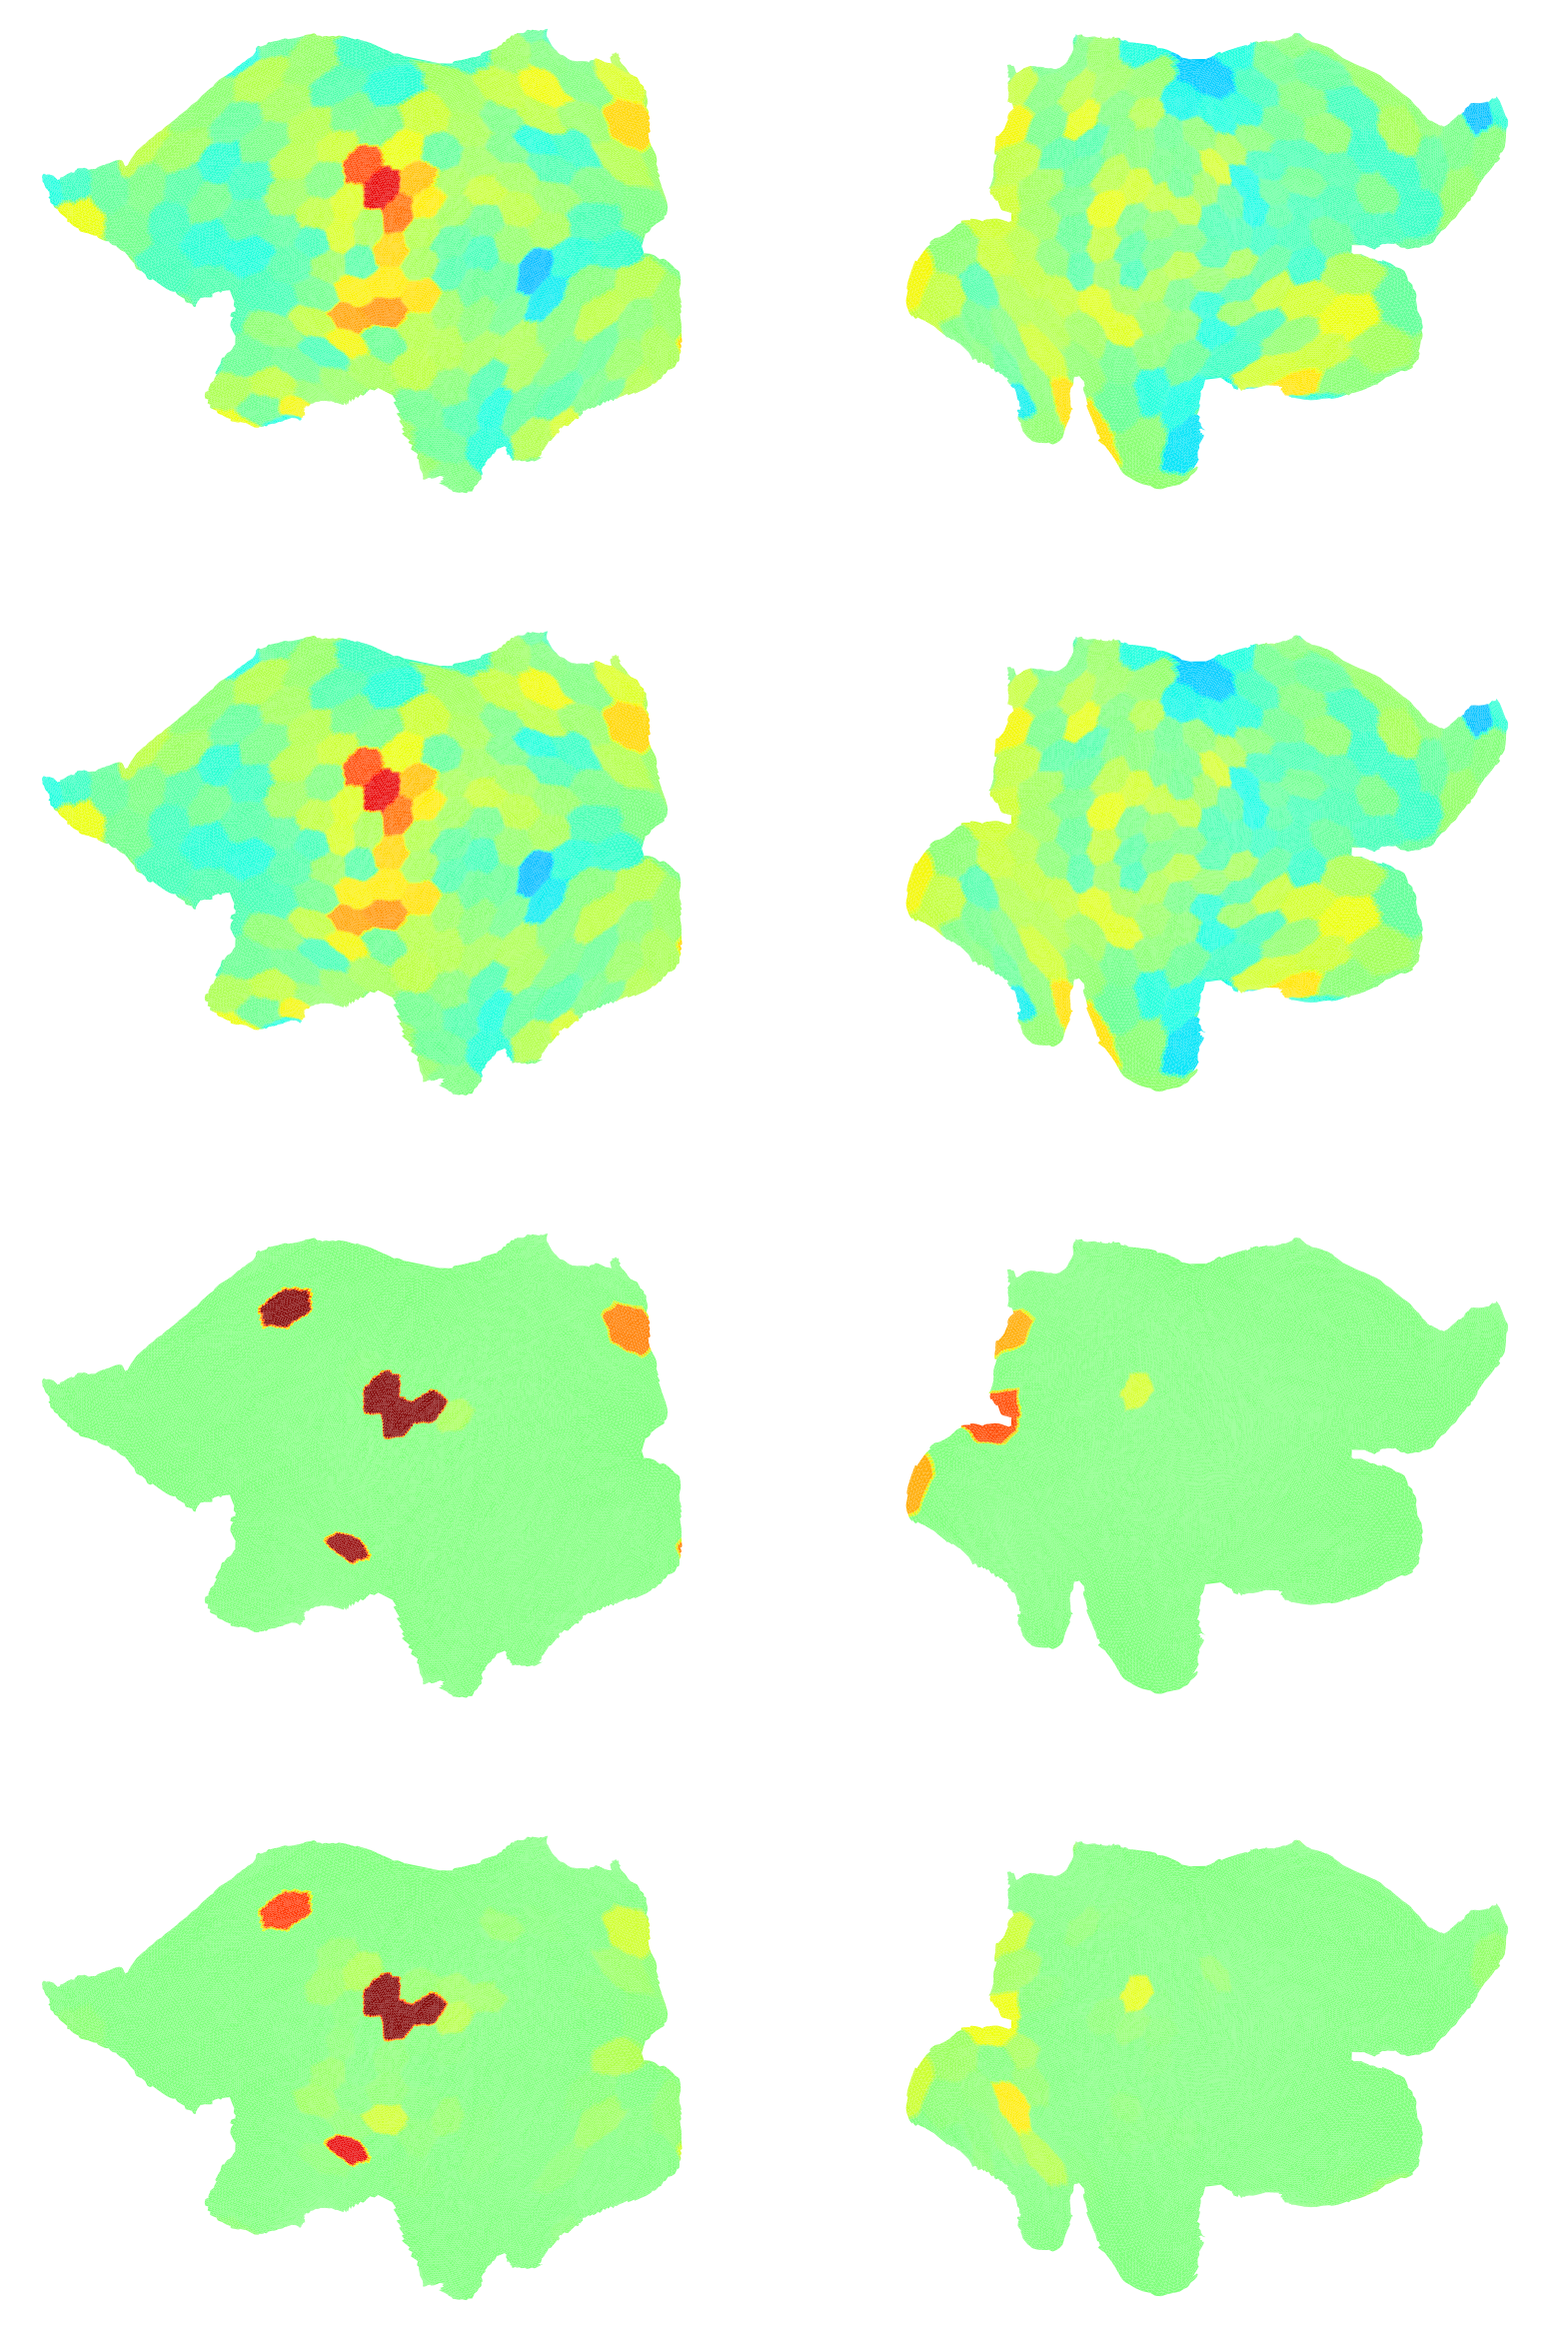

In [44]:
# Average the connectivty weights 
ridgeVOX_w,_ = data.average_by_roi(ridgeVOX.coef_.T,index)
nnVOX_w,_ = data.average_by_roi(nnVOX.coef_.T,index)


# Map the data to surface 
reg = 2  # MDTB region to display
cs = [-0.015, 0.015]
gii_ridge_vox,_ = data.convert_cortex_to_gifti(ridgeVOX_w[:,reg],'tessels0162')
gii_nn_vox,_ = data.convert_cortex_to_gifti(nnVOX_w[:,reg],'tessels0162')
gii_ridge_roi,_ = data.convert_cortex_to_gifti(ridgeROI.coef_[reg,:],'tessels0162')
gii_nn_roi,_ = data.convert_cortex_to_gifti(nnROI.coef_[reg,:],'tessels0162')

# Display: 
fig = plt.figure(figsize=(20,30))
ax = plt.subplot(4,2,1)
ax.set_title('Ridge ROI')
surf.plot.plotmap(gii_ridge_roi[0],flat[0],cscale = cs)
plt.subplot(4,2,2)
surf.plot.plotmap(gii_ridge_roi[1],flat[1],cscale = cs)
ax = plt.subplot(4,2,3)
ax.set_title('Ridge VOX')
surf.plot.plotmap(gii_ridge_vox[0],flat[0],cscale = cs)
plt.subplot(4,2,4)
surf.plot.plotmap(gii_ridge_vox[1],flat[1],cscale = cs)
ax = plt.subplot(4,2,5)
ax.set_title('NNLS ROI')
surf.plot.plotmap(gii_nn_roi[0],flat[0],cscale = cs)
plt.subplot(4,2,6)
surf.plot.plotmap(gii_nn_roi[1],flat[1],cscale = cs)
ax = plt.subplot(4,2,7)
ax.set_title('NNLS VOX')
surf.plot.plotmap(gii_nn_vox[0],flat[0],cscale = cs)
plt.subplot(4,2,8)
surf.plot.plotmap(gii_nn_vox[1],flat[1],cscale = cs)
plt.show()